In [ ]:
%%capture
!pip install gcpds-cv-pykit

In [ ]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [ ]:
import torch
from gcpds_cv_pykit.datasets import SeedGermination
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import UNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [ ]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [ ]:
SeedGermination()

100%|██████████| 0.98G/0.98G [00:30<00:00, 34.0MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1
Dataset copied to: /content/datasets/seeds
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1' deleted.


'/content/datasets/seeds'

In [ ]:
config = {"Dir of dataset": "./datasets/seeds", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "UNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","SeedGermination-UNet-DICE"]}

In [ ]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 2458


Organizing masks: 100%|██████████| 2458/2458 [00:00<00:00, 85101.32it/s]


In [ ]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 231


Organizing masks: 100%|██████████| 231/231 [00:00<00:00, 81295.87it/s]


In [ ]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 118


Organizing masks: 100%|██████████| 118/118 [00:00<00:00, 62720.55it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


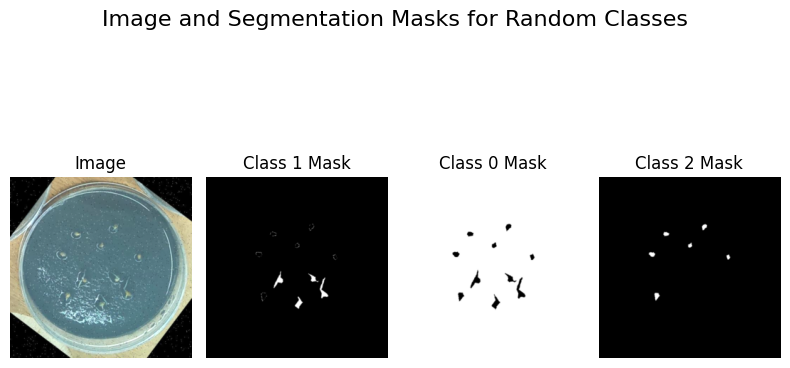

In [ ]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 133MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


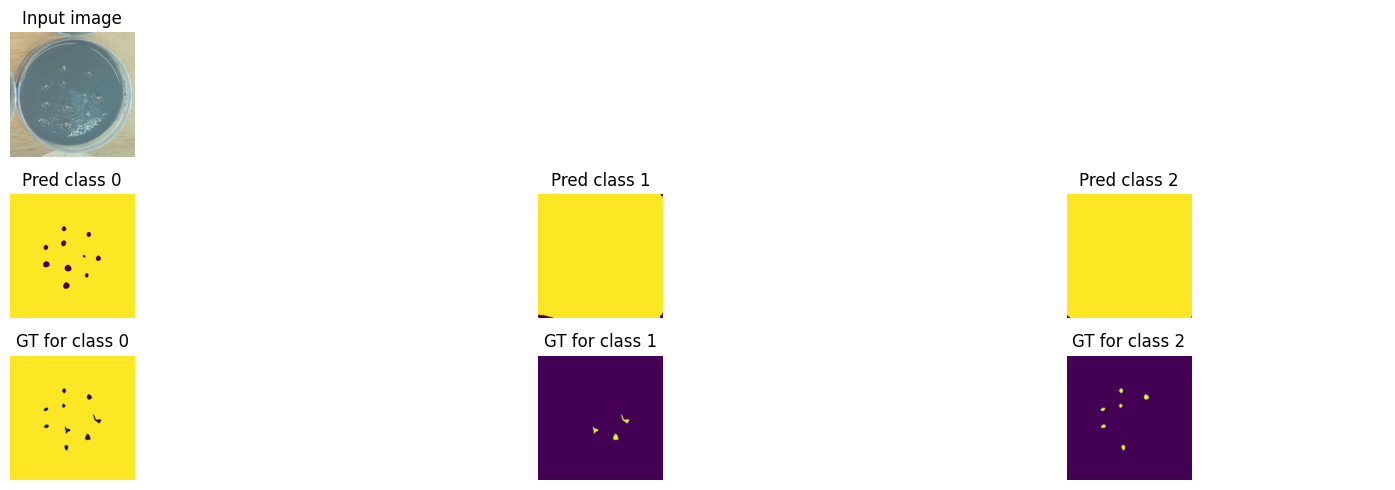

Train loss: 0.69555 | Time: 0m 48s | Val loss: 0.65933
Train_DICE_avg: 0.39553 | Train_Jaccard_avg: 0.34064 | Train_Sensitivity_avg: 0.39330 | Train_Specificity_avg: 0.79412 
Class 0 - Train_DICE: 0.90098 | Train_Jaccard: 0.83523 | Train_Sensitivity: 0.99218 | Train_Specificity: 0.38479 
Class 1 - Train_DICE: 0.04840 | Train_Jaccard: 0.02687 | Train_Sensitivity: 0.02733 | Train_Specificity: 0.99889 
Class 2 - Train_DICE: 0.23721 | Train_Jaccard: 0.15981 | Train_Sensitivity: 0.16039 | Train_Specificity: 0.99869 
Val_DICE_avg: 0.43355 | Val_Jaccard_avg: 0.39547 | Val_Sensitivity_avg: 0.41180 | Val_Specificity_avg: 0.83894 
Class 0 - Val_DICE: 0.97382 | Val_Jaccard: 0.95025 | Val_Sensitivity: 0.99663 | Val_Specificity: 0.52226 
Class 1 - Val_DICE: 0.05836 | Val_Jaccard: 0.03485 | Val_Sensitivity: 0.03679 | Val_Specificity: 0.99866 
Class 2 - Val_DICE: 0.26849 | Val_Jaccard: 0.20132 | Val_Sensitivity: 0.20198 | Val_Specificity: 0.99590 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.65271 | Time: 1m 35s | Val loss: 0.64017
Train_DICE_avg: 0.44817 | Train_Jaccard_avg: 0.41127 | Train_Sensitivity_avg: 0.42671 | Train_Specificity_avg: 0.87283 
Class 0 - Train_DICE: 0.97530 | Train_Jaccard: 0.95223 | Train_Sensitivity: 0.99421 | Train_Specificity: 0.62007 
Class 1 - Train_DICE: 0.06395 | Train_Jaccard: 0.03806 | Train_Sensitivity: 0.03941 | Train_Specificity: 0.99907 
Class 2 - Train_DICE: 0.30527 | Train_Jaccard: 0.24351 | Train_Sensitivity: 0.24652 | Train_Specificity: 0.99935 
Val_DICE_avg: 0.45918 | Val_Jaccard_avg: 0.42743 | Val_Sensitivity_avg: 0.43932 | Val_Specificity_avg: 0.85451 
Class 0 - Val_DICE: 0.98214 | Val_Jaccard: 0.96532 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.56749 
Class 1 - Val_DICE: 0.07300 | Val_Jaccard: 0.04703 | Val_Sensitivity: 0.04981 | Val_Specificity: 0.99897 
Class 2 - Val_DICE: 0.32240 | Val_Jaccard: 0.26993 | Val_Sensitivity: 0.27114 | Val_Specificity: 0.99708 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.63050 | Time: 2m 21s | Val loss: 0.62445
Train_DICE_avg: 0.46194 | Train_Jaccard_avg: 0.42788 | Train_Sensitivity_avg: 0.43950 | Train_Specificity_avg: 0.89861 
Class 0 - Train_DICE: 0.98292 | Train_Jaccard: 0.96660 | Train_Sensitivity: 0.99464 | Train_Specificity: 0.69751 
Class 1 - Train_DICE: 0.07357 | Train_Jaccard: 0.04477 | Train_Sensitivity: 0.04627 | Train_Specificity: 0.99926 
Class 2 - Train_DICE: 0.32932 | Train_Jaccard: 0.27226 | Train_Sensitivity: 0.27757 | Train_Specificity: 0.99906 
Val_DICE_avg: 0.46550 | Val_Jaccard_avg: 0.43698 | Val_Sensitivity_avg: 0.44257 | Val_Specificity_avg: 0.90144 
Class 0 - Val_DICE: 0.99162 | Val_Jaccard: 0.98343 | Val_Sensitivity: 0.99745 | Val_Specificity: 0.70900 
Class 1 - Val_DICE: 0.08024 | Val_Jaccard: 0.05279 | Val_Sensitivity: 0.05451 | Val_Specificity: 0.99943 
Class 2 - Val_DICE: 0.32463 | Val_Jaccard: 0.27471 | Val_Sensitivity: 0.27575 | Val_Specificity: 0.99590 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.61011 | Time: 3m 7s | Val loss: 0.59520
Train_DICE_avg: 0.47288 | Train_Jaccard_avg: 0.43873 | Train_Sensitivity_avg: 0.44908 | Train_Specificity_avg: 0.91373 
Class 0 - Train_DICE: 0.98618 | Train_Jaccard: 0.97286 | Train_Sensitivity: 0.99465 | Train_Specificity: 0.74272 
Class 1 - Train_DICE: 0.08723 | Train_Jaccard: 0.05373 | Train_Sensitivity: 0.05519 | Train_Specificity: 0.99946 
Class 2 - Train_DICE: 0.34525 | Train_Jaccard: 0.28960 | Train_Sensitivity: 0.29741 | Train_Specificity: 0.99900 
Val_DICE_avg: 0.47633 | Val_Jaccard_avg: 0.44949 | Val_Sensitivity_avg: 0.45677 | Val_Specificity_avg: 0.90619 
Class 0 - Val_DICE: 0.99267 | Val_Jaccard: 0.98549 | Val_Sensitivity: 0.99778 | Val_Specificity: 0.72182 
Class 1 - Val_DICE: 0.09229 | Val_Jaccard: 0.06202 | Val_Sensitivity: 0.06460 | Val_Specificity: 0.99939 
Class 2 - Val_DICE: 0.34402 | Val_Jaccard: 0.30096 | Val_Sensitivity: 0.30794 | Val_Specificity: 0.99735 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.58909 | Time: 3m 54s | Val loss: 0.58079
Train_DICE_avg: 0.48761 | Train_Jaccard_avg: 0.45120 | Train_Sensitivity_avg: 0.46163 | Train_Specificity_avg: 0.92213 
Class 0 - Train_DICE: 0.98748 | Train_Jaccard: 0.97537 | Train_Sensitivity: 0.99401 | Train_Specificity: 0.76806 
Class 1 - Train_DICE: 0.10897 | Train_Jaccard: 0.06801 | Train_Sensitivity: 0.07050 | Train_Specificity: 0.99939 
Class 2 - Train_DICE: 0.36639 | Train_Jaccard: 0.31022 | Train_Sensitivity: 0.32038 | Train_Specificity: 0.99895 
Val_DICE_avg: 0.49842 | Val_Jaccard_avg: 0.46749 | Val_Sensitivity_avg: 0.47912 | Val_Specificity_avg: 0.91697 
Class 0 - Val_DICE: 0.99377 | Val_Jaccard: 0.98766 | Val_Sensitivity: 0.99752 | Val_Specificity: 0.75713 
Class 1 - Val_DICE: 0.13146 | Val_Jaccard: 0.09036 | Val_Sensitivity: 0.09974 | Val_Specificity: 0.99892 
Class 2 - Val_DICE: 0.37004 | Val_Jaccard: 0.32447 | Val_Sensitivity: 0.34011 | Val_Specificity: 0.99487 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


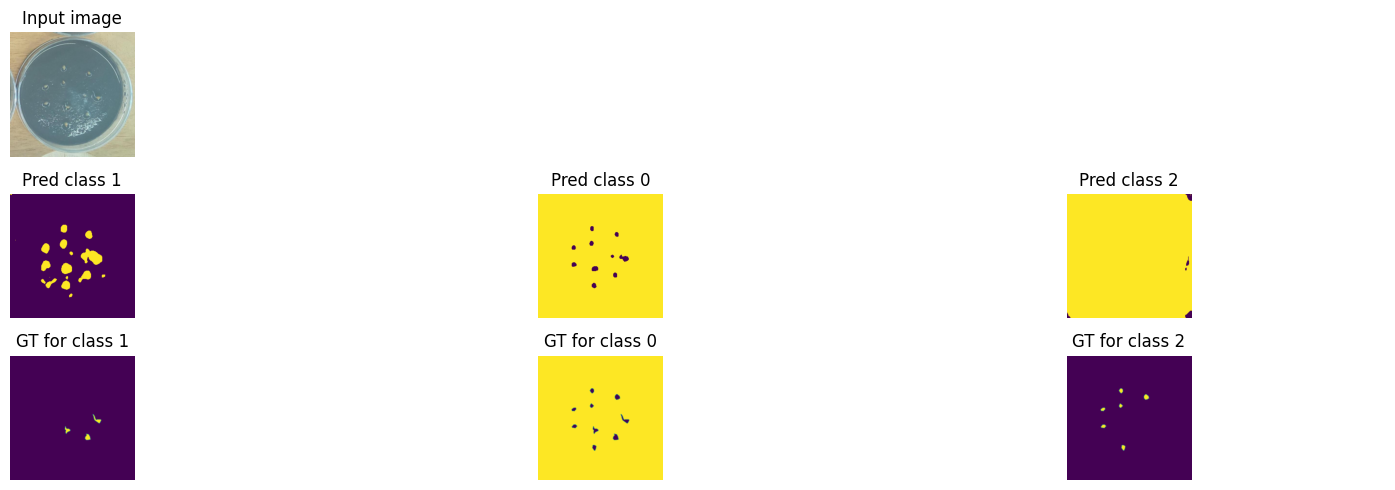

Train loss: 0.56934 | Time: 4m 41s | Val loss: 0.56133
Train_DICE_avg: 0.51796 | Train_Jaccard_avg: 0.47494 | Train_Sensitivity_avg: 0.48685 | Train_Specificity_avg: 0.92992 
Class 0 - Train_DICE: 0.98862 | Train_Jaccard: 0.97757 | Train_Sensitivity: 0.99336 | Train_Specificity: 0.79194 
Class 1 - Train_DICE: 0.16198 | Train_Jaccard: 0.10489 | Train_Sensitivity: 0.11203 | Train_Specificity: 0.99910 
Class 2 - Train_DICE: 0.40329 | Train_Jaccard: 0.34237 | Train_Sensitivity: 0.35517 | Train_Specificity: 0.99870 
Val_DICE_avg: 0.52006 | Val_Jaccard_avg: 0.48295 | Val_Sensitivity_avg: 0.49819 | Val_Specificity_avg: 0.91564 
Class 0 - Val_DICE: 0.99339 | Val_Jaccard: 0.98691 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.75074 
Class 1 - Val_DICE: 0.16921 | Val_Jaccard: 0.11882 | Val_Sensitivity: 0.14744 | Val_Specificity: 0.99806 
Class 2 - Val_DICE: 0.39758 | Val_Jaccard: 0.34312 | Val_Sensitivity: 0.34933 | Val_Specificity: 0.99813 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.54712 | Time: 5m 27s | Val loss: 0.54262
Train_DICE_avg: 0.54878 | Train_Jaccard_avg: 0.50037 | Train_Sensitivity_avg: 0.51403 | Train_Specificity_avg: 0.93791 
Class 0 - Train_DICE: 0.98981 | Train_Jaccard: 0.97989 | Train_Sensitivity: 0.99244 | Train_Specificity: 0.81623 
Class 1 - Train_DICE: 0.19816 | Train_Jaccard: 0.13432 | Train_Sensitivity: 0.14720 | Train_Specificity: 0.99890 
Class 2 - Train_DICE: 0.45837 | Train_Jaccard: 0.38692 | Train_Sensitivity: 0.40245 | Train_Specificity: 0.99859 
Val_DICE_avg: 0.54260 | Val_Jaccard_avg: 0.50202 | Val_Sensitivity_avg: 0.51140 | Val_Specificity_avg: 0.91820 
Class 0 - Val_DICE: 0.99378 | Val_Jaccard: 0.98767 | Val_Sensitivity: 0.99795 | Val_Specificity: 0.75732 
Class 1 - Val_DICE: 0.19473 | Val_Jaccard: 0.13788 | Val_Sensitivity: 0.14925 | Val_Specificity: 0.99893 
Class 2 - Val_DICE: 0.43929 | Val_Jaccard: 0.38050 | Val_Sensitivity: 0.38700 | Val_Specificity: 0.99835 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.52750 | Time: 6m 14s | Val loss: 0.52445
Train_DICE_avg: 0.58110 | Train_Jaccard_avg: 0.52609 | Train_Sensitivity_avg: 0.54191 | Train_Specificity_avg: 0.94391 
Class 0 - Train_DICE: 0.99036 | Train_Jaccard: 0.98096 | Train_Sensitivity: 0.99116 | Train_Specificity: 0.83456 
Class 1 - Train_DICE: 0.22297 | Train_Jaccard: 0.15632 | Train_Sensitivity: 0.17440 | Train_Specificity: 0.99873 
Class 2 - Train_DICE: 0.52998 | Train_Jaccard: 0.44099 | Train_Sensitivity: 0.46018 | Train_Specificity: 0.99844 
Val_DICE_avg: 0.58713 | Val_Jaccard_avg: 0.53815 | Val_Sensitivity_avg: 0.55780 | Val_Specificity_avg: 0.93831 
Class 0 - Val_DICE: 0.99533 | Val_Jaccard: 0.99074 | Val_Sensitivity: 0.99687 | Val_Specificity: 0.81873 
Class 1 - Val_DICE: 0.21957 | Val_Jaccard: 0.16088 | Val_Sensitivity: 0.19209 | Val_Specificity: 0.99814 
Class 2 - Val_DICE: 0.54650 | Val_Jaccard: 0.46282 | Val_Sensitivity: 0.48445 | Val_Specificity: 0.99808 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.50896 | Time: 7m 0s | Val loss: 0.50922
Train_DICE_avg: 0.60534 | Train_Jaccard_avg: 0.54670 | Train_Sensitivity_avg: 0.56501 | Train_Specificity_avg: 0.94816 
Class 0 - Train_DICE: 0.99033 | Train_Jaccard: 0.98091 | Train_Sensitivity: 0.99012 | Train_Specificity: 0.84786 
Class 1 - Train_DICE: 0.24191 | Train_Jaccard: 0.17413 | Train_Sensitivity: 0.19678 | Train_Specificity: 0.99864 
Class 2 - Train_DICE: 0.58378 | Train_Jaccard: 0.48508 | Train_Sensitivity: 0.50814 | Train_Specificity: 0.99798 
Val_DICE_avg: 0.61886 | Val_Jaccard_avg: 0.56417 | Val_Sensitivity_avg: 0.58300 | Val_Specificity_avg: 0.94489 
Class 0 - Val_DICE: 0.99538 | Val_Jaccard: 0.99082 | Val_Sensitivity: 0.99686 | Val_Specificity: 0.83785 
Class 1 - Val_DICE: 0.23896 | Val_Jaccard: 0.17639 | Val_Sensitivity: 0.21457 | Val_Specificity: 0.99789 
Class 2 - Val_DICE: 0.62225 | Val_Jaccard: 0.52530 | Val_Sensitivity: 0.53757 | Val_Specificity: 0.99893 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.49317 | Time: 7m 47s | Val loss: 0.48140
Train_DICE_avg: 0.62548 | Train_Jaccard_avg: 0.56432 | Train_Sensitivity_avg: 0.58423 | Train_Specificity_avg: 0.94900 
Class 0 - Train_DICE: 0.99058 | Train_Jaccard: 0.98141 | Train_Sensitivity: 0.98985 | Train_Specificity: 0.85049 
Class 1 - Train_DICE: 0.25769 | Train_Jaccard: 0.18784 | Train_Sensitivity: 0.21378 | Train_Specificity: 0.99852 
Class 2 - Train_DICE: 0.62818 | Train_Jaccard: 0.52372 | Train_Sensitivity: 0.54906 | Train_Specificity: 0.99799 
Val_DICE_avg: 0.64311 | Val_Jaccard_avg: 0.58695 | Val_Sensitivity_avg: 0.61154 | Val_Specificity_avg: 0.94185 
Class 0 - Val_DICE: 0.99544 | Val_Jaccard: 0.99095 | Val_Sensitivity: 0.99674 | Val_Specificity: 0.82967 
Class 1 - Val_DICE: 0.25394 | Val_Jaccard: 0.18800 | Val_Sensitivity: 0.23492 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.67994 | Val_Jaccard: 0.58191 | Val_Sensitivity: 0.60297 | Val_Specificity: 0.99824 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


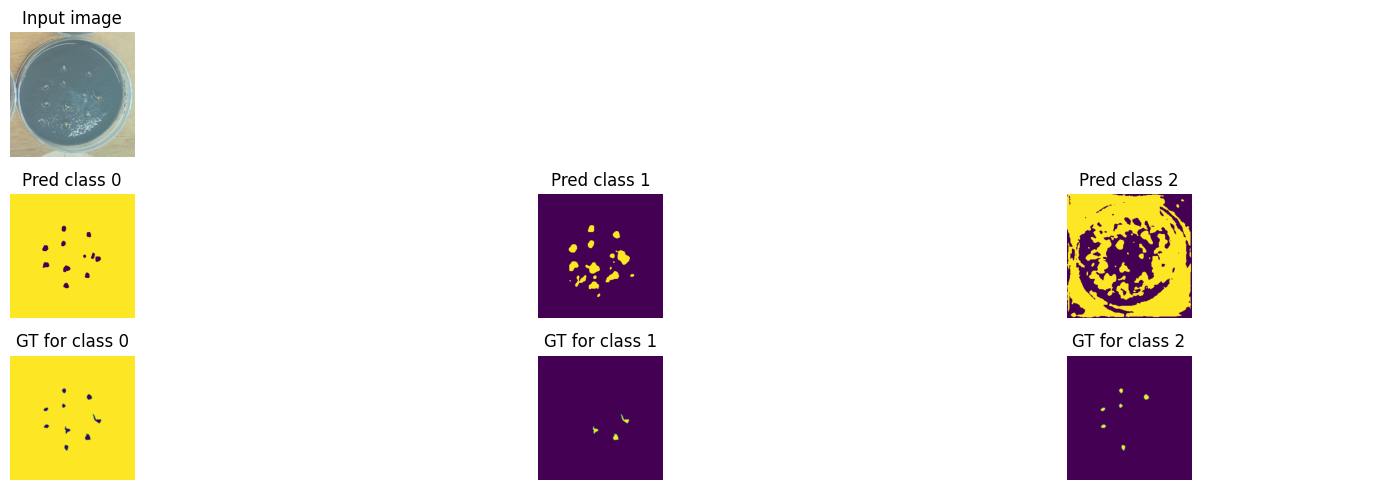

Train loss: 0.47166 | Time: 8m 35s | Val loss: 0.47400
Train_DICE_avg: 0.64547 | Train_Jaccard_avg: 0.58396 | Train_Sensitivity_avg: 0.60567 | Train_Specificity_avg: 0.95389 
Class 0 - Train_DICE: 0.99088 | Train_Jaccard: 0.98199 | Train_Sensitivity: 0.98920 | Train_Specificity: 0.86539 
Class 1 - Train_DICE: 0.28541 | Train_Jaccard: 0.21151 | Train_Sensitivity: 0.24194 | Train_Specificity: 0.99836 
Class 2 - Train_DICE: 0.66011 | Train_Jaccard: 0.55838 | Train_Sensitivity: 0.58586 | Train_Specificity: 0.99792 
Val_DICE_avg: 0.62563 | Val_Jaccard_avg: 0.57486 | Val_Sensitivity_avg: 0.59771 | Val_Specificity_avg: 0.92797 
Class 0 - Val_DICE: 0.99502 | Val_Jaccard: 0.99012 | Val_Sensitivity: 0.99691 | Val_Specificity: 0.78774 
Class 1 - Val_DICE: 0.26165 | Val_Jaccard: 0.19803 | Val_Sensitivity: 0.23897 | Val_Specificity: 0.99800 
Class 2 - Val_DICE: 0.62020 | Val_Jaccard: 0.53642 | Val_Sensitivity: 0.55726 | Val_Specificity: 0.99818 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.45327 | Time: 9m 23s | Val loss: 0.46840
Train_DICE_avg: 0.65898 | Train_Jaccard_avg: 0.59672 | Train_Sensitivity_avg: 0.62128 | Train_Specificity_avg: 0.95740 
Class 0 - Train_DICE: 0.99076 | Train_Jaccard: 0.98176 | Train_Sensitivity: 0.98810 | Train_Specificity: 0.87615 
Class 1 - Train_DICE: 0.30297 | Train_Jaccard: 0.22849 | Train_Sensitivity: 0.26445 | Train_Specificity: 0.99826 
Class 2 - Train_DICE: 0.68321 | Train_Jaccard: 0.57991 | Train_Sensitivity: 0.61128 | Train_Specificity: 0.99780 
Val_DICE_avg: 0.63075 | Val_Jaccard_avg: 0.58002 | Val_Sensitivity_avg: 0.60113 | Val_Specificity_avg: 0.92278 
Class 0 - Val_DICE: 0.99462 | Val_Jaccard: 0.98933 | Val_Sensitivity: 0.99719 | Val_Specificity: 0.77192 
Class 1 - Val_DICE: 0.26316 | Val_Jaccard: 0.20093 | Val_Sensitivity: 0.23651 | Val_Specificity: 0.99841 
Class 2 - Val_DICE: 0.63447 | Val_Jaccard: 0.54980 | Val_Sensitivity: 0.56970 | Val_Specificity: 0.99801 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.43805 | Time: 10m 10s | Val loss: 0.45744
Train_DICE_avg: 0.67034 | Train_Jaccard_avg: 0.60733 | Train_Sensitivity_avg: 0.63484 | Train_Specificity_avg: 0.95812 
Class 0 - Train_DICE: 0.99077 | Train_Jaccard: 0.98179 | Train_Sensitivity: 0.98768 | Train_Specificity: 0.87852 
Class 1 - Train_DICE: 0.31071 | Train_Jaccard: 0.23483 | Train_Sensitivity: 0.27690 | Train_Specificity: 0.99817 
Class 2 - Train_DICE: 0.70953 | Train_Jaccard: 0.60536 | Train_Sensitivity: 0.63992 | Train_Specificity: 0.99768 
Val_DICE_avg: 0.65901 | Val_Jaccard_avg: 0.60405 | Val_Sensitivity_avg: 0.62433 | Val_Specificity_avg: 0.93255 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99064 | Val_Sensitivity: 0.99708 | Val_Specificity: 0.80082 
Class 1 - Val_DICE: 0.28061 | Val_Jaccard: 0.21738 | Val_Sensitivity: 0.25409 | Val_Specificity: 0.99822 
Class 2 - Val_DICE: 0.70113 | Val_Jaccard: 0.60413 | Val_Sensitivity: 0.62182 | Val_Specificity: 0.99861 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.42088 | Time: 10m 58s | Val loss: 0.43797
Train_DICE_avg: 0.68437 | Train_Jaccard_avg: 0.62208 | Train_Sensitivity_avg: 0.65117 | Train_Specificity_avg: 0.95964 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98145 | Train_Sensitivity: 0.98696 | Train_Specificity: 0.88321 
Class 1 - Train_DICE: 0.32696 | Train_Jaccard: 0.25056 | Train_Sensitivity: 0.29507 | Train_Specificity: 0.99817 
Class 2 - Train_DICE: 0.73554 | Train_Jaccard: 0.63424 | Train_Sensitivity: 0.67147 | Train_Specificity: 0.99756 
Val_DICE_avg: 0.66038 | Val_Jaccard_avg: 0.60685 | Val_Sensitivity_avg: 0.62897 | Val_Specificity_avg: 0.92662 
Class 0 - Val_DICE: 0.99498 | Val_Jaccard: 0.99004 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.78321 
Class 1 - Val_DICE: 0.28893 | Val_Jaccard: 0.22490 | Val_Sensitivity: 0.26448 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.69722 | Val_Jaccard: 0.60561 | Val_Sensitivity: 0.62544 | Val_Specificity: 0.99850 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.40533 | Time: 11m 46s | Val loss: 0.41863
Train_DICE_avg: 0.69323 | Train_Jaccard_avg: 0.63174 | Train_Sensitivity_avg: 0.66252 | Train_Specificity_avg: 0.96229 
Class 0 - Train_DICE: 0.99010 | Train_Jaccard: 0.98049 | Train_Sensitivity: 0.98560 | Train_Specificity: 0.89124 
Class 1 - Train_DICE: 0.33352 | Train_Jaccard: 0.25590 | Train_Sensitivity: 0.30374 | Train_Specificity: 0.99812 
Class 2 - Train_DICE: 0.75607 | Train_Jaccard: 0.65883 | Train_Sensitivity: 0.69821 | Train_Specificity: 0.99750 
Val_DICE_avg: 0.69803 | Val_Jaccard_avg: 0.64359 | Val_Sensitivity_avg: 0.66695 | Val_Specificity_avg: 0.94644 
Class 0 - Val_DICE: 0.99590 | Val_Jaccard: 0.99185 | Val_Sensitivity: 0.99655 | Val_Specificity: 0.84281 
Class 1 - Val_DICE: 0.30957 | Val_Jaccard: 0.24489 | Val_Sensitivity: 0.28618 | Val_Specificity: 0.99815 
Class 2 - Val_DICE: 0.78864 | Val_Jaccard: 0.69403 | Val_Sensitivity: 0.71812 | Val_Specificity: 0.99837 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


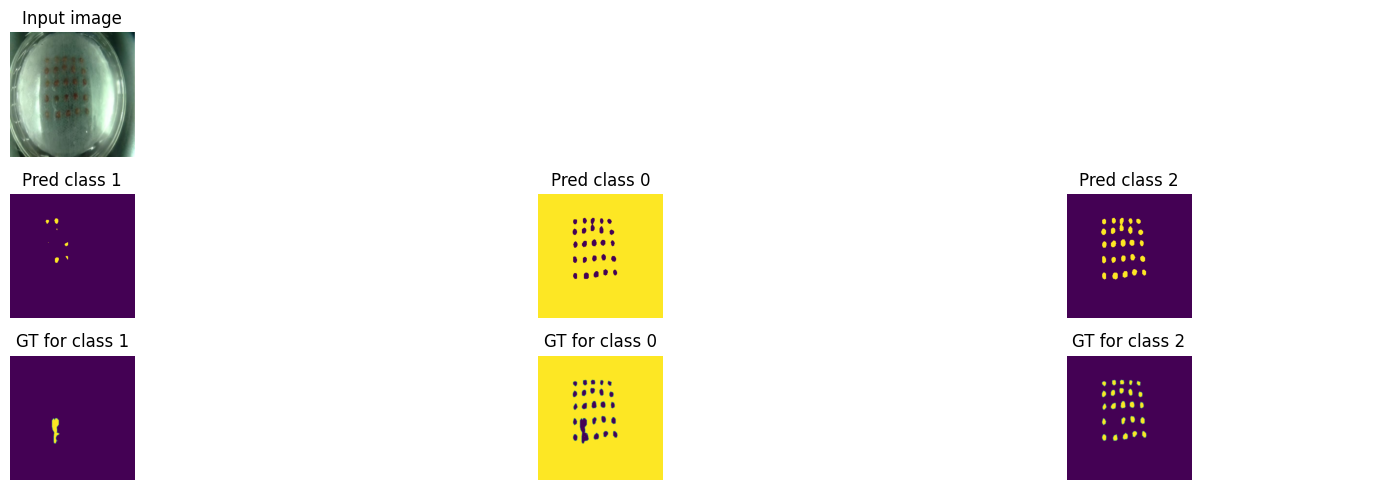

Train loss: 0.38930 | Time: 12m 34s | Val loss: 0.40234
Train_DICE_avg: 0.69914 | Train_Jaccard_avg: 0.63843 | Train_Sensitivity_avg: 0.67199 | Train_Specificity_avg: 0.96324 
Class 0 - Train_DICE: 0.99020 | Train_Jaccard: 0.98069 | Train_Sensitivity: 0.98569 | Train_Specificity: 0.89437 
Class 1 - Train_DICE: 0.33956 | Train_Jaccard: 0.26114 | Train_Sensitivity: 0.31199 | Train_Specificity: 0.99808 
Class 2 - Train_DICE: 0.76767 | Train_Jaccard: 0.67346 | Train_Sensitivity: 0.71827 | Train_Specificity: 0.99728 
Val_DICE_avg: 0.70222 | Val_Jaccard_avg: 0.64877 | Val_Sensitivity_avg: 0.67344 | Val_Specificity_avg: 0.94366 
Class 0 - Val_DICE: 0.99574 | Val_Jaccard: 0.99154 | Val_Sensitivity: 0.99693 | Val_Specificity: 0.83435 
Class 1 - Val_DICE: 0.30700 | Val_Jaccard: 0.24207 | Val_Sensitivity: 0.28960 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.80393 | Val_Jaccard: 0.71270 | Val_Sensitivity: 0.73379 | Val_Specificity: 0.99854 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.37332 | Time: 13m 22s | Val loss: 0.39700
Train_DICE_avg: 0.70954 | Train_Jaccard_avg: 0.64876 | Train_Sensitivity_avg: 0.68516 | Train_Specificity_avg: 0.96522 
Class 0 - Train_DICE: 0.99011 | Train_Jaccard: 0.98052 | Train_Sensitivity: 0.98523 | Train_Specificity: 0.90051 
Class 1 - Train_DICE: 0.34861 | Train_Jaccard: 0.26915 | Train_Sensitivity: 0.32536 | Train_Specificity: 0.99801 
Class 2 - Train_DICE: 0.78992 | Train_Jaccard: 0.69661 | Train_Sensitivity: 0.74488 | Train_Specificity: 0.99714 
Val_DICE_avg: 0.68527 | Val_Jaccard_avg: 0.63578 | Val_Sensitivity_avg: 0.65723 | Val_Specificity_avg: 0.92594 
Class 0 - Val_DICE: 0.99489 | Val_Jaccard: 0.98986 | Val_Sensitivity: 0.99747 | Val_Specificity: 0.78090 
Class 1 - Val_DICE: 0.30445 | Val_Jaccard: 0.24059 | Val_Sensitivity: 0.27512 | Val_Specificity: 0.99840 
Class 2 - Val_DICE: 0.75648 | Val_Jaccard: 0.67688 | Val_Sensitivity: 0.69911 | Val_Specificity: 0.99850 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.36015 | Time: 14m 10s | Val loss: 0.37420
Train_DICE_avg: 0.71706 | Train_Jaccard_avg: 0.65613 | Train_Sensitivity_avg: 0.69376 | Train_Specificity_avg: 0.96277 
Class 0 - Train_DICE: 0.99029 | Train_Jaccard: 0.98086 | Train_Sensitivity: 0.98591 | Train_Specificity: 0.89330 
Class 1 - Train_DICE: 0.35915 | Train_Jaccard: 0.27859 | Train_Sensitivity: 0.33470 | Train_Specificity: 0.99798 
Class 2 - Train_DICE: 0.80175 | Train_Jaccard: 0.70895 | Train_Sensitivity: 0.76068 | Train_Specificity: 0.99704 
Val_DICE_avg: 0.70668 | Val_Jaccard_avg: 0.65457 | Val_Sensitivity_avg: 0.68209 | Val_Specificity_avg: 0.93129 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99017 | Val_Sensitivity: 0.99748 | Val_Specificity: 0.79738 
Class 1 - Val_DICE: 0.31195 | Val_Jaccard: 0.24765 | Val_Sensitivity: 0.29662 | Val_Specificity: 0.99814 
Class 2 - Val_DICE: 0.81306 | Val_Jaccard: 0.72589 | Val_Sensitivity: 0.75218 | Val_Specificity: 0.99834 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.34855 | Time: 14m 57s | Val loss: 0.35987
Train_DICE_avg: 0.72223 | Train_Jaccard_avg: 0.66147 | Train_Sensitivity_avg: 0.70112 | Train_Specificity_avg: 0.96447 
Class 0 - Train_DICE: 0.99006 | Train_Jaccard: 0.98042 | Train_Sensitivity: 0.98533 | Train_Specificity: 0.89850 
Class 1 - Train_DICE: 0.36786 | Train_Jaccard: 0.28722 | Train_Sensitivity: 0.34700 | Train_Specificity: 0.99797 
Class 2 - Train_DICE: 0.80878 | Train_Jaccard: 0.71678 | Train_Sensitivity: 0.77103 | Train_Specificity: 0.99695 
Val_DICE_avg: 0.72375 | Val_Jaccard_avg: 0.67245 | Val_Sensitivity_avg: 0.70445 | Val_Specificity_avg: 0.93404 
Class 0 - Val_DICE: 0.99526 | Val_Jaccard: 0.99060 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.80593 
Class 1 - Val_DICE: 0.32464 | Val_Jaccard: 0.26196 | Val_Sensitivity: 0.31652 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.85134 | Val_Jaccard: 0.76479 | Val_Sensitivity: 0.79948 | Val_Specificity: 0.99806 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.33579 | Time: 15m 45s | Val loss: 0.34131
Train_DICE_avg: 0.73477 | Train_Jaccard_avg: 0.67247 | Train_Sensitivity_avg: 0.71432 | Train_Specificity_avg: 0.96556 
Class 0 - Train_DICE: 0.99054 | Train_Jaccard: 0.98135 | Train_Sensitivity: 0.98610 | Train_Specificity: 0.90182 
Class 1 - Train_DICE: 0.37583 | Train_Jaccard: 0.29453 | Train_Sensitivity: 0.35768 | Train_Specificity: 0.99791 
Class 2 - Train_DICE: 0.83796 | Train_Jaccard: 0.74152 | Train_Sensitivity: 0.79918 | Train_Specificity: 0.99696 
Val_DICE_avg: 0.73399 | Val_Jaccard_avg: 0.68231 | Val_Sensitivity_avg: 0.72594 | Val_Specificity_avg: 0.94798 
Class 0 - Val_DICE: 0.99600 | Val_Jaccard: 0.99206 | Val_Sensitivity: 0.99730 | Val_Specificity: 0.84810 
Class 1 - Val_DICE: 0.33087 | Val_Jaccard: 0.26384 | Val_Sensitivity: 0.32275 | Val_Specificity: 0.99816 
Class 2 - Val_DICE: 0.87511 | Val_Jaccard: 0.79102 | Val_Sensitivity: 0.85778 | Val_Specificity: 0.99767 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


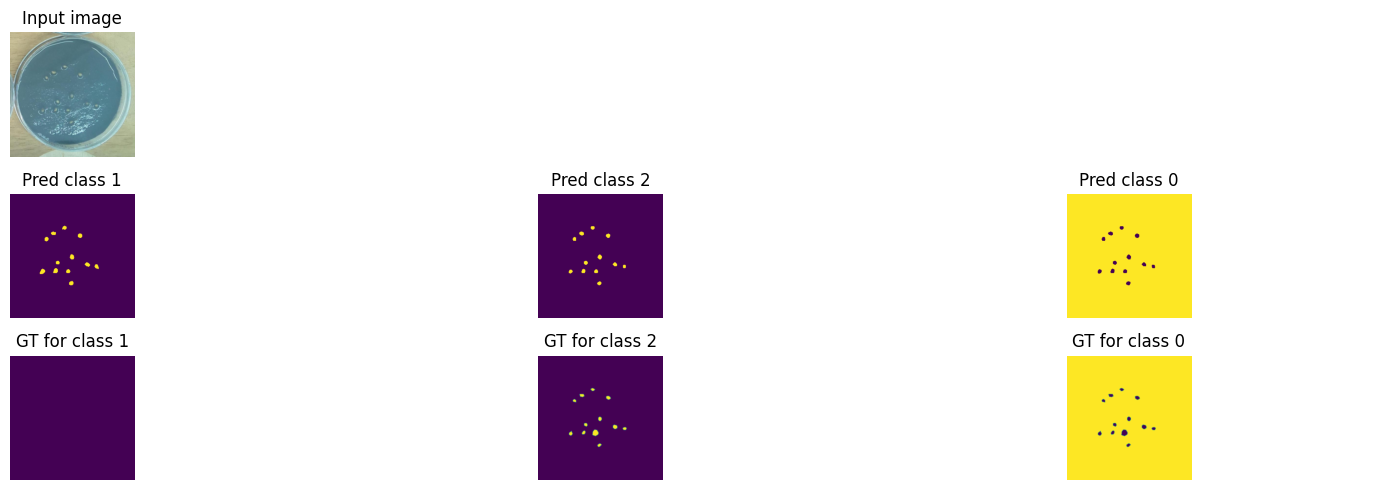

Train loss: 0.32156 | Time: 16m 33s | Val loss: 0.32689
Train_DICE_avg: 0.74238 | Train_Jaccard_avg: 0.68012 | Train_Sensitivity_avg: 0.72460 | Train_Specificity_avg: 0.96858 
Class 0 - Train_DICE: 0.99068 | Train_Jaccard: 0.98161 | Train_Sensitivity: 0.98606 | Train_Specificity: 0.91105 
Class 1 - Train_DICE: 0.38456 | Train_Jaccard: 0.30301 | Train_Sensitivity: 0.36790 | Train_Specificity: 0.99786 
Class 2 - Train_DICE: 0.85189 | Train_Jaccard: 0.75572 | Train_Sensitivity: 0.81985 | Train_Specificity: 0.99683 
Val_DICE_avg: 0.73910 | Val_Jaccard_avg: 0.68801 | Val_Sensitivity_avg: 0.72754 | Val_Specificity_avg: 0.95179 
Class 0 - Val_DICE: 0.99623 | Val_Jaccard: 0.99251 | Val_Sensitivity: 0.99709 | Val_Specificity: 0.85944 
Class 1 - Val_DICE: 0.34453 | Val_Jaccard: 0.27838 | Val_Sensitivity: 0.33738 | Val_Specificity: 0.99808 
Class 2 - Val_DICE: 0.87653 | Val_Jaccard: 0.79314 | Val_Sensitivity: 0.84814 | Val_Specificity: 0.99784 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.30784 | Time: 17m 21s | Val loss: 0.31802
Train_DICE_avg: 0.74716 | Train_Jaccard_avg: 0.68540 | Train_Sensitivity_avg: 0.73272 | Train_Specificity_avg: 0.96926 
Class 0 - Train_DICE: 0.99092 | Train_Jaccard: 0.98209 | Train_Sensitivity: 0.98653 | Train_Specificity: 0.91318 
Class 1 - Train_DICE: 0.39065 | Train_Jaccard: 0.30869 | Train_Sensitivity: 0.37819 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.85992 | Train_Jaccard: 0.76542 | Train_Sensitivity: 0.83343 | Train_Specificity: 0.99678 
Val_DICE_avg: 0.74412 | Val_Jaccard_avg: 0.69265 | Val_Sensitivity_avg: 0.73273 | Val_Specificity_avg: 0.94574 
Class 0 - Val_DICE: 0.99609 | Val_Jaccard: 0.99222 | Val_Sensitivity: 0.99711 | Val_Specificity: 0.84151 
Class 1 - Val_DICE: 0.35929 | Val_Jaccard: 0.29260 | Val_Sensitivity: 0.35477 | Val_Specificity: 0.99799 
Class 2 - Val_DICE: 0.87699 | Val_Jaccard: 0.79312 | Val_Sensitivity: 0.84631 | Val_Specificity: 0.99771 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.29898 | Time: 18m 9s | Val loss: 0.30689
Train_DICE_avg: 0.74997 | Train_Jaccard_avg: 0.68817 | Train_Sensitivity_avg: 0.73834 | Train_Specificity_avg: 0.97021 
Class 0 - Train_DICE: 0.99109 | Train_Jaccard: 0.98241 | Train_Sensitivity: 0.98676 | Train_Specificity: 0.91618 
Class 1 - Train_DICE: 0.39692 | Train_Jaccard: 0.31416 | Train_Sensitivity: 0.38722 | Train_Specificity: 0.99779 
Class 2 - Train_DICE: 0.86190 | Train_Jaccard: 0.76793 | Train_Sensitivity: 0.84103 | Train_Specificity: 0.99665 
Val_DICE_avg: 0.74763 | Val_Jaccard_avg: 0.69514 | Val_Sensitivity_avg: 0.73246 | Val_Specificity_avg: 0.95391 
Class 0 - Val_DICE: 0.99632 | Val_Jaccard: 0.99268 | Val_Sensitivity: 0.99718 | Val_Specificity: 0.86591 
Class 1 - Val_DICE: 0.36964 | Val_Jaccard: 0.30023 | Val_Sensitivity: 0.35547 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.87692 | Val_Jaccard: 0.79249 | Val_Sensitivity: 0.84475 | Val_Specificity: 0.99771 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.28996 | Time: 18m 56s | Val loss: 0.29798
Train_DICE_avg: 0.75442 | Train_Jaccard_avg: 0.69300 | Train_Sensitivity_avg: 0.74399 | Train_Specificity_avg: 0.96925 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98314 | Train_Sensitivity: 0.98771 | Train_Specificity: 0.91328 
Class 1 - Train_DICE: 0.40511 | Train_Jaccard: 0.32169 | Train_Sensitivity: 0.39732 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.86670 | Train_Jaccard: 0.77416 | Train_Sensitivity: 0.84696 | Train_Specificity: 0.99668 
Val_DICE_avg: 0.75069 | Val_Jaccard_avg: 0.69882 | Val_Sensitivity_avg: 0.74313 | Val_Specificity_avg: 0.95132 
Class 0 - Val_DICE: 0.99616 | Val_Jaccard: 0.99237 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.85816 
Class 1 - Val_DICE: 0.37469 | Val_Jaccard: 0.30457 | Val_Sensitivity: 0.37097 | Val_Specificity: 0.99807 
Class 2 - Val_DICE: 0.88121 | Val_Jaccard: 0.79951 | Val_Sensitivity: 0.86107 | Val_Specificity: 0.99774 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.28248 | Time: 19m 44s | Val loss: 0.29218
Train_DICE_avg: 0.75830 | Train_Jaccard_avg: 0.69764 | Train_Sensitivity_avg: 0.75025 | Train_Specificity_avg: 0.96914 
Class 0 - Train_DICE: 0.99174 | Train_Jaccard: 0.98368 | Train_Sensitivity: 0.98825 | Train_Specificity: 0.91297 
Class 1 - Train_DICE: 0.41477 | Train_Jaccard: 0.33216 | Train_Sensitivity: 0.41059 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.86840 | Train_Jaccard: 0.77708 | Train_Sensitivity: 0.85191 | Train_Specificity: 0.99669 
Val_DICE_avg: 0.75496 | Val_Jaccard_avg: 0.70402 | Val_Sensitivity_avg: 0.74753 | Val_Specificity_avg: 0.95237 
Class 0 - Val_DICE: 0.99626 | Val_Jaccard: 0.99257 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.86136 
Class 1 - Val_DICE: 0.38445 | Val_Jaccard: 0.31574 | Val_Sensitivity: 0.38563 | Val_Specificity: 0.99805 
Class 2 - Val_DICE: 0.88416 | Val_Jaccard: 0.80376 | Val_Sensitivity: 0.85963 | Val_Specificity: 0.99771 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


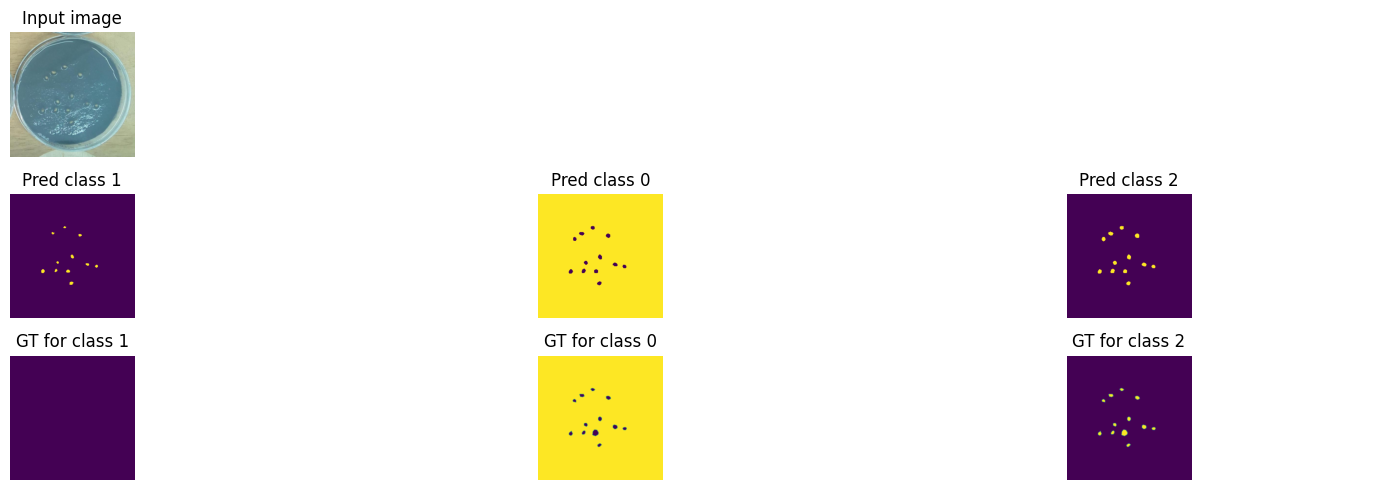

Train loss: 0.27768 | Time: 20m 32s | Val loss: 0.28664
Train_DICE_avg: 0.75920 | Train_Jaccard_avg: 0.69841 | Train_Sensitivity_avg: 0.75281 | Train_Specificity_avg: 0.96849 
Class 0 - Train_DICE: 0.99170 | Train_Jaccard: 0.98361 | Train_Sensitivity: 0.98849 | Train_Specificity: 0.91111 
Class 1 - Train_DICE: 0.41667 | Train_Jaccard: 0.33356 | Train_Sensitivity: 0.41589 | Train_Specificity: 0.99772 
Class 2 - Train_DICE: 0.86923 | Train_Jaccard: 0.77806 | Train_Sensitivity: 0.85404 | Train_Specificity: 0.99663 
Val_DICE_avg: 0.76904 | Val_Jaccard_avg: 0.71850 | Val_Sensitivity_avg: 0.76767 | Val_Specificity_avg: 0.95650 
Class 0 - Val_DICE: 0.99646 | Val_Jaccard: 0.99297 | Val_Sensitivity: 0.99694 | Val_Specificity: 0.87413 
Class 1 - Val_DICE: 0.42787 | Val_Jaccard: 0.36065 | Val_Sensitivity: 0.45107 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.88278 | Val_Jaccard: 0.80189 | Val_Sensitivity: 0.85499 | Val_Specificity: 0.99760 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.27306 | Time: 21m 19s | Val loss: 0.28170
Train_DICE_avg: 0.76095 | Train_Jaccard_avg: 0.70024 | Train_Sensitivity_avg: 0.75694 | Train_Specificity_avg: 0.96764 
Class 0 - Train_DICE: 0.99202 | Train_Jaccard: 0.98424 | Train_Sensitivity: 0.98918 | Train_Specificity: 0.90863 
Class 1 - Train_DICE: 0.42171 | Train_Jaccard: 0.33858 | Train_Sensitivity: 0.42546 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.86912 | Train_Jaccard: 0.77789 | Train_Sensitivity: 0.85618 | Train_Specificity: 0.99656 
Val_DICE_avg: 0.75191 | Val_Jaccard_avg: 0.70168 | Val_Sensitivity_avg: 0.74188 | Val_Specificity_avg: 0.95034 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99239 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.85511 
Class 1 - Val_DICE: 0.37339 | Val_Jaccard: 0.30622 | Val_Sensitivity: 0.36121 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.88617 | Val_Jaccard: 0.80644 | Val_Sensitivity: 0.86690 | Val_Specificity: 0.99763 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.26700 | Time: 22m 6s | Val loss: 0.27782
Train_DICE_avg: 0.76469 | Train_Jaccard_avg: 0.70443 | Train_Sensitivity_avg: 0.76116 | Train_Specificity_avg: 0.96905 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98396 | Train_Sensitivity: 0.98884 | Train_Specificity: 0.91284 
Class 1 - Train_DICE: 0.42996 | Train_Jaccard: 0.34705 | Train_Sensitivity: 0.43373 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.87224 | Train_Jaccard: 0.78227 | Train_Sensitivity: 0.86090 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.75791 | Val_Jaccard_avg: 0.70717 | Val_Sensitivity_avg: 0.75008 | Val_Specificity_avg: 0.95317 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99283 | Val_Sensitivity: 0.99754 | Val_Specificity: 0.86354 
Class 1 - Val_DICE: 0.39470 | Val_Jaccard: 0.32599 | Val_Sensitivity: 0.40379 | Val_Specificity: 0.99799 
Class 2 - Val_DICE: 0.88266 | Val_Jaccard: 0.80271 | Val_Sensitivity: 0.84890 | Val_Specificity: 0.99798 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.26430 | Time: 22m 54s | Val loss: 0.27361
Train_DICE_avg: 0.76688 | Train_Jaccard_avg: 0.70633 | Train_Sensitivity_avg: 0.76407 | Train_Specificity_avg: 0.96896 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98444 | Train_Sensitivity: 0.98944 | Train_Specificity: 0.91261 
Class 1 - Train_DICE: 0.43648 | Train_Jaccard: 0.35274 | Train_Sensitivity: 0.44105 | Train_Specificity: 0.99775 
Class 2 - Train_DICE: 0.87204 | Train_Jaccard: 0.78180 | Train_Sensitivity: 0.86172 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.76379 | Val_Jaccard_avg: 0.71452 | Val_Sensitivity_avg: 0.76881 | Val_Specificity_avg: 0.95884 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99710 | Val_Specificity: 0.88108 
Class 1 - Val_DICE: 0.40502 | Val_Jaccard: 0.33790 | Val_Sensitivity: 0.43208 | Val_Specificity: 0.99787 
Class 2 - Val_DICE: 0.88985 | Val_Jaccard: 0.81263 | Val_Sensitivity: 0.87726 | Val_Specificity: 0.99757 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.25940 | Time: 23m 41s | Val loss: 0.26922
Train_DICE_avg: 0.76949 | Train_Jaccard_avg: 0.70979 | Train_Sensitivity_avg: 0.76749 | Train_Specificity_avg: 0.96851 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98467 | Train_Sensitivity: 0.98983 | Train_Specificity: 0.91116 
Class 1 - Train_DICE: 0.44200 | Train_Jaccard: 0.35954 | Train_Sensitivity: 0.44805 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.87422 | Train_Jaccard: 0.78516 | Train_Sensitivity: 0.86461 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.76478 | Val_Jaccard_avg: 0.71522 | Val_Sensitivity_avg: 0.75578 | Val_Specificity_avg: 0.94806 
Class 0 - Val_DICE: 0.99613 | Val_Jaccard: 0.99230 | Val_Sensitivity: 0.99778 | Val_Specificity: 0.84789 
Class 1 - Val_DICE: 0.40794 | Val_Jaccard: 0.34089 | Val_Sensitivity: 0.40432 | Val_Specificity: 0.99834 
Class 2 - Val_DICE: 0.89029 | Val_Jaccard: 0.81246 | Val_Sensitivity: 0.86523 | Val_Specificity: 0.99795 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


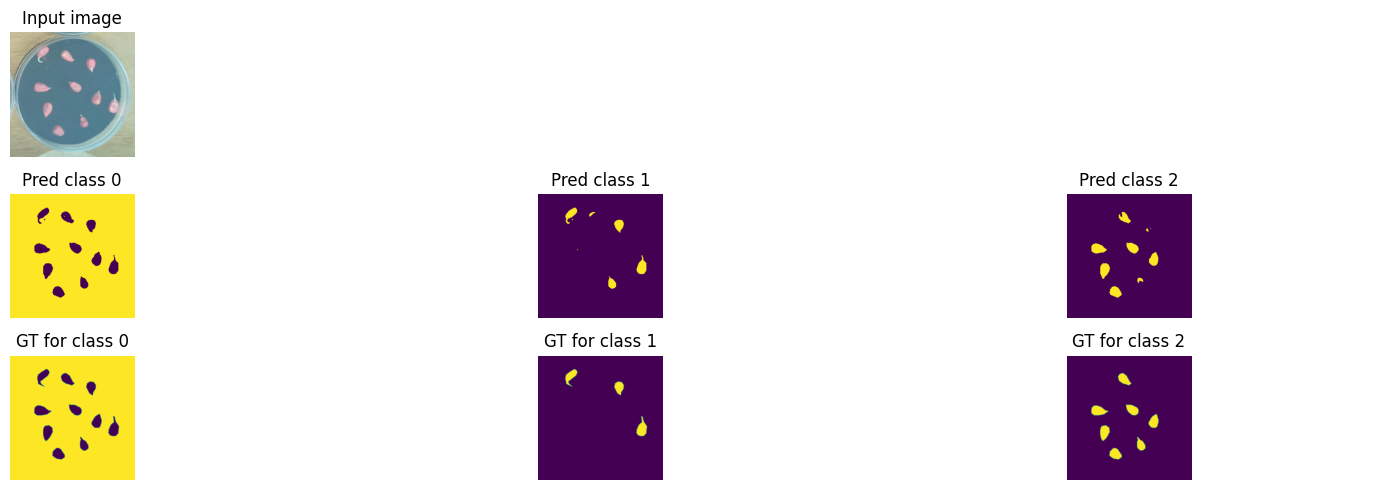

Train loss: 0.25904 | Time: 24m 29s | Val loss: 0.26521
Train_DICE_avg: 0.77108 | Train_Jaccard_avg: 0.71149 | Train_Sensitivity_avg: 0.77067 | Train_Specificity_avg: 0.96866 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98450 | Train_Sensitivity: 0.98971 | Train_Specificity: 0.91166 
Class 1 - Train_DICE: 0.44743 | Train_Jaccard: 0.36544 | Train_Sensitivity: 0.45815 | Train_Specificity: 0.99775 
Class 2 - Train_DICE: 0.87364 | Train_Jaccard: 0.78454 | Train_Sensitivity: 0.86414 | Train_Specificity: 0.99656 
Val_DICE_avg: 0.76895 | Val_Jaccard_avg: 0.71980 | Val_Sensitivity_avg: 0.76723 | Val_Specificity_avg: 0.95476 
Class 0 - Val_DICE: 0.99645 | Val_Jaccard: 0.99294 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.86889 
Class 1 - Val_DICE: 0.41711 | Val_Jaccard: 0.34934 | Val_Sensitivity: 0.41879 | Val_Specificity: 0.99807 
Class 2 - Val_DICE: 0.89329 | Val_Jaccard: 0.81711 | Val_Sensitivity: 0.88558 | Val_Specificity: 0.99731 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.25401 | Time: 25m 17s | Val loss: 0.24622
Train_DICE_avg: 0.78010 | Train_Jaccard_avg: 0.72068 | Train_Sensitivity_avg: 0.78213 | Train_Specificity_avg: 0.96671 
Class 0 - Train_DICE: 0.99222 | Train_Jaccard: 0.98462 | Train_Sensitivity: 0.99016 | Train_Specificity: 0.90586 
Class 1 - Train_DICE: 0.47318 | Train_Jaccard: 0.39133 | Train_Sensitivity: 0.48931 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.87489 | Train_Jaccard: 0.78609 | Train_Sensitivity: 0.86690 | Train_Specificity: 0.99653 
Val_DICE_avg: 0.78462 | Val_Jaccard_avg: 0.73452 | Val_Sensitivity_avg: 0.79024 | Val_Specificity_avg: 0.95283 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99249 | Val_Sensitivity: 0.99774 | Val_Specificity: 0.86295 
Class 1 - Val_DICE: 0.46788 | Val_Jaccard: 0.39967 | Val_Sensitivity: 0.50331 | Val_Specificity: 0.99799 
Class 2 - Val_DICE: 0.88974 | Val_Jaccard: 0.81139 | Val_Sensitivity: 0.86969 | Val_Specificity: 0.99755 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.24859 | Time: 26m 4s | Val loss: 0.24746
Train_DICE_avg: 0.78650 | Train_Jaccard_avg: 0.72724 | Train_Sensitivity_avg: 0.79005 | Train_Specificity_avg: 0.96663 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98451 | Train_Sensitivity: 0.99001 | Train_Specificity: 0.90565 
Class 1 - Train_DICE: 0.49342 | Train_Jaccard: 0.41207 | Train_Sensitivity: 0.51306 | Train_Specificity: 0.99772 
Class 2 - Train_DICE: 0.87392 | Train_Jaccard: 0.78515 | Train_Sensitivity: 0.86708 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.78105 | Val_Jaccard_avg: 0.73205 | Val_Sensitivity_avg: 0.78412 | Val_Specificity_avg: 0.94478 
Class 0 - Val_DICE: 0.99576 | Val_Jaccard: 0.99158 | Val_Sensitivity: 0.99792 | Val_Specificity: 0.83830 
Class 1 - Val_DICE: 0.45775 | Val_Jaccard: 0.39299 | Val_Sensitivity: 0.48513 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.88964 | Val_Jaccard: 0.81158 | Val_Sensitivity: 0.86929 | Val_Specificity: 0.99793 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.24176 | Time: 26m 51s | Val loss: 0.23617
Train_DICE_avg: 0.78512 | Train_Jaccard_avg: 0.72626 | Train_Sensitivity_avg: 0.78740 | Train_Specificity_avg: 0.96666 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98472 | Train_Sensitivity: 0.99027 | Train_Specificity: 0.90561 
Class 1 - Train_DICE: 0.48648 | Train_Jaccard: 0.40515 | Train_Sensitivity: 0.50129 | Train_Specificity: 0.99783 
Class 2 - Train_DICE: 0.87662 | Train_Jaccard: 0.78890 | Train_Sensitivity: 0.87065 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.82684 | Val_Jaccard_avg: 0.77793 | Val_Sensitivity_avg: 0.83203 | Val_Specificity_avg: 0.95477 
Class 0 - Val_DICE: 0.99638 | Val_Jaccard: 0.99280 | Val_Sensitivity: 0.99763 | Val_Specificity: 0.86870 
Class 1 - Val_DICE: 0.58924 | Val_Jaccard: 0.52106 | Val_Sensitivity: 0.61410 | Val_Specificity: 0.99795 
Class 2 - Val_DICE: 0.89490 | Val_Jaccard: 0.81992 | Val_Sensitivity: 0.88436 | Val_Specificity: 0.99766 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.23825 | Time: 27m 39s | Val loss: 0.23611
Train_DICE_avg: 0.78909 | Train_Jaccard_avg: 0.73053 | Train_Sensitivity_avg: 0.79287 | Train_Specificity_avg: 0.96541 
Class 0 - Train_DICE: 0.99251 | Train_Jaccard: 0.98518 | Train_Sensitivity: 0.99105 | Train_Specificity: 0.90190 
Class 1 - Train_DICE: 0.49725 | Train_Jaccard: 0.41611 | Train_Sensitivity: 0.51636 | Train_Specificity: 0.99776 
Class 2 - Train_DICE: 0.87751 | Train_Jaccard: 0.79030 | Train_Sensitivity: 0.87120 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.81351 | Val_Jaccard_avg: 0.76419 | Val_Sensitivity_avg: 0.82610 | Val_Specificity_avg: 0.96073 
Class 0 - Val_DICE: 0.99653 | Val_Jaccard: 0.99310 | Val_Sensitivity: 0.99733 | Val_Specificity: 0.88735 
Class 1 - Val_DICE: 0.55210 | Val_Jaccard: 0.48427 | Val_Sensitivity: 0.57224 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.89190 | Val_Jaccard: 0.81521 | Val_Sensitivity: 0.90873 | Val_Specificity: 0.99681 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


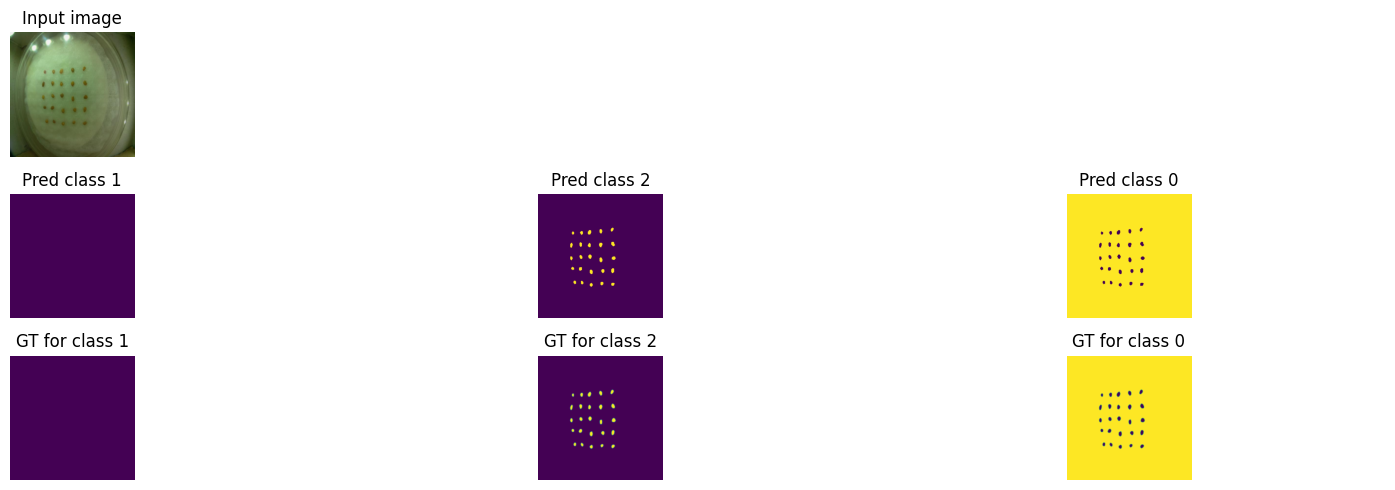

Train loss: 0.23599 | Time: 28m 27s | Val loss: 0.23160
Train_DICE_avg: 0.79521 | Train_Jaccard_avg: 0.73707 | Train_Sensitivity_avg: 0.79999 | Train_Specificity_avg: 0.96617 
Class 0 - Train_DICE: 0.99258 | Train_Jaccard: 0.98532 | Train_Sensitivity: 0.99112 | Train_Specificity: 0.90413 
Class 1 - Train_DICE: 0.51388 | Train_Jaccard: 0.43319 | Train_Sensitivity: 0.53590 | Train_Specificity: 0.99781 
Class 2 - Train_DICE: 0.87918 | Train_Jaccard: 0.79269 | Train_Sensitivity: 0.87296 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.84187 | Val_Jaccard_avg: 0.79369 | Val_Sensitivity_avg: 0.84886 | Val_Specificity_avg: 0.95607 
Class 0 - Val_DICE: 0.99645 | Val_Jaccard: 0.99294 | Val_Sensitivity: 0.99764 | Val_Specificity: 0.87284 
Class 1 - Val_DICE: 0.63220 | Val_Jaccard: 0.56483 | Val_Sensitivity: 0.65069 | Val_Specificity: 0.99798 
Class 2 - Val_DICE: 0.89696 | Val_Jaccard: 0.82329 | Val_Sensitivity: 0.89826 | Val_Specificity: 0.99740 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.23417 | Time: 29m 14s | Val loss: 0.23008
Train_DICE_avg: 0.79664 | Train_Jaccard_avg: 0.73842 | Train_Sensitivity_avg: 0.80125 | Train_Specificity_avg: 0.96574 
Class 0 - Train_DICE: 0.99247 | Train_Jaccard: 0.98510 | Train_Sensitivity: 0.99096 | Train_Specificity: 0.90288 
Class 1 - Train_DICE: 0.51841 | Train_Jaccard: 0.43755 | Train_Sensitivity: 0.53923 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.87904 | Train_Jaccard: 0.79261 | Train_Sensitivity: 0.87355 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.82692 | Val_Jaccard_avg: 0.77886 | Val_Sensitivity_avg: 0.83017 | Val_Specificity_avg: 0.94731 
Class 0 - Val_DICE: 0.99604 | Val_Jaccard: 0.99213 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.84605 
Class 1 - Val_DICE: 0.59113 | Val_Jaccard: 0.52592 | Val_Sensitivity: 0.60551 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.89359 | Val_Jaccard: 0.81854 | Val_Sensitivity: 0.88691 | Val_Specificity: 0.99760 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.22971 | Time: 30m 2s | Val loss: 0.20162
Train_DICE_avg: 0.81419 | Train_Jaccard_avg: 0.75691 | Train_Sensitivity_avg: 0.82603 | Train_Specificity_avg: 0.96668 
Class 0 - Train_DICE: 0.99245 | Train_Jaccard: 0.98508 | Train_Sensitivity: 0.99092 | Train_Specificity: 0.90572 
Class 1 - Train_DICE: 0.57110 | Train_Jaccard: 0.49315 | Train_Sensitivity: 0.61257 | Train_Specificity: 0.99781 
Class 2 - Train_DICE: 0.87903 | Train_Jaccard: 0.79249 | Train_Sensitivity: 0.87460 | Train_Specificity: 0.99651 
Val_DICE_avg: 0.83241 | Val_Jaccard_avg: 0.78731 | Val_Sensitivity_avg: 0.85473 | Val_Specificity_avg: 0.95428 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99282 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.86754 
Class 1 - Val_DICE: 0.60835 | Val_Jaccard: 0.55269 | Val_Sensitivity: 0.68456 | Val_Specificity: 0.99792 
Class 2 - Val_DICE: 0.89249 | Val_Jaccard: 0.81644 | Val_Sensitivity: 0.88202 | Val_Specificity: 0.99737 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.21435 | Time: 30m 50s | Val loss: 0.19189
Train_DICE_avg: 0.82982 | Train_Jaccard_avg: 0.77331 | Train_Sensitivity_avg: 0.84906 | Train_Specificity_avg: 0.96712 
Class 0 - Train_DICE: 0.99229 | Train_Jaccard: 0.98477 | Train_Sensitivity: 0.99033 | Train_Specificity: 0.90711 
Class 1 - Train_DICE: 0.61859 | Train_Jaccard: 0.54329 | Train_Sensitivity: 0.68304 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.87858 | Train_Jaccard: 0.79187 | Train_Sensitivity: 0.87380 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.83457 | Val_Jaccard_avg: 0.78889 | Val_Sensitivity_avg: 0.85287 | Val_Specificity_avg: 0.95425 
Class 0 - Val_DICE: 0.99636 | Val_Jaccard: 0.99277 | Val_Sensitivity: 0.99774 | Val_Specificity: 0.86743 
Class 1 - Val_DICE: 0.61108 | Val_Jaccard: 0.55211 | Val_Sensitivity: 0.66357 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.89625 | Val_Jaccard: 0.82178 | Val_Sensitivity: 0.89729 | Val_Specificity: 0.99719 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.20748 | Time: 31m 37s | Val loss: 0.18909
Train_DICE_avg: 0.83337 | Train_Jaccard_avg: 0.77757 | Train_Sensitivity_avg: 0.85385 | Train_Specificity_avg: 0.96655 
Class 0 - Train_DICE: 0.99252 | Train_Jaccard: 0.98520 | Train_Sensitivity: 0.99087 | Train_Specificity: 0.90532 
Class 1 - Train_DICE: 0.62798 | Train_Jaccard: 0.55388 | Train_Sensitivity: 0.69586 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.87963 | Train_Jaccard: 0.79362 | Train_Sensitivity: 0.87482 | Train_Specificity: 0.99656 
Val_DICE_avg: 0.84046 | Val_Jaccard_avg: 0.79523 | Val_Sensitivity_avg: 0.86153 | Val_Specificity_avg: 0.95402 
Class 0 - Val_DICE: 0.99638 | Val_Jaccard: 0.99281 | Val_Sensitivity: 0.99763 | Val_Specificity: 0.86672 
Class 1 - Val_DICE: 0.62830 | Val_Jaccard: 0.57001 | Val_Sensitivity: 0.69156 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.89672 | Val_Jaccard: 0.82287 | Val_Sensitivity: 0.89540 | Val_Specificity: 0.99753 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


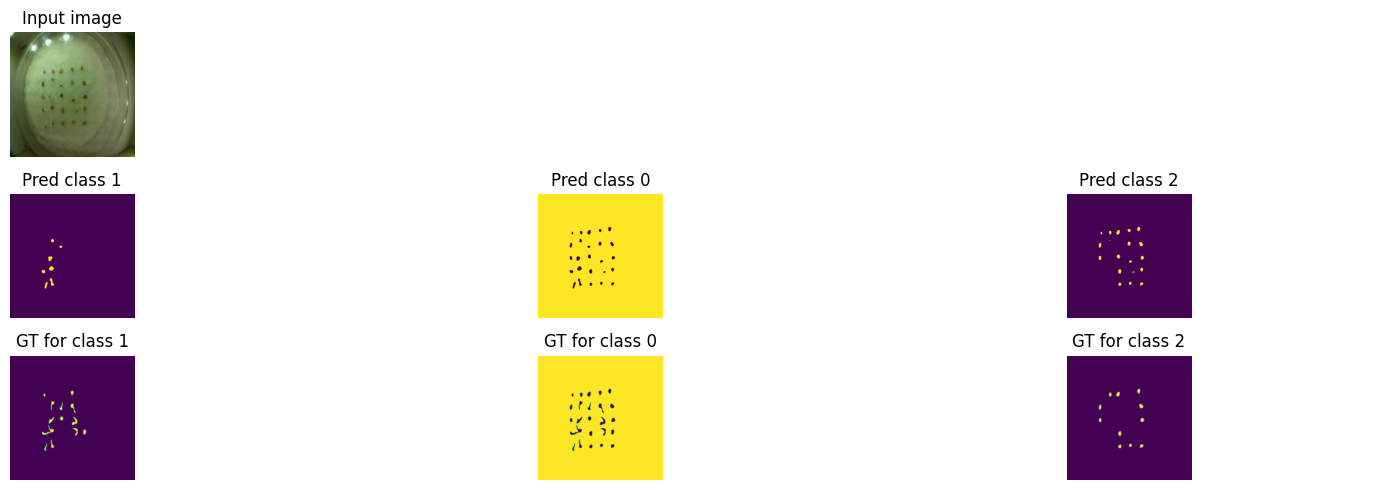

Train loss: 0.20498 | Time: 32m 25s | Val loss: 0.18722
Train_DICE_avg: 0.83349 | Train_Jaccard_avg: 0.77718 | Train_Sensitivity_avg: 0.85247 | Train_Specificity_avg: 0.96759 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98516 | Train_Sensitivity: 0.99065 | Train_Specificity: 0.90850 
Class 1 - Train_DICE: 0.62838 | Train_Jaccard: 0.55287 | Train_Sensitivity: 0.69103 | Train_Specificity: 0.99775 
Class 2 - Train_DICE: 0.87959 | Train_Jaccard: 0.79352 | Train_Sensitivity: 0.87572 | Train_Specificity: 0.99653 
Val_DICE_avg: 0.83731 | Val_Jaccard_avg: 0.79201 | Val_Sensitivity_avg: 0.86052 | Val_Specificity_avg: 0.95770 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99290 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.87785 
Class 1 - Val_DICE: 0.61884 | Val_Jaccard: 0.56105 | Val_Sensitivity: 0.67987 | Val_Specificity: 0.99803 
Class 2 - Val_DICE: 0.89667 | Val_Jaccard: 0.82209 | Val_Sensitivity: 0.90401 | Val_Specificity: 0.99723 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.20081 | Time: 33m 13s | Val loss: 0.18898
Train_DICE_avg: 0.83793 | Train_Jaccard_avg: 0.78145 | Train_Sensitivity_avg: 0.85609 | Train_Specificity_avg: 0.96701 
Class 0 - Train_DICE: 0.99245 | Train_Jaccard: 0.98507 | Train_Sensitivity: 0.99068 | Train_Specificity: 0.90670 
Class 1 - Train_DICE: 0.64089 | Train_Jaccard: 0.56467 | Train_Sensitivity: 0.70166 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.88044 | Train_Jaccard: 0.79461 | Train_Sensitivity: 0.87592 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.83621 | Val_Jaccard_avg: 0.79058 | Val_Sensitivity_avg: 0.85721 | Val_Specificity_avg: 0.95434 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99282 | Val_Sensitivity: 0.99773 | Val_Specificity: 0.86783 
Class 1 - Val_DICE: 0.61735 | Val_Jaccard: 0.55879 | Val_Sensitivity: 0.67726 | Val_Specificity: 0.99808 
Class 2 - Val_DICE: 0.89489 | Val_Jaccard: 0.82014 | Val_Sensitivity: 0.89665 | Val_Specificity: 0.99712 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.19875 | Time: 34m 1s | Val loss: 0.18363
Train_DICE_avg: 0.83723 | Train_Jaccard_avg: 0.78150 | Train_Sensitivity_avg: 0.85558 | Train_Specificity_avg: 0.96832 
Class 0 - Train_DICE: 0.99248 | Train_Jaccard: 0.98514 | Train_Sensitivity: 0.99070 | Train_Specificity: 0.91065 
Class 1 - Train_DICE: 0.63765 | Train_Jaccard: 0.56312 | Train_Sensitivity: 0.69775 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.88156 | Train_Jaccard: 0.79626 | Train_Sensitivity: 0.87828 | Train_Specificity: 0.99654 
Val_DICE_avg: 0.84236 | Val_Jaccard_avg: 0.79697 | Val_Sensitivity_avg: 0.86767 | Val_Specificity_avg: 0.96299 
Class 0 - Val_DICE: 0.99671 | Val_Jaccard: 0.99345 | Val_Sensitivity: 0.99729 | Val_Specificity: 0.89413 
Class 1 - Val_DICE: 0.63323 | Val_Jaccard: 0.57401 | Val_Sensitivity: 0.68743 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.89716 | Val_Jaccard: 0.82345 | Val_Sensitivity: 0.91828 | Val_Specificity: 0.99679 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.19519 | Time: 34m 48s | Val loss: 0.18957
Train_DICE_avg: 0.84236 | Train_Jaccard_avg: 0.78681 | Train_Sensitivity_avg: 0.86057 | Train_Specificity_avg: 0.96733 
Class 0 - Train_DICE: 0.99281 | Train_Jaccard: 0.98577 | Train_Sensitivity: 0.99138 | Train_Specificity: 0.90763 
Class 1 - Train_DICE: 0.65198 | Train_Jaccard: 0.57716 | Train_Sensitivity: 0.71177 | Train_Specificity: 0.99779 
Class 2 - Train_DICE: 0.88229 | Train_Jaccard: 0.79751 | Train_Sensitivity: 0.87855 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.83763 | Val_Jaccard_avg: 0.79077 | Val_Sensitivity_avg: 0.85609 | Val_Specificity_avg: 0.95592 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99283 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.87279 
Class 1 - Val_DICE: 0.62223 | Val_Jaccard: 0.56081 | Val_Sensitivity: 0.65718 | Val_Specificity: 0.99837 
Class 2 - Val_DICE: 0.89428 | Val_Jaccard: 0.81866 | Val_Sensitivity: 0.91329 | Val_Specificity: 0.99661 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.19690 | Time: 35m 35s | Val loss: 0.18340
Train_DICE_avg: 0.84174 | Train_Jaccard_avg: 0.78663 | Train_Sensitivity_avg: 0.86084 | Train_Specificity_avg: 0.96680 
Class 0 - Train_DICE: 0.99282 | Train_Jaccard: 0.98579 | Train_Sensitivity: 0.99139 | Train_Specificity: 0.90600 
Class 1 - Train_DICE: 0.64929 | Train_Jaccard: 0.57520 | Train_Sensitivity: 0.71164 | Train_Specificity: 0.99779 
Class 2 - Train_DICE: 0.88310 | Train_Jaccard: 0.79891 | Train_Sensitivity: 0.87950 | Train_Specificity: 0.99661 
Val_DICE_avg: 0.84021 | Val_Jaccard_avg: 0.79669 | Val_Sensitivity_avg: 0.86553 | Val_Specificity_avg: 0.95654 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99773 | Val_Specificity: 0.87435 
Class 1 - Val_DICE: 0.62696 | Val_Jaccard: 0.57277 | Val_Sensitivity: 0.69745 | Val_Specificity: 0.99801 
Class 2 - Val_DICE: 0.89718 | Val_Jaccard: 0.82428 | Val_Sensitivity: 0.90141 | Val_Specificity: 0.99727 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


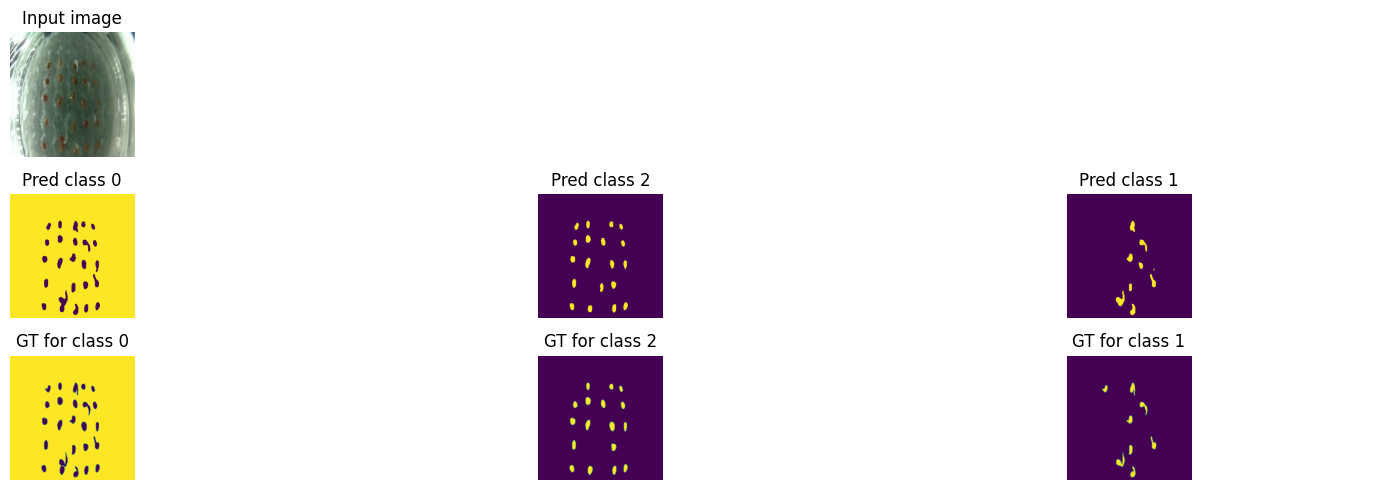

Train loss: 0.19301 | Time: 36m 23s | Val loss: 0.18007
Train_DICE_avg: 0.84492 | Train_Jaccard_avg: 0.78974 | Train_Sensitivity_avg: 0.86563 | Train_Specificity_avg: 0.96682 
Class 0 - Train_DICE: 0.99275 | Train_Jaccard: 0.98566 | Train_Sensitivity: 0.99137 | Train_Specificity: 0.90613 
Class 1 - Train_DICE: 0.65890 | Train_Jaccard: 0.58472 | Train_Sensitivity: 0.72531 | Train_Specificity: 0.99777 
Class 2 - Train_DICE: 0.88312 | Train_Jaccard: 0.79883 | Train_Sensitivity: 0.88021 | Train_Specificity: 0.99655 
Val_DICE_avg: 0.84024 | Val_Jaccard_avg: 0.79513 | Val_Sensitivity_avg: 0.85946 | Val_Specificity_avg: 0.95560 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99290 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.87156 
Class 1 - Val_DICE: 0.62540 | Val_Jaccard: 0.56660 | Val_Sensitivity: 0.66621 | Val_Specificity: 0.99830 
Class 2 - Val_DICE: 0.89888 | Val_Jaccard: 0.82589 | Val_Sensitivity: 0.91435 | Val_Specificity: 0.99694 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.18891 | Time: 37m 11s | Val loss: 0.17568
Train_DICE_avg: 0.84965 | Train_Jaccard_avg: 0.79485 | Train_Sensitivity_avg: 0.86886 | Train_Specificity_avg: 0.96682 
Class 0 - Train_DICE: 0.99274 | Train_Jaccard: 0.98564 | Train_Sensitivity: 0.99134 | Train_Specificity: 0.90600 
Class 1 - Train_DICE: 0.67118 | Train_Jaccard: 0.59736 | Train_Sensitivity: 0.73436 | Train_Specificity: 0.99779 
Class 2 - Train_DICE: 0.88502 | Train_Jaccard: 0.80155 | Train_Sensitivity: 0.88087 | Train_Specificity: 0.99666 
Val_DICE_avg: 0.85153 | Val_Jaccard_avg: 0.80611 | Val_Sensitivity_avg: 0.86792 | Val_Specificity_avg: 0.95453 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99287 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.86816 
Class 1 - Val_DICE: 0.65796 | Val_Jaccard: 0.59775 | Val_Sensitivity: 0.70106 | Val_Specificity: 0.99821 
Class 2 - Val_DICE: 0.90023 | Val_Jaccard: 0.82769 | Val_Sensitivity: 0.90482 | Val_Specificity: 0.99723 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.19099 | Time: 37m 59s | Val loss: 0.17548
Train_DICE_avg: 0.85028 | Train_Jaccard_avg: 0.79569 | Train_Sensitivity_avg: 0.87092 | Train_Specificity_avg: 0.96685 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98604 | Train_Sensitivity: 0.99166 | Train_Specificity: 0.90617 
Class 1 - Train_DICE: 0.67246 | Train_Jaccard: 0.59874 | Train_Sensitivity: 0.73973 | Train_Specificity: 0.99773 
Class 2 - Train_DICE: 0.88544 | Train_Jaccard: 0.80228 | Train_Sensitivity: 0.88136 | Train_Specificity: 0.99666 
Val_DICE_avg: 0.84974 | Val_Jaccard_avg: 0.80444 | Val_Sensitivity_avg: 0.87095 | Val_Specificity_avg: 0.95189 
Class 0 - Val_DICE: 0.99629 | Val_Jaccard: 0.99264 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.86000 
Class 1 - Val_DICE: 0.65379 | Val_Jaccard: 0.59435 | Val_Sensitivity: 0.72223 | Val_Specificity: 0.99804 
Class 2 - Val_DICE: 0.89914 | Val_Jaccard: 0.82632 | Val_Sensitivity: 0.89258 | Val_Specificity: 0.99765 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.18658 | Time: 38m 47s | Val loss: 0.17438
Train_DICE_avg: 0.85032 | Train_Jaccard_avg: 0.79549 | Train_Sensitivity_avg: 0.87046 | Train_Specificity_avg: 0.96713 
Class 0 - Train_DICE: 0.99278 | Train_Jaccard: 0.98572 | Train_Sensitivity: 0.99156 | Train_Specificity: 0.90695 
Class 1 - Train_DICE: 0.67232 | Train_Jaccard: 0.59802 | Train_Sensitivity: 0.73611 | Train_Specificity: 0.99780 
Class 2 - Train_DICE: 0.88585 | Train_Jaccard: 0.80273 | Train_Sensitivity: 0.88371 | Train_Specificity: 0.99664 
Val_DICE_avg: 0.84970 | Val_Jaccard_avg: 0.80315 | Val_Sensitivity_avg: 0.86672 | Val_Specificity_avg: 0.95420 
Class 0 - Val_DICE: 0.99636 | Val_Jaccard: 0.99276 | Val_Sensitivity: 0.99795 | Val_Specificity: 0.86718 
Class 1 - Val_DICE: 0.65667 | Val_Jaccard: 0.59467 | Val_Sensitivity: 0.69518 | Val_Specificity: 0.99833 
Class 2 - Val_DICE: 0.89606 | Val_Jaccard: 0.82201 | Val_Sensitivity: 0.90702 | Val_Specificity: 0.99708 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.18717 | Time: 39m 35s | Val loss: 0.17423
Train_DICE_avg: 0.84994 | Train_Jaccard_avg: 0.79534 | Train_Sensitivity_avg: 0.87107 | Train_Specificity_avg: 0.96784 
Class 0 - Train_DICE: 0.99287 | Train_Jaccard: 0.98589 | Train_Sensitivity: 0.99148 | Train_Specificity: 0.90911 
Class 1 - Train_DICE: 0.67115 | Train_Jaccard: 0.59749 | Train_Sensitivity: 0.73882 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.88581 | Train_Jaccard: 0.80263 | Train_Sensitivity: 0.88293 | Train_Specificity: 0.99663 
Val_DICE_avg: 0.84526 | Val_Jaccard_avg: 0.80064 | Val_Sensitivity_avg: 0.86866 | Val_Specificity_avg: 0.95503 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99287 | Val_Sensitivity: 0.99786 | Val_Specificity: 0.86963 
Class 1 - Val_DICE: 0.64042 | Val_Jaccard: 0.58305 | Val_Sensitivity: 0.70986 | Val_Specificity: 0.99806 
Class 2 - Val_DICE: 0.89893 | Val_Jaccard: 0.82599 | Val_Sensitivity: 0.89826 | Val_Specificity: 0.99740 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


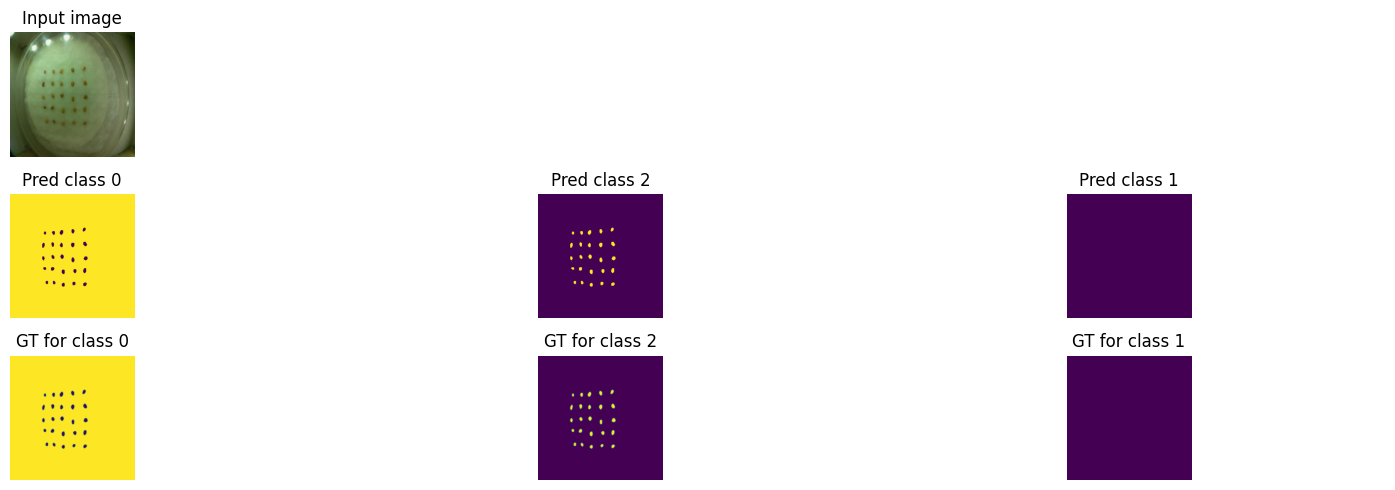

Train loss: 0.18753 | Time: 40m 23s | Val loss: 0.17335
Train_DICE_avg: 0.85248 | Train_Jaccard_avg: 0.79855 | Train_Sensitivity_avg: 0.87724 | Train_Specificity_avg: 0.96671 
Class 0 - Train_DICE: 0.99286 | Train_Jaccard: 0.98587 | Train_Sensitivity: 0.99176 | Train_Specificity: 0.90569 
Class 1 - Train_DICE: 0.67777 | Train_Jaccard: 0.60559 | Train_Sensitivity: 0.75749 | Train_Specificity: 0.99772 
Class 2 - Train_DICE: 0.88681 | Train_Jaccard: 0.80417 | Train_Sensitivity: 0.88248 | Train_Specificity: 0.99671 
Val_DICE_avg: 0.84656 | Val_Jaccard_avg: 0.80115 | Val_Sensitivity_avg: 0.86650 | Val_Specificity_avg: 0.95285 
Class 0 - Val_DICE: 0.99625 | Val_Jaccard: 0.99256 | Val_Sensitivity: 0.99800 | Val_Specificity: 0.86297 
Class 1 - Val_DICE: 0.64403 | Val_Jaccard: 0.58434 | Val_Sensitivity: 0.70255 | Val_Specificity: 0.99812 
Class 2 - Val_DICE: 0.89941 | Val_Jaccard: 0.82657 | Val_Sensitivity: 0.89895 | Val_Specificity: 0.99746 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.18278 | Time: 41m 11s | Val loss: 0.17220
Train_DICE_avg: 0.85526 | Train_Jaccard_avg: 0.80110 | Train_Sensitivity_avg: 0.87689 | Train_Specificity_avg: 0.96762 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98607 | Train_Sensitivity: 0.99163 | Train_Specificity: 0.90837 
Class 1 - Train_DICE: 0.68574 | Train_Jaccard: 0.61255 | Train_Sensitivity: 0.75582 | Train_Specificity: 0.99778 
Class 2 - Train_DICE: 0.88706 | Train_Jaccard: 0.80466 | Train_Sensitivity: 0.88322 | Train_Specificity: 0.99671 
Val_DICE_avg: 0.84726 | Val_Jaccard_avg: 0.80222 | Val_Sensitivity_avg: 0.86584 | Val_Specificity_avg: 0.95222 
Class 0 - Val_DICE: 0.99629 | Val_Jaccard: 0.99263 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.86119 
Class 1 - Val_DICE: 0.64677 | Val_Jaccard: 0.58815 | Val_Sensitivity: 0.70288 | Val_Specificity: 0.99813 
Class 2 - Val_DICE: 0.89870 | Val_Jaccard: 0.82590 | Val_Sensitivity: 0.89662 | Val_Specificity: 0.99734 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.18281 | Time: 41m 59s | Val loss: 0.17014
Train_DICE_avg: 0.85572 | Train_Jaccard_avg: 0.80166 | Train_Sensitivity_avg: 0.87600 | Train_Specificity_avg: 0.96694 
Class 0 - Train_DICE: 0.99297 | Train_Jaccard: 0.98609 | Train_Sensitivity: 0.99181 | Train_Specificity: 0.90633 
Class 1 - Train_DICE: 0.68675 | Train_Jaccard: 0.61375 | Train_Sensitivity: 0.75213 | Train_Specificity: 0.99782 
Class 2 - Train_DICE: 0.88744 | Train_Jaccard: 0.80516 | Train_Sensitivity: 0.88406 | Train_Specificity: 0.99668 
Val_DICE_avg: 0.85082 | Val_Jaccard_avg: 0.80521 | Val_Sensitivity_avg: 0.86495 | Val_Specificity_avg: 0.95259 
Class 0 - Val_DICE: 0.99627 | Val_Jaccard: 0.99260 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.86197 
Class 1 - Val_DICE: 0.65578 | Val_Jaccard: 0.59477 | Val_Sensitivity: 0.69821 | Val_Specificity: 0.99827 
Class 2 - Val_DICE: 0.90041 | Val_Jaccard: 0.82826 | Val_Sensitivity: 0.89854 | Val_Specificity: 0.99752 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.18336 | Time: 42m 47s | Val loss: 0.17332
Train_DICE_avg: 0.85560 | Train_Jaccard_avg: 0.80184 | Train_Sensitivity_avg: 0.87951 | Train_Specificity_avg: 0.96752 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98605 | Train_Sensitivity: 0.99170 | Train_Specificity: 0.90801 
Class 1 - Train_DICE: 0.68600 | Train_Jaccard: 0.61372 | Train_Sensitivity: 0.76237 | Train_Specificity: 0.99784 
Class 2 - Train_DICE: 0.88785 | Train_Jaccard: 0.80575 | Train_Sensitivity: 0.88445 | Train_Specificity: 0.99670 
Val_DICE_avg: 0.84582 | Val_Jaccard_avg: 0.80098 | Val_Sensitivity_avg: 0.86937 | Val_Specificity_avg: 0.95440 
Class 0 - Val_DICE: 0.99634 | Val_Jaccard: 0.99274 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.86759 
Class 1 - Val_DICE: 0.64183 | Val_Jaccard: 0.58344 | Val_Sensitivity: 0.70571 | Val_Specificity: 0.99822 
Class 2 - Val_DICE: 0.89929 | Val_Jaccard: 0.82677 | Val_Sensitivity: 0.90438 | Val_Specificity: 0.99739 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.17882 | Time: 43m 34s | Val loss: 0.17184
Train_DICE_avg: 0.85674 | Train_Jaccard_avg: 0.80296 | Train_Sensitivity_avg: 0.87844 | Train_Specificity_avg: 0.96660 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98614 | Train_Sensitivity: 0.99194 | Train_Specificity: 0.90523 
Class 1 - Train_DICE: 0.68903 | Train_Jaccard: 0.61637 | Train_Sensitivity: 0.75789 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.88820 | Train_Jaccard: 0.80638 | Train_Sensitivity: 0.88550 | Train_Specificity: 0.99671 
Val_DICE_avg: 0.84650 | Val_Jaccard_avg: 0.80062 | Val_Sensitivity_avg: 0.86339 | Val_Specificity_avg: 0.95449 
Class 0 - Val_DICE: 0.99637 | Val_Jaccard: 0.99278 | Val_Sensitivity: 0.99799 | Val_Specificity: 0.86800 
Class 1 - Val_DICE: 0.64477 | Val_Jaccard: 0.58397 | Val_Sensitivity: 0.68494 | Val_Specificity: 0.99832 
Class 2 - Val_DICE: 0.89834 | Val_Jaccard: 0.82510 | Val_Sensitivity: 0.90724 | Val_Specificity: 0.99716 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


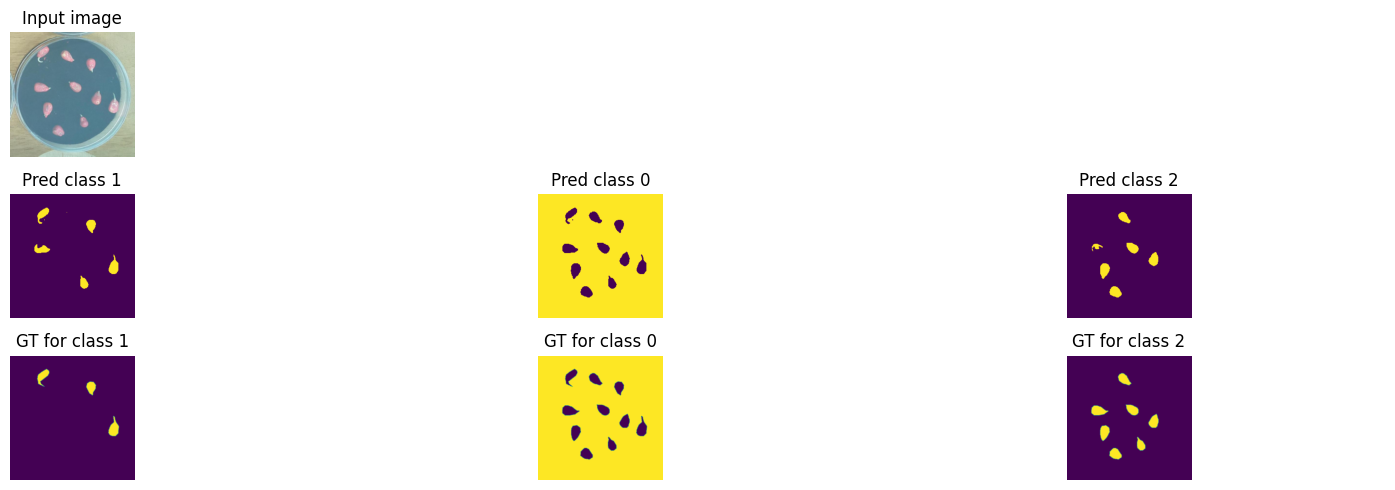

Train loss: 0.18147 | Time: 44m 22s | Val loss: 0.16869
Train_DICE_avg: 0.85566 | Train_Jaccard_avg: 0.80154 | Train_Sensitivity_avg: 0.87726 | Train_Specificity_avg: 0.96677 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98616 | Train_Sensitivity: 0.99198 | Train_Specificity: 0.90580 
Class 1 - Train_DICE: 0.68687 | Train_Jaccard: 0.61383 | Train_Sensitivity: 0.75558 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.88712 | Train_Jaccard: 0.80464 | Train_Sensitivity: 0.88422 | Train_Specificity: 0.99667 
Val_DICE_avg: 0.84946 | Val_Jaccard_avg: 0.80397 | Val_Sensitivity_avg: 0.86954 | Val_Specificity_avg: 0.95565 
Class 0 - Val_DICE: 0.99648 | Val_Jaccard: 0.99301 | Val_Sensitivity: 0.99786 | Val_Specificity: 0.87161 
Class 1 - Val_DICE: 0.65215 | Val_Jaccard: 0.59121 | Val_Sensitivity: 0.69840 | Val_Specificity: 0.99818 
Class 2 - Val_DICE: 0.89976 | Val_Jaccard: 0.82769 | Val_Sensitivity: 0.91237 | Val_Specificity: 0.99716 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.17908 | Time: 45m 10s | Val loss: 0.16876
Train_DICE_avg: 0.85989 | Train_Jaccard_avg: 0.80625 | Train_Sensitivity_avg: 0.88307 | Train_Specificity_avg: 0.96680 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98628 | Train_Sensitivity: 0.99197 | Train_Specificity: 0.90584 
Class 1 - Train_DICE: 0.69792 | Train_Jaccard: 0.62523 | Train_Sensitivity: 0.77270 | Train_Specificity: 0.99779 
Class 2 - Train_DICE: 0.88868 | Train_Jaccard: 0.80723 | Train_Sensitivity: 0.88455 | Train_Specificity: 0.99677 
Val_DICE_avg: 0.85130 | Val_Jaccard_avg: 0.80611 | Val_Sensitivity_avg: 0.86978 | Val_Specificity_avg: 0.95297 
Class 0 - Val_DICE: 0.99637 | Val_Jaccard: 0.99278 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.86337 
Class 1 - Val_DICE: 0.65683 | Val_Jaccard: 0.59685 | Val_Sensitivity: 0.70246 | Val_Specificity: 0.99832 
Class 2 - Val_DICE: 0.90071 | Val_Jaccard: 0.82870 | Val_Sensitivity: 0.90883 | Val_Specificity: 0.99721 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.17656 | Time: 45m 58s | Val loss: 0.16628
Train_DICE_avg: 0.85953 | Train_Jaccard_avg: 0.80625 | Train_Sensitivity_avg: 0.88144 | Train_Specificity_avg: 0.96761 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98607 | Train_Sensitivity: 0.99167 | Train_Specificity: 0.90823 
Class 1 - Train_DICE: 0.69640 | Train_Jaccard: 0.62480 | Train_Sensitivity: 0.76636 | Train_Specificity: 0.99785 
Class 2 - Train_DICE: 0.88923 | Train_Jaccard: 0.80788 | Train_Sensitivity: 0.88629 | Train_Specificity: 0.99675 
Val_DICE_avg: 0.85415 | Val_Jaccard_avg: 0.80882 | Val_Sensitivity_avg: 0.87163 | Val_Specificity_avg: 0.95541 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99790 | Val_Specificity: 0.87069 
Class 1 - Val_DICE: 0.66500 | Val_Jaccard: 0.60392 | Val_Sensitivity: 0.70413 | Val_Specificity: 0.99830 
Class 2 - Val_DICE: 0.90097 | Val_Jaccard: 0.82955 | Val_Sensitivity: 0.91285 | Val_Specificity: 0.99725 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.17936 | Time: 46m 46s | Val loss: 0.16314
Train_DICE_avg: 0.85774 | Train_Jaccard_avg: 0.80432 | Train_Sensitivity_avg: 0.88030 | Train_Specificity_avg: 0.96715 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98631 | Train_Sensitivity: 0.99210 | Train_Specificity: 0.90686 
Class 1 - Train_DICE: 0.69170 | Train_Jaccard: 0.61982 | Train_Sensitivity: 0.76395 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.88844 | Train_Jaccard: 0.80684 | Train_Sensitivity: 0.88485 | Train_Specificity: 0.99672 
Val_DICE_avg: 0.85737 | Val_Jaccard_avg: 0.81202 | Val_Sensitivity_avg: 0.87632 | Val_Specificity_avg: 0.95627 
Class 0 - Val_DICE: 0.99653 | Val_Jaccard: 0.99309 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.87341 
Class 1 - Val_DICE: 0.67383 | Val_Jaccard: 0.61221 | Val_Sensitivity: 0.71718 | Val_Specificity: 0.99811 
Class 2 - Val_DICE: 0.90175 | Val_Jaccard: 0.83076 | Val_Sensitivity: 0.91393 | Val_Specificity: 0.99728 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.17815 | Time: 47m 34s | Val loss: 0.16231
Train_DICE_avg: 0.85926 | Train_Jaccard_avg: 0.80562 | Train_Sensitivity_avg: 0.87991 | Train_Specificity_avg: 0.96699 
Class 0 - Train_DICE: 0.99304 | Train_Jaccard: 0.98623 | Train_Sensitivity: 0.99209 | Train_Specificity: 0.90636 
Class 1 - Train_DICE: 0.69637 | Train_Jaccard: 0.62370 | Train_Sensitivity: 0.76205 | Train_Specificity: 0.99787 
Class 2 - Train_DICE: 0.88837 | Train_Jaccard: 0.80691 | Train_Sensitivity: 0.88558 | Train_Specificity: 0.99672 
Val_DICE_avg: 0.85968 | Val_Jaccard_avg: 0.81357 | Val_Sensitivity_avg: 0.87481 | Val_Specificity_avg: 0.95427 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.86740 
Class 1 - Val_DICE: 0.68282 | Val_Jaccard: 0.61948 | Val_Sensitivity: 0.71634 | Val_Specificity: 0.99814 
Class 2 - Val_DICE: 0.89972 | Val_Jaccard: 0.82821 | Val_Sensitivity: 0.91026 | Val_Specificity: 0.99727 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


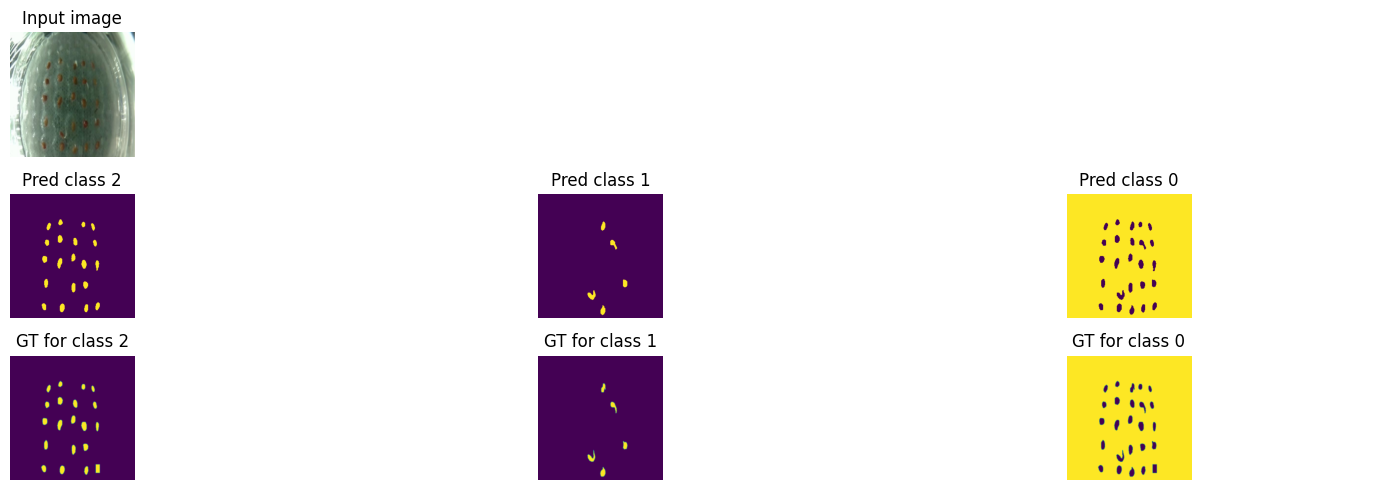

Train loss: 0.17535 | Time: 48m 22s | Val loss: 0.16093
Train_DICE_avg: 0.86296 | Train_Jaccard_avg: 0.80921 | Train_Sensitivity_avg: 0.88290 | Train_Specificity_avg: 0.96770 
Class 0 - Train_DICE: 0.99321 | Train_Jaccard: 0.98655 | Train_Sensitivity: 0.99220 | Train_Specificity: 0.90846 
Class 1 - Train_DICE: 0.70640 | Train_Jaccard: 0.63291 | Train_Sensitivity: 0.76981 | Train_Specificity: 0.99788 
Class 2 - Train_DICE: 0.88927 | Train_Jaccard: 0.80817 | Train_Sensitivity: 0.88668 | Train_Specificity: 0.99676 
Val_DICE_avg: 0.86489 | Val_Jaccard_avg: 0.81865 | Val_Sensitivity_avg: 0.87984 | Val_Specificity_avg: 0.95636 
Class 0 - Val_DICE: 0.99657 | Val_Jaccard: 0.99319 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.87379 
Class 1 - Val_DICE: 0.69887 | Val_Jaccard: 0.63529 | Val_Sensitivity: 0.72522 | Val_Specificity: 0.99833 
Class 2 - Val_DICE: 0.89923 | Val_Jaccard: 0.82749 | Val_Sensitivity: 0.91647 | Val_Specificity: 0.99696 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [ ]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 218MB/s]


<All keys matched successfully>

In [ ]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]



Global Performance Metrics:
Loss mean: 0.15931, std: 0.00524
Dice Coefficient mean: 0.85496, std: 0.11572
Jaccard Index mean: 0.79744, std: 0.12216
Sensitivity mean: 0.90074, std: 0.08891
Specificity mean: 0.96540, std: 0.02150

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99577, std: 0.00238
Jaccard mean: 0.99159, std: 0.00468
Sensitivity mean: 0.99500, std: 0.00331
Specificity mean: 0.90234, std: 0.06474

Class 1:
Dice mean: 0.69785, std: 0.33586
Jaccard mean: 0.62198, std: 0.33643
Sensitivity mean: 0.83057, std: 0.24080
Specificity mean: 0.99725, std: 0.00427

Class 2:
Dice mean: 0.87125, std: 0.07335
Jaccard mean: 0.77874, std: 0.10417
Sensitivity mean: 0.87664, std: 0.09931
Specificity mean: 0.99662, std: 0.00213


### Cross-Entropy Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-UNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.54 GB
GPU Memory - Reserved: 0.81 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


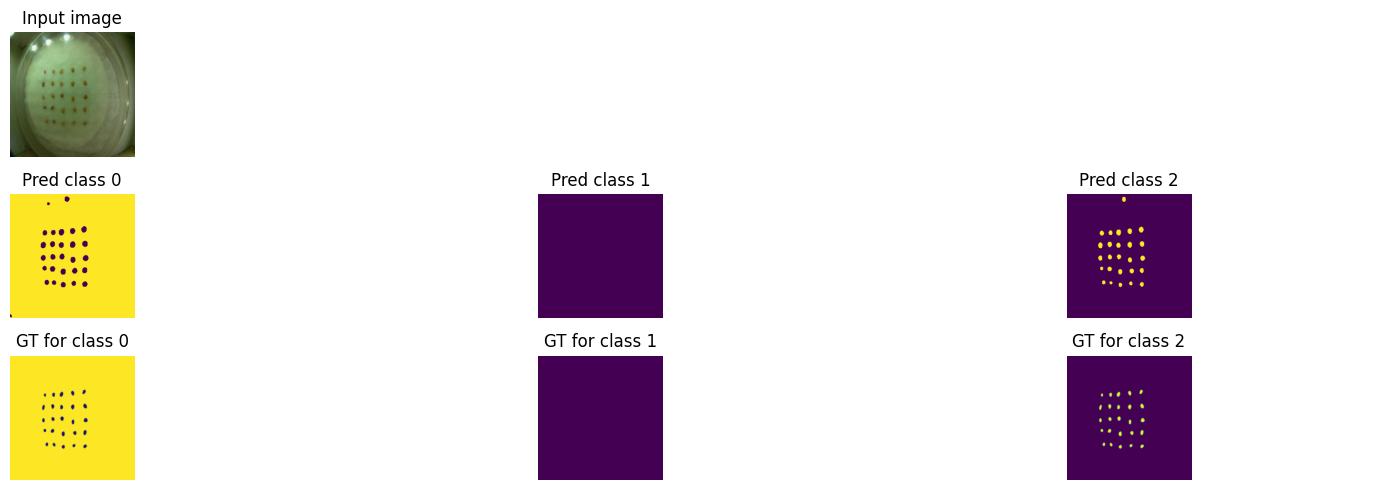

Train loss: 0.56760 | Time: 0m 46s | Val loss: 0.46411
Train_DICE_avg: 0.39424 | Train_Jaccard_avg: 0.31672 | Train_Sensitivity_avg: 0.80482 | Train_Specificity_avg: 0.69125 
Class 0 - Train_DICE: 0.43353 | Train_Jaccard: 0.32765 | Train_Sensitivity: 0.99634 | Train_Specificity: 0.10422 
Class 1 - Train_DICE: 0.20815 | Train_Jaccard: 0.20166 | Train_Sensitivity: 0.68598 | Train_Specificity: 0.98626 
Class 2 - Train_DICE: 0.54105 | Train_Jaccard: 0.42084 | Train_Sensitivity: 0.73213 | Train_Specificity: 0.98327 
Val_DICE_avg: 0.63255 | Val_Jaccard_avg: 0.56052 | Val_Sensitivity_avg: 0.92054 | Val_Specificity_avg: 0.69916 
Class 0 - Val_DICE: 0.89472 | Val_Jaccard: 0.81052 | Val_Sensitivity: 0.99828 | Val_Specificity: 0.12961 
Class 1 - Val_DICE: 0.44947 | Val_Jaccard: 0.44708 | Val_Sensitivity: 0.87610 | Val_Specificity: 0.98843 
Class 2 - Val_DICE: 0.55348 | Val_Jaccard: 0.42397 | Val_Sensitivity: 0.88725 | Val_Specificity: 0.97943 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.44029 | Time: 1m 33s | Val loss: 0.41850
Train_DICE_avg: 0.62490 | Train_Jaccard_avg: 0.55376 | Train_Sensitivity_avg: 0.91393 | Train_Specificity_avg: 0.75025 
Class 0 - Train_DICE: 0.90332 | Train_Jaccard: 0.82737 | Train_Sensitivity: 0.99737 | Train_Specificity: 0.27776 
Class 1 - Train_DICE: 0.27768 | Train_Jaccard: 0.27654 | Train_Sensitivity: 0.92171 | Train_Specificity: 0.98596 
Class 2 - Train_DICE: 0.69370 | Train_Jaccard: 0.55738 | Train_Sensitivity: 0.82272 | Train_Specificity: 0.98704 
Val_DICE_avg: 0.70319 | Val_Jaccard_avg: 0.64111 | Val_Sensitivity_avg: 0.92123 | Val_Specificity_avg: 0.73418 
Class 0 - Val_DICE: 0.95205 | Val_Jaccard: 0.90929 | Val_Sensitivity: 0.99840 | Val_Specificity: 0.22856 
Class 1 - Val_DICE: 0.44947 | Val_Jaccard: 0.44729 | Val_Sensitivity: 0.90111 | Val_Specificity: 0.98840 
Class 2 - Val_DICE: 0.70805 | Val_Jaccard: 0.56674 | Val_Sensitivity: 0.86417 | Val_Specificity: 0.98559 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.38542 | Time: 2m 18s | Val loss: 0.36618
Train_DICE_avg: 0.64711 | Train_Jaccard_avg: 0.58923 | Train_Sensitivity_avg: 0.92568 | Train_Specificity_avg: 0.80073 
Class 0 - Train_DICE: 0.95964 | Train_Jaccard: 0.92289 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.42940 
Class 1 - Train_DICE: 0.27109 | Train_Jaccard: 0.27067 | Train_Sensitivity: 0.94522 | Train_Specificity: 0.98583 
Class 2 - Train_DICE: 0.71058 | Train_Jaccard: 0.57413 | Train_Sensitivity: 0.83521 | Train_Specificity: 0.98696 
Val_DICE_avg: 0.70216 | Val_Jaccard_avg: 0.64651 | Val_Sensitivity_avg: 0.93855 | Val_Specificity_avg: 0.77859 
Class 0 - Val_DICE: 0.97751 | Val_Jaccard: 0.95615 | Val_Sensitivity: 0.99824 | Val_Specificity: 0.36412 
Class 1 - Val_DICE: 0.45238 | Val_Jaccard: 0.45238 | Val_Sensitivity: 0.94286 | Val_Specificity: 0.98832 
Class 2 - Val_DICE: 0.67660 | Val_Jaccard: 0.53099 | Val_Sensitivity: 0.87455 | Val_Specificity: 0.98334 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.34244 | Time: 3m 4s | Val loss: 0.32652
Train_DICE_avg: 0.65530 | Train_Jaccard_avg: 0.60241 | Train_Sensitivity_avg: 0.93155 | Train_Specificity_avg: 0.83529 
Class 0 - Train_DICE: 0.97468 | Train_Jaccard: 0.95084 | Train_Sensitivity: 0.99641 | Train_Specificity: 0.53318 
Class 1 - Train_DICE: 0.28010 | Train_Jaccard: 0.27965 | Train_Sensitivity: 0.95742 | Train_Specificity: 0.98568 
Class 2 - Train_DICE: 0.71113 | Train_Jaccard: 0.57674 | Train_Sensitivity: 0.84082 | Train_Specificity: 0.98703 
Val_DICE_avg: 0.69753 | Val_Jaccard_avg: 0.64367 | Val_Sensitivity_avg: 0.94024 | Val_Specificity_avg: 0.80357 
Class 0 - Val_DICE: 0.98391 | Val_Jaccard: 0.96840 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.43984 
Class 1 - Val_DICE: 0.45238 | Val_Jaccard: 0.45238 | Val_Sensitivity: 0.95238 | Val_Specificity: 0.98832 
Class 2 - Val_DICE: 0.65631 | Val_Jaccard: 0.51024 | Val_Sensitivity: 0.87021 | Val_Specificity: 0.98255 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.30502 | Time: 3m 50s | Val loss: 0.29069
Train_DICE_avg: 0.65125 | Train_Jaccard_avg: 0.60014 | Train_Sensitivity_avg: 0.93744 | Train_Specificity_avg: 0.84701 
Class 0 - Train_DICE: 0.97872 | Train_Jaccard: 0.95847 | Train_Sensitivity: 0.99648 | Train_Specificity: 0.56879 
Class 1 - Train_DICE: 0.27252 | Train_Jaccard: 0.27230 | Train_Sensitivity: 0.95991 | Train_Specificity: 0.98561 
Class 2 - Train_DICE: 0.70249 | Train_Jaccard: 0.56965 | Train_Sensitivity: 0.85592 | Train_Specificity: 0.98664 
Val_DICE_avg: 0.71173 | Val_Jaccard_avg: 0.65811 | Val_Sensitivity_avg: 0.93667 | Val_Specificity_avg: 0.80604 
Class 0 - Val_DICE: 0.98402 | Val_Jaccard: 0.96865 | Val_Sensitivity: 0.99839 | Val_Specificity: 0.44545 
Class 1 - Val_DICE: 0.45722 | Val_Jaccard: 0.45506 | Val_Sensitivity: 0.92839 | Val_Specificity: 0.98839 
Class 2 - Val_DICE: 0.69396 | Val_Jaccard: 0.55063 | Val_Sensitivity: 0.88325 | Val_Specificity: 0.98429 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


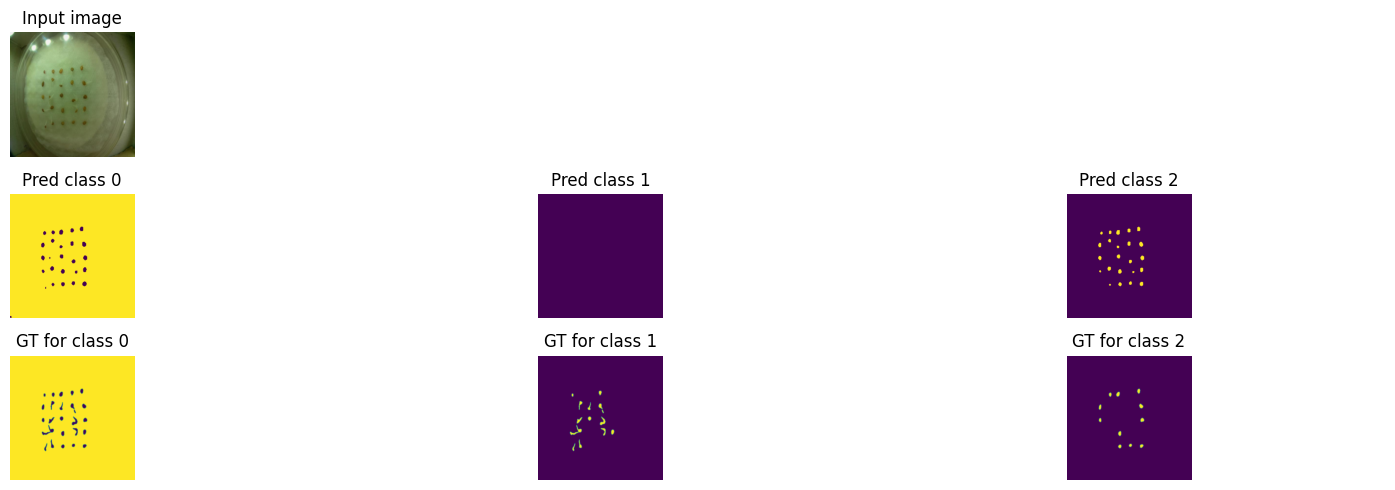

Train loss: 0.27270 | Time: 4m 37s | Val loss: 0.25878
Train_DICE_avg: 0.65352 | Train_Jaccard_avg: 0.60317 | Train_Sensitivity_avg: 0.94488 | Train_Specificity_avg: 0.85662 
Class 0 - Train_DICE: 0.98108 | Train_Jaccard: 0.96297 | Train_Sensitivity: 0.99666 | Train_Specificity: 0.59756 
Class 1 - Train_DICE: 0.26745 | Train_Jaccard: 0.26734 | Train_Sensitivity: 0.96519 | Train_Specificity: 0.98571 
Class 2 - Train_DICE: 0.71204 | Train_Jaccard: 0.57919 | Train_Sensitivity: 0.87278 | Train_Specificity: 0.98660 
Val_DICE_avg: 0.71346 | Val_Jaccard_avg: 0.66183 | Val_Sensitivity_avg: 0.95162 | Val_Specificity_avg: 0.80862 
Class 0 - Val_DICE: 0.98385 | Val_Jaccard: 0.96838 | Val_Sensitivity: 0.99885 | Val_Specificity: 0.45220 
Class 1 - Val_DICE: 0.45238 | Val_Jaccard: 0.45238 | Val_Sensitivity: 0.95238 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.70414 | Val_Jaccard: 0.56472 | Val_Sensitivity: 0.90362 | Val_Specificity: 0.98533 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.24496 | Time: 5m 24s | Val loss: 0.23078
Train_DICE_avg: 0.66233 | Train_Jaccard_avg: 0.61297 | Train_Sensitivity_avg: 0.95143 | Train_Specificity_avg: 0.86412 
Class 0 - Train_DICE: 0.98284 | Train_Jaccard: 0.96636 | Train_Sensitivity: 0.99688 | Train_Specificity: 0.61979 
Class 1 - Train_DICE: 0.28733 | Train_Jaccard: 0.28716 | Train_Sensitivity: 0.96821 | Train_Specificity: 0.98586 
Class 2 - Train_DICE: 0.71681 | Train_Jaccard: 0.58540 | Train_Sensitivity: 0.88918 | Train_Specificity: 0.98671 
Val_DICE_avg: 0.72040 | Val_Jaccard_avg: 0.67030 | Val_Sensitivity_avg: 0.96439 | Val_Specificity_avg: 0.80846 
Class 0 - Val_DICE: 0.98407 | Val_Jaccard: 0.96876 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.45161 
Class 1 - Val_DICE: 0.46032 | Val_Jaccard: 0.46032 | Val_Sensitivity: 0.96429 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.71682 | Val_Jaccard: 0.58182 | Val_Sensitivity: 0.92967 | Val_Specificity: 0.98544 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.22037 | Time: 6m 9s | Val loss: 0.20572
Train_DICE_avg: 0.66345 | Train_Jaccard_avg: 0.61448 | Train_Sensitivity_avg: 0.95668 | Train_Specificity_avg: 0.87103 
Class 0 - Train_DICE: 0.98441 | Train_Jaccard: 0.96937 | Train_Sensitivity: 0.99697 | Train_Specificity: 0.64050 
Class 1 - Train_DICE: 0.28034 | Train_Jaccard: 0.28023 | Train_Sensitivity: 0.97637 | Train_Specificity: 0.98576 
Class 2 - Train_DICE: 0.72559 | Train_Jaccard: 0.59383 | Train_Sensitivity: 0.89671 | Train_Specificity: 0.98683 
Val_DICE_avg: 0.71889 | Val_Jaccard_avg: 0.66786 | Val_Sensitivity_avg: 0.97777 | Val_Specificity_avg: 0.80908 
Class 0 - Val_DICE: 0.98365 | Val_Jaccard: 0.96803 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.45413 
Class 1 - Val_DICE: 0.46887 | Val_Jaccard: 0.46856 | Val_Sensitivity: 0.99586 | Val_Specificity: 0.98836 
Class 2 - Val_DICE: 0.70416 | Val_Jaccard: 0.56698 | Val_Sensitivity: 0.93809 | Val_Specificity: 0.98477 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.19945 | Time: 6m 55s | Val loss: 0.18684
Train_DICE_avg: 0.66482 | Train_Jaccard_avg: 0.61563 | Train_Sensitivity_avg: 0.96154 | Train_Specificity_avg: 0.87388 
Class 0 - Train_DICE: 0.98539 | Train_Jaccard: 0.97127 | Train_Sensitivity: 0.99703 | Train_Specificity: 0.64930 
Class 1 - Train_DICE: 0.28064 | Train_Jaccard: 0.28007 | Train_Sensitivity: 0.98573 | Train_Specificity: 0.98573 
Class 2 - Train_DICE: 0.72842 | Train_Jaccard: 0.59554 | Train_Sensitivity: 0.90186 | Train_Specificity: 0.98661 
Val_DICE_avg: 0.71511 | Val_Jaccard_avg: 0.66261 | Val_Sensitivity_avg: 0.98041 | Val_Specificity_avg: 0.82326 
Class 0 - Val_DICE: 0.98682 | Val_Jaccard: 0.97409 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.49846 
Class 1 - Val_DICE: 0.47165 | Val_Jaccard: 0.47001 | Val_Sensitivity: 0.99417 | Val_Specificity: 0.98845 
Class 2 - Val_DICE: 0.68687 | Val_Jaccard: 0.54372 | Val_Sensitivity: 0.94776 | Val_Specificity: 0.98287 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.17950 | Time: 7m 41s | Val loss: 0.16679
Train_DICE_avg: 0.66764 | Train_Jaccard_avg: 0.61884 | Train_Sensitivity_avg: 0.96357 | Train_Specificity_avg: 0.88113 
Class 0 - Train_DICE: 0.98664 | Train_Jaccard: 0.97369 | Train_Sensitivity: 0.99679 | Train_Specificity: 0.67093 
Class 1 - Train_DICE: 0.28004 | Train_Jaccard: 0.27842 | Train_Sensitivity: 0.98697 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.73624 | Train_Jaccard: 0.60440 | Train_Sensitivity: 0.90694 | Train_Specificity: 0.98680 
Val_DICE_avg: 0.70897 | Val_Jaccard_avg: 0.65483 | Val_Sensitivity_avg: 0.96280 | Val_Specificity_avg: 0.83278 
Class 0 - Val_DICE: 0.98834 | Val_Jaccard: 0.97703 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.52717 
Class 1 - Val_DICE: 0.45769 | Val_Jaccard: 0.45344 | Val_Sensitivity: 0.94642 | Val_Specificity: 0.98862 
Class 2 - Val_DICE: 0.68089 | Val_Jaccard: 0.53401 | Val_Sensitivity: 0.94282 | Val_Specificity: 0.98256 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


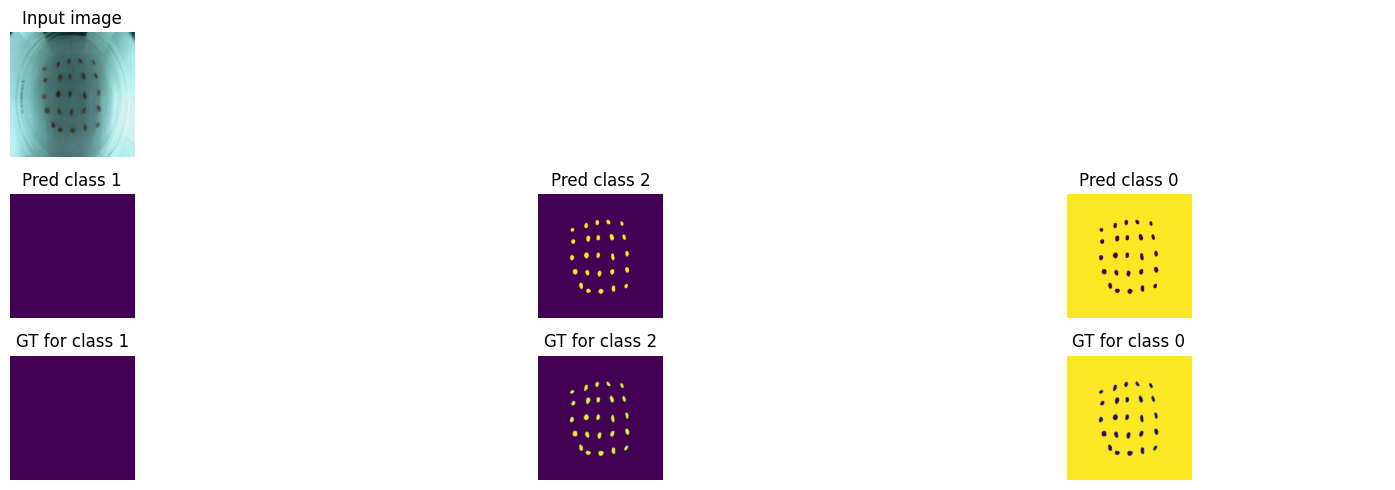

Train loss: 0.15924 | Time: 8m 28s | Val loss: 0.14420
Train_DICE_avg: 0.66790 | Train_Jaccard_avg: 0.61806 | Train_Sensitivity_avg: 0.96239 | Train_Specificity_avg: 0.88598 
Class 0 - Train_DICE: 0.98735 | Train_Jaccard: 0.97507 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.68539 
Class 1 - Train_DICE: 0.28360 | Train_Jaccard: 0.28017 | Train_Sensitivity: 0.98186 | Train_Specificity: 0.98592 
Class 2 - Train_DICE: 0.73274 | Train_Jaccard: 0.59896 | Train_Sensitivity: 0.90876 | Train_Specificity: 0.98663 
Val_DICE_avg: 0.72794 | Val_Jaccard_avg: 0.67439 | Val_Sensitivity_avg: 0.97557 | Val_Specificity_avg: 0.83536 
Class 0 - Val_DICE: 0.98851 | Val_Jaccard: 0.97736 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.53276 
Class 1 - Val_DICE: 0.47952 | Val_Jaccard: 0.47269 | Val_Sensitivity: 0.99082 | Val_Specificity: 0.98876 
Class 2 - Val_DICE: 0.71579 | Val_Jaccard: 0.57313 | Val_Sensitivity: 0.93663 | Val_Specificity: 0.98458 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.13692 | Time: 9m 15s | Val loss: 0.12311
Train_DICE_avg: 0.67769 | Train_Jaccard_avg: 0.62651 | Train_Sensitivity_avg: 0.96353 | Train_Specificity_avg: 0.89272 
Class 0 - Train_DICE: 0.98855 | Train_Jaccard: 0.97740 | Train_Sensitivity: 0.99667 | Train_Specificity: 0.70507 
Class 1 - Train_DICE: 0.30283 | Train_Jaccard: 0.29262 | Train_Sensitivity: 0.98015 | Train_Specificity: 0.98626 
Class 2 - Train_DICE: 0.74169 | Train_Jaccard: 0.60949 | Train_Sensitivity: 0.91376 | Train_Specificity: 0.98683 
Val_DICE_avg: 0.72872 | Val_Jaccard_avg: 0.67568 | Val_Sensitivity_avg: 0.97236 | Val_Specificity_avg: 0.84400 
Class 0 - Val_DICE: 0.99004 | Val_Jaccard: 0.98033 | Val_Sensitivity: 0.99899 | Val_Specificity: 0.55876 
Class 1 - Val_DICE: 0.47775 | Val_Jaccard: 0.47176 | Val_Sensitivity: 0.99338 | Val_Specificity: 0.98861 
Class 2 - Val_DICE: 0.71835 | Val_Jaccard: 0.57497 | Val_Sensitivity: 0.92471 | Val_Specificity: 0.98464 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.11916 | Time: 10m 2s | Val loss: 0.10805
Train_DICE_avg: 0.68617 | Train_Jaccard_avg: 0.63221 | Train_Sensitivity_avg: 0.96140 | Train_Specificity_avg: 0.89690 
Class 0 - Train_DICE: 0.98922 | Train_Jaccard: 0.97872 | Train_Sensitivity: 0.99652 | Train_Specificity: 0.71735 
Class 1 - Train_DICE: 0.32468 | Train_Jaccard: 0.30462 | Train_Sensitivity: 0.97030 | Train_Specificity: 0.98646 
Class 2 - Train_DICE: 0.74462 | Train_Jaccard: 0.61328 | Train_Sensitivity: 0.91739 | Train_Specificity: 0.98689 
Val_DICE_avg: 0.73666 | Val_Jaccard_avg: 0.67878 | Val_Sensitivity_avg: 0.97753 | Val_Specificity_avg: 0.85241 
Class 0 - Val_DICE: 0.99099 | Val_Jaccard: 0.98219 | Val_Sensitivity: 0.99902 | Val_Specificity: 0.58397 
Class 1 - Val_DICE: 0.51196 | Val_Jaccard: 0.49265 | Val_Sensitivity: 0.99223 | Val_Specificity: 0.98960 
Class 2 - Val_DICE: 0.70702 | Val_Jaccard: 0.56149 | Val_Sensitivity: 0.94135 | Val_Specificity: 0.98367 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.10419 | Time: 10m 50s | Val loss: 0.09200
Train_DICE_avg: 0.70178 | Train_Jaccard_avg: 0.64367 | Train_Sensitivity_avg: 0.95229 | Train_Specificity_avg: 0.90206 
Class 0 - Train_DICE: 0.98960 | Train_Jaccard: 0.97946 | Train_Sensitivity: 0.99618 | Train_Specificity: 0.73157 
Class 1 - Train_DICE: 0.36635 | Train_Jaccard: 0.33227 | Train_Sensitivity: 0.94152 | Train_Specificity: 0.98741 
Class 2 - Train_DICE: 0.74939 | Train_Jaccard: 0.61926 | Train_Sensitivity: 0.91917 | Train_Specificity: 0.98719 
Val_DICE_avg: 0.75209 | Val_Jaccard_avg: 0.68934 | Val_Sensitivity_avg: 0.97538 | Val_Specificity_avg: 0.84970 
Class 0 - Val_DICE: 0.99075 | Val_Jaccard: 0.98170 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.57536 
Class 1 - Val_DICE: 0.55557 | Val_Jaccard: 0.52257 | Val_Sensitivity: 0.97631 | Val_Specificity: 0.99059 
Class 2 - Val_DICE: 0.70996 | Val_Jaccard: 0.56373 | Val_Sensitivity: 0.95073 | Val_Specificity: 0.98315 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.09078 | Time: 11m 36s | Val loss: 0.08072
Train_DICE_avg: 0.70431 | Train_Jaccard_avg: 0.64573 | Train_Sensitivity_avg: 0.95691 | Train_Specificity_avg: 0.90275 
Class 0 - Train_DICE: 0.99017 | Train_Jaccard: 0.98058 | Train_Sensitivity: 0.99645 | Train_Specificity: 0.73400 
Class 1 - Train_DICE: 0.36541 | Train_Jaccard: 0.32935 | Train_Sensitivity: 0.95045 | Train_Specificity: 0.98701 
Class 2 - Train_DICE: 0.75736 | Train_Jaccard: 0.62727 | Train_Sensitivity: 0.92383 | Train_Specificity: 0.98723 
Val_DICE_avg: 0.75047 | Val_Jaccard_avg: 0.68918 | Val_Sensitivity_avg: 0.97580 | Val_Specificity_avg: 0.84823 
Class 0 - Val_DICE: 0.99053 | Val_Jaccard: 0.98129 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.57053 
Class 1 - Val_DICE: 0.54130 | Val_Jaccard: 0.51065 | Val_Sensitivity: 0.97006 | Val_Specificity: 0.99042 
Class 2 - Val_DICE: 0.71957 | Val_Jaccard: 0.57561 | Val_Sensitivity: 0.95819 | Val_Specificity: 0.98375 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


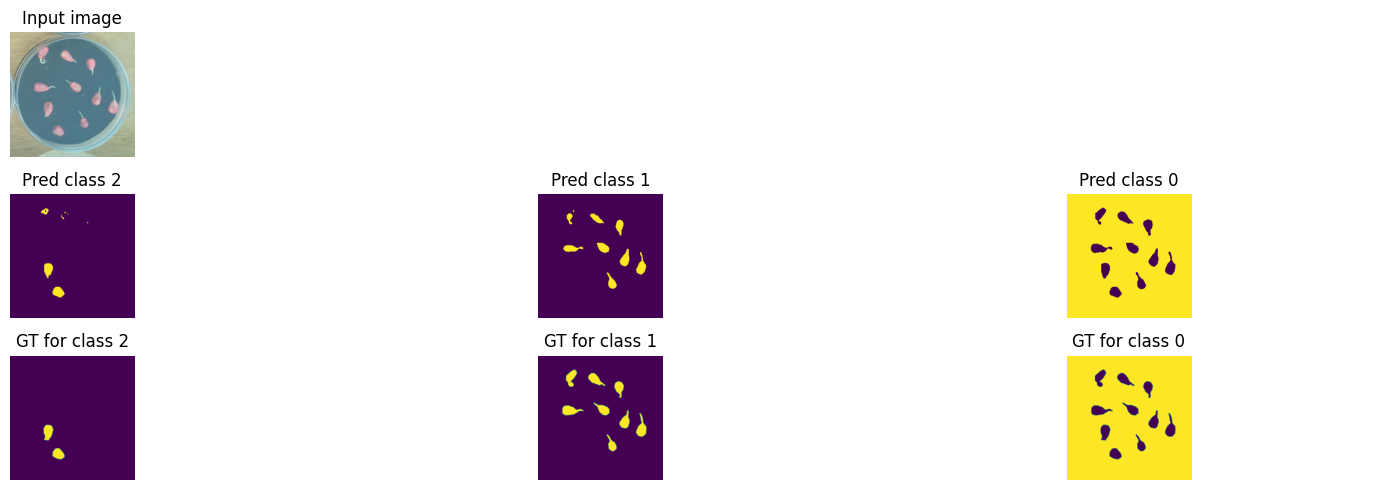

Train loss: 0.07987 | Time: 12m 24s | Val loss: 0.07079
Train_DICE_avg: 0.71760 | Train_Jaccard_avg: 0.65666 | Train_Sensitivity_avg: 0.95286 | Train_Specificity_avg: 0.90405 
Class 0 - Train_DICE: 0.99046 | Train_Jaccard: 0.98114 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.73742 
Class 1 - Train_DICE: 0.40073 | Train_Jaccard: 0.35732 | Train_Sensitivity: 0.93764 | Train_Specificity: 0.98752 
Class 2 - Train_DICE: 0.76161 | Train_Jaccard: 0.63151 | Train_Sensitivity: 0.92438 | Train_Specificity: 0.98720 
Val_DICE_avg: 0.76901 | Val_Jaccard_avg: 0.70229 | Val_Sensitivity_avg: 0.97230 | Val_Specificity_avg: 0.85256 
Class 0 - Val_DICE: 0.99094 | Val_Jaccard: 0.98208 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.58234 
Class 1 - Val_DICE: 0.60618 | Val_Jaccard: 0.55892 | Val_Sensitivity: 0.96095 | Val_Specificity: 0.99173 
Class 2 - Val_DICE: 0.70992 | Val_Jaccard: 0.56586 | Val_Sensitivity: 0.95676 | Val_Specificity: 0.98360 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.07077 | Time: 13m 11s | Val loss: 0.06296
Train_DICE_avg: 0.73169 | Train_Jaccard_avg: 0.66825 | Train_Sensitivity_avg: 0.94540 | Train_Specificity_avg: 0.90713 
Class 0 - Train_DICE: 0.99090 | Train_Jaccard: 0.98199 | Train_Sensitivity: 0.99648 | Train_Specificity: 0.74508 
Class 1 - Train_DICE: 0.43789 | Train_Jaccard: 0.38422 | Train_Sensitivity: 0.91438 | Train_Specificity: 0.98858 
Class 2 - Train_DICE: 0.76628 | Train_Jaccard: 0.63853 | Train_Sensitivity: 0.92535 | Train_Specificity: 0.98772 
Val_DICE_avg: 0.77209 | Val_Jaccard_avg: 0.70510 | Val_Sensitivity_avg: 0.97280 | Val_Specificity_avg: 0.85525 
Class 0 - Val_DICE: 0.99116 | Val_Jaccard: 0.98251 | Val_Sensitivity: 0.99916 | Val_Specificity: 0.59006 
Class 1 - Val_DICE: 0.61139 | Val_Jaccard: 0.56272 | Val_Sensitivity: 0.96049 | Val_Specificity: 0.99179 
Class 2 - Val_DICE: 0.71372 | Val_Jaccard: 0.57006 | Val_Sensitivity: 0.95874 | Val_Specificity: 0.98390 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.06358 | Time: 13m 58s | Val loss: 0.05499
Train_DICE_avg: 0.72935 | Train_Jaccard_avg: 0.66639 | Train_Sensitivity_avg: 0.94774 | Train_Specificity_avg: 0.90918 
Class 0 - Train_DICE: 0.99115 | Train_Jaccard: 0.98248 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.75167 
Class 1 - Train_DICE: 0.42781 | Train_Jaccard: 0.37504 | Train_Sensitivity: 0.91841 | Train_Specificity: 0.98817 
Class 2 - Train_DICE: 0.76910 | Train_Jaccard: 0.64166 | Train_Sensitivity: 0.92824 | Train_Specificity: 0.98770 
Val_DICE_avg: 0.77647 | Val_Jaccard_avg: 0.70945 | Val_Sensitivity_avg: 0.96881 | Val_Specificity_avg: 0.85439 
Class 0 - Val_DICE: 0.99107 | Val_Jaccard: 0.98234 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.58702 
Class 1 - Val_DICE: 0.60588 | Val_Jaccard: 0.55602 | Val_Sensitivity: 0.95083 | Val_Specificity: 0.99183 
Class 2 - Val_DICE: 0.73246 | Val_Jaccard: 0.59000 | Val_Sensitivity: 0.95635 | Val_Specificity: 0.98431 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.05770 | Time: 14m 45s | Val loss: 0.05005
Train_DICE_avg: 0.72773 | Train_Jaccard_avg: 0.66508 | Train_Sensitivity_avg: 0.94906 | Train_Specificity_avg: 0.90968 
Class 0 - Train_DICE: 0.99115 | Train_Jaccard: 0.98248 | Train_Sensitivity: 0.99648 | Train_Specificity: 0.75321 
Class 1 - Train_DICE: 0.42281 | Train_Jaccard: 0.37034 | Train_Sensitivity: 0.92259 | Train_Specificity: 0.98804 
Class 2 - Train_DICE: 0.76923 | Train_Jaccard: 0.64242 | Train_Sensitivity: 0.92811 | Train_Specificity: 0.98778 
Val_DICE_avg: 0.77261 | Val_Jaccard_avg: 0.70477 | Val_Sensitivity_avg: 0.96524 | Val_Specificity_avg: 0.85601 
Class 0 - Val_DICE: 0.99107 | Val_Jaccard: 0.98235 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59212 
Class 1 - Val_DICE: 0.61191 | Val_Jaccard: 0.56138 | Val_Sensitivity: 0.93550 | Val_Specificity: 0.99224 
Class 2 - Val_DICE: 0.71487 | Val_Jaccard: 0.57058 | Val_Sensitivity: 0.96091 | Val_Specificity: 0.98367 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.05243 | Time: 15m 32s | Val loss: 0.04586
Train_DICE_avg: 0.73894 | Train_Jaccard_avg: 0.67519 | Train_Sensitivity_avg: 0.94617 | Train_Specificity_avg: 0.91258 
Class 0 - Train_DICE: 0.99143 | Train_Jaccard: 0.98304 | Train_Sensitivity: 0.99657 | Train_Specificity: 0.76108 
Class 1 - Train_DICE: 0.45042 | Train_Jaccard: 0.39338 | Train_Sensitivity: 0.91291 | Train_Specificity: 0.98866 
Class 2 - Train_DICE: 0.77497 | Train_Jaccard: 0.64914 | Train_Sensitivity: 0.92901 | Train_Specificity: 0.98801 
Val_DICE_avg: 0.78243 | Val_Jaccard_avg: 0.71597 | Val_Sensitivity_avg: 0.97003 | Val_Specificity_avg: 0.85582 
Class 0 - Val_DICE: 0.99117 | Val_Jaccard: 0.98254 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.59075 
Class 1 - Val_DICE: 0.62058 | Val_Jaccard: 0.57100 | Val_Sensitivity: 0.95686 | Val_Specificity: 0.99203 
Class 2 - Val_DICE: 0.73554 | Val_Jaccard: 0.59436 | Val_Sensitivity: 0.95406 | Val_Specificity: 0.98468 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


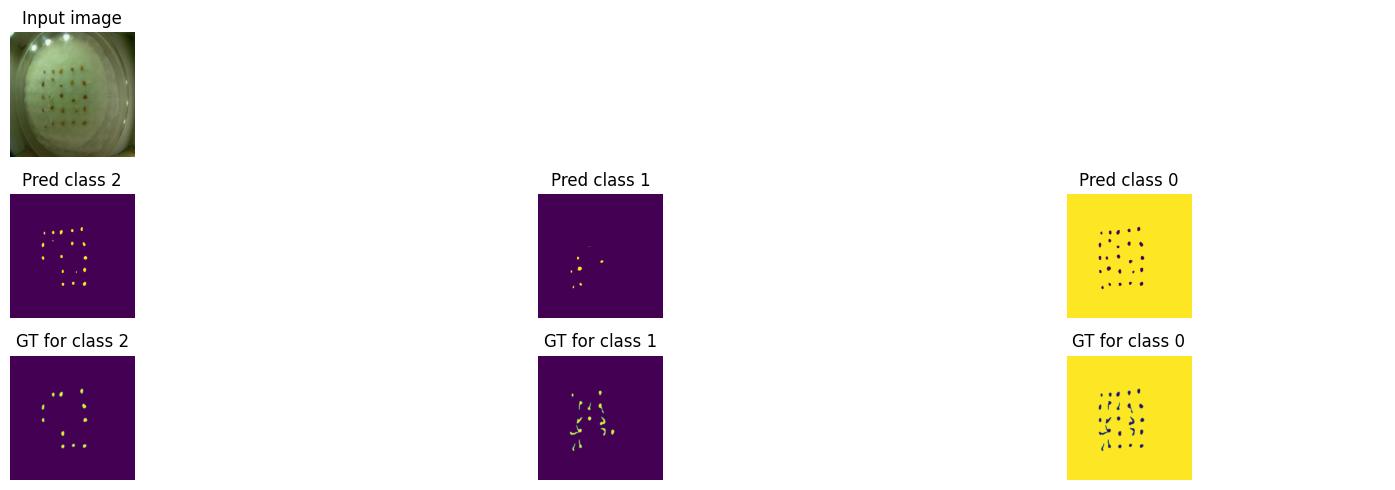

Train loss: 0.04743 | Time: 16m 20s | Val loss: 0.03966
Train_DICE_avg: 0.74116 | Train_Jaccard_avg: 0.67645 | Train_Sensitivity_avg: 0.94247 | Train_Specificity_avg: 0.91321 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98302 | Train_Sensitivity: 0.99639 | Train_Specificity: 0.76286 
Class 1 - Train_DICE: 0.45553 | Train_Jaccard: 0.39637 | Train_Sensitivity: 0.90139 | Train_Specificity: 0.98888 
Class 2 - Train_DICE: 0.77653 | Train_Jaccard: 0.64996 | Train_Sensitivity: 0.92962 | Train_Specificity: 0.98788 
Val_DICE_avg: 0.77279 | Val_Jaccard_avg: 0.70278 | Val_Sensitivity_avg: 0.95066 | Val_Specificity_avg: 0.85611 
Class 0 - Val_DICE: 0.99127 | Val_Jaccard: 0.98273 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.59116 
Class 1 - Val_DICE: 0.59614 | Val_Jaccard: 0.53481 | Val_Sensitivity: 0.88778 | Val_Specificity: 0.99274 
Class 2 - Val_DICE: 0.73095 | Val_Jaccard: 0.59081 | Val_Sensitivity: 0.96492 | Val_Specificity: 0.98443 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.04138 | Time: 17m 7s | Val loss: 0.03524
Train_DICE_avg: 0.75030 | Train_Jaccard_avg: 0.68506 | Train_Sensitivity_avg: 0.94358 | Train_Specificity_avg: 0.91424 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98345 | Train_Sensitivity: 0.99661 | Train_Specificity: 0.76541 
Class 1 - Train_DICE: 0.47700 | Train_Jaccard: 0.41381 | Train_Sensitivity: 0.90249 | Train_Specificity: 0.98913 
Class 2 - Train_DICE: 0.78226 | Train_Jaccard: 0.65793 | Train_Sensitivity: 0.93166 | Train_Specificity: 0.98819 
Val_DICE_avg: 0.80115 | Val_Jaccard_avg: 0.73202 | Val_Sensitivity_avg: 0.96489 | Val_Specificity_avg: 0.85141 
Class 0 - Val_DICE: 0.99076 | Val_Jaccard: 0.98174 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.57588 
Class 1 - Val_DICE: 0.65735 | Val_Jaccard: 0.59554 | Val_Sensitivity: 0.94054 | Val_Specificity: 0.99273 
Class 2 - Val_DICE: 0.75535 | Val_Jaccard: 0.61878 | Val_Sensitivity: 0.95478 | Val_Specificity: 0.98562 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.03734 | Time: 17m 54s | Val loss: 0.03141
Train_DICE_avg: 0.75207 | Train_Jaccard_avg: 0.68609 | Train_Sensitivity_avg: 0.93801 | Train_Specificity_avg: 0.91441 
Class 0 - Train_DICE: 0.99161 | Train_Jaccard: 0.98339 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.76582 
Class 1 - Train_DICE: 0.48090 | Train_Jaccard: 0.41553 | Train_Sensitivity: 0.88410 | Train_Specificity: 0.98927 
Class 2 - Train_DICE: 0.78369 | Train_Jaccard: 0.65935 | Train_Sensitivity: 0.93335 | Train_Specificity: 0.98814 
Val_DICE_avg: 0.78201 | Val_Jaccard_avg: 0.71336 | Val_Sensitivity_avg: 0.96737 | Val_Specificity_avg: 0.86385 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98433 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.61482 
Class 1 - Val_DICE: 0.62636 | Val_Jaccard: 0.56965 | Val_Sensitivity: 0.94430 | Val_Specificity: 0.99218 
Class 2 - Val_DICE: 0.72759 | Val_Jaccard: 0.58610 | Val_Sensitivity: 0.95863 | Val_Specificity: 0.98454 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.03431 | Time: 18m 41s | Val loss: 0.02916
Train_DICE_avg: 0.75635 | Train_Jaccard_avg: 0.69051 | Train_Sensitivity_avg: 0.93769 | Train_Specificity_avg: 0.91503 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98372 | Train_Sensitivity: 0.99664 | Train_Specificity: 0.76706 
Class 1 - Train_DICE: 0.49000 | Train_Jaccard: 0.42319 | Train_Sensitivity: 0.88432 | Train_Specificity: 0.98954 
Class 2 - Train_DICE: 0.78727 | Train_Jaccard: 0.66461 | Train_Sensitivity: 0.93209 | Train_Specificity: 0.98849 
Val_DICE_avg: 0.79831 | Val_Jaccard_avg: 0.73051 | Val_Sensitivity_avg: 0.96819 | Val_Specificity_avg: 0.86141 
Class 0 - Val_DICE: 0.99165 | Val_Jaccard: 0.98349 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60589 
Class 1 - Val_DICE: 0.65849 | Val_Jaccard: 0.60194 | Val_Sensitivity: 0.95168 | Val_Specificity: 0.99307 
Class 2 - Val_DICE: 0.74478 | Val_Jaccard: 0.60609 | Val_Sensitivity: 0.95354 | Val_Specificity: 0.98526 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.03152 | Time: 19m 28s | Val loss: 0.02638
Train_DICE_avg: 0.76260 | Train_Jaccard_avg: 0.69721 | Train_Sensitivity_avg: 0.94181 | Train_Specificity_avg: 0.91711 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98439 | Train_Sensitivity: 0.99678 | Train_Specificity: 0.77289 
Class 1 - Train_DICE: 0.50439 | Train_Jaccard: 0.43737 | Train_Sensitivity: 0.89425 | Train_Specificity: 0.98968 
Class 2 - Train_DICE: 0.79128 | Train_Jaccard: 0.66987 | Train_Sensitivity: 0.93441 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.80486 | Val_Jaccard_avg: 0.73555 | Val_Sensitivity_avg: 0.96603 | Val_Specificity_avg: 0.86356 
Class 0 - Val_DICE: 0.99183 | Val_Jaccard: 0.98383 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61202 
Class 1 - Val_DICE: 0.68036 | Val_Jaccard: 0.61899 | Val_Sensitivity: 0.93147 | Val_Specificity: 0.99358 
Class 2 - Val_DICE: 0.74238 | Val_Jaccard: 0.60381 | Val_Sensitivity: 0.96731 | Val_Specificity: 0.98508 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


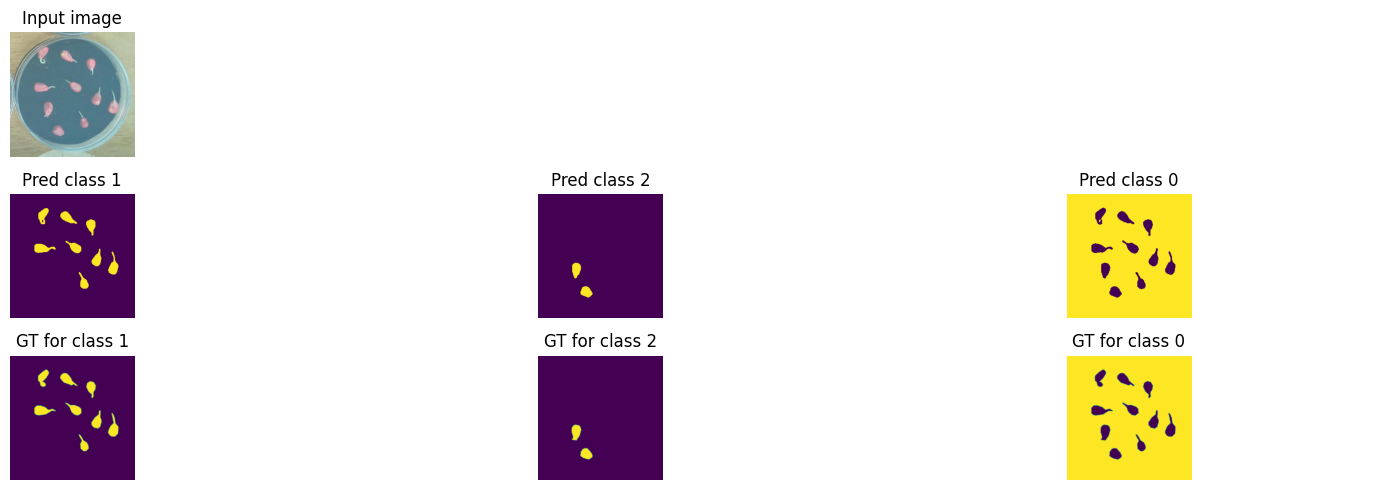

Train loss: 0.02995 | Time: 20m 16s | Val loss: 0.02503
Train_DICE_avg: 0.76075 | Train_Jaccard_avg: 0.69505 | Train_Sensitivity_avg: 0.94284 | Train_Specificity_avg: 0.91565 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98416 | Train_Sensitivity: 0.99677 | Train_Specificity: 0.76891 
Class 1 - Train_DICE: 0.49916 | Train_Jaccard: 0.43117 | Train_Sensitivity: 0.89675 | Train_Specificity: 0.98940 
Class 2 - Train_DICE: 0.79108 | Train_Jaccard: 0.66983 | Train_Sensitivity: 0.93499 | Train_Specificity: 0.98863 
Val_DICE_avg: 0.80306 | Val_Jaccard_avg: 0.73239 | Val_Sensitivity_avg: 0.95895 | Val_Specificity_avg: 0.85928 
Class 0 - Val_DICE: 0.99154 | Val_Jaccard: 0.98327 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.59937 
Class 1 - Val_DICE: 0.68044 | Val_Jaccard: 0.61700 | Val_Sensitivity: 0.90418 | Val_Specificity: 0.99416 
Class 2 - Val_DICE: 0.73720 | Val_Jaccard: 0.59688 | Val_Sensitivity: 0.97329 | Val_Specificity: 0.98431 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.02842 | Time: 21m 3s | Val loss: 0.02385
Train_DICE_avg: 0.76408 | Train_Jaccard_avg: 0.69811 | Train_Sensitivity_avg: 0.94203 | Train_Specificity_avg: 0.91456 
Class 0 - Train_DICE: 0.99194 | Train_Jaccard: 0.98403 | Train_Sensitivity: 0.99690 | Train_Specificity: 0.76548 
Class 1 - Train_DICE: 0.50679 | Train_Jaccard: 0.43808 | Train_Sensitivity: 0.89303 | Train_Specificity: 0.98958 
Class 2 - Train_DICE: 0.79351 | Train_Jaccard: 0.67224 | Train_Sensitivity: 0.93614 | Train_Specificity: 0.98862 
Val_DICE_avg: 0.80622 | Val_Jaccard_avg: 0.73373 | Val_Sensitivity_avg: 0.96563 | Val_Specificity_avg: 0.86370 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98439 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.61334 
Class 1 - Val_DICE: 0.69665 | Val_Jaccard: 0.62833 | Val_Sensitivity: 0.92437 | Val_Specificity: 0.99373 
Class 2 - Val_DICE: 0.72990 | Val_Jaccard: 0.58848 | Val_Sensitivity: 0.97317 | Val_Specificity: 0.98404 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.02710 | Time: 21m 50s | Val loss: 0.02302
Train_DICE_avg: 0.76715 | Train_Jaccard_avg: 0.70095 | Train_Sensitivity_avg: 0.94358 | Train_Specificity_avg: 0.91774 
Class 0 - Train_DICE: 0.99215 | Train_Jaccard: 0.98445 | Train_Sensitivity: 0.99682 | Train_Specificity: 0.77470 
Class 1 - Train_DICE: 0.51351 | Train_Jaccard: 0.44295 | Train_Sensitivity: 0.89791 | Train_Specificity: 0.98971 
Class 2 - Train_DICE: 0.79580 | Train_Jaccard: 0.67545 | Train_Sensitivity: 0.93600 | Train_Specificity: 0.98880 
Val_DICE_avg: 0.81289 | Val_Jaccard_avg: 0.74180 | Val_Sensitivity_avg: 0.95645 | Val_Specificity_avg: 0.85633 
Class 0 - Val_DICE: 0.99124 | Val_Jaccard: 0.98268 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.58982 
Class 1 - Val_DICE: 0.70201 | Val_Jaccard: 0.63392 | Val_Sensitivity: 0.89295 | Val_Specificity: 0.99454 
Class 2 - Val_DICE: 0.74541 | Val_Jaccard: 0.60881 | Val_Sensitivity: 0.97698 | Val_Specificity: 0.98462 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.02600 | Time: 22m 37s | Val loss: 0.02137
Train_DICE_avg: 0.77090 | Train_Jaccard_avg: 0.70506 | Train_Sensitivity_avg: 0.94333 | Train_Specificity_avg: 0.91591 
Class 0 - Train_DICE: 0.99218 | Train_Jaccard: 0.98451 | Train_Sensitivity: 0.99697 | Train_Specificity: 0.76888 
Class 1 - Train_DICE: 0.52264 | Train_Jaccard: 0.45220 | Train_Sensitivity: 0.89595 | Train_Specificity: 0.98988 
Class 2 - Train_DICE: 0.79789 | Train_Jaccard: 0.67847 | Train_Sensitivity: 0.93705 | Train_Specificity: 0.98898 
Val_DICE_avg: 0.81319 | Val_Jaccard_avg: 0.74426 | Val_Sensitivity_avg: 0.96714 | Val_Specificity_avg: 0.86370 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98407 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61177 
Class 1 - Val_DICE: 0.68640 | Val_Jaccard: 0.62371 | Val_Sensitivity: 0.93952 | Val_Specificity: 0.99362 
Class 2 - Val_DICE: 0.76123 | Val_Jaccard: 0.62501 | Val_Sensitivity: 0.96252 | Val_Specificity: 0.98570 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.02493 | Time: 23m 25s | Val loss: 0.02094
Train_DICE_avg: 0.76967 | Train_Jaccard_avg: 0.70379 | Train_Sensitivity_avg: 0.94089 | Train_Specificity_avg: 0.91744 
Class 0 - Train_DICE: 0.99234 | Train_Jaccard: 0.98483 | Train_Sensitivity: 0.99704 | Train_Specificity: 0.77358 
Class 1 - Train_DICE: 0.51732 | Train_Jaccard: 0.44641 | Train_Sensitivity: 0.88578 | Train_Specificity: 0.98986 
Class 2 - Train_DICE: 0.79934 | Train_Jaccard: 0.68011 | Train_Sensitivity: 0.93986 | Train_Specificity: 0.98889 
Val_DICE_avg: 0.81974 | Val_Jaccard_avg: 0.75002 | Val_Sensitivity_avg: 0.96232 | Val_Specificity_avg: 0.85462 
Class 0 - Val_DICE: 0.99100 | Val_Jaccard: 0.98221 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.58355 
Class 1 - Val_DICE: 0.69813 | Val_Jaccard: 0.62986 | Val_Sensitivity: 0.91793 | Val_Specificity: 0.99420 
Class 2 - Val_DICE: 0.77009 | Val_Jaccard: 0.63801 | Val_Sensitivity: 0.96959 | Val_Specificity: 0.98610 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


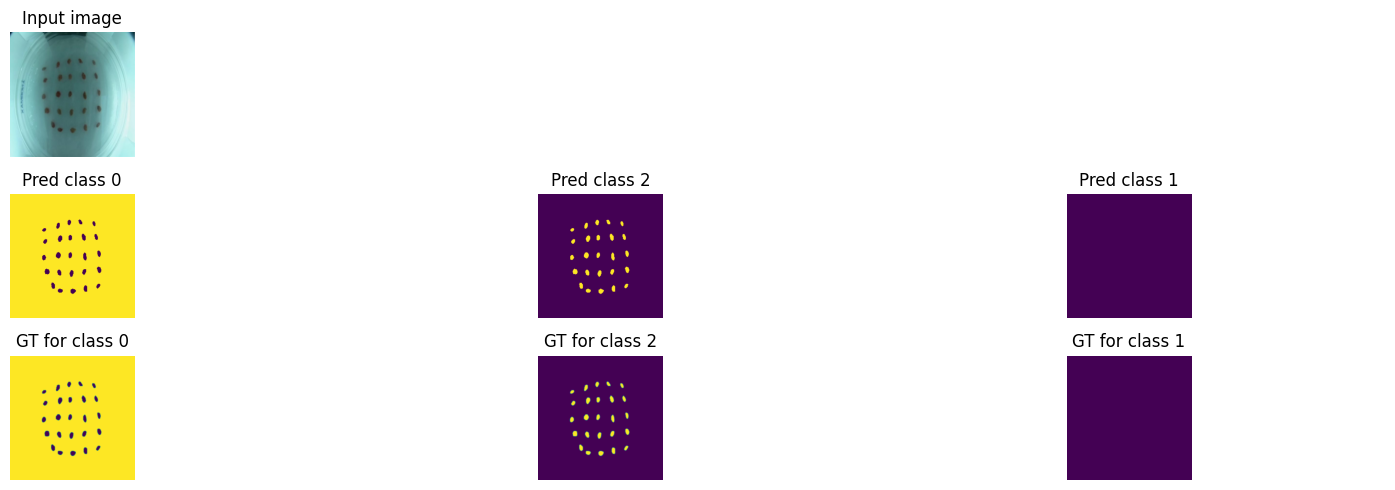

Train loss: 0.02417 | Time: 24m 13s | Val loss: 0.01983
Train_DICE_avg: 0.77018 | Train_Jaccard_avg: 0.70438 | Train_Sensitivity_avg: 0.94175 | Train_Specificity_avg: 0.91651 
Class 0 - Train_DICE: 0.99227 | Train_Jaccard: 0.98470 | Train_Sensitivity: 0.99702 | Train_Specificity: 0.77072 
Class 1 - Train_DICE: 0.51983 | Train_Jaccard: 0.44882 | Train_Sensitivity: 0.88989 | Train_Specificity: 0.98986 
Class 2 - Train_DICE: 0.79845 | Train_Jaccard: 0.67961 | Train_Sensitivity: 0.93835 | Train_Specificity: 0.98894 
Val_DICE_avg: 0.82065 | Val_Jaccard_avg: 0.74966 | Val_Sensitivity_avg: 0.96004 | Val_Specificity_avg: 0.85566 
Class 0 - Val_DICE: 0.99119 | Val_Jaccard: 0.98258 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.58718 
Class 1 - Val_DICE: 0.71663 | Val_Jaccard: 0.64715 | Val_Sensitivity: 0.90562 | Val_Specificity: 0.99435 
Class 2 - Val_DICE: 0.75413 | Val_Jaccard: 0.61926 | Val_Sensitivity: 0.97505 | Val_Specificity: 0.98545 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.02262 | Time: 25m 0s | Val loss: 0.01879
Train_DICE_avg: 0.77779 | Train_Jaccard_avg: 0.71244 | Train_Sensitivity_avg: 0.94508 | Train_Specificity_avg: 0.91926 
Class 0 - Train_DICE: 0.99248 | Train_Jaccard: 0.98510 | Train_Sensitivity: 0.99709 | Train_Specificity: 0.77837 
Class 1 - Train_DICE: 0.53615 | Train_Jaccard: 0.46465 | Train_Sensitivity: 0.89730 | Train_Specificity: 0.99021 
Class 2 - Train_DICE: 0.80473 | Train_Jaccard: 0.68758 | Train_Sensitivity: 0.94085 | Train_Specificity: 0.98921 
Val_DICE_avg: 0.82204 | Val_Jaccard_avg: 0.75202 | Val_Sensitivity_avg: 0.96795 | Val_Specificity_avg: 0.86040 
Class 0 - Val_DICE: 0.99160 | Val_Jaccard: 0.98338 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.60135 
Class 1 - Val_DICE: 0.70951 | Val_Jaccard: 0.64138 | Val_Sensitivity: 0.93278 | Val_Specificity: 0.99408 
Class 2 - Val_DICE: 0.76503 | Val_Jaccard: 0.63130 | Val_Sensitivity: 0.97165 | Val_Specificity: 0.98577 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.02203 | Time: 25m 47s | Val loss: 0.01829
Train_DICE_avg: 0.77202 | Train_Jaccard_avg: 0.70609 | Train_Sensitivity_avg: 0.94443 | Train_Specificity_avg: 0.91678 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98502 | Train_Sensitivity: 0.99724 | Train_Specificity: 0.77155 
Class 1 - Train_DICE: 0.52199 | Train_Jaccard: 0.44949 | Train_Sensitivity: 0.89582 | Train_Specificity: 0.98974 
Class 2 - Train_DICE: 0.80164 | Train_Jaccard: 0.68378 | Train_Sensitivity: 0.94024 | Train_Specificity: 0.98903 
Val_DICE_avg: 0.82645 | Val_Jaccard_avg: 0.75666 | Val_Sensitivity_avg: 0.96878 | Val_Specificity_avg: 0.85881 
Class 0 - Val_DICE: 0.99137 | Val_Jaccard: 0.98293 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59605 
Class 1 - Val_DICE: 0.71909 | Val_Jaccard: 0.65107 | Val_Sensitivity: 0.93620 | Val_Specificity: 0.99426 
Class 2 - Val_DICE: 0.76889 | Val_Jaccard: 0.63597 | Val_Sensitivity: 0.97069 | Val_Specificity: 0.98612 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.02145 | Time: 26m 35s | Val loss: 0.01750
Train_DICE_avg: 0.77885 | Train_Jaccard_avg: 0.71335 | Train_Sensitivity_avg: 0.94645 | Train_Specificity_avg: 0.91777 
Class 0 - Train_DICE: 0.99241 | Train_Jaccard: 0.98496 | Train_Sensitivity: 0.99723 | Train_Specificity: 0.77400 
Class 1 - Train_DICE: 0.53886 | Train_Jaccard: 0.46693 | Train_Sensitivity: 0.90049 | Train_Specificity: 0.99017 
Class 2 - Train_DICE: 0.80528 | Train_Jaccard: 0.68815 | Train_Sensitivity: 0.94164 | Train_Specificity: 0.98913 
Val_DICE_avg: 0.82849 | Val_Jaccard_avg: 0.75946 | Val_Sensitivity_avg: 0.97037 | Val_Specificity_avg: 0.85964 
Class 0 - Val_DICE: 0.99152 | Val_Jaccard: 0.98322 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.59843 
Class 1 - Val_DICE: 0.71648 | Val_Jaccard: 0.64832 | Val_Sensitivity: 0.94234 | Val_Specificity: 0.99386 
Class 2 - Val_DICE: 0.77747 | Val_Jaccard: 0.64685 | Val_Sensitivity: 0.96935 | Val_Specificity: 0.98661 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.02085 | Time: 27m 22s | Val loss: 0.01739
Train_DICE_avg: 0.78173 | Train_Jaccard_avg: 0.71591 | Train_Sensitivity_avg: 0.94748 | Train_Specificity_avg: 0.91665 
Class 0 - Train_DICE: 0.99250 | Train_Jaccard: 0.98515 | Train_Sensitivity: 0.99720 | Train_Specificity: 0.77034 
Class 1 - Train_DICE: 0.54705 | Train_Jaccard: 0.47404 | Train_Sensitivity: 0.90248 | Train_Specificity: 0.99036 
Class 2 - Train_DICE: 0.80565 | Train_Jaccard: 0.68853 | Train_Sensitivity: 0.94275 | Train_Specificity: 0.98924 
Val_DICE_avg: 0.83082 | Val_Jaccard_avg: 0.76138 | Val_Sensitivity_avg: 0.96827 | Val_Specificity_avg: 0.85801 
Class 0 - Val_DICE: 0.99131 | Val_Jaccard: 0.98281 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59305 
Class 1 - Val_DICE: 0.72457 | Val_Jaccard: 0.65478 | Val_Sensitivity: 0.93130 | Val_Specificity: 0.99434 
Class 2 - Val_DICE: 0.77657 | Val_Jaccard: 0.64656 | Val_Sensitivity: 0.97405 | Val_Specificity: 0.98664 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


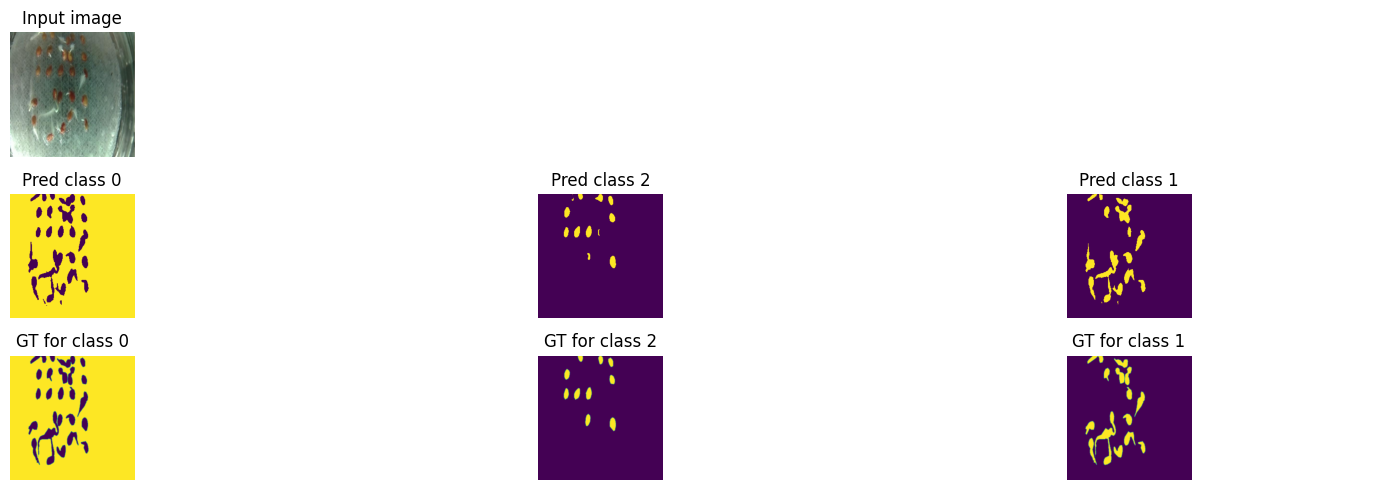

Train loss: 0.02037 | Time: 28m 10s | Val loss: 0.01716
Train_DICE_avg: 0.78704 | Train_Jaccard_avg: 0.72183 | Train_Sensitivity_avg: 0.94705 | Train_Specificity_avg: 0.91810 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98525 | Train_Sensitivity: 0.99729 | Train_Specificity: 0.77433 
Class 1 - Train_DICE: 0.56008 | Train_Jaccard: 0.48773 | Train_Sensitivity: 0.90101 | Train_Specificity: 0.99061 
Class 2 - Train_DICE: 0.80849 | Train_Jaccard: 0.69253 | Train_Sensitivity: 0.94286 | Train_Specificity: 0.98935 
Val_DICE_avg: 0.82714 | Val_Jaccard_avg: 0.75800 | Val_Sensitivity_avg: 0.96931 | Val_Specificity_avg: 0.85782 
Class 0 - Val_DICE: 0.99120 | Val_Jaccard: 0.98261 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.59286 
Class 1 - Val_DICE: 0.71289 | Val_Jaccard: 0.64513 | Val_Sensitivity: 0.93838 | Val_Specificity: 0.99406 
Class 2 - Val_DICE: 0.77734 | Val_Jaccard: 0.64626 | Val_Sensitivity: 0.97009 | Val_Specificity: 0.98655 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.01989 | Time: 28m 58s | Val loss: 0.01723
Train_DICE_avg: 0.79231 | Train_Jaccard_avg: 0.72701 | Train_Sensitivity_avg: 0.94889 | Train_Specificity_avg: 0.92026 
Class 0 - Train_DICE: 0.99259 | Train_Jaccard: 0.98531 | Train_Sensitivity: 0.99729 | Train_Specificity: 0.78026 
Class 1 - Train_DICE: 0.57183 | Train_Jaccard: 0.49765 | Train_Sensitivity: 0.90581 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.81251 | Train_Jaccard: 0.69807 | Train_Sensitivity: 0.94358 | Train_Specificity: 0.98959 
Val_DICE_avg: 0.83001 | Val_Jaccard_avg: 0.75990 | Val_Sensitivity_avg: 0.96348 | Val_Specificity_avg: 0.85673 
Class 0 - Val_DICE: 0.99119 | Val_Jaccard: 0.98257 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.58958 
Class 1 - Val_DICE: 0.72789 | Val_Jaccard: 0.65871 | Val_Sensitivity: 0.91482 | Val_Specificity: 0.99466 
Class 2 - Val_DICE: 0.77095 | Val_Jaccard: 0.63842 | Val_Sensitivity: 0.97613 | Val_Specificity: 0.98596 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.01993 | Time: 29m 45s | Val loss: 0.01705
Train_DICE_avg: 0.78774 | Train_Jaccard_avg: 0.72237 | Train_Sensitivity_avg: 0.94633 | Train_Specificity_avg: 0.91884 
Class 0 - Train_DICE: 0.99267 | Train_Jaccard: 0.98547 | Train_Sensitivity: 0.99728 | Train_Specificity: 0.77639 
Class 1 - Train_DICE: 0.56114 | Train_Jaccard: 0.48730 | Train_Sensitivity: 0.89794 | Train_Specificity: 0.99064 
Class 2 - Train_DICE: 0.80942 | Train_Jaccard: 0.69434 | Train_Sensitivity: 0.94378 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.83592 | Val_Jaccard_avg: 0.76858 | Val_Sensitivity_avg: 0.96886 | Val_Specificity_avg: 0.85411 
Class 0 - Val_DICE: 0.99087 | Val_Jaccard: 0.98196 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.58040 
Class 1 - Val_DICE: 0.72387 | Val_Jaccard: 0.65627 | Val_Sensitivity: 0.93589 | Val_Specificity: 0.99448 
Class 2 - Val_DICE: 0.79300 | Val_Jaccard: 0.66750 | Val_Sensitivity: 0.97118 | Val_Specificity: 0.98744 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.01947 | Time: 30m 33s | Val loss: 0.01668
Train_DICE_avg: 0.78657 | Train_Jaccard_avg: 0.72111 | Train_Sensitivity_avg: 0.94875 | Train_Specificity_avg: 0.91797 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98525 | Train_Sensitivity: 0.99734 | Train_Specificity: 0.77373 
Class 1 - Train_DICE: 0.55580 | Train_Jaccard: 0.48136 | Train_Sensitivity: 0.90247 | Train_Specificity: 0.99067 
Class 2 - Train_DICE: 0.81135 | Train_Jaccard: 0.69673 | Train_Sensitivity: 0.94644 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.83171 | Val_Jaccard_avg: 0.76231 | Val_Sensitivity_avg: 0.96070 | Val_Specificity_avg: 0.85560 
Class 0 - Val_DICE: 0.99102 | Val_Jaccard: 0.98224 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.58555 
Class 1 - Val_DICE: 0.72396 | Val_Jaccard: 0.65423 | Val_Sensitivity: 0.90854 | Val_Specificity: 0.99469 
Class 2 - Val_DICE: 0.78015 | Val_Jaccard: 0.65046 | Val_Sensitivity: 0.97407 | Val_Specificity: 0.98656 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.01911 | Time: 31m 20s | Val loss: 0.01628
Train_DICE_avg: 0.79038 | Train_Jaccard_avg: 0.72527 | Train_Sensitivity_avg: 0.95121 | Train_Specificity_avg: 0.91939 
Class 0 - Train_DICE: 0.99277 | Train_Jaccard: 0.98566 | Train_Sensitivity: 0.99741 | Train_Specificity: 0.77810 
Class 1 - Train_DICE: 0.56492 | Train_Jaccard: 0.49119 | Train_Sensitivity: 0.90938 | Train_Specificity: 0.99053 
Class 2 - Train_DICE: 0.81345 | Train_Jaccard: 0.69894 | Train_Sensitivity: 0.94683 | Train_Specificity: 0.98955 
Val_DICE_avg: 0.83060 | Val_Jaccard_avg: 0.76001 | Val_Sensitivity_avg: 0.96171 | Val_Specificity_avg: 0.85900 
Class 0 - Val_DICE: 0.99149 | Val_Jaccard: 0.98317 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.59640 
Class 1 - Val_DICE: 0.72746 | Val_Jaccard: 0.65619 | Val_Sensitivity: 0.90655 | Val_Specificity: 0.99469 
Class 2 - Val_DICE: 0.77284 | Val_Jaccard: 0.64066 | Val_Sensitivity: 0.97908 | Val_Specificity: 0.98590 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


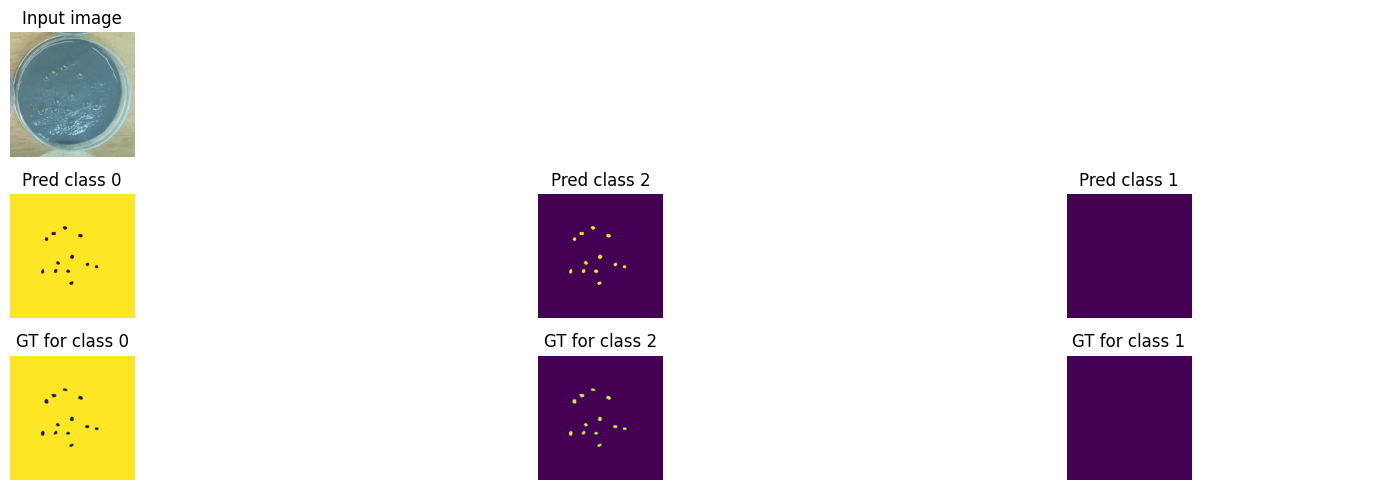

Train loss: 0.01900 | Time: 32m 8s | Val loss: 0.01610
Train_DICE_avg: 0.78861 | Train_Jaccard_avg: 0.72333 | Train_Sensitivity_avg: 0.95206 | Train_Specificity_avg: 0.91749 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98549 | Train_Sensitivity: 0.99752 | Train_Specificity: 0.77256 
Class 1 - Train_DICE: 0.56062 | Train_Jaccard: 0.48665 | Train_Sensitivity: 0.91107 | Train_Specificity: 0.99041 
Class 2 - Train_DICE: 0.81253 | Train_Jaccard: 0.69786 | Train_Sensitivity: 0.94761 | Train_Specificity: 0.98951 
Val_DICE_avg: 0.83107 | Val_Jaccard_avg: 0.76047 | Val_Sensitivity_avg: 0.96414 | Val_Specificity_avg: 0.86079 
Class 0 - Val_DICE: 0.99161 | Val_Jaccard: 0.98341 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60193 
Class 1 - Val_DICE: 0.73016 | Val_Jaccard: 0.65995 | Val_Sensitivity: 0.91749 | Val_Specificity: 0.99469 
Class 2 - Val_DICE: 0.77144 | Val_Jaccard: 0.63805 | Val_Sensitivity: 0.97544 | Val_Specificity: 0.98574 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01864 | Time: 32m 55s | Val loss: 0.01605
Train_DICE_avg: 0.79421 | Train_Jaccard_avg: 0.72926 | Train_Sensitivity_avg: 0.95053 | Train_Specificity_avg: 0.91954 
Class 0 - Train_DICE: 0.99286 | Train_Jaccard: 0.98585 | Train_Sensitivity: 0.99746 | Train_Specificity: 0.77795 
Class 1 - Train_DICE: 0.57517 | Train_Jaccard: 0.50087 | Train_Sensitivity: 0.90599 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.81459 | Train_Jaccard: 0.70107 | Train_Sensitivity: 0.94814 | Train_Specificity: 0.98972 
Val_DICE_avg: 0.82092 | Val_Jaccard_avg: 0.74829 | Val_Sensitivity_avg: 0.95324 | Val_Specificity_avg: 0.86171 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98365 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60528 
Class 1 - Val_DICE: 0.71339 | Val_Jaccard: 0.63969 | Val_Sensitivity: 0.87567 | Val_Specificity: 0.99488 
Class 2 - Val_DICE: 0.75764 | Val_Jaccard: 0.62155 | Val_Sensitivity: 0.98457 | Val_Specificity: 0.98495 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.01857 | Time: 33m 42s | Val loss: 0.01578
Train_DICE_avg: 0.79218 | Train_Jaccard_avg: 0.72696 | Train_Sensitivity_avg: 0.95372 | Train_Specificity_avg: 0.91828 
Class 0 - Train_DICE: 0.99279 | Train_Jaccard: 0.98572 | Train_Sensitivity: 0.99763 | Train_Specificity: 0.77499 
Class 1 - Train_DICE: 0.57032 | Train_Jaccard: 0.49575 | Train_Sensitivity: 0.91601 | Train_Specificity: 0.99036 
Class 2 - Train_DICE: 0.81344 | Train_Jaccard: 0.69940 | Train_Sensitivity: 0.94753 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.83316 | Val_Jaccard_avg: 0.76095 | Val_Sensitivity_avg: 0.96152 | Val_Specificity_avg: 0.86149 
Class 0 - Val_DICE: 0.99162 | Val_Jaccard: 0.98343 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60406 
Class 1 - Val_DICE: 0.74610 | Val_Jaccard: 0.67264 | Val_Sensitivity: 0.90366 | Val_Specificity: 0.99497 
Class 2 - Val_DICE: 0.76177 | Val_Jaccard: 0.62679 | Val_Sensitivity: 0.98142 | Val_Specificity: 0.98543 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.01836 | Time: 34m 29s | Val loss: 0.01575
Train_DICE_avg: 0.80155 | Train_Jaccard_avg: 0.73694 | Train_Sensitivity_avg: 0.95369 | Train_Specificity_avg: 0.92253 
Class 0 - Train_DICE: 0.99292 | Train_Jaccard: 0.98596 | Train_Sensitivity: 0.99742 | Train_Specificity: 0.78656 
Class 1 - Train_DICE: 0.59316 | Train_Jaccard: 0.51837 | Train_Sensitivity: 0.91617 | Train_Specificity: 0.99117 
Class 2 - Train_DICE: 0.81858 | Train_Jaccard: 0.70649 | Train_Sensitivity: 0.94748 | Train_Specificity: 0.98985 
Val_DICE_avg: 0.83913 | Val_Jaccard_avg: 0.76842 | Val_Sensitivity_avg: 0.96524 | Val_Specificity_avg: 0.86043 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98312 | Val_Sensitivity: 0.99951 | Val_Specificity: 0.60023 
Class 1 - Val_DICE: 0.75182 | Val_Jaccard: 0.67962 | Val_Sensitivity: 0.91693 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.77410 | Val_Jaccard: 0.64254 | Val_Sensitivity: 0.97929 | Val_Specificity: 0.98604 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01826 | Time: 35m 17s | Val loss: 0.01533
Train_DICE_avg: 0.79782 | Train_Jaccard_avg: 0.73300 | Train_Sensitivity_avg: 0.95308 | Train_Specificity_avg: 0.91988 
Class 0 - Train_DICE: 0.99280 | Train_Jaccard: 0.98572 | Train_Sensitivity: 0.99757 | Train_Specificity: 0.77903 
Class 1 - Train_DICE: 0.58332 | Train_Jaccard: 0.50858 | Train_Sensitivity: 0.91237 | Train_Specificity: 0.99086 
Class 2 - Train_DICE: 0.81733 | Train_Jaccard: 0.70471 | Train_Sensitivity: 0.94931 | Train_Specificity: 0.98975 
Val_DICE_avg: 0.83199 | Val_Jaccard_avg: 0.76135 | Val_Sensitivity_avg: 0.96668 | Val_Specificity_avg: 0.86295 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98390 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60857 
Class 1 - Val_DICE: 0.73559 | Val_Jaccard: 0.66558 | Val_Sensitivity: 0.92599 | Val_Specificity: 0.99462 
Class 2 - Val_DICE: 0.76851 | Val_Jaccard: 0.63457 | Val_Sensitivity: 0.97458 | Val_Specificity: 0.98566 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


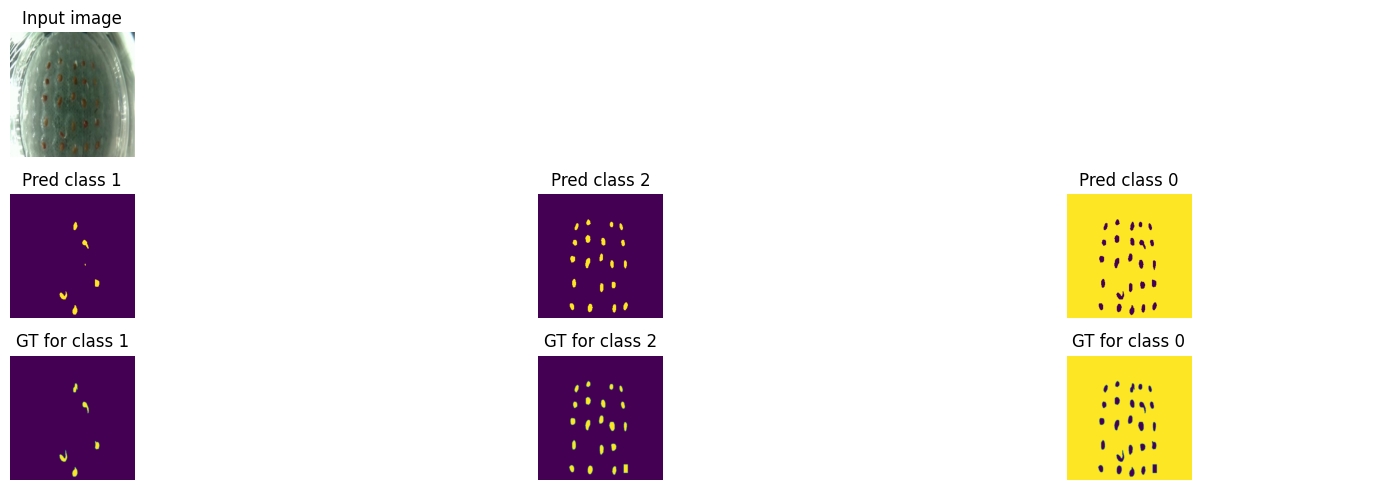

Train loss: 0.01799 | Time: 36m 4s | Val loss: 0.01528
Train_DICE_avg: 0.79931 | Train_Jaccard_avg: 0.73478 | Train_Sensitivity_avg: 0.95448 | Train_Specificity_avg: 0.92148 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98603 | Train_Sensitivity: 0.99759 | Train_Specificity: 0.78370 
Class 1 - Train_DICE: 0.58479 | Train_Jaccard: 0.51005 | Train_Sensitivity: 0.91591 | Train_Specificity: 0.99087 
Class 2 - Train_DICE: 0.82020 | Train_Jaccard: 0.70825 | Train_Sensitivity: 0.94994 | Train_Specificity: 0.98985 
Val_DICE_avg: 0.83484 | Val_Jaccard_avg: 0.76334 | Val_Sensitivity_avg: 0.96644 | Val_Specificity_avg: 0.86277 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60783 
Class 1 - Val_DICE: 0.74227 | Val_Jaccard: 0.66897 | Val_Sensitivity: 0.92092 | Val_Specificity: 0.99474 
Class 2 - Val_DICE: 0.77039 | Val_Jaccard: 0.63715 | Val_Sensitivity: 0.97892 | Val_Specificity: 0.98575 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01788 | Time: 36m 52s | Val loss: 0.01537
Train_DICE_avg: 0.80208 | Train_Jaccard_avg: 0.73755 | Train_Sensitivity_avg: 0.95227 | Train_Specificity_avg: 0.92292 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99750 | Train_Specificity: 0.78746 
Class 1 - Train_DICE: 0.59203 | Train_Jaccard: 0.51639 | Train_Sensitivity: 0.91046 | Train_Specificity: 0.99116 
Class 2 - Train_DICE: 0.82120 | Train_Jaccard: 0.71014 | Train_Sensitivity: 0.94884 | Train_Specificity: 0.99014 
Val_DICE_avg: 0.83212 | Val_Jaccard_avg: 0.76074 | Val_Sensitivity_avg: 0.96701 | Val_Specificity_avg: 0.86309 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98404 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60898 
Class 1 - Val_DICE: 0.73889 | Val_Jaccard: 0.66707 | Val_Sensitivity: 0.92371 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.76555 | Val_Jaccard: 0.63112 | Val_Sensitivity: 0.97785 | Val_Specificity: 0.98556 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01784 | Time: 37m 39s | Val loss: 0.01533
Train_DICE_avg: 0.80010 | Train_Jaccard_avg: 0.73537 | Train_Sensitivity_avg: 0.95380 | Train_Specificity_avg: 0.92002 
Class 0 - Train_DICE: 0.99293 | Train_Jaccard: 0.98598 | Train_Sensitivity: 0.99763 | Train_Specificity: 0.77937 
Class 1 - Train_DICE: 0.58918 | Train_Jaccard: 0.51374 | Train_Sensitivity: 0.91333 | Train_Specificity: 0.99093 
Class 2 - Train_DICE: 0.81819 | Train_Jaccard: 0.70638 | Train_Sensitivity: 0.95045 | Train_Specificity: 0.98975 
Val_DICE_avg: 0.83188 | Val_Jaccard_avg: 0.76150 | Val_Sensitivity_avg: 0.96601 | Val_Specificity_avg: 0.86354 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61004 
Class 1 - Val_DICE: 0.73375 | Val_Jaccard: 0.66334 | Val_Sensitivity: 0.92103 | Val_Specificity: 0.99476 
Class 2 - Val_DICE: 0.77002 | Val_Jaccard: 0.63727 | Val_Sensitivity: 0.97752 | Val_Specificity: 0.98583 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01765 | Time: 38m 27s | Val loss: 0.01532
Train_DICE_avg: 0.80370 | Train_Jaccard_avg: 0.73925 | Train_Sensitivity_avg: 0.95639 | Train_Specificity_avg: 0.92238 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99767 | Train_Specificity: 0.78618 
Class 1 - Train_DICE: 0.59517 | Train_Jaccard: 0.51946 | Train_Sensitivity: 0.92128 | Train_Specificity: 0.99100 
Class 2 - Train_DICE: 0.82292 | Train_Jaccard: 0.71217 | Train_Sensitivity: 0.95022 | Train_Specificity: 0.98997 
Val_DICE_avg: 0.83385 | Val_Jaccard_avg: 0.76165 | Val_Sensitivity_avg: 0.96445 | Val_Specificity_avg: 0.86305 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60888 
Class 1 - Val_DICE: 0.74975 | Val_Jaccard: 0.67624 | Val_Sensitivity: 0.91416 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.75993 | Val_Jaccard: 0.62481 | Val_Sensitivity: 0.97970 | Val_Specificity: 0.98540 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01756 | Time: 39m 14s | Val loss: 0.01537
Train_DICE_avg: 0.80113 | Train_Jaccard_avg: 0.73574 | Train_Sensitivity_avg: 0.95644 | Train_Specificity_avg: 0.91940 
Class 0 - Train_DICE: 0.99289 | Train_Jaccard: 0.98590 | Train_Sensitivity: 0.99767 | Train_Specificity: 0.77761 
Class 1 - Train_DICE: 0.59139 | Train_Jaccard: 0.51473 | Train_Sensitivity: 0.91919 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.81911 | Train_Jaccard: 0.70660 | Train_Sensitivity: 0.95248 | Train_Specificity: 0.98965 
Val_DICE_avg: 0.83628 | Val_Jaccard_avg: 0.76579 | Val_Sensitivity_avg: 0.96574 | Val_Specificity_avg: 0.86124 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98344 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60279 
Class 1 - Val_DICE: 0.74251 | Val_Jaccard: 0.67117 | Val_Sensitivity: 0.92010 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.77469 | Val_Jaccard: 0.64275 | Val_Sensitivity: 0.97764 | Val_Specificity: 0.98600 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


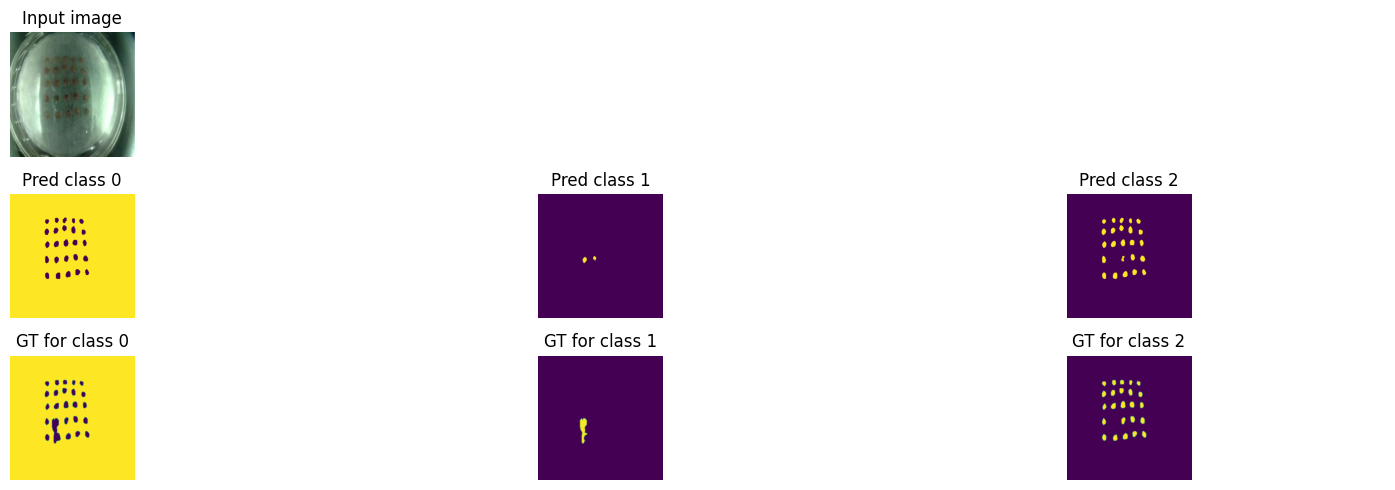

Train loss: 0.01749 | Time: 40m 2s | Val loss: 0.01544
Train_DICE_avg: 0.80250 | Train_Jaccard_avg: 0.73800 | Train_Sensitivity_avg: 0.95571 | Train_Specificity_avg: 0.92172 
Class 0 - Train_DICE: 0.99301 | Train_Jaccard: 0.98614 | Train_Sensitivity: 0.99761 | Train_Specificity: 0.78415 
Class 1 - Train_DICE: 0.59272 | Train_Jaccard: 0.51734 | Train_Sensitivity: 0.91884 | Train_Specificity: 0.99111 
Class 2 - Train_DICE: 0.82177 | Train_Jaccard: 0.71051 | Train_Sensitivity: 0.95068 | Train_Specificity: 0.98990 
Val_DICE_avg: 0.83570 | Val_Jaccard_avg: 0.76544 | Val_Sensitivity_avg: 0.96530 | Val_Specificity_avg: 0.86217 
Class 0 - Val_DICE: 0.99172 | Val_Jaccard: 0.98362 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60539 
Class 1 - Val_DICE: 0.73735 | Val_Jaccard: 0.66540 | Val_Sensitivity: 0.92009 | Val_Specificity: 0.99483 
Class 2 - Val_DICE: 0.77802 | Val_Jaccard: 0.64731 | Val_Sensitivity: 0.97633 | Val_Specificity: 0.98629 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01734 | Time: 40m 49s | Val loss: 0.01540
Train_DICE_avg: 0.80298 | Train_Jaccard_avg: 0.73858 | Train_Sensitivity_avg: 0.95521 | Train_Specificity_avg: 0.91945 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98610 | Train_Sensitivity: 0.99775 | Train_Specificity: 0.77745 
Class 1 - Train_DICE: 0.59441 | Train_Jaccard: 0.51922 | Train_Sensitivity: 0.91589 | Train_Specificity: 0.99099 
Class 2 - Train_DICE: 0.82154 | Train_Jaccard: 0.71043 | Train_Sensitivity: 0.95198 | Train_Specificity: 0.98992 
Val_DICE_avg: 0.83977 | Val_Jaccard_avg: 0.76932 | Val_Sensitivity_avg: 0.96599 | Val_Specificity_avg: 0.86035 
Class 0 - Val_DICE: 0.99150 | Val_Jaccard: 0.98319 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.59981 
Class 1 - Val_DICE: 0.75099 | Val_Jaccard: 0.67781 | Val_Sensitivity: 0.91896 | Val_Specificity: 0.99492 
Class 2 - Val_DICE: 0.77683 | Val_Jaccard: 0.64697 | Val_Sensitivity: 0.97952 | Val_Specificity: 0.98633 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01731 | Time: 41m 36s | Val loss: 0.01512
Train_DICE_avg: 0.80604 | Train_Jaccard_avg: 0.74082 | Train_Sensitivity_avg: 0.95670 | Train_Specificity_avg: 0.92067 
Class 0 - Train_DICE: 0.99293 | Train_Jaccard: 0.98599 | Train_Sensitivity: 0.99764 | Train_Specificity: 0.78097 
Class 1 - Train_DICE: 0.60295 | Train_Jaccard: 0.52539 | Train_Sensitivity: 0.91891 | Train_Specificity: 0.99121 
Class 2 - Train_DICE: 0.82222 | Train_Jaccard: 0.71108 | Train_Sensitivity: 0.95353 | Train_Specificity: 0.98982 
Val_DICE_avg: 0.83700 | Val_Jaccard_avg: 0.76695 | Val_Sensitivity_avg: 0.96234 | Val_Specificity_avg: 0.86038 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98330 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.59994 
Class 1 - Val_DICE: 0.74158 | Val_Jaccard: 0.66976 | Val_Sensitivity: 0.90892 | Val_Specificity: 0.99487 
Class 2 - Val_DICE: 0.77786 | Val_Jaccard: 0.64779 | Val_Sensitivity: 0.97860 | Val_Specificity: 0.98634 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.01724 | Time: 42m 24s | Val loss: 0.01510
Train_DICE_avg: 0.80326 | Train_Jaccard_avg: 0.73841 | Train_Sensitivity_avg: 0.95661 | Train_Specificity_avg: 0.91960 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98612 | Train_Sensitivity: 0.99776 | Train_Specificity: 0.77818 
Class 1 - Train_DICE: 0.59532 | Train_Jaccard: 0.51873 | Train_Sensitivity: 0.91900 | Train_Specificity: 0.99079 
Class 2 - Train_DICE: 0.82147 | Train_Jaccard: 0.71037 | Train_Sensitivity: 0.95306 | Train_Specificity: 0.98983 
Val_DICE_avg: 0.83842 | Val_Jaccard_avg: 0.76855 | Val_Sensitivity_avg: 0.96387 | Val_Specificity_avg: 0.86106 
Class 0 - Val_DICE: 0.99158 | Val_Jaccard: 0.98335 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60183 
Class 1 - Val_DICE: 0.74512 | Val_Jaccard: 0.67358 | Val_Sensitivity: 0.91544 | Val_Specificity: 0.99491 
Class 2 - Val_DICE: 0.77857 | Val_Jaccard: 0.64872 | Val_Sensitivity: 0.97668 | Val_Specificity: 0.98644 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.01711 | Time: 43m 11s | Val loss: 0.01505
Train_DICE_avg: 0.80563 | Train_Jaccard_avg: 0.74124 | Train_Sensitivity_avg: 0.95507 | Train_Specificity_avg: 0.92150 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98612 | Train_Sensitivity: 0.99772 | Train_Specificity: 0.78362 
Class 1 - Train_DICE: 0.60005 | Train_Jaccard: 0.52428 | Train_Sensitivity: 0.91407 | Train_Specificity: 0.99108 
Class 2 - Train_DICE: 0.82385 | Train_Jaccard: 0.71332 | Train_Sensitivity: 0.95343 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.84001 | Val_Jaccard_avg: 0.76842 | Val_Sensitivity_avg: 0.96247 | Val_Specificity_avg: 0.86119 
Class 0 - Val_DICE: 0.99164 | Val_Jaccard: 0.98347 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60250 
Class 1 - Val_DICE: 0.75712 | Val_Jaccard: 0.68201 | Val_Sensitivity: 0.90793 | Val_Specificity: 0.99497 
Class 2 - Val_DICE: 0.77128 | Val_Jaccard: 0.63978 | Val_Sensitivity: 0.98001 | Val_Specificity: 0.98611 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


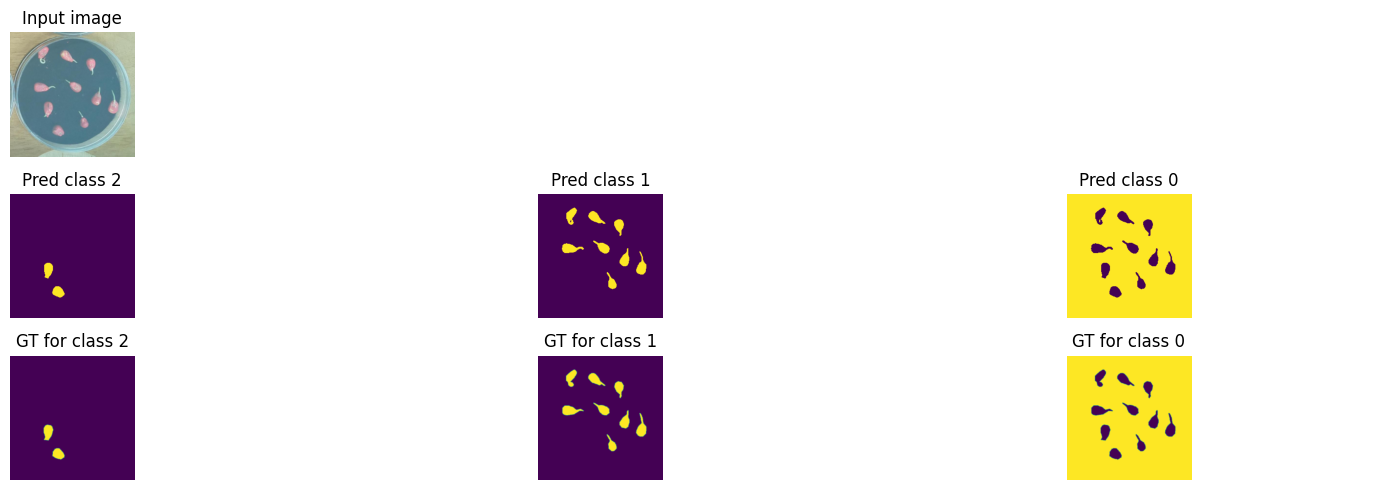

Train loss: 0.01714 | Time: 43m 59s | Val loss: 0.01499
Train_DICE_avg: 0.80465 | Train_Jaccard_avg: 0.73992 | Train_Sensitivity_avg: 0.95705 | Train_Specificity_avg: 0.91961 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99772 | Train_Specificity: 0.77797 
Class 1 - Train_DICE: 0.59807 | Train_Jaccard: 0.52166 | Train_Sensitivity: 0.91945 | Train_Specificity: 0.99091 
Class 2 - Train_DICE: 0.82288 | Train_Jaccard: 0.71196 | Train_Sensitivity: 0.95399 | Train_Specificity: 0.98994 
Val_DICE_avg: 0.84118 | Val_Jaccard_avg: 0.76985 | Val_Sensitivity_avg: 0.96123 | Val_Specificity_avg: 0.86241 
Class 0 - Val_DICE: 0.99170 | Val_Jaccard: 0.98359 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60602 
Class 1 - Val_DICE: 0.76020 | Val_Jaccard: 0.68606 | Val_Sensitivity: 0.90347 | Val_Specificity: 0.99515 
Class 2 - Val_DICE: 0.77165 | Val_Jaccard: 0.63989 | Val_Sensitivity: 0.98074 | Val_Specificity: 0.98604 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01695 | Time: 44m 47s | Val loss: 0.01498
Train_DICE_avg: 0.81066 | Train_Jaccard_avg: 0.74654 | Train_Sensitivity_avg: 0.95649 | Train_Specificity_avg: 0.92305 
Class 0 - Train_DICE: 0.99305 | Train_Jaccard: 0.98623 | Train_Sensitivity: 0.99772 | Train_Specificity: 0.78769 
Class 1 - Train_DICE: 0.61238 | Train_Jaccard: 0.53634 | Train_Sensitivity: 0.91980 | Train_Specificity: 0.99141 
Class 2 - Train_DICE: 0.82654 | Train_Jaccard: 0.71705 | Train_Sensitivity: 0.95196 | Train_Specificity: 0.99006 
Val_DICE_avg: 0.84080 | Val_Jaccard_avg: 0.76967 | Val_Sensitivity_avg: 0.96322 | Val_Specificity_avg: 0.86147 
Class 0 - Val_DICE: 0.99162 | Val_Jaccard: 0.98341 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60319 
Class 1 - Val_DICE: 0.75657 | Val_Jaccard: 0.68247 | Val_Sensitivity: 0.90970 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.77420 | Val_Jaccard: 0.64313 | Val_Sensitivity: 0.98048 | Val_Specificity: 0.98618 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01703 | Time: 45m 34s | Val loss: 0.01489
Train_DICE_avg: 0.80503 | Train_Jaccard_avg: 0.74028 | Train_Sensitivity_avg: 0.95606 | Train_Specificity_avg: 0.92061 
Class 0 - Train_DICE: 0.99305 | Train_Jaccard: 0.98622 | Train_Sensitivity: 0.99768 | Train_Specificity: 0.78086 
Class 1 - Train_DICE: 0.59860 | Train_Jaccard: 0.52201 | Train_Sensitivity: 0.91659 | Train_Specificity: 0.99106 
Class 2 - Train_DICE: 0.82343 | Train_Jaccard: 0.71262 | Train_Sensitivity: 0.95390 | Train_Specificity: 0.98991 
Val_DICE_avg: 0.84416 | Val_Jaccard_avg: 0.77354 | Val_Sensitivity_avg: 0.96280 | Val_Specificity_avg: 0.85986 
Class 0 - Val_DICE: 0.99145 | Val_Jaccard: 0.98308 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.59798 
Class 1 - Val_DICE: 0.76150 | Val_Jaccard: 0.68789 | Val_Sensitivity: 0.90946 | Val_Specificity: 0.99522 
Class 2 - Val_DICE: 0.77953 | Val_Jaccard: 0.64966 | Val_Sensitivity: 0.97943 | Val_Specificity: 0.98638 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.01690 | Time: 46m 22s | Val loss: 0.01482
Train_DICE_avg: 0.80604 | Train_Jaccard_avg: 0.74135 | Train_Sensitivity_avg: 0.95883 | Train_Specificity_avg: 0.91954 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98610 | Train_Sensitivity: 0.99776 | Train_Specificity: 0.77776 
Class 1 - Train_DICE: 0.60232 | Train_Jaccard: 0.52579 | Train_Sensitivity: 0.92365 | Train_Specificity: 0.99101 
Class 2 - Train_DICE: 0.82280 | Train_Jaccard: 0.71215 | Train_Sensitivity: 0.95507 | Train_Specificity: 0.98986 
Val_DICE_avg: 0.83944 | Val_Jaccard_avg: 0.76862 | Val_Sensitivity_avg: 0.96504 | Val_Specificity_avg: 0.86282 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98376 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.60731 
Class 1 - Val_DICE: 0.75004 | Val_Jaccard: 0.67657 | Val_Sensitivity: 0.91585 | Val_Specificity: 0.99495 
Class 2 - Val_DICE: 0.77649 | Val_Jaccard: 0.64552 | Val_Sensitivity: 0.97981 | Val_Specificity: 0.98619 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01673 | Time: 47m 9s | Val loss: 0.01488
Train_DICE_avg: 0.80680 | Train_Jaccard_avg: 0.74235 | Train_Sensitivity_avg: 0.95887 | Train_Specificity_avg: 0.91992 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98624 | Train_Sensitivity: 0.99779 | Train_Specificity: 0.77863 
Class 1 - Train_DICE: 0.60289 | Train_Jaccard: 0.52660 | Train_Sensitivity: 0.92337 | Train_Specificity: 0.99119 
Class 2 - Train_DICE: 0.82446 | Train_Jaccard: 0.71420 | Train_Sensitivity: 0.95544 | Train_Specificity: 0.98994 
Val_DICE_avg: 0.83890 | Val_Jaccard_avg: 0.76807 | Val_Sensitivity_avg: 0.96425 | Val_Specificity_avg: 0.86369 
Class 0 - Val_DICE: 0.99183 | Val_Jaccard: 0.98382 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60985 
Class 1 - Val_DICE: 0.75006 | Val_Jaccard: 0.67611 | Val_Sensitivity: 0.91142 | Val_Specificity: 0.99498 
Class 2 - Val_DICE: 0.77481 | Val_Jaccard: 0.64428 | Val_Sensitivity: 0.98187 | Val_Specificity: 0.98624 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


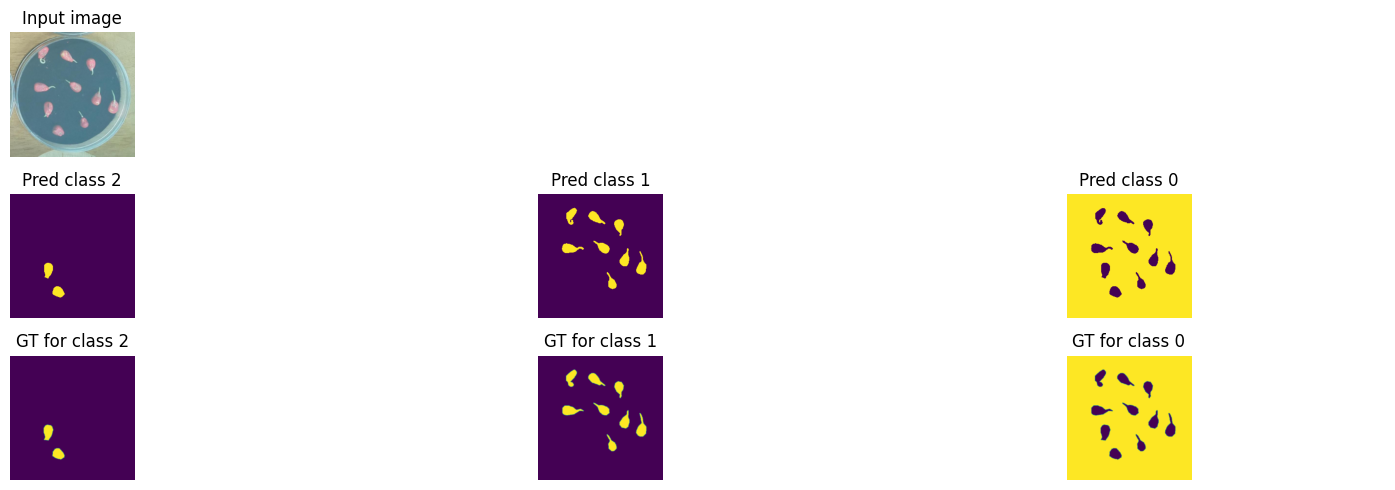

Train loss: 0.01660 | Time: 47m 56s | Val loss: 0.01485
Train_DICE_avg: 0.81066 | Train_Jaccard_avg: 0.74671 | Train_Sensitivity_avg: 0.95848 | Train_Specificity_avg: 0.92225 
Class 0 - Train_DICE: 0.99316 | Train_Jaccard: 0.98644 | Train_Sensitivity: 0.99771 | Train_Specificity: 0.78503 
Class 1 - Train_DICE: 0.61217 | Train_Jaccard: 0.53630 | Train_Sensitivity: 0.92381 | Train_Specificity: 0.99148 
Class 2 - Train_DICE: 0.82666 | Train_Jaccard: 0.71739 | Train_Sensitivity: 0.95392 | Train_Specificity: 0.99024 
Val_DICE_avg: 0.84025 | Val_Jaccard_avg: 0.76900 | Val_Sensitivity_avg: 0.96125 | Val_Specificity_avg: 0.86245 
Class 0 - Val_DICE: 0.99171 | Val_Jaccard: 0.98359 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60614 
Class 1 - Val_DICE: 0.75469 | Val_Jaccard: 0.68009 | Val_Sensitivity: 0.90110 | Val_Specificity: 0.99509 
Class 2 - Val_DICE: 0.77434 | Val_Jaccard: 0.64331 | Val_Sensitivity: 0.98318 | Val_Specificity: 0.98613 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [ ]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]



Global Performance Metrics:
Loss mean: 0.01536, std: 0.00147
Dice Coefficient mean: 0.87292, std: 0.10726
Jaccard Index mean: 0.81547, std: 0.12399
Sensitivity mean: 0.88974, std: 0.09686
Specificity mean: 0.96519, std: 0.02183

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99599, std: 0.00232
Jaccard mean: 0.99203, std: 0.00458
Sensitivity mean: 0.99535, std: 0.00356
Specificity mean: 0.90135, std: 0.06644

Class 1:
Dice mean: 0.75243, std: 0.29280
Jaccard mean: 0.67587, std: 0.31436
Sensitivity mean: 0.79440, std: 0.26691
Specificity mean: 0.99779, std: 0.00424

Class 2:
Dice mean: 0.87032, std: 0.07962
Jaccard mean: 0.77850, std: 0.11326
Sensitivity mean: 0.87947, std: 0.10088
Specificity mean: 0.99644, std: 0.00246


### Focal Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-UNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.64 GB
GPU Memory - Reserved: 0.97 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


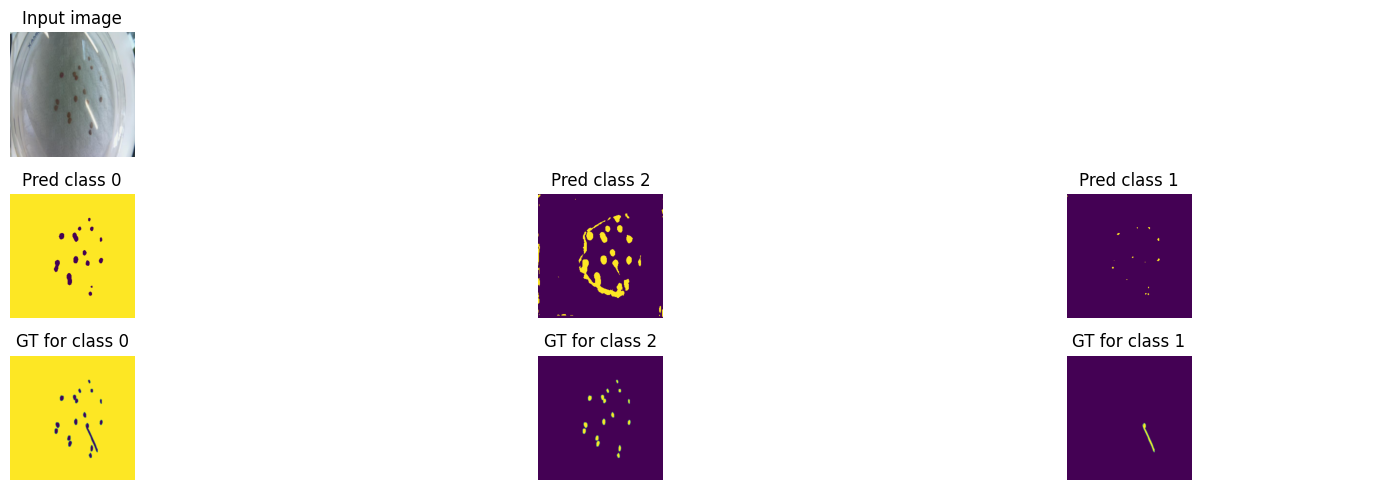

Train loss: 0.04900 | Time: 0m 46s | Val loss: 0.03547
Train_DICE_avg: 0.40982 | Train_Jaccard_avg: 0.33484 | Train_Sensitivity_avg: 0.82224 | Train_Specificity_avg: 0.69694 
Class 0 - Train_DICE: 0.51016 | Train_Jaccard: 0.40306 | Train_Sensitivity: 0.99517 | Train_Specificity: 0.12381 
Class 1 - Train_DICE: 0.22210 | Train_Jaccard: 0.22127 | Train_Sensitivity: 0.83292 | Train_Specificity: 0.98593 
Class 2 - Train_DICE: 0.49720 | Train_Jaccard: 0.38019 | Train_Sensitivity: 0.63862 | Train_Specificity: 0.98107 
Val_DICE_avg: 0.66877 | Val_Jaccard_avg: 0.60017 | Val_Sensitivity_avg: 0.95362 | Val_Specificity_avg: 0.70429 
Class 0 - Val_DICE: 0.88200 | Val_Jaccard: 0.79382 | Val_Sensitivity: 0.99863 | Val_Specificity: 0.13839 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.65607 | Val_Jaccard: 0.53843 | Val_Sensitivity: 0.86223 | Val_Specificity: 0.98613 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.02949 | Time: 1m 33s | Val loss: 0.02458
Train_DICE_avg: 0.63566 | Train_Jaccard_avg: 0.58056 | Train_Sensitivity_avg: 0.94099 | Train_Specificity_avg: 0.79853 
Class 0 - Train_DICE: 0.95017 | Train_Jaccard: 0.90693 | Train_Sensitivity: 0.99629 | Train_Specificity: 0.42166 
Class 1 - Train_DICE: 0.28309 | Train_Jaccard: 0.28309 | Train_Sensitivity: 0.99919 | Train_Specificity: 0.98579 
Class 2 - Train_DICE: 0.67372 | Train_Jaccard: 0.55167 | Train_Sensitivity: 0.82750 | Train_Specificity: 0.98814 
Val_DICE_avg: 0.67216 | Val_Jaccard_avg: 0.62490 | Val_Sensitivity_avg: 0.94794 | Val_Specificity_avg: 0.80696 
Class 0 - Val_DICE: 0.98419 | Val_Jaccard: 0.96896 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.45009 
Class 1 - Val_DICE: 0.43095 | Val_Jaccard: 0.43095 | Val_Sensitivity: 0.96270 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60135 | Val_Jaccard: 0.47479 | Val_Sensitivity: 0.88315 | Val_Specificity: 0.98246 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.02168 | Time: 2m 19s | Val loss: 0.01872
Train_DICE_avg: 0.64131 | Train_Jaccard_avg: 0.59331 | Train_Sensitivity_avg: 0.95074 | Train_Specificity_avg: 0.85078 
Class 0 - Train_DICE: 0.97867 | Train_Jaccard: 0.95840 | Train_Sensitivity: 0.99503 | Train_Specificity: 0.57982 
Class 1 - Train_DICE: 0.28092 | Train_Jaccard: 0.28092 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.66435 | Train_Jaccard: 0.54061 | Train_Sensitivity: 0.85718 | Train_Specificity: 0.98675 
Val_DICE_avg: 0.68595 | Val_Jaccard_avg: 0.64066 | Val_Sensitivity_avg: 0.96440 | Val_Specificity_avg: 0.82451 
Class 0 - Val_DICE: 0.98670 | Val_Jaccard: 0.97382 | Val_Sensitivity: 0.99744 | Val_Specificity: 0.50219 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60290 | Val_Jaccard: 0.47989 | Val_Sensitivity: 0.89575 | Val_Specificity: 0.98301 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.01704 | Time: 3m 5s | Val loss: 0.01513
Train_DICE_avg: 0.64974 | Train_Jaccard_avg: 0.60286 | Train_Sensitivity_avg: 0.95005 | Train_Specificity_avg: 0.87363 
Class 0 - Train_DICE: 0.98410 | Train_Jaccard: 0.96878 | Train_Sensitivity: 0.99428 | Train_Specificity: 0.64822 
Class 1 - Train_DICE: 0.29042 | Train_Jaccard: 0.29042 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98581 
Class 2 - Train_DICE: 0.67469 | Train_Jaccard: 0.54937 | Train_Sensitivity: 0.85587 | Train_Specificity: 0.98687 
Val_DICE_avg: 0.68378 | Val_Jaccard_avg: 0.63750 | Val_Sensitivity_avg: 0.93978 | Val_Specificity_avg: 0.82944 
Class 0 - Val_DICE: 0.98742 | Val_Jaccard: 0.97523 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.51661 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.59567 | Val_Jaccard: 0.46901 | Val_Sensitivity: 0.82124 | Val_Specificity: 0.98336 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.01360 | Time: 3m 52s | Val loss: 0.01177
Train_DICE_avg: 0.65237 | Train_Jaccard_avg: 0.60546 | Train_Sensitivity_avg: 0.94855 | Train_Specificity_avg: 0.88696 
Class 0 - Train_DICE: 0.98655 | Train_Jaccard: 0.97351 | Train_Sensitivity: 0.99437 | Train_Specificity: 0.68778 
Class 1 - Train_DICE: 0.28273 | Train_Jaccard: 0.28190 | Train_Sensitivity: 0.99214 | Train_Specificity: 0.98606 
Class 2 - Train_DICE: 0.68784 | Train_Jaccard: 0.56098 | Train_Sensitivity: 0.85914 | Train_Specificity: 0.98704 
Val_DICE_avg: 0.69241 | Val_Jaccard_avg: 0.64298 | Val_Sensitivity_avg: 0.96472 | Val_Specificity_avg: 0.82895 
Class 0 - Val_DICE: 0.98732 | Val_Jaccard: 0.97506 | Val_Sensitivity: 0.99854 | Val_Specificity: 0.51598 
Class 1 - Val_DICE: 0.47746 | Val_Jaccard: 0.47160 | Val_Sensitivity: 0.98558 | Val_Specificity: 0.98878 
Class 2 - Val_DICE: 0.61246 | Val_Jaccard: 0.48229 | Val_Sensitivity: 0.91004 | Val_Specificity: 0.98210 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


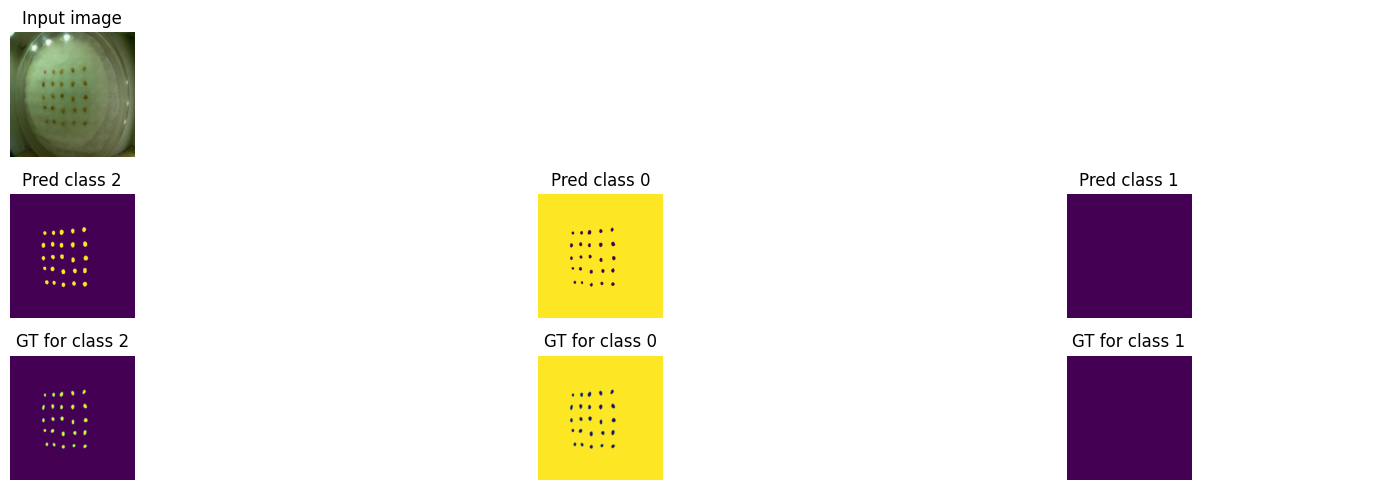

Train loss: 0.01112 | Time: 4m 38s | Val loss: 0.00954
Train_DICE_avg: 0.66056 | Train_Jaccard_avg: 0.61049 | Train_Sensitivity_avg: 0.94009 | Train_Specificity_avg: 0.89034 
Class 0 - Train_DICE: 0.98788 | Train_Jaccard: 0.97611 | Train_Sensitivity: 0.99469 | Train_Specificity: 0.69810 
Class 1 - Train_DICE: 0.29527 | Train_Jaccard: 0.28412 | Train_Sensitivity: 0.95212 | Train_Specificity: 0.98597 
Class 2 - Train_DICE: 0.69852 | Train_Jaccard: 0.57124 | Train_Sensitivity: 0.87346 | Train_Specificity: 0.98696 
Val_DICE_avg: 0.71876 | Val_Jaccard_avg: 0.66679 | Val_Sensitivity_avg: 0.96308 | Val_Specificity_avg: 0.84494 
Class 0 - Val_DICE: 0.98955 | Val_Jaccard: 0.97937 | Val_Sensitivity: 0.99864 | Val_Specificity: 0.56040 
Class 1 - Val_DICE: 0.51511 | Val_Jaccard: 0.49557 | Val_Sensitivity: 0.97554 | Val_Specificity: 0.98985 
Class 2 - Val_DICE: 0.65162 | Val_Jaccard: 0.52545 | Val_Sensitivity: 0.91507 | Val_Specificity: 0.98456 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00934 | Time: 5m 25s | Val loss: 0.00806
Train_DICE_avg: 0.67901 | Train_Jaccard_avg: 0.62432 | Train_Sensitivity_avg: 0.93025 | Train_Specificity_avg: 0.89920 
Class 0 - Train_DICE: 0.98891 | Train_Jaccard: 0.97810 | Train_Sensitivity: 0.99464 | Train_Specificity: 0.72325 
Class 1 - Train_DICE: 0.33537 | Train_Jaccard: 0.30908 | Train_Sensitivity: 0.91801 | Train_Specificity: 0.98704 
Class 2 - Train_DICE: 0.71276 | Train_Jaccard: 0.58578 | Train_Sensitivity: 0.87809 | Train_Specificity: 0.98732 
Val_DICE_avg: 0.74890 | Val_Jaccard_avg: 0.68763 | Val_Sensitivity_avg: 0.95741 | Val_Specificity_avg: 0.84183 
Class 0 - Val_DICE: 0.98989 | Val_Jaccard: 0.98003 | Val_Sensitivity: 0.99890 | Val_Specificity: 0.54978 
Class 1 - Val_DICE: 0.55760 | Val_Jaccard: 0.52087 | Val_Sensitivity: 0.94931 | Val_Specificity: 0.99091 
Class 2 - Val_DICE: 0.69922 | Val_Jaccard: 0.56199 | Val_Sensitivity: 0.92402 | Val_Specificity: 0.98481 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.00807 | Time: 6m 11s | Val loss: 0.00712
Train_DICE_avg: 0.69238 | Train_Jaccard_avg: 0.63382 | Train_Sensitivity_avg: 0.91997 | Train_Specificity_avg: 0.90529 
Class 0 - Train_DICE: 0.98937 | Train_Jaccard: 0.97902 | Train_Sensitivity: 0.99455 | Train_Specificity: 0.74054 
Class 1 - Train_DICE: 0.36080 | Train_Jaccard: 0.32237 | Train_Sensitivity: 0.87617 | Train_Specificity: 0.98765 
Class 2 - Train_DICE: 0.72698 | Train_Jaccard: 0.60007 | Train_Sensitivity: 0.88919 | Train_Specificity: 0.98766 
Val_DICE_avg: 0.76216 | Val_Jaccard_avg: 0.70144 | Val_Sensitivity_avg: 0.93883 | Val_Specificity_avg: 0.83955 
Class 0 - Val_DICE: 0.98902 | Val_Jaccard: 0.97835 | Val_Sensitivity: 0.99909 | Val_Specificity: 0.54002 
Class 1 - Val_DICE: 0.58995 | Val_Jaccard: 0.54401 | Val_Sensitivity: 0.89436 | Val_Specificity: 0.99201 
Class 2 - Val_DICE: 0.70752 | Val_Jaccard: 0.58195 | Val_Sensitivity: 0.92304 | Val_Specificity: 0.98660 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.00702 | Time: 6m 57s | Val loss: 0.00600
Train_DICE_avg: 0.70021 | Train_Jaccard_avg: 0.63980 | Train_Sensitivity_avg: 0.92303 | Train_Specificity_avg: 0.90534 
Class 0 - Train_DICE: 0.98996 | Train_Jaccard: 0.98016 | Train_Sensitivity: 0.99497 | Train_Specificity: 0.74069 
Class 1 - Train_DICE: 0.38000 | Train_Jaccard: 0.33558 | Train_Sensitivity: 0.87640 | Train_Specificity: 0.98780 
Class 2 - Train_DICE: 0.73068 | Train_Jaccard: 0.60367 | Train_Sensitivity: 0.89773 | Train_Specificity: 0.98753 
Val_DICE_avg: 0.76749 | Val_Jaccard_avg: 0.70306 | Val_Sensitivity_avg: 0.95986 | Val_Specificity_avg: 0.85275 
Class 0 - Val_DICE: 0.99063 | Val_Jaccard: 0.98149 | Val_Sensitivity: 0.99894 | Val_Specificity: 0.58159 
Class 1 - Val_DICE: 0.60896 | Val_Jaccard: 0.56319 | Val_Sensitivity: 0.94281 | Val_Specificity: 0.99211 
Class 2 - Val_DICE: 0.70287 | Val_Jaccard: 0.56449 | Val_Sensitivity: 0.93784 | Val_Specificity: 0.98455 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.00624 | Time: 7m 43s | Val loss: 0.00537
Train_DICE_avg: 0.71030 | Train_Jaccard_avg: 0.64838 | Train_Sensitivity_avg: 0.92104 | Train_Specificity_avg: 0.90967 
Class 0 - Train_DICE: 0.99033 | Train_Jaccard: 0.98089 | Train_Sensitivity: 0.99484 | Train_Specificity: 0.75297 
Class 1 - Train_DICE: 0.39813 | Train_Jaccard: 0.34894 | Train_Sensitivity: 0.86871 | Train_Specificity: 0.98824 
Class 2 - Train_DICE: 0.74244 | Train_Jaccard: 0.61531 | Train_Sensitivity: 0.89957 | Train_Specificity: 0.98780 
Val_DICE_avg: 0.76382 | Val_Jaccard_avg: 0.69568 | Val_Sensitivity_avg: 0.93527 | Val_Specificity_avg: 0.84699 
Class 0 - Val_DICE: 0.99009 | Val_Jaccard: 0.98042 | Val_Sensitivity: 0.99900 | Val_Specificity: 0.56401 
Class 1 - Val_DICE: 0.61447 | Val_Jaccard: 0.55606 | Val_Sensitivity: 0.85714 | Val_Specificity: 0.99276 
Class 2 - Val_DICE: 0.68689 | Val_Jaccard: 0.55055 | Val_Sensitivity: 0.94968 | Val_Specificity: 0.98422 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


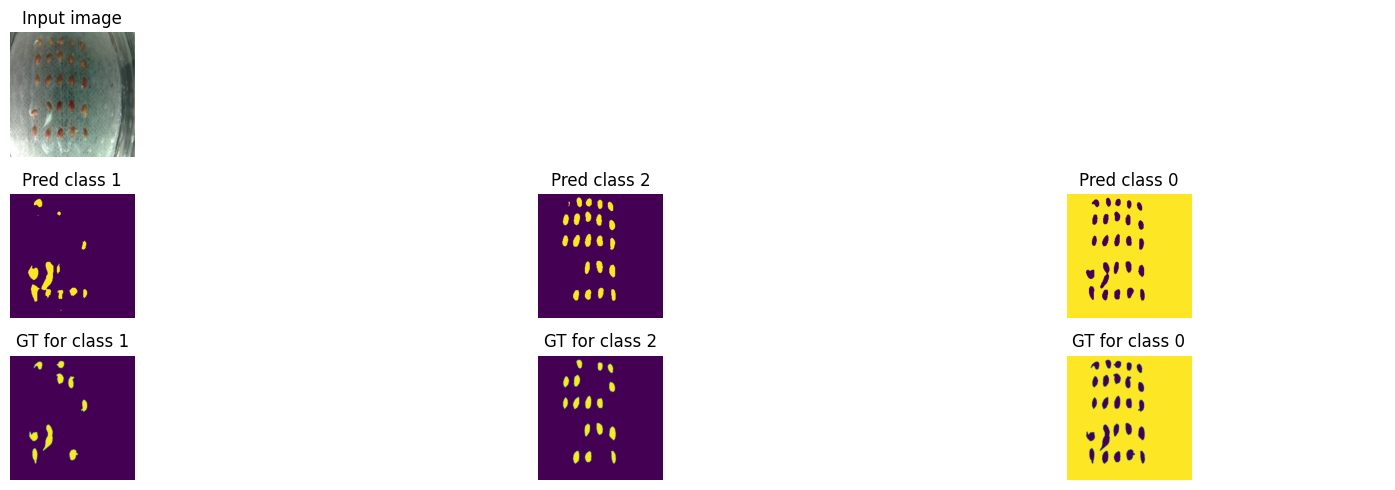

Train loss: 0.00537 | Time: 8m 31s | Val loss: 0.00446
Train_DICE_avg: 0.71185 | Train_Jaccard_avg: 0.64987 | Train_Sensitivity_avg: 0.91824 | Train_Specificity_avg: 0.91218 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98142 | Train_Sensitivity: 0.99454 | Train_Specificity: 0.76002 
Class 1 - Train_DICE: 0.40362 | Train_Jaccard: 0.35352 | Train_Sensitivity: 0.86110 | Train_Specificity: 0.98859 
Class 2 - Train_DICE: 0.74134 | Train_Jaccard: 0.61467 | Train_Sensitivity: 0.89909 | Train_Specificity: 0.98794 
Val_DICE_avg: 0.77607 | Val_Jaccard_avg: 0.70810 | Val_Sensitivity_avg: 0.91892 | Val_Specificity_avg: 0.84368 
Class 0 - Val_DICE: 0.98967 | Val_Jaccard: 0.97963 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.55160 
Class 1 - Val_DICE: 0.60025 | Val_Jaccard: 0.54207 | Val_Sensitivity: 0.81267 | Val_Specificity: 0.99392 
Class 2 - Val_DICE: 0.73828 | Val_Jaccard: 0.60261 | Val_Sensitivity: 0.94472 | Val_Specificity: 0.98550 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00435 | Time: 9m 18s | Val loss: 0.00333
Train_DICE_avg: 0.71950 | Train_Jaccard_avg: 0.65559 | Train_Sensitivity_avg: 0.91779 | Train_Specificity_avg: 0.91328 
Class 0 - Train_DICE: 0.99112 | Train_Jaccard: 0.98244 | Train_Sensitivity: 0.99497 | Train_Specificity: 0.76340 
Class 1 - Train_DICE: 0.41189 | Train_Jaccard: 0.35587 | Train_Sensitivity: 0.85079 | Train_Specificity: 0.98839 
Class 2 - Train_DICE: 0.75550 | Train_Jaccard: 0.62846 | Train_Sensitivity: 0.90761 | Train_Specificity: 0.98804 
Val_DICE_avg: 0.77849 | Val_Jaccard_avg: 0.70951 | Val_Sensitivity_avg: 0.95102 | Val_Specificity_avg: 0.86298 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98433 | Val_Sensitivity: 0.99902 | Val_Specificity: 0.61261 
Class 1 - Val_DICE: 0.64206 | Val_Jaccard: 0.58460 | Val_Sensitivity: 0.90413 | Val_Specificity: 0.99260 
Class 2 - Val_DICE: 0.70133 | Val_Jaccard: 0.55960 | Val_Sensitivity: 0.94992 | Val_Specificity: 0.98374 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.00374 | Time: 10m 5s | Val loss: 0.00294
Train_DICE_avg: 0.73300 | Train_Jaccard_avg: 0.66837 | Train_Sensitivity_avg: 0.91910 | Train_Specificity_avg: 0.91615 
Class 0 - Train_DICE: 0.99155 | Train_Jaccard: 0.98327 | Train_Sensitivity: 0.99518 | Train_Specificity: 0.77095 
Class 1 - Train_DICE: 0.44097 | Train_Jaccard: 0.38059 | Train_Sensitivity: 0.85245 | Train_Specificity: 0.98909 
Class 2 - Train_DICE: 0.76650 | Train_Jaccard: 0.64123 | Train_Sensitivity: 0.90967 | Train_Specificity: 0.98840 
Val_DICE_avg: 0.77419 | Val_Jaccard_avg: 0.70826 | Val_Sensitivity_avg: 0.95108 | Val_Specificity_avg: 0.87130 
Class 0 - Val_DICE: 0.99253 | Val_Jaccard: 0.98520 | Val_Sensitivity: 0.99887 | Val_Specificity: 0.63657 
Class 1 - Val_DICE: 0.62170 | Val_Jaccard: 0.56813 | Val_Sensitivity: 0.90996 | Val_Specificity: 0.99252 
Class 2 - Val_DICE: 0.70835 | Val_Jaccard: 0.57145 | Val_Sensitivity: 0.94439 | Val_Specificity: 0.98480 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.00336 | Time: 10m 52s | Val loss: 0.00264
Train_DICE_avg: 0.74303 | Train_Jaccard_avg: 0.67890 | Train_Sensitivity_avg: 0.91987 | Train_Specificity_avg: 0.92003 
Class 0 - Train_DICE: 0.99174 | Train_Jaccard: 0.98365 | Train_Sensitivity: 0.99521 | Train_Specificity: 0.78176 
Class 1 - Train_DICE: 0.46036 | Train_Jaccard: 0.39885 | Train_Sensitivity: 0.85456 | Train_Specificity: 0.98938 
Class 2 - Train_DICE: 0.77700 | Train_Jaccard: 0.65421 | Train_Sensitivity: 0.90984 | Train_Specificity: 0.98896 
Val_DICE_avg: 0.80026 | Val_Jaccard_avg: 0.73532 | Val_Sensitivity_avg: 0.96051 | Val_Specificity_avg: 0.85408 
Class 0 - Val_DICE: 0.99088 | Val_Jaccard: 0.98196 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.58226 
Class 1 - Val_DICE: 0.65884 | Val_Jaccard: 0.60239 | Val_Sensitivity: 0.93214 | Val_Specificity: 0.99299 
Class 2 - Val_DICE: 0.75106 | Val_Jaccard: 0.62160 | Val_Sensitivity: 0.95017 | Val_Specificity: 0.98699 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.00311 | Time: 11m 39s | Val loss: 0.00241
Train_DICE_avg: 0.74806 | Train_Jaccard_avg: 0.68341 | Train_Sensitivity_avg: 0.92161 | Train_Specificity_avg: 0.91999 
Class 0 - Train_DICE: 0.99185 | Train_Jaccard: 0.98386 | Train_Sensitivity: 0.99530 | Train_Specificity: 0.78182 
Class 1 - Train_DICE: 0.46989 | Train_Jaccard: 0.40664 | Train_Sensitivity: 0.85531 | Train_Specificity: 0.98922 
Class 2 - Train_DICE: 0.78245 | Train_Jaccard: 0.65972 | Train_Sensitivity: 0.91421 | Train_Specificity: 0.98891 
Val_DICE_avg: 0.79994 | Val_Jaccard_avg: 0.73441 | Val_Sensitivity_avg: 0.95783 | Val_Specificity_avg: 0.85905 
Class 0 - Val_DICE: 0.99170 | Val_Jaccard: 0.98356 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.59726 
Class 1 - Val_DICE: 0.65247 | Val_Jaccard: 0.59443 | Val_Sensitivity: 0.92606 | Val_Specificity: 0.99298 
Class 2 - Val_DICE: 0.75564 | Val_Jaccard: 0.62523 | Val_Sensitivity: 0.94825 | Val_Specificity: 0.98691 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


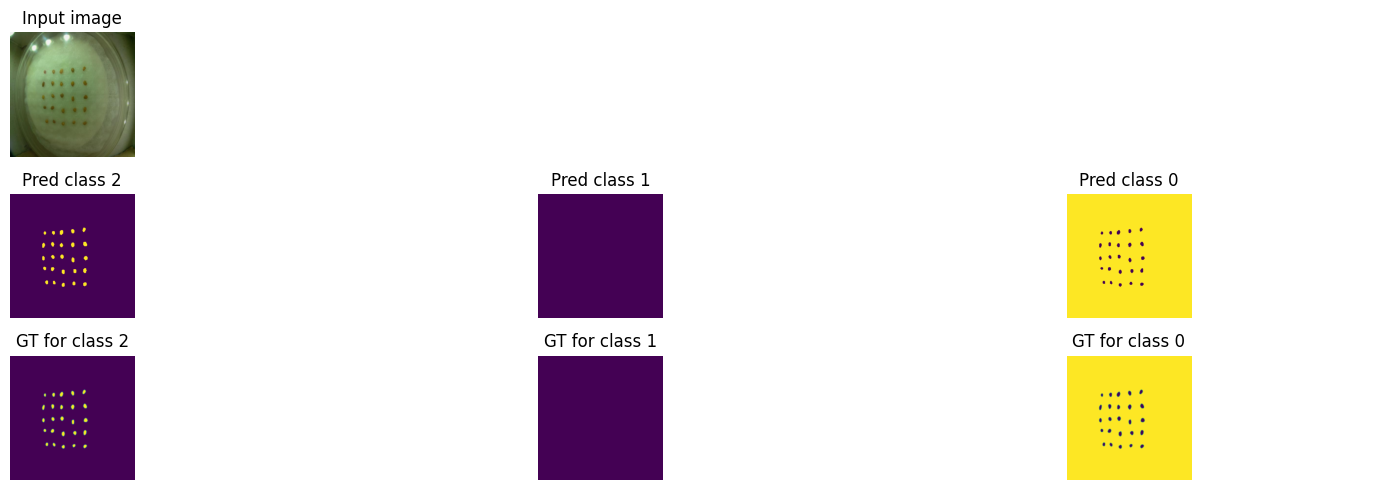

Train loss: 0.00291 | Time: 12m 27s | Val loss: 0.00226
Train_DICE_avg: 0.74881 | Train_Jaccard_avg: 0.68413 | Train_Sensitivity_avg: 0.92210 | Train_Specificity_avg: 0.91972 
Class 0 - Train_DICE: 0.99208 | Train_Jaccard: 0.98431 | Train_Sensitivity: 0.99558 | Train_Specificity: 0.78084 
Class 1 - Train_DICE: 0.46951 | Train_Jaccard: 0.40573 | Train_Sensitivity: 0.85452 | Train_Specificity: 0.98939 
Class 2 - Train_DICE: 0.78484 | Train_Jaccard: 0.66233 | Train_Sensitivity: 0.91619 | Train_Specificity: 0.98894 
Val_DICE_avg: 0.79726 | Val_Jaccard_avg: 0.73084 | Val_Sensitivity_avg: 0.96094 | Val_Specificity_avg: 0.86592 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98439 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.61852 
Class 1 - Val_DICE: 0.66359 | Val_Jaccard: 0.60468 | Val_Sensitivity: 0.92590 | Val_Specificity: 0.99319 
Class 2 - Val_DICE: 0.73606 | Val_Jaccard: 0.60346 | Val_Sensitivity: 0.95774 | Val_Specificity: 0.98606 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00279 | Time: 13m 14s | Val loss: 0.00224
Train_DICE_avg: 0.75297 | Train_Jaccard_avg: 0.68782 | Train_Sensitivity_avg: 0.92265 | Train_Specificity_avg: 0.92044 
Class 0 - Train_DICE: 0.99206 | Train_Jaccard: 0.98428 | Train_Sensitivity: 0.99561 | Train_Specificity: 0.78278 
Class 1 - Train_DICE: 0.47908 | Train_Jaccard: 0.41340 | Train_Sensitivity: 0.85544 | Train_Specificity: 0.98954 
Class 2 - Train_DICE: 0.78776 | Train_Jaccard: 0.66577 | Train_Sensitivity: 0.91690 | Train_Specificity: 0.98900 
Val_DICE_avg: 0.79769 | Val_Jaccard_avg: 0.73297 | Val_Sensitivity_avg: 0.95963 | Val_Specificity_avg: 0.85923 
Class 0 - Val_DICE: 0.99154 | Val_Jaccard: 0.98327 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.59821 
Class 1 - Val_DICE: 0.64830 | Val_Jaccard: 0.59489 | Val_Sensitivity: 0.93451 | Val_Specificity: 0.99281 
Class 2 - Val_DICE: 0.75322 | Val_Jaccard: 0.62076 | Val_Sensitivity: 0.94511 | Val_Specificity: 0.98668 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00269 | Time: 14m 1s | Val loss: 0.00203
Train_DICE_avg: 0.75960 | Train_Jaccard_avg: 0.69484 | Train_Sensitivity_avg: 0.92750 | Train_Specificity_avg: 0.92117 
Class 0 - Train_DICE: 0.99215 | Train_Jaccard: 0.98444 | Train_Sensitivity: 0.99568 | Train_Specificity: 0.78430 
Class 1 - Train_DICE: 0.49348 | Train_Jaccard: 0.42674 | Train_Sensitivity: 0.86765 | Train_Specificity: 0.98988 
Class 2 - Train_DICE: 0.79316 | Train_Jaccard: 0.67335 | Train_Sensitivity: 0.91917 | Train_Specificity: 0.98932 
Val_DICE_avg: 0.80166 | Val_Jaccard_avg: 0.73501 | Val_Sensitivity_avg: 0.95770 | Val_Specificity_avg: 0.86412 
Class 0 - Val_DICE: 0.99218 | Val_Jaccard: 0.98451 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.61322 
Class 1 - Val_DICE: 0.64752 | Val_Jaccard: 0.59056 | Val_Sensitivity: 0.91983 | Val_Specificity: 0.99322 
Class 2 - Val_DICE: 0.76528 | Val_Jaccard: 0.62996 | Val_Sensitivity: 0.95404 | Val_Specificity: 0.98592 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00259 | Time: 14m 48s | Val loss: 0.00199
Train_DICE_avg: 0.76103 | Train_Jaccard_avg: 0.69592 | Train_Sensitivity_avg: 0.92809 | Train_Specificity_avg: 0.92167 
Class 0 - Train_DICE: 0.99231 | Train_Jaccard: 0.98477 | Train_Sensitivity: 0.99593 | Train_Specificity: 0.78586 
Class 1 - Train_DICE: 0.49521 | Train_Jaccard: 0.42727 | Train_Sensitivity: 0.86863 | Train_Specificity: 0.98980 
Class 2 - Train_DICE: 0.79556 | Train_Jaccard: 0.67572 | Train_Sensitivity: 0.91972 | Train_Specificity: 0.98934 
Val_DICE_avg: 0.81779 | Val_Jaccard_avg: 0.75165 | Val_Sensitivity_avg: 0.96629 | Val_Specificity_avg: 0.86169 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.60454 
Class 1 - Val_DICE: 0.68620 | Val_Jaccard: 0.62582 | Val_Sensitivity: 0.94286 | Val_Specificity: 0.99362 
Class 2 - Val_DICE: 0.77528 | Val_Jaccard: 0.64521 | Val_Sensitivity: 0.95669 | Val_Specificity: 0.98690 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.00254 | Time: 15m 35s | Val loss: 0.00198
Train_DICE_avg: 0.76243 | Train_Jaccard_avg: 0.69780 | Train_Sensitivity_avg: 0.92316 | Train_Specificity_avg: 0.92189 
Class 0 - Train_DICE: 0.99230 | Train_Jaccard: 0.98475 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.78628 
Class 1 - Train_DICE: 0.49762 | Train_Jaccard: 0.43077 | Train_Sensitivity: 0.85335 | Train_Specificity: 0.98997 
Class 2 - Train_DICE: 0.79738 | Train_Jaccard: 0.67787 | Train_Sensitivity: 0.92024 | Train_Specificity: 0.98941 
Val_DICE_avg: 0.81825 | Val_Jaccard_avg: 0.75064 | Val_Sensitivity_avg: 0.96162 | Val_Specificity_avg: 0.86049 
Class 0 - Val_DICE: 0.99177 | Val_Jaccard: 0.98372 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.60128 
Class 1 - Val_DICE: 0.69430 | Val_Jaccard: 0.63144 | Val_Sensitivity: 0.92779 | Val_Specificity: 0.99370 
Class 2 - Val_DICE: 0.76870 | Val_Jaccard: 0.63675 | Val_Sensitivity: 0.95778 | Val_Specificity: 0.98648 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


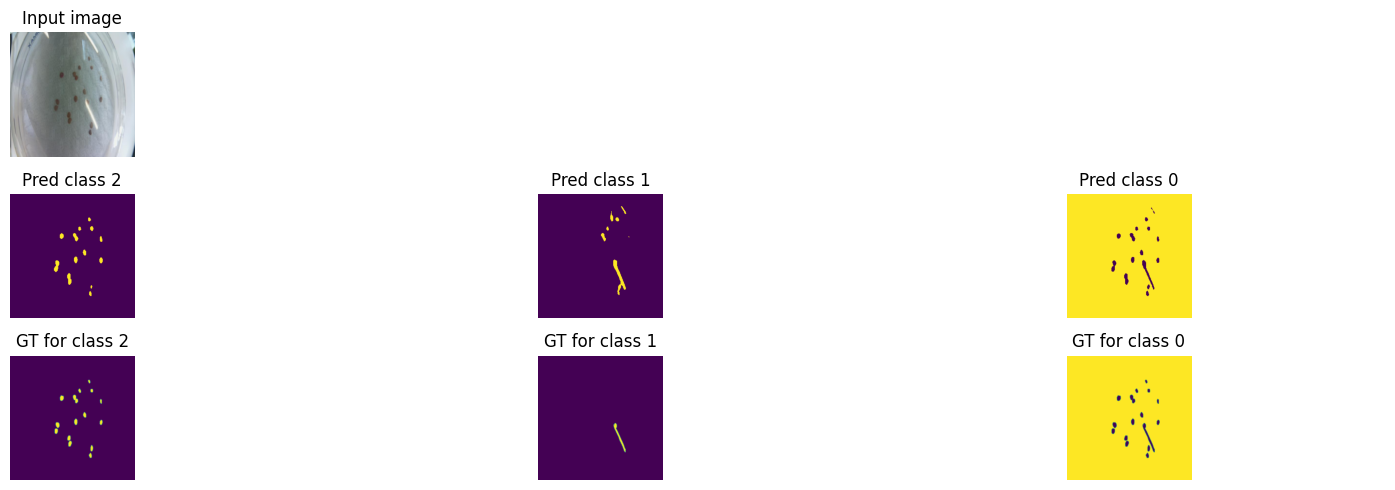

Train loss: 0.00248 | Time: 16m 23s | Val loss: 0.00193
Train_DICE_avg: 0.76504 | Train_Jaccard_avg: 0.69985 | Train_Sensitivity_avg: 0.92626 | Train_Specificity_avg: 0.92205 
Class 0 - Train_DICE: 0.99244 | Train_Jaccard: 0.98503 | Train_Sensitivity: 0.99604 | Train_Specificity: 0.78680 
Class 1 - Train_DICE: 0.50584 | Train_Jaccard: 0.43707 | Train_Sensitivity: 0.86156 | Train_Specificity: 0.99000 
Class 2 - Train_DICE: 0.79683 | Train_Jaccard: 0.67746 | Train_Sensitivity: 0.92117 | Train_Specificity: 0.98934 
Val_DICE_avg: 0.81727 | Val_Jaccard_avg: 0.74923 | Val_Sensitivity_avg: 0.95255 | Val_Specificity_avg: 0.85465 
Class 0 - Val_DICE: 0.99114 | Val_Jaccard: 0.98247 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.58337 
Class 1 - Val_DICE: 0.68457 | Val_Jaccard: 0.61979 | Val_Sensitivity: 0.90507 | Val_Specificity: 0.99387 
Class 2 - Val_DICE: 0.77609 | Val_Jaccard: 0.64543 | Val_Sensitivity: 0.95320 | Val_Specificity: 0.98671 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00236 | Time: 17m 10s | Val loss: 0.00186
Train_DICE_avg: 0.76555 | Train_Jaccard_avg: 0.70052 | Train_Sensitivity_avg: 0.92803 | Train_Specificity_avg: 0.92152 
Class 0 - Train_DICE: 0.99251 | Train_Jaccard: 0.98516 | Train_Sensitivity: 0.99625 | Train_Specificity: 0.78539 
Class 1 - Train_DICE: 0.50408 | Train_Jaccard: 0.43499 | Train_Sensitivity: 0.86432 | Train_Specificity: 0.98980 
Class 2 - Train_DICE: 0.80005 | Train_Jaccard: 0.68142 | Train_Sensitivity: 0.92351 | Train_Specificity: 0.98937 
Val_DICE_avg: 0.82411 | Val_Jaccard_avg: 0.75922 | Val_Sensitivity_avg: 0.94546 | Val_Specificity_avg: 0.85375 
Class 0 - Val_DICE: 0.99083 | Val_Jaccard: 0.98188 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.57842 
Class 1 - Val_DICE: 0.67469 | Val_Jaccard: 0.60967 | Val_Sensitivity: 0.88048 | Val_Specificity: 0.99445 
Class 2 - Val_DICE: 0.80680 | Val_Jaccard: 0.68612 | Val_Sensitivity: 0.95647 | Val_Specificity: 0.98838 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00229 | Time: 17m 57s | Val loss: 0.00177
Train_DICE_avg: 0.76600 | Train_Jaccard_avg: 0.70045 | Train_Sensitivity_avg: 0.92741 | Train_Specificity_avg: 0.92044 
Class 0 - Train_DICE: 0.99261 | Train_Jaccard: 0.98536 | Train_Sensitivity: 0.99640 | Train_Specificity: 0.78215 
Class 1 - Train_DICE: 0.50360 | Train_Jaccard: 0.43235 | Train_Sensitivity: 0.86030 | Train_Specificity: 0.98976 
Class 2 - Train_DICE: 0.80180 | Train_Jaccard: 0.68363 | Train_Sensitivity: 0.92552 | Train_Specificity: 0.98941 
Val_DICE_avg: 0.81996 | Val_Jaccard_avg: 0.75242 | Val_Sensitivity_avg: 0.95467 | Val_Specificity_avg: 0.85897 
Class 0 - Val_DICE: 0.99154 | Val_Jaccard: 0.98325 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.59548 
Class 1 - Val_DICE: 0.68020 | Val_Jaccard: 0.61334 | Val_Sensitivity: 0.90322 | Val_Specificity: 0.99414 
Class 2 - Val_DICE: 0.78813 | Val_Jaccard: 0.66068 | Val_Sensitivity: 0.96141 | Val_Specificity: 0.98729 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00226 | Time: 18m 44s | Val loss: 0.00173
Train_DICE_avg: 0.77512 | Train_Jaccard_avg: 0.71048 | Train_Sensitivity_avg: 0.92834 | Train_Specificity_avg: 0.92353 
Class 0 - Train_DICE: 0.99262 | Train_Jaccard: 0.98539 | Train_Sensitivity: 0.99621 | Train_Specificity: 0.79028 
Class 1 - Train_DICE: 0.52533 | Train_Jaccard: 0.45461 | Train_Sensitivity: 0.86506 | Train_Specificity: 0.99037 
Class 2 - Train_DICE: 0.80740 | Train_Jaccard: 0.69146 | Train_Sensitivity: 0.92375 | Train_Specificity: 0.98993 
Val_DICE_avg: 0.82098 | Val_Jaccard_avg: 0.75314 | Val_Sensitivity_avg: 0.95667 | Val_Specificity_avg: 0.86123 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98394 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.60293 
Class 1 - Val_DICE: 0.69560 | Val_Jaccard: 0.63165 | Val_Sensitivity: 0.90863 | Val_Specificity: 0.99427 
Class 2 - Val_DICE: 0.77546 | Val_Jaccard: 0.64385 | Val_Sensitivity: 0.96199 | Val_Specificity: 0.98648 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.00222 | Time: 19m 32s | Val loss: 0.00173
Train_DICE_avg: 0.77467 | Train_Jaccard_avg: 0.70947 | Train_Sensitivity_avg: 0.92954 | Train_Specificity_avg: 0.92065 
Class 0 - Train_DICE: 0.99261 | Train_Jaccard: 0.98536 | Train_Sensitivity: 0.99638 | Train_Specificity: 0.78203 
Class 1 - Train_DICE: 0.52630 | Train_Jaccard: 0.45476 | Train_Sensitivity: 0.86575 | Train_Specificity: 0.99025 
Class 2 - Train_DICE: 0.80509 | Train_Jaccard: 0.68829 | Train_Sensitivity: 0.92650 | Train_Specificity: 0.98967 
Val_DICE_avg: 0.82663 | Val_Jaccard_avg: 0.76109 | Val_Sensitivity_avg: 0.96114 | Val_Specificity_avg: 0.85903 
Class 0 - Val_DICE: 0.99139 | Val_Jaccard: 0.98297 | Val_Sensitivity: 0.99943 | Val_Specificity: 0.59538 
Class 1 - Val_DICE: 0.70694 | Val_Jaccard: 0.64516 | Val_Sensitivity: 0.92410 | Val_Specificity: 0.99412 
Class 2 - Val_DICE: 0.78156 | Val_Jaccard: 0.65515 | Val_Sensitivity: 0.95988 | Val_Specificity: 0.98759 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


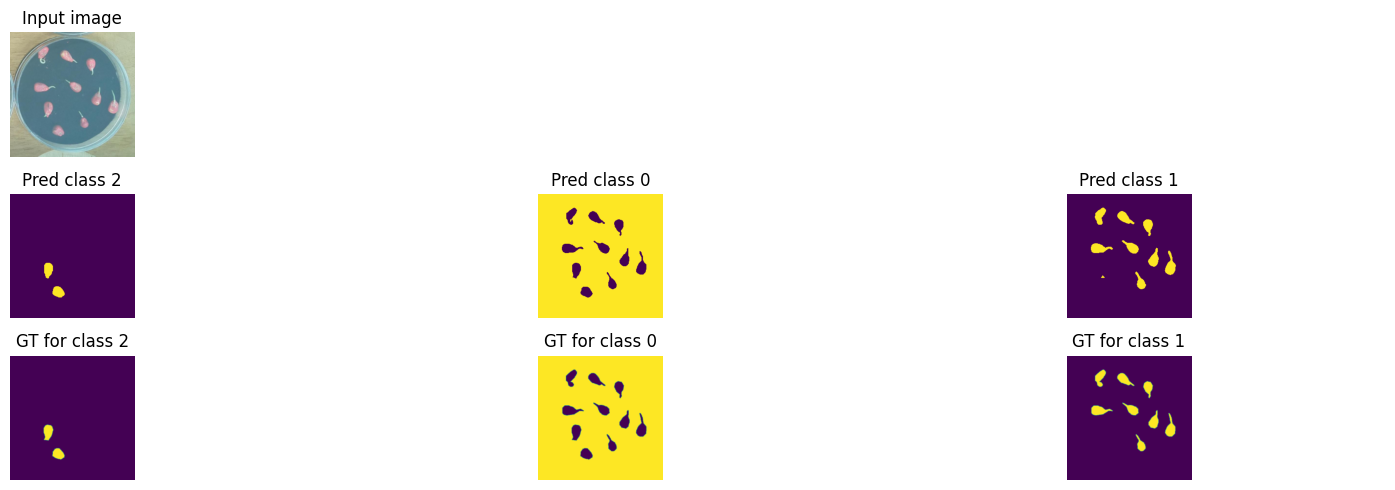

Train loss: 0.00218 | Time: 20m 20s | Val loss: 0.00170
Train_DICE_avg: 0.77781 | Train_Jaccard_avg: 0.71257 | Train_Sensitivity_avg: 0.92995 | Train_Specificity_avg: 0.92306 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98549 | Train_Sensitivity: 0.99636 | Train_Specificity: 0.78889 
Class 1 - Train_DICE: 0.53211 | Train_Jaccard: 0.45977 | Train_Sensitivity: 0.86679 | Train_Specificity: 0.99047 
Class 2 - Train_DICE: 0.80863 | Train_Jaccard: 0.69245 | Train_Sensitivity: 0.92668 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.82716 | Val_Jaccard_avg: 0.76151 | Val_Sensitivity_avg: 0.96708 | Val_Specificity_avg: 0.85954 
Class 0 - Val_DICE: 0.99153 | Val_Jaccard: 0.98324 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.59693 
Class 1 - Val_DICE: 0.70656 | Val_Jaccard: 0.64521 | Val_Sensitivity: 0.94063 | Val_Specificity: 0.99434 
Class 2 - Val_DICE: 0.78340 | Val_Jaccard: 0.65607 | Val_Sensitivity: 0.96118 | Val_Specificity: 0.98737 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00217 | Time: 21m 7s | Val loss: 0.00174
Train_DICE_avg: 0.77765 | Train_Jaccard_avg: 0.71279 | Train_Sensitivity_avg: 0.92908 | Train_Specificity_avg: 0.92239 
Class 0 - Train_DICE: 0.99270 | Train_Jaccard: 0.98554 | Train_Sensitivity: 0.99645 | Train_Specificity: 0.78674 
Class 1 - Train_DICE: 0.52969 | Train_Jaccard: 0.45772 | Train_Sensitivity: 0.86207 | Train_Specificity: 0.99057 
Class 2 - Train_DICE: 0.81056 | Train_Jaccard: 0.69510 | Train_Sensitivity: 0.92872 | Train_Specificity: 0.98986 
Val_DICE_avg: 0.82666 | Val_Jaccard_avg: 0.76021 | Val_Sensitivity_avg: 0.96108 | Val_Specificity_avg: 0.85917 
Class 0 - Val_DICE: 0.99142 | Val_Jaccard: 0.98302 | Val_Sensitivity: 0.99941 | Val_Specificity: 0.59580 
Class 1 - Val_DICE: 0.70486 | Val_Jaccard: 0.64021 | Val_Sensitivity: 0.92571 | Val_Specificity: 0.99397 
Class 2 - Val_DICE: 0.78370 | Val_Jaccard: 0.65738 | Val_Sensitivity: 0.95811 | Val_Specificity: 0.98775 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.00212 | Time: 21m 54s | Val loss: 0.00168
Train_DICE_avg: 0.77783 | Train_Jaccard_avg: 0.71253 | Train_Sensitivity_avg: 0.92991 | Train_Specificity_avg: 0.92310 
Class 0 - Train_DICE: 0.99287 | Train_Jaccard: 0.98587 | Train_Sensitivity: 0.99657 | Train_Specificity: 0.78906 
Class 1 - Train_DICE: 0.53310 | Train_Jaccard: 0.45983 | Train_Sensitivity: 0.86376 | Train_Specificity: 0.99044 
Class 2 - Train_DICE: 0.80751 | Train_Jaccard: 0.69191 | Train_Sensitivity: 0.92939 | Train_Specificity: 0.98980 
Val_DICE_avg: 0.82327 | Val_Jaccard_avg: 0.75487 | Val_Sensitivity_avg: 0.96622 | Val_Specificity_avg: 0.86187 
Class 0 - Val_DICE: 0.99181 | Val_Jaccard: 0.98379 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60488 
Class 1 - Val_DICE: 0.71433 | Val_Jaccard: 0.64772 | Val_Sensitivity: 0.93142 | Val_Specificity: 0.99416 
Class 2 - Val_DICE: 0.76366 | Val_Jaccard: 0.63309 | Val_Sensitivity: 0.96789 | Val_Specificity: 0.98658 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00207 | Time: 22m 41s | Val loss: 0.00167
Train_DICE_avg: 0.77956 | Train_Jaccard_avg: 0.71469 | Train_Sensitivity_avg: 0.93365 | Train_Specificity_avg: 0.92224 
Class 0 - Train_DICE: 0.99291 | Train_Jaccard: 0.98595 | Train_Sensitivity: 0.99676 | Train_Specificity: 0.78685 
Class 1 - Train_DICE: 0.53564 | Train_Jaccard: 0.46358 | Train_Sensitivity: 0.87314 | Train_Specificity: 0.99017 
Class 2 - Train_DICE: 0.81012 | Train_Jaccard: 0.69455 | Train_Sensitivity: 0.93105 | Train_Specificity: 0.98969 
Val_DICE_avg: 0.81350 | Val_Jaccard_avg: 0.74503 | Val_Sensitivity_avg: 0.95261 | Val_Specificity_avg: 0.86751 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98466 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62184 
Class 1 - Val_DICE: 0.68292 | Val_Jaccard: 0.61516 | Val_Sensitivity: 0.89095 | Val_Specificity: 0.99411 
Class 2 - Val_DICE: 0.76533 | Val_Jaccard: 0.63525 | Val_Sensitivity: 0.96759 | Val_Specificity: 0.98657 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00208 | Time: 23m 28s | Val loss: 0.00165
Train_DICE_avg: 0.78654 | Train_Jaccard_avg: 0.72214 | Train_Sensitivity_avg: 0.93123 | Train_Specificity_avg: 0.92605 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98612 | Train_Sensitivity: 0.99653 | Train_Specificity: 0.79694 
Class 1 - Train_DICE: 0.55234 | Train_Jaccard: 0.47933 | Train_Sensitivity: 0.86822 | Train_Specificity: 0.99094 
Class 2 - Train_DICE: 0.81428 | Train_Jaccard: 0.70097 | Train_Sensitivity: 0.92895 | Train_Specificity: 0.99028 
Val_DICE_avg: 0.82093 | Val_Jaccard_avg: 0.75433 | Val_Sensitivity_avg: 0.95947 | Val_Specificity_avg: 0.86310 
Class 0 - Val_DICE: 0.99186 | Val_Jaccard: 0.98389 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60785 
Class 1 - Val_DICE: 0.69475 | Val_Jaccard: 0.62950 | Val_Sensitivity: 0.91419 | Val_Specificity: 0.99402 
Class 2 - Val_DICE: 0.77619 | Val_Jaccard: 0.64960 | Val_Sensitivity: 0.96486 | Val_Specificity: 0.98744 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


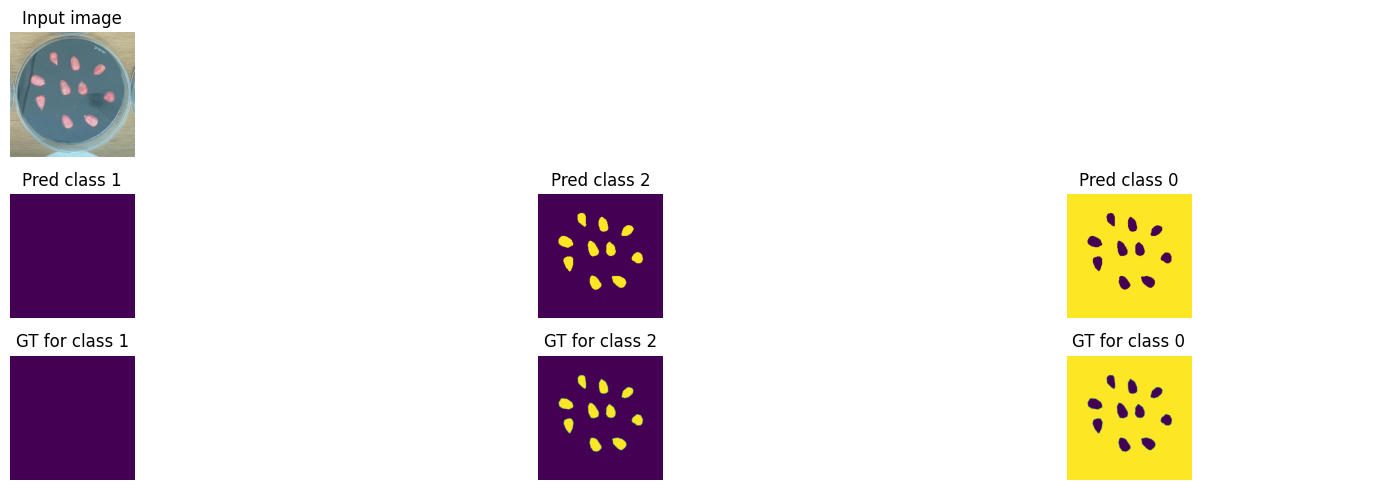

Train loss: 0.00206 | Time: 24m 16s | Val loss: 0.00162
Train_DICE_avg: 0.78052 | Train_Jaccard_avg: 0.71535 | Train_Sensitivity_avg: 0.93129 | Train_Specificity_avg: 0.92304 
Class 0 - Train_DICE: 0.99287 | Train_Jaccard: 0.98588 | Train_Sensitivity: 0.99667 | Train_Specificity: 0.78866 
Class 1 - Train_DICE: 0.53529 | Train_Jaccard: 0.46139 | Train_Sensitivity: 0.86635 | Train_Specificity: 0.99049 
Class 2 - Train_DICE: 0.81339 | Train_Jaccard: 0.69879 | Train_Sensitivity: 0.93086 | Train_Specificity: 0.98997 
Val_DICE_avg: 0.82790 | Val_Jaccard_avg: 0.76081 | Val_Sensitivity_avg: 0.96495 | Val_Specificity_avg: 0.86336 
Class 0 - Val_DICE: 0.99173 | Val_Jaccard: 0.98365 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.60860 
Class 1 - Val_DICE: 0.71525 | Val_Jaccard: 0.65158 | Val_Sensitivity: 0.93199 | Val_Specificity: 0.99444 
Class 2 - Val_DICE: 0.77672 | Val_Jaccard: 0.64721 | Val_Sensitivity: 0.96341 | Val_Specificity: 0.98703 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.00203 | Time: 25m 3s | Val loss: 0.00164
Train_DICE_avg: 0.78712 | Train_Jaccard_avg: 0.72262 | Train_Sensitivity_avg: 0.93448 | Train_Specificity_avg: 0.92410 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98610 | Train_Sensitivity: 0.99664 | Train_Specificity: 0.79132 
Class 1 - Train_DICE: 0.55268 | Train_Jaccard: 0.47957 | Train_Sensitivity: 0.87509 | Train_Specificity: 0.99084 
Class 2 - Train_DICE: 0.81570 | Train_Jaccard: 0.70219 | Train_Sensitivity: 0.93170 | Train_Specificity: 0.99013 
Val_DICE_avg: 0.81885 | Val_Jaccard_avg: 0.75071 | Val_Sensitivity_avg: 0.95896 | Val_Specificity_avg: 0.86585 
Class 0 - Val_DICE: 0.99215 | Val_Jaccard: 0.98446 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61678 
Class 1 - Val_DICE: 0.69284 | Val_Jaccard: 0.62702 | Val_Sensitivity: 0.91559 | Val_Specificity: 0.99414 
Class 2 - Val_DICE: 0.77157 | Val_Jaccard: 0.64065 | Val_Sensitivity: 0.96189 | Val_Specificity: 0.98661 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.00198 | Time: 25m 51s | Val loss: 0.00157
Train_DICE_avg: 0.78659 | Train_Jaccard_avg: 0.72177 | Train_Sensitivity_avg: 0.93391 | Train_Specificity_avg: 0.92393 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98624 | Train_Sensitivity: 0.99681 | Train_Specificity: 0.79102 
Class 1 - Train_DICE: 0.55085 | Train_Jaccard: 0.47655 | Train_Sensitivity: 0.87237 | Train_Specificity: 0.99070 
Class 2 - Train_DICE: 0.81586 | Train_Jaccard: 0.70252 | Train_Sensitivity: 0.93255 | Train_Specificity: 0.99006 
Val_DICE_avg: 0.82212 | Val_Jaccard_avg: 0.75279 | Val_Sensitivity_avg: 0.95808 | Val_Specificity_avg: 0.86707 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98467 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.62040 
Class 1 - Val_DICE: 0.71309 | Val_Jaccard: 0.64500 | Val_Sensitivity: 0.90416 | Val_Specificity: 0.99463 
Class 2 - Val_DICE: 0.76101 | Val_Jaccard: 0.62871 | Val_Sensitivity: 0.97067 | Val_Specificity: 0.98617 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.00197 | Time: 26m 38s | Val loss: 0.00159
Train_DICE_avg: 0.79038 | Train_Jaccard_avg: 0.72607 | Train_Sensitivity_avg: 0.93521 | Train_Specificity_avg: 0.92415 
Class 0 - Train_DICE: 0.99303 | Train_Jaccard: 0.98619 | Train_Sensitivity: 0.99680 | Train_Specificity: 0.79135 
Class 1 - Train_DICE: 0.56077 | Train_Jaccard: 0.48689 | Train_Sensitivity: 0.87395 | Train_Specificity: 0.99087 
Class 2 - Train_DICE: 0.81733 | Train_Jaccard: 0.70513 | Train_Sensitivity: 0.93487 | Train_Specificity: 0.99023 
Val_DICE_avg: 0.82539 | Val_Jaccard_avg: 0.75824 | Val_Sensitivity_avg: 0.96584 | Val_Specificity_avg: 0.86915 
Class 0 - Val_DICE: 0.99241 | Val_Jaccard: 0.98496 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62644 
Class 1 - Val_DICE: 0.71222 | Val_Jaccard: 0.64788 | Val_Sensitivity: 0.93712 | Val_Specificity: 0.99404 
Class 2 - Val_DICE: 0.77155 | Val_Jaccard: 0.64187 | Val_Sensitivity: 0.96105 | Val_Specificity: 0.98697 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.00193 | Time: 27m 26s | Val loss: 0.00157
Train_DICE_avg: 0.79099 | Train_Jaccard_avg: 0.72643 | Train_Sensitivity_avg: 0.93749 | Train_Specificity_avg: 0.92407 
Class 0 - Train_DICE: 0.99305 | Train_Jaccard: 0.98621 | Train_Sensitivity: 0.99691 | Train_Specificity: 0.79154 
Class 1 - Train_DICE: 0.56308 | Train_Jaccard: 0.48936 | Train_Sensitivity: 0.88110 | Train_Specificity: 0.99072 
Class 2 - Train_DICE: 0.81686 | Train_Jaccard: 0.70371 | Train_Sensitivity: 0.93446 | Train_Specificity: 0.98996 
Val_DICE_avg: 0.83022 | Val_Jaccard_avg: 0.76174 | Val_Sensitivity_avg: 0.96018 | Val_Specificity_avg: 0.86494 
Class 0 - Val_DICE: 0.99200 | Val_Jaccard: 0.98416 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.61334 
Class 1 - Val_DICE: 0.72640 | Val_Jaccard: 0.65735 | Val_Sensitivity: 0.91176 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.77225 | Val_Jaccard: 0.64371 | Val_Sensitivity: 0.96937 | Val_Specificity: 0.98691 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


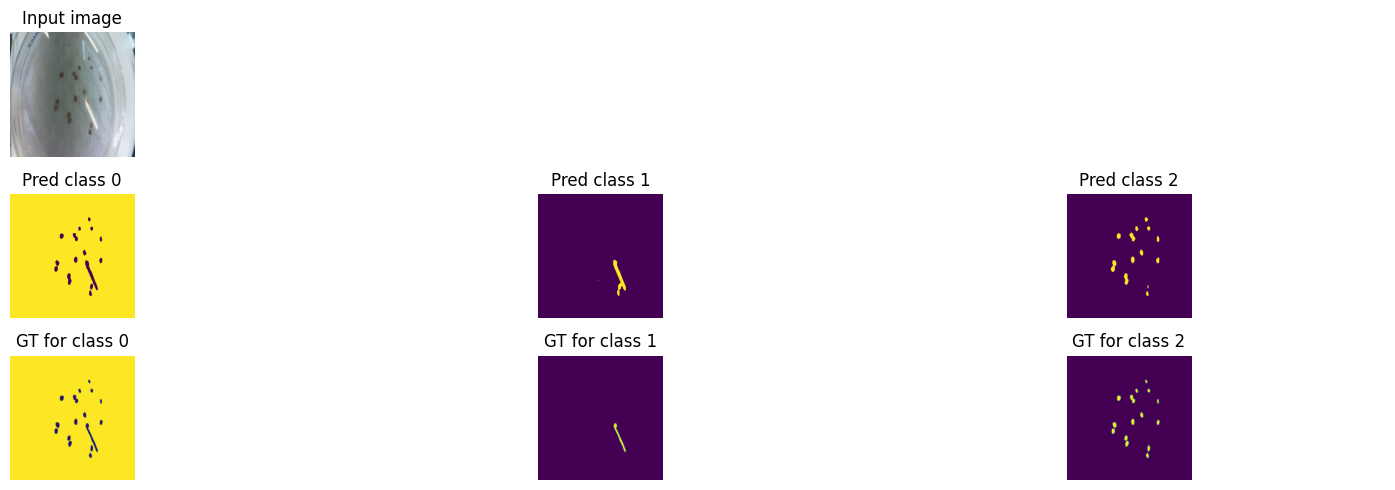

Train loss: 0.00192 | Time: 28m 14s | Val loss: 0.00159
Train_DICE_avg: 0.79134 | Train_Jaccard_avg: 0.72672 | Train_Sensitivity_avg: 0.93768 | Train_Specificity_avg: 0.92452 
Class 0 - Train_DICE: 0.99308 | Train_Jaccard: 0.98628 | Train_Sensitivity: 0.99685 | Train_Specificity: 0.79244 
Class 1 - Train_DICE: 0.56017 | Train_Jaccard: 0.48502 | Train_Sensitivity: 0.87944 | Train_Specificity: 0.99087 
Class 2 - Train_DICE: 0.82076 | Train_Jaccard: 0.70885 | Train_Sensitivity: 0.93676 | Train_Specificity: 0.99025 
Val_DICE_avg: 0.83719 | Val_Jaccard_avg: 0.77006 | Val_Sensitivity_avg: 0.95303 | Val_Specificity_avg: 0.85854 
Class 0 - Val_DICE: 0.99116 | Val_Jaccard: 0.98252 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.59273 
Class 1 - Val_DICE: 0.73247 | Val_Jaccard: 0.66477 | Val_Sensitivity: 0.88760 | Val_Specificity: 0.99536 
Class 2 - Val_DICE: 0.78795 | Val_Jaccard: 0.66289 | Val_Sensitivity: 0.97201 | Val_Specificity: 0.98754 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00188 | Time: 29m 1s | Val loss: 0.00154
Train_DICE_avg: 0.79351 | Train_Jaccard_avg: 0.72912 | Train_Sensitivity_avg: 0.93706 | Train_Specificity_avg: 0.92419 
Class 0 - Train_DICE: 0.99319 | Train_Jaccard: 0.98650 | Train_Sensitivity: 0.99694 | Train_Specificity: 0.79117 
Class 1 - Train_DICE: 0.56754 | Train_Jaccard: 0.49298 | Train_Sensitivity: 0.87774 | Train_Specificity: 0.99119 
Class 2 - Train_DICE: 0.81979 | Train_Jaccard: 0.70790 | Train_Sensitivity: 0.93651 | Train_Specificity: 0.99021 
Val_DICE_avg: 0.83212 | Val_Jaccard_avg: 0.76325 | Val_Sensitivity_avg: 0.95526 | Val_Specificity_avg: 0.86385 
Class 0 - Val_DICE: 0.99185 | Val_Jaccard: 0.98388 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60973 
Class 1 - Val_DICE: 0.73608 | Val_Jaccard: 0.66707 | Val_Sensitivity: 0.89390 | Val_Specificity: 0.99517 
Class 2 - Val_DICE: 0.76843 | Val_Jaccard: 0.63881 | Val_Sensitivity: 0.97242 | Val_Specificity: 0.98664 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00189 | Time: 29m 49s | Val loss: 0.00152
Train_DICE_avg: 0.79234 | Train_Jaccard_avg: 0.72798 | Train_Sensitivity_avg: 0.93784 | Train_Specificity_avg: 0.92338 
Class 0 - Train_DICE: 0.99316 | Train_Jaccard: 0.98643 | Train_Sensitivity: 0.99696 | Train_Specificity: 0.78916 
Class 1 - Train_DICE: 0.56488 | Train_Jaccard: 0.49113 | Train_Sensitivity: 0.87907 | Train_Specificity: 0.99092 
Class 2 - Train_DICE: 0.81899 | Train_Jaccard: 0.70637 | Train_Sensitivity: 0.93748 | Train_Specificity: 0.99007 
Val_DICE_avg: 0.83614 | Val_Jaccard_avg: 0.76637 | Val_Sensitivity_avg: 0.95798 | Val_Specificity_avg: 0.86554 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98409 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.61492 
Class 1 - Val_DICE: 0.74666 | Val_Jaccard: 0.67665 | Val_Sensitivity: 0.90102 | Val_Specificity: 0.99530 
Class 2 - Val_DICE: 0.76980 | Val_Jaccard: 0.63838 | Val_Sensitivity: 0.97343 | Val_Specificity: 0.98639 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Train loss: 0.00186 | Time: 30m 36s | Val loss: 0.00150
Train_DICE_avg: 0.79709 | Train_Jaccard_avg: 0.73337 | Train_Sensitivity_avg: 0.93884 | Train_Specificity_avg: 0.92448 
Class 0 - Train_DICE: 0.99321 | Train_Jaccard: 0.98654 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.79191 
Class 1 - Train_DICE: 0.57553 | Train_Jaccard: 0.50169 | Train_Sensitivity: 0.88155 | Train_Specificity: 0.99111 
Class 2 - Train_DICE: 0.82251 | Train_Jaccard: 0.71188 | Train_Sensitivity: 0.93792 | Train_Specificity: 0.99040 
Val_DICE_avg: 0.82595 | Val_Jaccard_avg: 0.75389 | Val_Sensitivity_avg: 0.95279 | Val_Specificity_avg: 0.86871 
Class 0 - Val_DICE: 0.99236 | Val_Jaccard: 0.98488 | Val_Sensitivity: 0.99942 | Val_Specificity: 0.62571 
Class 1 - Val_DICE: 0.73345 | Val_Jaccard: 0.66106 | Val_Sensitivity: 0.88006 | Val_Specificity: 0.99516 
Class 2 - Val_DICE: 0.75203 | Val_Jaccard: 0.61574 | Val_Sensitivity: 0.97890 | Val_Specificity: 0.98526 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.00183 | Time: 31m 24s | Val loss: 0.00151
Train_DICE_avg: 0.80208 | Train_Jaccard_avg: 0.73817 | Train_Sensitivity_avg: 0.94209 | Train_Specificity_avg: 0.92455 
Class 0 - Train_DICE: 0.99326 | Train_Jaccard: 0.98663 | Train_Sensitivity: 0.99708 | Train_Specificity: 0.79204 
Class 1 - Train_DICE: 0.58967 | Train_Jaccard: 0.51504 | Train_Sensitivity: 0.88969 | Train_Specificity: 0.99127 
Class 2 - Train_DICE: 0.82331 | Train_Jaccard: 0.71285 | Train_Sensitivity: 0.93948 | Train_Specificity: 0.99035 
Val_DICE_avg: 0.84200 | Val_Jaccard_avg: 0.77193 | Val_Sensitivity_avg: 0.95649 | Val_Specificity_avg: 0.86391 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98377 | Val_Sensitivity: 0.99950 | Val_Specificity: 0.60978 
Class 1 - Val_DICE: 0.76408 | Val_Jaccard: 0.69326 | Val_Sensitivity: 0.89122 | Val_Specificity: 0.99575 
Class 2 - Val_DICE: 0.77011 | Val_Jaccard: 0.63876 | Val_Sensitivity: 0.97873 | Val_Specificity: 0.98620 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


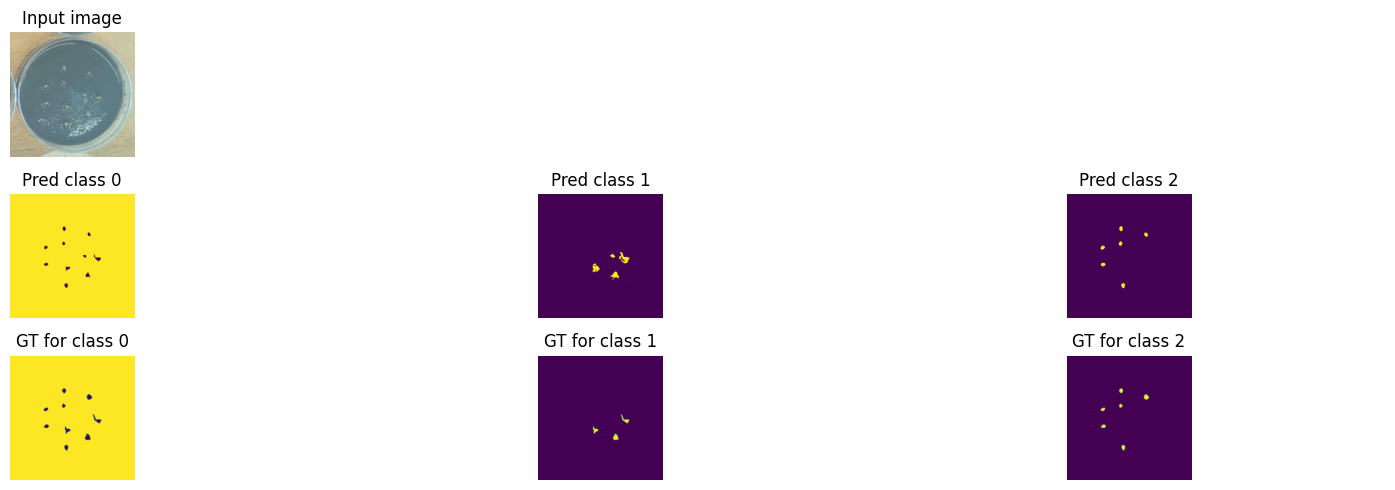

Train loss: 0.00183 | Time: 32m 12s | Val loss: 0.00150
Train_DICE_avg: 0.79557 | Train_Jaccard_avg: 0.73110 | Train_Sensitivity_avg: 0.94111 | Train_Specificity_avg: 0.92328 
Class 0 - Train_DICE: 0.99316 | Train_Jaccard: 0.98645 | Train_Sensitivity: 0.99709 | Train_Specificity: 0.78899 
Class 1 - Train_DICE: 0.57212 | Train_Jaccard: 0.49733 | Train_Sensitivity: 0.88564 | Train_Specificity: 0.99089 
Class 2 - Train_DICE: 0.82144 | Train_Jaccard: 0.70953 | Train_Sensitivity: 0.94060 | Train_Specificity: 0.98997 
Val_DICE_avg: 0.83966 | Val_Jaccard_avg: 0.76980 | Val_Sensitivity_avg: 0.96004 | Val_Specificity_avg: 0.86371 
Class 0 - Val_DICE: 0.99192 | Val_Jaccard: 0.98401 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.60939 
Class 1 - Val_DICE: 0.75457 | Val_Jaccard: 0.68395 | Val_Sensitivity: 0.90633 | Val_Specificity: 0.99527 
Class 2 - Val_DICE: 0.77249 | Val_Jaccard: 0.64143 | Val_Sensitivity: 0.97432 | Val_Specificity: 0.98647 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00180 | Time: 32m 59s | Val loss: 0.00148
Train_DICE_avg: 0.80260 | Train_Jaccard_avg: 0.73841 | Train_Sensitivity_avg: 0.94289 | Train_Specificity_avg: 0.92495 
Class 0 - Train_DICE: 0.99321 | Train_Jaccard: 0.98654 | Train_Sensitivity: 0.99716 | Train_Specificity: 0.79366 
Class 1 - Train_DICE: 0.58931 | Train_Jaccard: 0.51396 | Train_Sensitivity: 0.89109 | Train_Specificity: 0.99103 
Class 2 - Train_DICE: 0.82528 | Train_Jaccard: 0.71471 | Train_Sensitivity: 0.94042 | Train_Specificity: 0.99017 
Val_DICE_avg: 0.84571 | Val_Jaccard_avg: 0.77527 | Val_Sensitivity_avg: 0.95790 | Val_Specificity_avg: 0.86310 
Class 0 - Val_DICE: 0.99184 | Val_Jaccard: 0.98385 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.60732 
Class 1 - Val_DICE: 0.77128 | Val_Jaccard: 0.69839 | Val_Sensitivity: 0.89628 | Val_Specificity: 0.99555 
Class 2 - Val_DICE: 0.77401 | Val_Jaccard: 0.64357 | Val_Sensitivity: 0.97793 | Val_Specificity: 0.98643 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.00176 | Time: 33m 46s | Val loss: 0.00148
Train_DICE_avg: 0.80320 | Train_Jaccard_avg: 0.73868 | Train_Sensitivity_avg: 0.94226 | Train_Specificity_avg: 0.92519 
Class 0 - Train_DICE: 0.99327 | Train_Jaccard: 0.98665 | Train_Sensitivity: 0.99717 | Train_Specificity: 0.79414 
Class 1 - Train_DICE: 0.59068 | Train_Jaccard: 0.51380 | Train_Sensitivity: 0.88886 | Train_Specificity: 0.99120 
Class 2 - Train_DICE: 0.82564 | Train_Jaccard: 0.71559 | Train_Sensitivity: 0.94075 | Train_Specificity: 0.99022 
Val_DICE_avg: 0.84285 | Val_Jaccard_avg: 0.77277 | Val_Sensitivity_avg: 0.96098 | Val_Specificity_avg: 0.86612 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98430 | Val_Sensitivity: 0.99944 | Val_Specificity: 0.61666 
Class 1 - Val_DICE: 0.76474 | Val_Jaccard: 0.69378 | Val_Sensitivity: 0.90786 | Val_Specificity: 0.99543 
Class 2 - Val_DICE: 0.77174 | Val_Jaccard: 0.64024 | Val_Sensitivity: 0.97564 | Val_Specificity: 0.98627 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.00176 | Time: 34m 34s | Val loss: 0.00146
Train_DICE_avg: 0.80599 | Train_Jaccard_avg: 0.74245 | Train_Sensitivity_avg: 0.94270 | Train_Specificity_avg: 0.92703 
Class 0 - Train_DICE: 0.99342 | Train_Jaccard: 0.98696 | Train_Sensitivity: 0.99707 | Train_Specificity: 0.79908 
Class 1 - Train_DICE: 0.59683 | Train_Jaccard: 0.52186 | Train_Sensitivity: 0.89030 | Train_Specificity: 0.99151 
Class 2 - Train_DICE: 0.82772 | Train_Jaccard: 0.71854 | Train_Sensitivity: 0.94071 | Train_Specificity: 0.99052 
Val_DICE_avg: 0.84314 | Val_Jaccard_avg: 0.77240 | Val_Sensitivity_avg: 0.95744 | Val_Specificity_avg: 0.86620 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61694 
Class 1 - Val_DICE: 0.76707 | Val_Jaccard: 0.69357 | Val_Sensitivity: 0.89455 | Val_Specificity: 0.99538 
Class 2 - Val_DICE: 0.77017 | Val_Jaccard: 0.63910 | Val_Sensitivity: 0.97833 | Val_Specificity: 0.98628 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00175 | Time: 35m 21s | Val loss: 0.00147
Train_DICE_avg: 0.80434 | Train_Jaccard_avg: 0.74008 | Train_Sensitivity_avg: 0.94248 | Train_Specificity_avg: 0.92497 
Class 0 - Train_DICE: 0.99331 | Train_Jaccard: 0.98673 | Train_Sensitivity: 0.99713 | Train_Specificity: 0.79299 
Class 1 - Train_DICE: 0.59279 | Train_Jaccard: 0.51590 | Train_Sensitivity: 0.88911 | Train_Specificity: 0.99142 
Class 2 - Train_DICE: 0.82691 | Train_Jaccard: 0.71760 | Train_Sensitivity: 0.94120 | Train_Specificity: 0.99049 
Val_DICE_avg: 0.84088 | Val_Jaccard_avg: 0.76953 | Val_Sensitivity_avg: 0.96104 | Val_Specificity_avg: 0.86846 
Class 0 - Val_DICE: 0.99231 | Val_Jaccard: 0.98477 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.62420 
Class 1 - Val_DICE: 0.76850 | Val_Jaccard: 0.69545 | Val_Sensitivity: 0.90544 | Val_Specificity: 0.99531 
Class 2 - Val_DICE: 0.76182 | Val_Jaccard: 0.62837 | Val_Sensitivity: 0.97822 | Val_Specificity: 0.98587 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


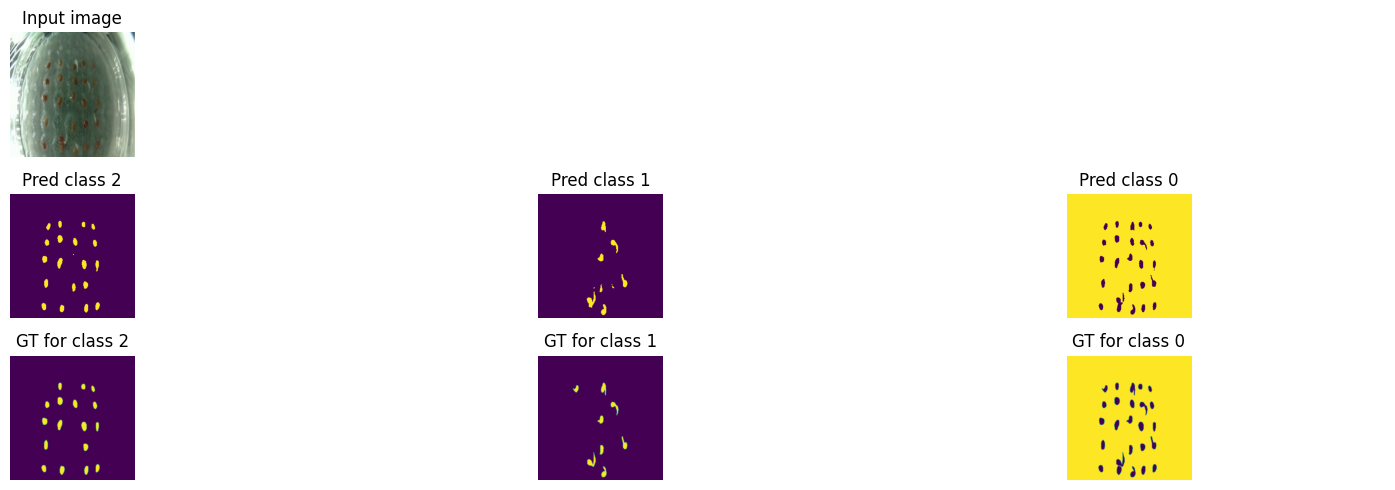

Train loss: 0.00173 | Time: 36m 9s | Val loss: 0.00147
Train_DICE_avg: 0.80804 | Train_Jaccard_avg: 0.74394 | Train_Sensitivity_avg: 0.94286 | Train_Specificity_avg: 0.92566 
Class 0 - Train_DICE: 0.99337 | Train_Jaccard: 0.98686 | Train_Sensitivity: 0.99718 | Train_Specificity: 0.79531 
Class 1 - Train_DICE: 0.60258 | Train_Jaccard: 0.52607 | Train_Sensitivity: 0.88927 | Train_Specificity: 0.99122 
Class 2 - Train_DICE: 0.82817 | Train_Jaccard: 0.71890 | Train_Sensitivity: 0.94212 | Train_Specificity: 0.99047 
Val_DICE_avg: 0.84376 | Val_Jaccard_avg: 0.77396 | Val_Sensitivity_avg: 0.96215 | Val_Specificity_avg: 0.86728 
Class 0 - Val_DICE: 0.99223 | Val_Jaccard: 0.98462 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.61996 
Class 1 - Val_DICE: 0.76310 | Val_Jaccard: 0.69188 | Val_Sensitivity: 0.91237 | Val_Specificity: 0.99537 
Class 2 - Val_DICE: 0.77595 | Val_Jaccard: 0.64539 | Val_Sensitivity: 0.97460 | Val_Specificity: 0.98650 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00173 | Time: 36m 57s | Val loss: 0.00145
Train_DICE_avg: 0.81094 | Train_Jaccard_avg: 0.74743 | Train_Sensitivity_avg: 0.94297 | Train_Specificity_avg: 0.92914 
Class 0 - Train_DICE: 0.99343 | Train_Jaccard: 0.98697 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.80490 
Class 1 - Train_DICE: 0.60689 | Train_Jaccard: 0.53023 | Train_Sensitivity: 0.89127 | Train_Specificity: 0.99173 
Class 2 - Train_DICE: 0.83248 | Train_Jaccard: 0.72508 | Train_Sensitivity: 0.94057 | Train_Specificity: 0.99080 
Val_DICE_avg: 0.84583 | Val_Jaccard_avg: 0.77568 | Val_Sensitivity_avg: 0.96137 | Val_Specificity_avg: 0.86666 
Class 0 - Val_DICE: 0.99217 | Val_Jaccard: 0.98450 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.61815 
Class 1 - Val_DICE: 0.77188 | Val_Jaccard: 0.70037 | Val_Sensitivity: 0.90670 | Val_Specificity: 0.99555 
Class 2 - Val_DICE: 0.77345 | Val_Jaccard: 0.64217 | Val_Sensitivity: 0.97791 | Val_Specificity: 0.98628 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.00171 | Time: 37m 44s | Val loss: 0.00143
Train_DICE_avg: 0.80508 | Train_Jaccard_avg: 0.74097 | Train_Sensitivity_avg: 0.94437 | Train_Specificity_avg: 0.92554 
Class 0 - Train_DICE: 0.99340 | Train_Jaccard: 0.98691 | Train_Sensitivity: 0.99717 | Train_Specificity: 0.79471 
Class 1 - Train_DICE: 0.59341 | Train_Jaccard: 0.51685 | Train_Sensitivity: 0.89270 | Train_Specificity: 0.99139 
Class 2 - Train_DICE: 0.82844 | Train_Jaccard: 0.71915 | Train_Sensitivity: 0.94323 | Train_Specificity: 0.99052 
Val_DICE_avg: 0.84319 | Val_Jaccard_avg: 0.77294 | Val_Sensitivity_avg: 0.96230 | Val_Specificity_avg: 0.86957 
Class 0 - Val_DICE: 0.99241 | Val_Jaccard: 0.98498 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.62720 
Class 1 - Val_DICE: 0.76898 | Val_Jaccard: 0.69859 | Val_Sensitivity: 0.91104 | Val_Specificity: 0.99557 
Class 2 - Val_DICE: 0.76819 | Val_Jaccard: 0.63526 | Val_Sensitivity: 0.97638 | Val_Specificity: 0.98595 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00170 | Time: 38m 32s | Val loss: 0.00143
Train_DICE_avg: 0.81103 | Train_Jaccard_avg: 0.74791 | Train_Sensitivity_avg: 0.94255 | Train_Specificity_avg: 0.92701 
Class 0 - Train_DICE: 0.99350 | Train_Jaccard: 0.98711 | Train_Sensitivity: 0.99719 | Train_Specificity: 0.79853 
Class 1 - Train_DICE: 0.60832 | Train_Jaccard: 0.53275 | Train_Sensitivity: 0.88790 | Train_Specificity: 0.99173 
Class 2 - Train_DICE: 0.83126 | Train_Jaccard: 0.72388 | Train_Sensitivity: 0.94255 | Train_Specificity: 0.99077 
Val_DICE_avg: 0.83812 | Val_Jaccard_avg: 0.76696 | Val_Sensitivity_avg: 0.95992 | Val_Specificity_avg: 0.87123 
Class 0 - Val_DICE: 0.99261 | Val_Jaccard: 0.98537 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.63283 
Class 1 - Val_DICE: 0.76193 | Val_Jaccard: 0.69098 | Val_Sensitivity: 0.90607 | Val_Specificity: 0.99534 
Class 2 - Val_DICE: 0.75982 | Val_Jaccard: 0.62454 | Val_Sensitivity: 0.97424 | Val_Specificity: 0.98553 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00169 | Time: 39m 19s | Val loss: 0.00147
Train_DICE_avg: 0.80658 | Train_Jaccard_avg: 0.74275 | Train_Sensitivity_avg: 0.94681 | Train_Specificity_avg: 0.92544 
Class 0 - Train_DICE: 0.99343 | Train_Jaccard: 0.98697 | Train_Sensitivity: 0.99729 | Train_Specificity: 0.79459 
Class 1 - Train_DICE: 0.59776 | Train_Jaccard: 0.52138 | Train_Sensitivity: 0.89899 | Train_Specificity: 0.99127 
Class 2 - Train_DICE: 0.82855 | Train_Jaccard: 0.71991 | Train_Sensitivity: 0.94415 | Train_Specificity: 0.99045 
Val_DICE_avg: 0.84093 | Val_Jaccard_avg: 0.77061 | Val_Sensitivity_avg: 0.95160 | Val_Specificity_avg: 0.86843 
Class 0 - Val_DICE: 0.99234 | Val_Jaccard: 0.98485 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.62369 
Class 1 - Val_DICE: 0.75844 | Val_Jaccard: 0.68740 | Val_Sensitivity: 0.87862 | Val_Specificity: 0.99567 
Class 2 - Val_DICE: 0.77201 | Val_Jaccard: 0.63957 | Val_Sensitivity: 0.97671 | Val_Specificity: 0.98592 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


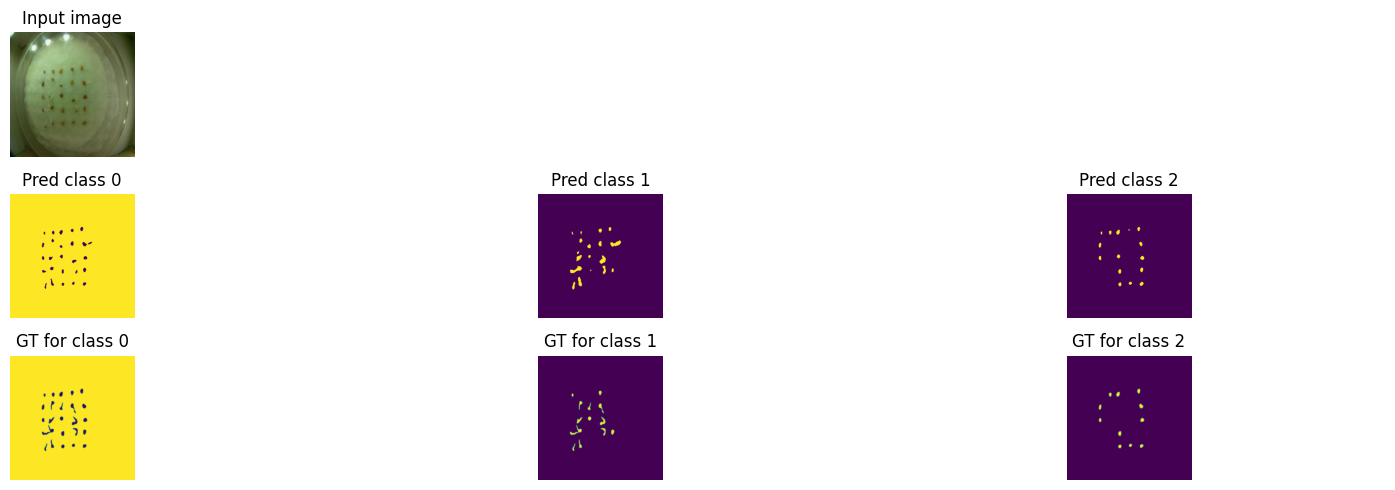

Train loss: 0.00166 | Time: 40m 7s | Val loss: 0.00149
Train_DICE_avg: 0.80878 | Train_Jaccard_avg: 0.74532 | Train_Sensitivity_avg: 0.94744 | Train_Specificity_avg: 0.92542 
Class 0 - Train_DICE: 0.99349 | Train_Jaccard: 0.98708 | Train_Sensitivity: 0.99729 | Train_Specificity: 0.79434 
Class 1 - Train_DICE: 0.60121 | Train_Jaccard: 0.52504 | Train_Sensitivity: 0.89926 | Train_Specificity: 0.99135 
Class 2 - Train_DICE: 0.83165 | Train_Jaccard: 0.72382 | Train_Sensitivity: 0.94577 | Train_Specificity: 0.99057 
Val_DICE_avg: 0.84261 | Val_Jaccard_avg: 0.77191 | Val_Sensitivity_avg: 0.95764 | Val_Specificity_avg: 0.86952 
Class 0 - Val_DICE: 0.99241 | Val_Jaccard: 0.98497 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.62708 
Class 1 - Val_DICE: 0.76600 | Val_Jaccard: 0.69459 | Val_Sensitivity: 0.90067 | Val_Specificity: 0.99553 
Class 2 - Val_DICE: 0.76943 | Val_Jaccard: 0.63616 | Val_Sensitivity: 0.97277 | Val_Specificity: 0.98594 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00166 | Time: 40m 54s | Val loss: 0.00146
Train_DICE_avg: 0.80756 | Train_Jaccard_avg: 0.74392 | Train_Sensitivity_avg: 0.94446 | Train_Specificity_avg: 0.92607 
Class 0 - Train_DICE: 0.99350 | Train_Jaccard: 0.98710 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.79631 
Class 1 - Train_DICE: 0.59772 | Train_Jaccard: 0.52091 | Train_Sensitivity: 0.89092 | Train_Specificity: 0.99128 
Class 2 - Train_DICE: 0.83146 | Train_Jaccard: 0.72375 | Train_Sensitivity: 0.94521 | Train_Specificity: 0.99062 
Val_DICE_avg: 0.83913 | Val_Jaccard_avg: 0.76791 | Val_Sensitivity_avg: 0.95696 | Val_Specificity_avg: 0.87195 
Class 0 - Val_DICE: 0.99270 | Val_Jaccard: 0.98555 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.63469 
Class 1 - Val_DICE: 0.76228 | Val_Jaccard: 0.69065 | Val_Sensitivity: 0.89474 | Val_Specificity: 0.99554 
Class 2 - Val_DICE: 0.76239 | Val_Jaccard: 0.62751 | Val_Sensitivity: 0.97668 | Val_Specificity: 0.98563 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00166 | Time: 41m 41s | Val loss: 0.00140
Train_DICE_avg: 0.81003 | Train_Jaccard_avg: 0.74594 | Train_Sensitivity_avg: 0.94524 | Train_Specificity_avg: 0.92537 
Class 0 - Train_DICE: 0.99338 | Train_Jaccard: 0.98687 | Train_Sensitivity: 0.99723 | Train_Specificity: 0.79407 
Class 1 - Train_DICE: 0.60481 | Train_Jaccard: 0.52711 | Train_Sensitivity: 0.89397 | Train_Specificity: 0.99153 
Class 2 - Train_DICE: 0.83189 | Train_Jaccard: 0.72384 | Train_Sensitivity: 0.94452 | Train_Specificity: 0.99051 
Val_DICE_avg: 0.84342 | Val_Jaccard_avg: 0.77285 | Val_Sensitivity_avg: 0.95759 | Val_Specificity_avg: 0.86735 
Class 0 - Val_DICE: 0.99231 | Val_Jaccard: 0.98478 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.62034 
Class 1 - Val_DICE: 0.76376 | Val_Jaccard: 0.69108 | Val_Sensitivity: 0.89728 | Val_Specificity: 0.99545 
Class 2 - Val_DICE: 0.77418 | Val_Jaccard: 0.64270 | Val_Sensitivity: 0.97602 | Val_Specificity: 0.98626 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00166 | Time: 42m 29s | Val loss: 0.00141
Train_DICE_avg: 0.81406 | Train_Jaccard_avg: 0.75029 | Train_Sensitivity_avg: 0.94811 | Train_Specificity_avg: 0.92666 
Class 0 - Train_DICE: 0.99347 | Train_Jaccard: 0.98705 | Train_Sensitivity: 0.99728 | Train_Specificity: 0.79780 
Class 1 - Train_DICE: 0.61587 | Train_Jaccard: 0.53865 | Train_Sensitivity: 0.90258 | Train_Specificity: 0.99158 
Class 2 - Train_DICE: 0.83282 | Train_Jaccard: 0.72516 | Train_Sensitivity: 0.94446 | Train_Specificity: 0.99062 
Val_DICE_avg: 0.84677 | Val_Jaccard_avg: 0.77691 | Val_Sensitivity_avg: 0.96110 | Val_Specificity_avg: 0.86681 
Class 0 - Val_DICE: 0.99221 | Val_Jaccard: 0.98458 | Val_Sensitivity: 0.99947 | Val_Specificity: 0.61854 
Class 1 - Val_DICE: 0.76983 | Val_Jaccard: 0.69790 | Val_Sensitivity: 0.90888 | Val_Specificity: 0.99535 
Class 2 - Val_DICE: 0.77829 | Val_Jaccard: 0.64825 | Val_Sensitivity: 0.97496 | Val_Specificity: 0.98654 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00165 | Time: 43m 16s | Val loss: 0.00141
Train_DICE_avg: 0.81059 | Train_Jaccard_avg: 0.74715 | Train_Sensitivity_avg: 0.94588 | Train_Specificity_avg: 0.92660 
Class 0 - Train_DICE: 0.99348 | Train_Jaccard: 0.98707 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.79761 
Class 1 - Train_DICE: 0.60511 | Train_Jaccard: 0.52861 | Train_Sensitivity: 0.89513 | Train_Specificity: 0.99155 
Class 2 - Train_DICE: 0.83318 | Train_Jaccard: 0.72575 | Train_Sensitivity: 0.94525 | Train_Specificity: 0.99064 
Val_DICE_avg: 0.84249 | Val_Jaccard_avg: 0.77133 | Val_Sensitivity_avg: 0.95876 | Val_Specificity_avg: 0.86925 
Class 0 - Val_DICE: 0.99249 | Val_Jaccard: 0.98513 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.62635 
Class 1 - Val_DICE: 0.76381 | Val_Jaccard: 0.68998 | Val_Sensitivity: 0.89948 | Val_Specificity: 0.99534 
Class 2 - Val_DICE: 0.77118 | Val_Jaccard: 0.63888 | Val_Sensitivity: 0.97735 | Val_Specificity: 0.98606 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


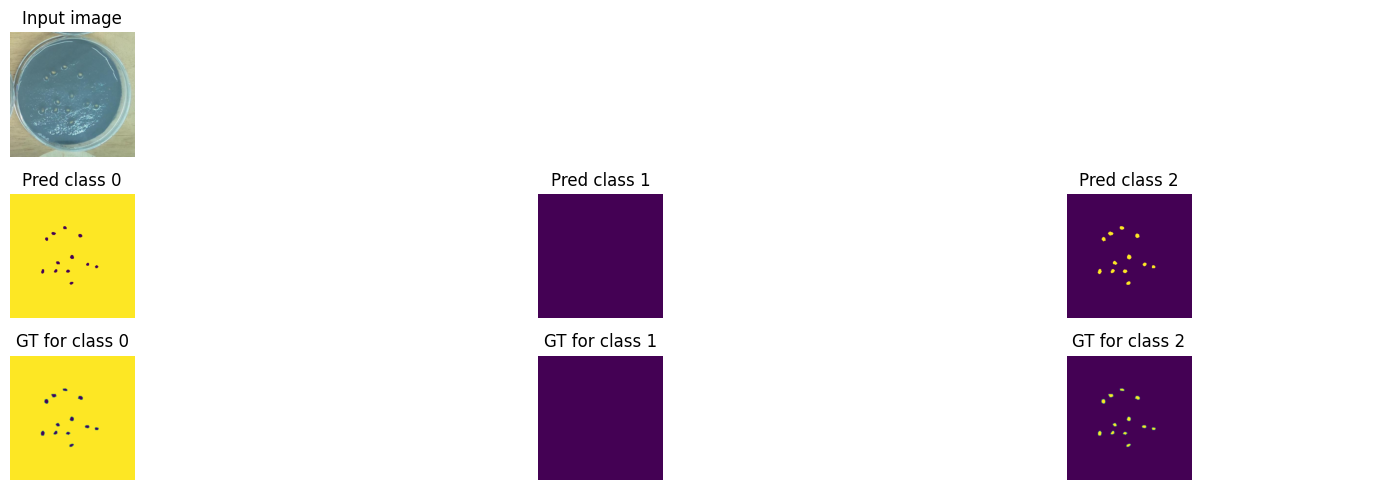

Train loss: 0.00164 | Time: 44m 4s | Val loss: 0.00145
Train_DICE_avg: 0.81049 | Train_Jaccard_avg: 0.74745 | Train_Sensitivity_avg: 0.94747 | Train_Specificity_avg: 0.92723 
Class 0 - Train_DICE: 0.99356 | Train_Jaccard: 0.98723 | Train_Sensitivity: 0.99730 | Train_Specificity: 0.79966 
Class 1 - Train_DICE: 0.60521 | Train_Jaccard: 0.52954 | Train_Sensitivity: 0.89981 | Train_Specificity: 0.99132 
Class 2 - Train_DICE: 0.83270 | Train_Jaccard: 0.72558 | Train_Sensitivity: 0.94531 | Train_Specificity: 0.99071 
Val_DICE_avg: 0.84320 | Val_Jaccard_avg: 0.77309 | Val_Sensitivity_avg: 0.95453 | Val_Specificity_avg: 0.86660 
Class 0 - Val_DICE: 0.99223 | Val_Jaccard: 0.98461 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61787 
Class 1 - Val_DICE: 0.75931 | Val_Jaccard: 0.68694 | Val_Sensitivity: 0.88474 | Val_Specificity: 0.99556 
Class 2 - Val_DICE: 0.77806 | Val_Jaccard: 0.64772 | Val_Sensitivity: 0.97939 | Val_Specificity: 0.98637 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00162 | Time: 44m 52s | Val loss: 0.00142
Train_DICE_avg: 0.81066 | Train_Jaccard_avg: 0.74727 | Train_Sensitivity_avg: 0.94961 | Train_Specificity_avg: 0.92568 
Class 0 - Train_DICE: 0.99353 | Train_Jaccard: 0.98716 | Train_Sensitivity: 0.99735 | Train_Specificity: 0.79514 
Class 1 - Train_DICE: 0.60445 | Train_Jaccard: 0.52781 | Train_Sensitivity: 0.90378 | Train_Specificity: 0.99127 
Class 2 - Train_DICE: 0.83400 | Train_Jaccard: 0.72685 | Train_Sensitivity: 0.94769 | Train_Specificity: 0.99062 
Val_DICE_avg: 0.84314 | Val_Jaccard_avg: 0.77328 | Val_Sensitivity_avg: 0.95655 | Val_Specificity_avg: 0.86567 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98429 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61484 
Class 1 - Val_DICE: 0.75707 | Val_Jaccard: 0.68438 | Val_Sensitivity: 0.89455 | Val_Specificity: 0.99548 
Class 2 - Val_DICE: 0.78029 | Val_Jaccard: 0.65116 | Val_Sensitivity: 0.97561 | Val_Specificity: 0.98668 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.00162 | Time: 45m 39s | Val loss: 0.00142
Train_DICE_avg: 0.81637 | Train_Jaccard_avg: 0.75313 | Train_Sensitivity_avg: 0.94572 | Train_Specificity_avg: 0.92879 
Class 0 - Train_DICE: 0.99352 | Train_Jaccard: 0.98716 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.80365 
Class 1 - Train_DICE: 0.61954 | Train_Jaccard: 0.54233 | Train_Sensitivity: 0.89475 | Train_Specificity: 0.99193 
Class 2 - Train_DICE: 0.83605 | Train_Jaccard: 0.72991 | Train_Sensitivity: 0.94516 | Train_Specificity: 0.99079 
Val_DICE_avg: 0.85070 | Val_Jaccard_avg: 0.78122 | Val_Sensitivity_avg: 0.95879 | Val_Specificity_avg: 0.86489 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98407 | Val_Sensitivity: 0.99948 | Val_Specificity: 0.61226 
Class 1 - Val_DICE: 0.77792 | Val_Jaccard: 0.70586 | Val_Sensitivity: 0.90040 | Val_Specificity: 0.99565 
Class 2 - Val_DICE: 0.78225 | Val_Jaccard: 0.65374 | Val_Sensitivity: 0.97650 | Val_Specificity: 0.98675 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00161 | Time: 46m 27s | Val loss: 0.00143
Train_DICE_avg: 0.81648 | Train_Jaccard_avg: 0.75350 | Train_Sensitivity_avg: 0.94861 | Train_Specificity_avg: 0.92654 
Class 0 - Train_DICE: 0.99360 | Train_Jaccard: 0.98729 | Train_Sensitivity: 0.99738 | Train_Specificity: 0.79729 
Class 1 - Train_DICE: 0.62003 | Train_Jaccard: 0.54327 | Train_Sensitivity: 0.90095 | Train_Specificity: 0.99156 
Class 2 - Train_DICE: 0.83580 | Train_Jaccard: 0.72993 | Train_Sensitivity: 0.94751 | Train_Specificity: 0.99079 
Val_DICE_avg: 0.84431 | Val_Jaccard_avg: 0.77455 | Val_Sensitivity_avg: 0.95346 | Val_Specificity_avg: 0.86609 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98437 | Val_Sensitivity: 0.99946 | Val_Specificity: 0.61620 
Class 1 - Val_DICE: 0.76369 | Val_Jaccard: 0.69175 | Val_Sensitivity: 0.88175 | Val_Specificity: 0.99557 
Class 2 - Val_DICE: 0.77712 | Val_Jaccard: 0.64752 | Val_Sensitivity: 0.97918 | Val_Specificity: 0.98650 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.00160 | Time: 47m 15s | Val loss: 0.00141
Train_DICE_avg: 0.81423 | Train_Jaccard_avg: 0.75067 | Train_Sensitivity_avg: 0.94642 | Train_Specificity_avg: 0.92723 
Class 0 - Train_DICE: 0.99358 | Train_Jaccard: 0.98726 | Train_Sensitivity: 0.99739 | Train_Specificity: 0.79924 
Class 1 - Train_DICE: 0.61378 | Train_Jaccard: 0.53591 | Train_Sensitivity: 0.89491 | Train_Specificity: 0.99167 
Class 2 - Train_DICE: 0.83533 | Train_Jaccard: 0.72883 | Train_Sensitivity: 0.94697 | Train_Specificity: 0.99080 
Val_DICE_avg: 0.85147 | Val_Jaccard_avg: 0.78235 | Val_Sensitivity_avg: 0.95834 | Val_Specificity_avg: 0.86379 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99949 | Val_Specificity: 0.60889 
Class 1 - Val_DICE: 0.77896 | Val_Jaccard: 0.70748 | Val_Sensitivity: 0.90049 | Val_Specificity: 0.99565 
Class 2 - Val_DICE: 0.78358 | Val_Jaccard: 0.65567 | Val_Sensitivity: 0.97503 | Val_Specificity: 0.98684 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


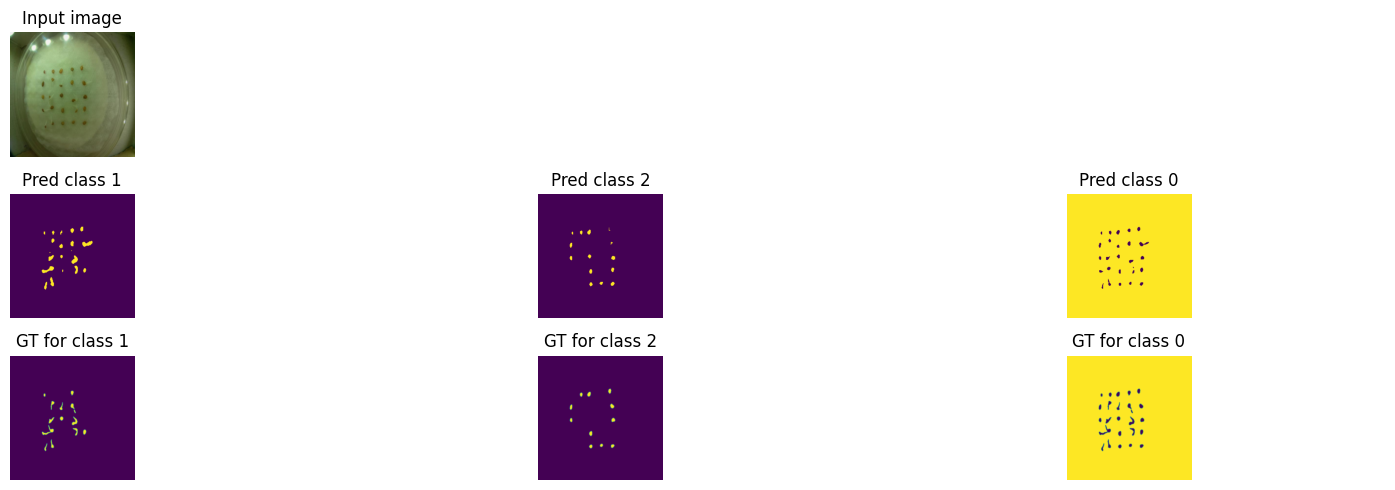

Train loss: 0.00161 | Time: 48m 3s | Val loss: 0.00138
Train_DICE_avg: 0.81592 | Train_Jaccard_avg: 0.75294 | Train_Sensitivity_avg: 0.94624 | Train_Specificity_avg: 0.92818 
Class 0 - Train_DICE: 0.99354 | Train_Jaccard: 0.98718 | Train_Sensitivity: 0.99727 | Train_Specificity: 0.80187 
Class 1 - Train_DICE: 0.61799 | Train_Jaccard: 0.54132 | Train_Sensitivity: 0.89559 | Train_Specificity: 0.99184 
Class 2 - Train_DICE: 0.83625 | Train_Jaccard: 0.73030 | Train_Sensitivity: 0.94586 | Train_Specificity: 0.99084 
Val_DICE_avg: 0.84775 | Val_Jaccard_avg: 0.77790 | Val_Sensitivity_avg: 0.96093 | Val_Specificity_avg: 0.86768 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98467 | Val_Sensitivity: 0.99945 | Val_Specificity: 0.62107 
Class 1 - Val_DICE: 0.77279 | Val_Jaccard: 0.70069 | Val_Sensitivity: 0.90727 | Val_Specificity: 0.99545 
Class 2 - Val_DICE: 0.77820 | Val_Jaccard: 0.64833 | Val_Sensitivity: 0.97607 | Val_Specificity: 0.98651 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [ ]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]



Global Performance Metrics:
Loss mean: 0.00152, std: 0.00018
Dice Coefficient mean: 0.85751, std: 0.11001
Jaccard Index mean: 0.79733, std: 0.12194
Sensitivity mean: 0.92864, std: 0.07404
Specificity mean: 0.94842, std: 0.03436

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99609, std: 0.00197
Jaccard mean: 0.99222, std: 0.00389
Sensitivity mean: 0.99713, std: 0.00214
Specificity mean: 0.85476, std: 0.10159

Class 1:
Dice mean: 0.72029, std: 0.29923
Jaccard mean: 0.63604, std: 0.31299
Sensitivity mean: 0.87731, std: 0.20746
Specificity mean: 0.99595, std: 0.00621

Class 2:
Dice mean: 0.85614, std: 0.12358
Jaccard mean: 0.76372, std: 0.14311
Sensitivity mean: 0.91147, std: 0.08600
Specificity mean: 0.99455, std: 0.00508


### Tversky Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-UNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.73 GB
GPU Memory - Reserved: 1.13 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


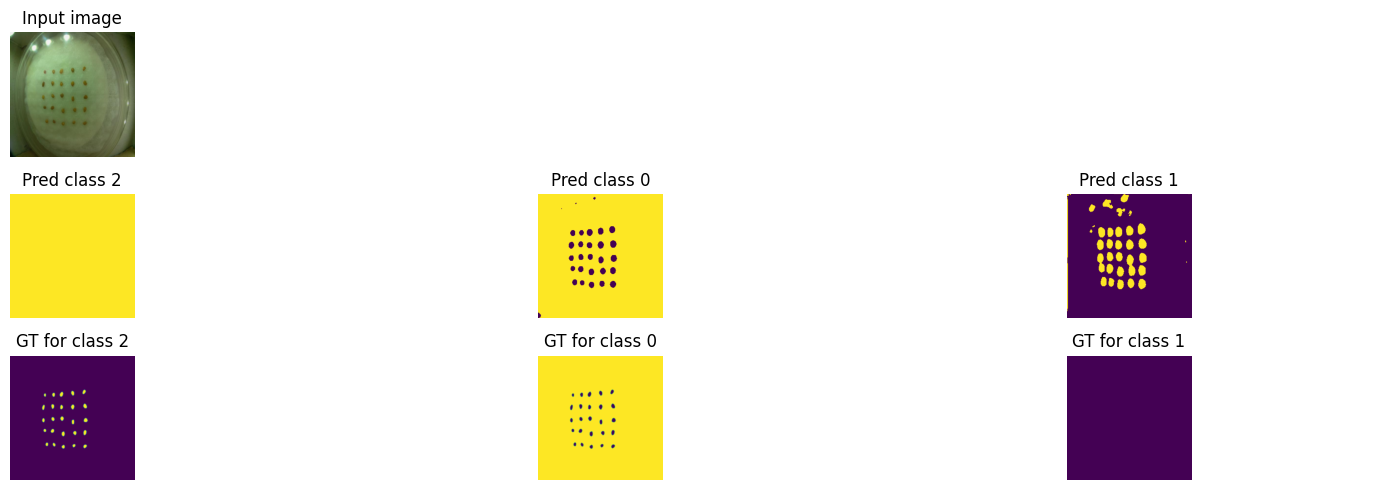

Train loss: 0.69162 | Time: 0m 46s | Val loss: 0.66313
Train_DICE_avg: 0.37285 | Train_Jaccard_avg: 0.31740 | Train_Sensitivity_avg: 0.38531 | Train_Specificity_avg: 0.77486 
Class 0 - Train_DICE: 0.86589 | Train_Jaccard: 0.79230 | Train_Sensitivity: 0.99420 | Train_Specificity: 0.32982 
Class 1 - Train_DICE: 0.06098 | Train_Jaccard: 0.03377 | Train_Sensitivity: 0.03469 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.19168 | Train_Jaccard: 0.12613 | Train_Sensitivity: 0.12704 | Train_Specificity: 0.99784 
Val_DICE_avg: 0.42563 | Val_Jaccard_avg: 0.38832 | Val_Sensitivity_avg: 0.40354 | Val_Specificity_avg: 0.82656 
Class 0 - Val_DICE: 0.97971 | Val_Jaccard: 0.96035 | Val_Sensitivity: 0.99747 | Val_Specificity: 0.48193 
Class 1 - Val_DICE: 0.08955 | Val_Jaccard: 0.05205 | Val_Sensitivity: 0.05491 | Val_Specificity: 0.99842 
Class 2 - Val_DICE: 0.20762 | Val_Jaccard: 0.15256 | Val_Sensitivity: 0.15825 | Val_Specificity: 0.99933 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.65133 | Time: 1m 33s | Val loss: 0.63843
Train_DICE_avg: 0.46145 | Train_Jaccard_avg: 0.41618 | Train_Sensitivity_avg: 0.43871 | Train_Specificity_avg: 0.84160 
Class 0 - Train_DICE: 0.96711 | Train_Jaccard: 0.93676 | Train_Sensitivity: 0.99653 | Train_Specificity: 0.52709 
Class 1 - Train_DICE: 0.10678 | Train_Jaccard: 0.06180 | Train_Sensitivity: 0.06334 | Train_Specificity: 0.99886 
Class 2 - Train_DICE: 0.31047 | Train_Jaccard: 0.24999 | Train_Sensitivity: 0.25627 | Train_Specificity: 0.99886 
Val_DICE_avg: 0.47293 | Val_Jaccard_avg: 0.43584 | Val_Sensitivity_avg: 0.44852 | Val_Specificity_avg: 0.83802 
Class 0 - Val_DICE: 0.98155 | Val_Jaccard: 0.96396 | Val_Sensitivity: 0.99841 | Val_Specificity: 0.51754 
Class 1 - Val_DICE: 0.11146 | Val_Jaccard: 0.06763 | Val_Sensitivity: 0.06925 | Val_Specificity: 0.99903 
Class 2 - Val_DICE: 0.32579 | Val_Jaccard: 0.27595 | Val_Sensitivity: 0.27790 | Val_Specificity: 0.99750 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.63173 | Time: 2m 19s | Val loss: 0.62259
Train_DICE_avg: 0.47585 | Train_Jaccard_avg: 0.43290 | Train_Sensitivity_avg: 0.45312 | Train_Specificity_avg: 0.85916 
Class 0 - Train_DICE: 0.97350 | Train_Jaccard: 0.94868 | Train_Sensitivity: 0.99710 | Train_Specificity: 0.57969 
Class 1 - Train_DICE: 0.12209 | Train_Jaccard: 0.07194 | Train_Sensitivity: 0.07332 | Train_Specificity: 0.99919 
Class 2 - Train_DICE: 0.33197 | Train_Jaccard: 0.27806 | Train_Sensitivity: 0.28894 | Train_Specificity: 0.99861 
Val_DICE_avg: 0.48578 | Val_Jaccard_avg: 0.45077 | Val_Sensitivity_avg: 0.46515 | Val_Specificity_avg: 0.85689 
Class 0 - Val_DICE: 0.98633 | Val_Jaccard: 0.97310 | Val_Sensitivity: 0.99860 | Val_Specificity: 0.57438 
Class 1 - Val_DICE: 0.12717 | Val_Jaccard: 0.07950 | Val_Sensitivity: 0.08164 | Val_Specificity: 0.99919 
Class 2 - Val_DICE: 0.34386 | Val_Jaccard: 0.29971 | Val_Sensitivity: 0.31521 | Val_Specificity: 0.99709 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.61549 | Time: 3m 6s | Val loss: 0.60606
Train_DICE_avg: 0.48674 | Train_Jaccard_avg: 0.44374 | Train_Sensitivity_avg: 0.46307 | Train_Specificity_avg: 0.87037 
Class 0 - Train_DICE: 0.97752 | Train_Jaccard: 0.95625 | Train_Sensitivity: 0.99745 | Train_Specificity: 0.61336 
Class 1 - Train_DICE: 0.13659 | Train_Jaccard: 0.08161 | Train_Sensitivity: 0.08292 | Train_Specificity: 0.99939 
Class 2 - Train_DICE: 0.34611 | Train_Jaccard: 0.29337 | Train_Sensitivity: 0.30884 | Train_Specificity: 0.99835 
Val_DICE_avg: 0.49264 | Val_Jaccard_avg: 0.45665 | Val_Sensitivity_avg: 0.47013 | Val_Specificity_avg: 0.86615 
Class 0 - Val_DICE: 0.98767 | Val_Jaccard: 0.97572 | Val_Sensitivity: 0.99886 | Val_Specificity: 0.60118 
Class 1 - Val_DICE: 0.14129 | Val_Jaccard: 0.08951 | Val_Sensitivity: 0.09207 | Val_Specificity: 0.99923 
Class 2 - Val_DICE: 0.34896 | Val_Jaccard: 0.30472 | Val_Sensitivity: 0.31946 | Val_Specificity: 0.99805 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.60006 | Time: 3m 52s | Val loss: 0.58948
Train_DICE_avg: 0.49479 | Train_Jaccard_avg: 0.45168 | Train_Sensitivity_avg: 0.47099 | Train_Specificity_avg: 0.88000 
Class 0 - Train_DICE: 0.98014 | Train_Jaccard: 0.96124 | Train_Sensitivity: 0.99738 | Train_Specificity: 0.64253 
Class 1 - Train_DICE: 0.14840 | Train_Jaccard: 0.09026 | Train_Sensitivity: 0.09232 | Train_Specificity: 0.99932 
Class 2 - Train_DICE: 0.35584 | Train_Jaccard: 0.30354 | Train_Sensitivity: 0.32325 | Train_Specificity: 0.99816 
Val_DICE_avg: 0.49624 | Val_Jaccard_avg: 0.46000 | Val_Sensitivity_avg: 0.47630 | Val_Specificity_avg: 0.86385 
Class 0 - Val_DICE: 0.98664 | Val_Jaccard: 0.97380 | Val_Sensitivity: 0.99907 | Val_Specificity: 0.59508 
Class 1 - Val_DICE: 0.14103 | Val_Jaccard: 0.09081 | Val_Sensitivity: 0.09437 | Val_Specificity: 0.99917 
Class 2 - Val_DICE: 0.36104 | Val_Jaccard: 0.31540 | Val_Sensitivity: 0.33547 | Val_Specificity: 0.99728 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


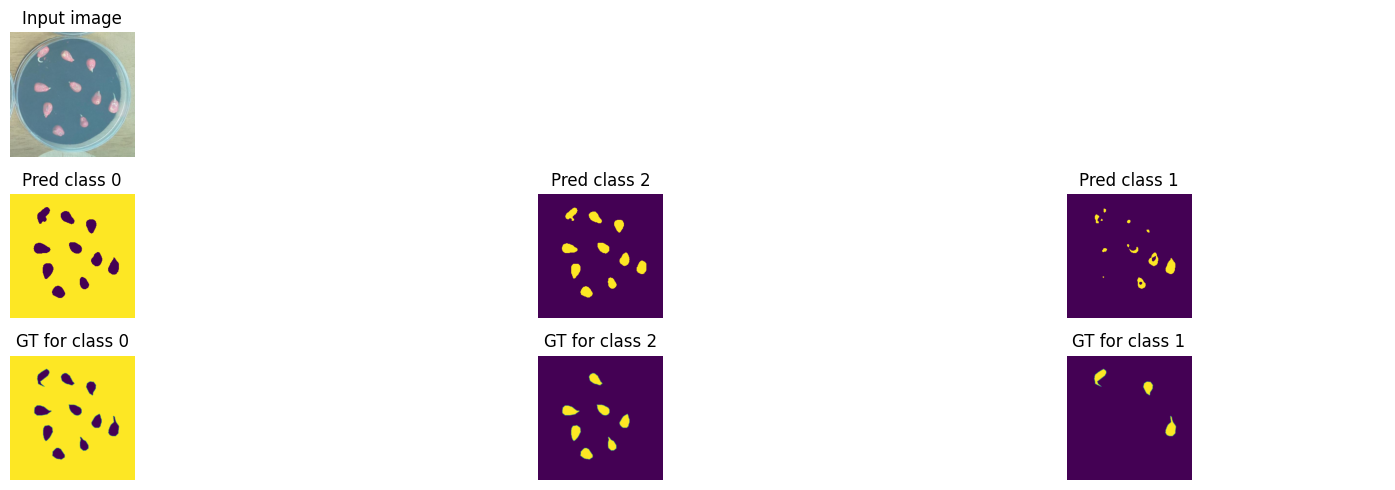

Train loss: 0.58415 | Time: 4m 39s | Val loss: 0.57422
Train_DICE_avg: 0.50689 | Train_Jaccard_avg: 0.46247 | Train_Sensitivity_avg: 0.48378 | Train_Specificity_avg: 0.88518 
Class 0 - Train_DICE: 0.98171 | Train_Jaccard: 0.96421 | Train_Sensitivity: 0.99714 | Train_Specificity: 0.65892 
Class 1 - Train_DICE: 0.16970 | Train_Jaccard: 0.10697 | Train_Sensitivity: 0.11256 | Train_Specificity: 0.99906 
Class 2 - Train_DICE: 0.36927 | Train_Jaccard: 0.31624 | Train_Sensitivity: 0.34164 | Train_Specificity: 0.99756 
Val_DICE_avg: 0.51643 | Val_Jaccard_avg: 0.47916 | Val_Sensitivity_avg: 0.50421 | Val_Specificity_avg: 0.87927 
Class 0 - Val_DICE: 0.98974 | Val_Jaccard: 0.97975 | Val_Sensitivity: 0.99865 | Val_Specificity: 0.64578 
Class 1 - Val_DICE: 0.17974 | Val_Jaccard: 0.12213 | Val_Sensitivity: 0.16250 | Val_Specificity: 0.99730 
Class 2 - Val_DICE: 0.37979 | Val_Jaccard: 0.33560 | Val_Sensitivity: 0.35148 | Val_Specificity: 0.99474 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.56693 | Time: 5m 25s | Val loss: 0.55681
Train_DICE_avg: 0.52135 | Train_Jaccard_avg: 0.47644 | Train_Sensitivity_avg: 0.50010 | Train_Specificity_avg: 0.89419 
Class 0 - Train_DICE: 0.98365 | Train_Jaccard: 0.96794 | Train_Sensitivity: 0.99673 | Train_Specificity: 0.68623 
Class 1 - Train_DICE: 0.19347 | Train_Jaccard: 0.12868 | Train_Sensitivity: 0.14159 | Train_Specificity: 0.99873 
Class 2 - Train_DICE: 0.38693 | Train_Jaccard: 0.33270 | Train_Sensitivity: 0.36199 | Train_Specificity: 0.99761 
Val_DICE_avg: 0.52707 | Val_Jaccard_avg: 0.48979 | Val_Sensitivity_avg: 0.51733 | Val_Specificity_avg: 0.88920 
Class 0 - Val_DICE: 0.99100 | Val_Jaccard: 0.98223 | Val_Sensitivity: 0.99875 | Val_Specificity: 0.67502 
Class 1 - Val_DICE: 0.20186 | Val_Jaccard: 0.14226 | Val_Sensitivity: 0.18038 | Val_Specificity: 0.99768 
Class 2 - Val_DICE: 0.38834 | Val_Jaccard: 0.34489 | Val_Sensitivity: 0.37286 | Val_Specificity: 0.99489 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.54972 | Time: 6m 11s | Val loss: 0.54398
Train_DICE_avg: 0.53298 | Train_Jaccard_avg: 0.48845 | Train_Sensitivity_avg: 0.51509 | Train_Specificity_avg: 0.90206 
Class 0 - Train_DICE: 0.98535 | Train_Jaccard: 0.97122 | Train_Sensitivity: 0.99605 | Train_Specificity: 0.71040 
Class 1 - Train_DICE: 0.21438 | Train_Jaccard: 0.14895 | Train_Sensitivity: 0.16886 | Train_Specificity: 0.99854 
Class 2 - Train_DICE: 0.39922 | Train_Jaccard: 0.34518 | Train_Sensitivity: 0.38036 | Train_Specificity: 0.99725 
Val_DICE_avg: 0.52786 | Val_Jaccard_avg: 0.49100 | Val_Sensitivity_avg: 0.51658 | Val_Specificity_avg: 0.87351 
Class 0 - Val_DICE: 0.98917 | Val_Jaccard: 0.97865 | Val_Sensitivity: 0.99885 | Val_Specificity: 0.62463 
Class 1 - Val_DICE: 0.19654 | Val_Jaccard: 0.14222 | Val_Sensitivity: 0.16982 | Val_Specificity: 0.99809 
Class 2 - Val_DICE: 0.39789 | Val_Jaccard: 0.35213 | Val_Sensitivity: 0.38107 | Val_Specificity: 0.99782 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.53522 | Time: 6m 57s | Val loss: 0.52541
Train_DICE_avg: 0.54722 | Train_Jaccard_avg: 0.50072 | Train_Sensitivity_avg: 0.52936 | Train_Specificity_avg: 0.90727 
Class 0 - Train_DICE: 0.98636 | Train_Jaccard: 0.97318 | Train_Sensitivity: 0.99567 | Train_Specificity: 0.72643 
Class 1 - Train_DICE: 0.23211 | Train_Jaccard: 0.16372 | Train_Sensitivity: 0.18876 | Train_Specificity: 0.99837 
Class 2 - Train_DICE: 0.42319 | Train_Jaccard: 0.36526 | Train_Sensitivity: 0.40366 | Train_Specificity: 0.99700 
Val_DICE_avg: 0.54849 | Val_Jaccard_avg: 0.50971 | Val_Sensitivity_avg: 0.54049 | Val_Specificity_avg: 0.88511 
Class 0 - Val_DICE: 0.99095 | Val_Jaccard: 0.98212 | Val_Sensitivity: 0.99867 | Val_Specificity: 0.66001 
Class 1 - Val_DICE: 0.21921 | Val_Jaccard: 0.16015 | Val_Sensitivity: 0.19771 | Val_Specificity: 0.99784 
Class 2 - Val_DICE: 0.43532 | Val_Jaccard: 0.38687 | Val_Sensitivity: 0.42508 | Val_Specificity: 0.99748 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


Train loss: 0.51586 | Time: 7m 44s | Val loss: 0.51092
Train_DICE_avg: 0.56287 | Train_Jaccard_avg: 0.51592 | Train_Sensitivity_avg: 0.54810 | Train_Specificity_avg: 0.91405 
Class 0 - Train_DICE: 0.98774 | Train_Jaccard: 0.97586 | Train_Sensitivity: 0.99516 | Train_Specificity: 0.74699 
Class 1 - Train_DICE: 0.25583 | Train_Jaccard: 0.18513 | Train_Sensitivity: 0.21861 | Train_Specificity: 0.99825 
Class 2 - Train_DICE: 0.44503 | Train_Jaccard: 0.38677 | Train_Sensitivity: 0.43054 | Train_Specificity: 0.99692 
Val_DICE_avg: 0.56453 | Val_Jaccard_avg: 0.52554 | Val_Sensitivity_avg: 0.55687 | Val_Specificity_avg: 0.91081 
Class 0 - Val_DICE: 0.99314 | Val_Jaccard: 0.98640 | Val_Sensitivity: 0.99829 | Val_Specificity: 0.73682 
Class 1 - Val_DICE: 0.25914 | Val_Jaccard: 0.19549 | Val_Sensitivity: 0.24860 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.44132 | Val_Jaccard: 0.39473 | Val_Sensitivity: 0.42373 | Val_Specificity: 0.99807 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


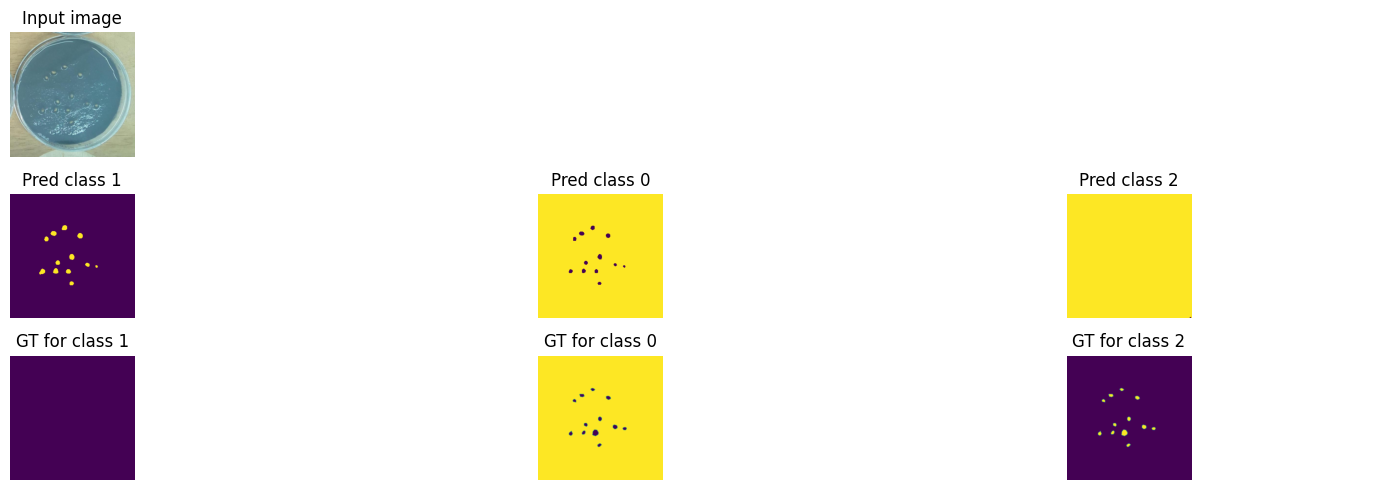

Train loss: 0.50026 | Time: 8m 32s | Val loss: 0.49595
Train_DICE_avg: 0.57283 | Train_Jaccard_avg: 0.52526 | Train_Sensitivity_avg: 0.56034 | Train_Specificity_avg: 0.92119 
Class 0 - Train_DICE: 0.98876 | Train_Jaccard: 0.97784 | Train_Sensitivity: 0.99470 | Train_Specificity: 0.76871 
Class 1 - Train_DICE: 0.27688 | Train_Jaccard: 0.20330 | Train_Sensitivity: 0.24372 | Train_Specificity: 0.99811 
Class 2 - Train_DICE: 0.45285 | Train_Jaccard: 0.39464 | Train_Sensitivity: 0.44260 | Train_Specificity: 0.99675 
Val_DICE_avg: 0.56914 | Val_Jaccard_avg: 0.52986 | Val_Sensitivity_avg: 0.55996 | Val_Specificity_avg: 0.91015 
Class 0 - Val_DICE: 0.99358 | Val_Jaccard: 0.98727 | Val_Sensitivity: 0.99831 | Val_Specificity: 0.73513 
Class 1 - Val_DICE: 0.27190 | Val_Jaccard: 0.20678 | Val_Sensitivity: 0.24574 | Val_Specificity: 0.99788 
Class 2 - Val_DICE: 0.44193 | Val_Jaccard: 0.39552 | Val_Sensitivity: 0.43581 | Val_Specificity: 0.99746 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.48715 | Time: 9m 19s | Val loss: 0.49184
Train_DICE_avg: 0.58308 | Train_Jaccard_avg: 0.53469 | Train_Sensitivity_avg: 0.57223 | Train_Specificity_avg: 0.92583 
Class 0 - Train_DICE: 0.98925 | Train_Jaccard: 0.97880 | Train_Sensitivity: 0.99429 | Train_Specificity: 0.78302 
Class 1 - Train_DICE: 0.29301 | Train_Jaccard: 0.21814 | Train_Sensitivity: 0.26309 | Train_Specificity: 0.99801 
Class 2 - Train_DICE: 0.46698 | Train_Jaccard: 0.40713 | Train_Sensitivity: 0.45932 | Train_Specificity: 0.99647 
Val_DICE_avg: 0.56366 | Val_Jaccard_avg: 0.52416 | Val_Sensitivity_avg: 0.56045 | Val_Specificity_avg: 0.90022 
Class 0 - Val_DICE: 0.99284 | Val_Jaccard: 0.98583 | Val_Sensitivity: 0.99834 | Val_Specificity: 0.70939 
Class 1 - Val_DICE: 0.24824 | Val_Jaccard: 0.18799 | Val_Sensitivity: 0.22428 | Val_Specificity: 0.99807 
Class 2 - Val_DICE: 0.44990 | Val_Jaccard: 0.39867 | Val_Sensitivity: 0.45874 | Val_Specificity: 0.99320 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.47472 | Time: 10m 6s | Val loss: 0.47882
Train_DICE_avg: 0.60745 | Train_Jaccard_avg: 0.55320 | Train_Sensitivity_avg: 0.59278 | Train_Specificity_avg: 0.92861 
Class 0 - Train_DICE: 0.98975 | Train_Jaccard: 0.97976 | Train_Sensitivity: 0.99379 | Train_Specificity: 0.79150 
Class 1 - Train_DICE: 0.31046 | Train_Jaccard: 0.23345 | Train_Sensitivity: 0.28540 | Train_Specificity: 0.99786 
Class 2 - Train_DICE: 0.52215 | Train_Jaccard: 0.44639 | Train_Sensitivity: 0.49915 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.60053 | Val_Jaccard_avg: 0.55108 | Val_Sensitivity_avg: 0.59369 | Val_Specificity_avg: 0.91468 
Class 0 - Val_DICE: 0.99412 | Val_Jaccard: 0.98834 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.75008 
Class 1 - Val_DICE: 0.27056 | Val_Jaccard: 0.20734 | Val_Sensitivity: 0.26401 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.53690 | Val_Jaccard: 0.45757 | Val_Sensitivity: 0.51942 | Val_Specificity: 0.99650 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.45841 | Time: 10m 53s | Val loss: 0.46314
Train_DICE_avg: 0.63558 | Train_Jaccard_avg: 0.57688 | Train_Sensitivity_avg: 0.62048 | Train_Specificity_avg: 0.93331 
Class 0 - Train_DICE: 0.99003 | Train_Jaccard: 0.98033 | Train_Sensitivity: 0.99294 | Train_Specificity: 0.80585 
Class 1 - Train_DICE: 0.32322 | Train_Jaccard: 0.24470 | Train_Sensitivity: 0.30639 | Train_Specificity: 0.99764 
Class 2 - Train_DICE: 0.59349 | Train_Jaccard: 0.50562 | Train_Sensitivity: 0.56211 | Train_Specificity: 0.99645 
Val_DICE_avg: 0.63157 | Val_Jaccard_avg: 0.58178 | Val_Sensitivity_avg: 0.61848 | Val_Specificity_avg: 0.91091 
Class 0 - Val_DICE: 0.99367 | Val_Jaccard: 0.98744 | Val_Sensitivity: 0.99791 | Val_Specificity: 0.73805 
Class 1 - Val_DICE: 0.30626 | Val_Jaccard: 0.24006 | Val_Sensitivity: 0.30476 | Val_Specificity: 0.99740 
Class 2 - Val_DICE: 0.59477 | Val_Jaccard: 0.51784 | Val_Sensitivity: 0.55279 | Val_Specificity: 0.99729 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.43594 | Time: 11m 40s | Val loss: 0.45150
Train_DICE_avg: 0.65634 | Train_Jaccard_avg: 0.59634 | Train_Sensitivity_avg: 0.64588 | Train_Specificity_avg: 0.93603 
Class 0 - Train_DICE: 0.99051 | Train_Jaccard: 0.98125 | Train_Sensitivity: 0.99299 | Train_Specificity: 0.81438 
Class 1 - Train_DICE: 0.33343 | Train_Jaccard: 0.25566 | Train_Sensitivity: 0.32782 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.64509 | Train_Jaccard: 0.55211 | Train_Sensitivity: 0.61684 | Train_Specificity: 0.99613 
Val_DICE_avg: 0.62996 | Val_Jaccard_avg: 0.58069 | Val_Sensitivity_avg: 0.62177 | Val_Specificity_avg: 0.90256 
Class 0 - Val_DICE: 0.99304 | Val_Jaccard: 0.98622 | Val_Sensitivity: 0.99799 | Val_Specificity: 0.71352 
Class 1 - Val_DICE: 0.27534 | Val_Jaccard: 0.21646 | Val_Sensitivity: 0.27545 | Val_Specificity: 0.99779 
Class 2 - Val_DICE: 0.62152 | Val_Jaccard: 0.53940 | Val_Sensitivity: 0.59186 | Val_Specificity: 0.99637 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


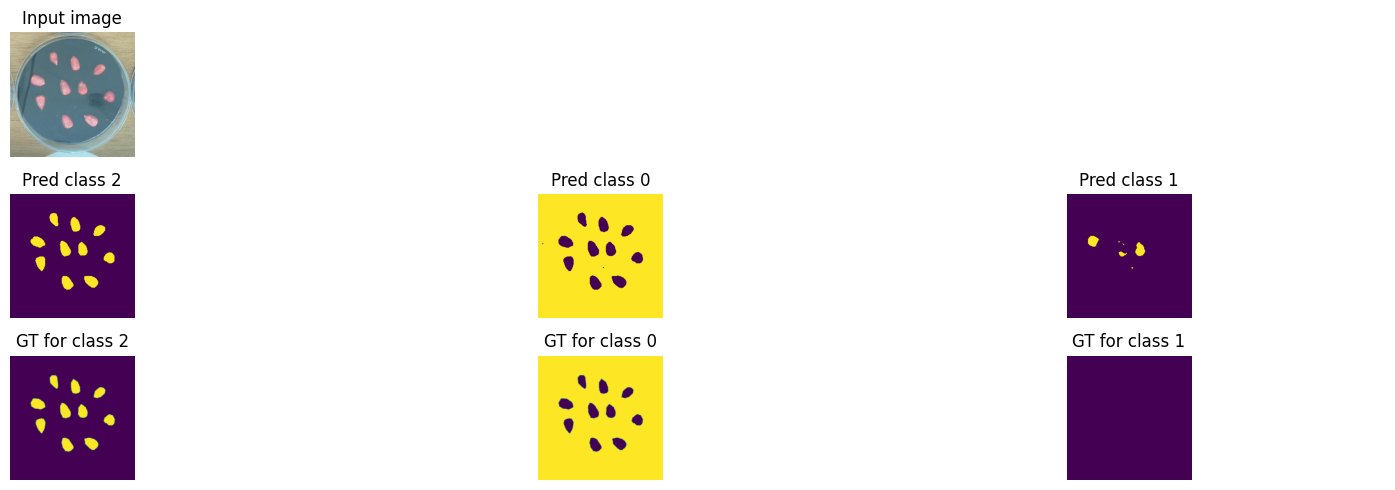

Train loss: 0.42012 | Time: 12m 28s | Val loss: 0.43870
Train_DICE_avg: 0.67104 | Train_Jaccard_avg: 0.61054 | Train_Sensitivity_avg: 0.66507 | Train_Specificity_avg: 0.93851 
Class 0 - Train_DICE: 0.99075 | Train_Jaccard: 0.98173 | Train_Sensitivity: 0.99297 | Train_Specificity: 0.82219 
Class 1 - Train_DICE: 0.34640 | Train_Jaccard: 0.26757 | Train_Sensitivity: 0.35001 | Train_Specificity: 0.99747 
Class 2 - Train_DICE: 0.67595 | Train_Jaccard: 0.58232 | Train_Sensitivity: 0.65224 | Train_Specificity: 0.99587 
Val_DICE_avg: 0.65852 | Val_Jaccard_avg: 0.60817 | Val_Sensitivity_avg: 0.64831 | Val_Specificity_avg: 0.89698 
Class 0 - Val_DICE: 0.99252 | Val_Jaccard: 0.98519 | Val_Sensitivity: 0.99841 | Val_Specificity: 0.69510 
Class 1 - Val_DICE: 0.30680 | Val_Jaccard: 0.24674 | Val_Sensitivity: 0.32515 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.67623 | Val_Jaccard: 0.59258 | Val_Sensitivity: 0.62137 | Val_Specificity: 0.99819 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.40679 | Time: 13m 15s | Val loss: 0.42872
Train_DICE_avg: 0.67796 | Train_Jaccard_avg: 0.61692 | Train_Sensitivity_avg: 0.67568 | Train_Specificity_avg: 0.94040 
Class 0 - Train_DICE: 0.99101 | Train_Jaccard: 0.98223 | Train_Sensitivity: 0.99315 | Train_Specificity: 0.82806 
Class 1 - Train_DICE: 0.35086 | Train_Jaccard: 0.27144 | Train_Sensitivity: 0.36009 | Train_Specificity: 0.99739 
Class 2 - Train_DICE: 0.69203 | Train_Jaccard: 0.59708 | Train_Sensitivity: 0.67379 | Train_Specificity: 0.99576 
Val_DICE_avg: 0.67263 | Val_Jaccard_avg: 0.62057 | Val_Sensitivity_avg: 0.65929 | Val_Specificity_avg: 0.90687 
Class 0 - Val_DICE: 0.99357 | Val_Jaccard: 0.98724 | Val_Sensitivity: 0.99832 | Val_Specificity: 0.72549 
Class 1 - Val_DICE: 0.32505 | Val_Jaccard: 0.25943 | Val_Sensitivity: 0.32397 | Val_Specificity: 0.99770 
Class 2 - Val_DICE: 0.69927 | Val_Jaccard: 0.61505 | Val_Sensitivity: 0.65557 | Val_Specificity: 0.99743 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.39296 | Time: 14m 2s | Val loss: 0.42682
Train_DICE_avg: 0.69001 | Train_Jaccard_avg: 0.62950 | Train_Sensitivity_avg: 0.69040 | Train_Specificity_avg: 0.94178 
Class 0 - Train_DICE: 0.99110 | Train_Jaccard: 0.98241 | Train_Sensitivity: 0.99308 | Train_Specificity: 0.83240 
Class 1 - Train_DICE: 0.36103 | Train_Jaccard: 0.28158 | Train_Sensitivity: 0.37462 | Train_Specificity: 0.99732 
Class 2 - Train_DICE: 0.71789 | Train_Jaccard: 0.62452 | Train_Sensitivity: 0.70349 | Train_Specificity: 0.99561 
Val_DICE_avg: 0.66382 | Val_Jaccard_avg: 0.61395 | Val_Sensitivity_avg: 0.65946 | Val_Specificity_avg: 0.89383 
Class 0 - Val_DICE: 0.99203 | Val_Jaccard: 0.98425 | Val_Sensitivity: 0.99820 | Val_Specificity: 0.68638 
Class 1 - Val_DICE: 0.30323 | Val_Jaccard: 0.24436 | Val_Sensitivity: 0.32527 | Val_Specificity: 0.99761 
Class 2 - Val_DICE: 0.69620 | Val_Jaccard: 0.61323 | Val_Sensitivity: 0.65490 | Val_Specificity: 0.99749 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.37558 | Time: 14m 49s | Val loss: 0.39598
Train_DICE_avg: 0.70352 | Train_Jaccard_avg: 0.64565 | Train_Sensitivity_avg: 0.71024 | Train_Specificity_avg: 0.94419 
Class 0 - Train_DICE: 0.99133 | Train_Jaccard: 0.98288 | Train_Sensitivity: 0.99330 | Train_Specificity: 0.83974 
Class 1 - Train_DICE: 0.37322 | Train_Jaccard: 0.29423 | Train_Sensitivity: 0.39480 | Train_Specificity: 0.99724 
Class 2 - Train_DICE: 0.74602 | Train_Jaccard: 0.65985 | Train_Sensitivity: 0.74261 | Train_Specificity: 0.99559 
Val_DICE_avg: 0.68741 | Val_Jaccard_avg: 0.64015 | Val_Sensitivity_avg: 0.68159 | Val_Specificity_avg: 0.91308 
Class 0 - Val_DICE: 0.99394 | Val_Jaccard: 0.98799 | Val_Sensitivity: 0.99819 | Val_Specificity: 0.74475 
Class 1 - Val_DICE: 0.32586 | Val_Jaccard: 0.26157 | Val_Sensitivity: 0.31987 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.74242 | Val_Jaccard: 0.67090 | Val_Sensitivity: 0.72671 | Val_Specificity: 0.99659 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.35995 | Time: 15m 36s | Val loss: 0.38416
Train_DICE_avg: 0.70996 | Train_Jaccard_avg: 0.65135 | Train_Sensitivity_avg: 0.71975 | Train_Specificity_avg: 0.94576 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98295 | Train_Sensitivity: 0.99283 | Train_Specificity: 0.84483 
Class 1 - Train_DICE: 0.37723 | Train_Jaccard: 0.29672 | Train_Sensitivity: 0.39865 | Train_Specificity: 0.99727 
Class 2 - Train_DICE: 0.76128 | Train_Jaccard: 0.67439 | Train_Sensitivity: 0.76777 | Train_Specificity: 0.99519 
Val_DICE_avg: 0.69920 | Val_Jaccard_avg: 0.65230 | Val_Sensitivity_avg: 0.69256 | Val_Specificity_avg: 0.90368 
Class 0 - Val_DICE: 0.99301 | Val_Jaccard: 0.98616 | Val_Sensitivity: 0.99846 | Val_Specificity: 0.71549 
Class 1 - Val_DICE: 0.34242 | Val_Jaccard: 0.28035 | Val_Sensitivity: 0.35533 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.76218 | Val_Jaccard: 0.69038 | Val_Sensitivity: 0.72390 | Val_Specificity: 0.99772 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


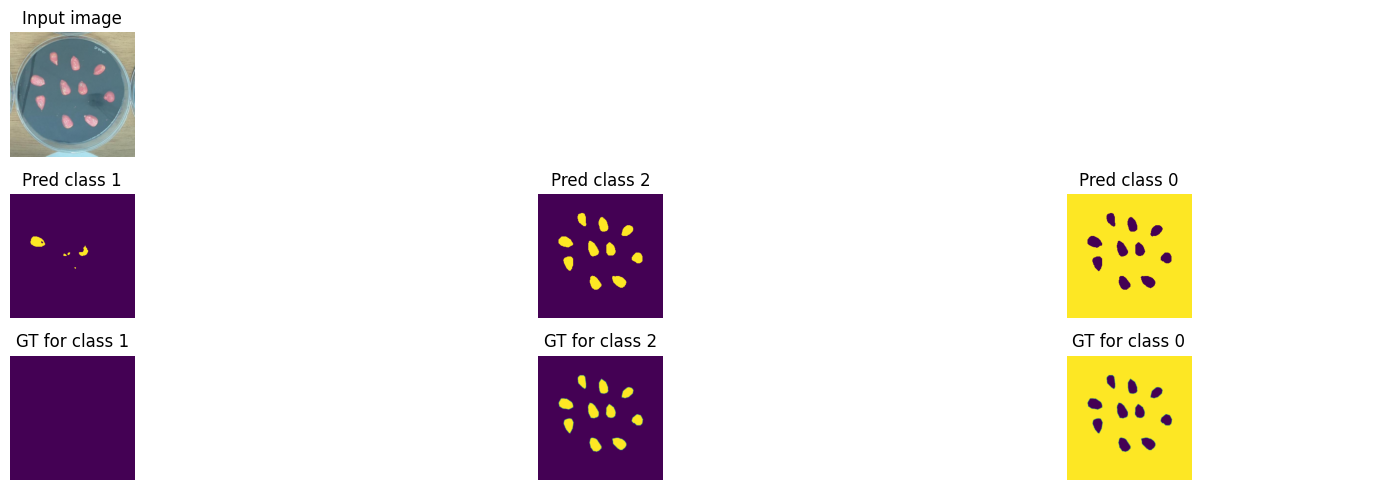

Train loss: 0.34506 | Time: 16m 24s | Val loss: 0.36333
Train_DICE_avg: 0.71708 | Train_Jaccard_avg: 0.65842 | Train_Sensitivity_avg: 0.73072 | Train_Specificity_avg: 0.94969 
Class 0 - Train_DICE: 0.99169 | Train_Jaccard: 0.98358 | Train_Sensitivity: 0.99240 | Train_Specificity: 0.85707 
Class 1 - Train_DICE: 0.38233 | Train_Jaccard: 0.30147 | Train_Sensitivity: 0.40995 | Train_Specificity: 0.99714 
Class 2 - Train_DICE: 0.77720 | Train_Jaccard: 0.69022 | Train_Sensitivity: 0.78981 | Train_Specificity: 0.99486 
Val_DICE_avg: 0.70809 | Val_Jaccard_avg: 0.66182 | Val_Sensitivity_avg: 0.70895 | Val_Specificity_avg: 0.91904 
Class 0 - Val_DICE: 0.99455 | Val_Jaccard: 0.98919 | Val_Sensitivity: 0.99804 | Val_Specificity: 0.76255 
Class 1 - Val_DICE: 0.36317 | Val_Jaccard: 0.29562 | Val_Sensitivity: 0.38100 | Val_Specificity: 0.99757 
Class 2 - Val_DICE: 0.76655 | Val_Jaccard: 0.70064 | Val_Sensitivity: 0.74781 | Val_Specificity: 0.99700 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.33373 | Time: 17m 11s | Val loss: 0.34820
Train_DICE_avg: 0.72055 | Train_Jaccard_avg: 0.66141 | Train_Sensitivity_avg: 0.73649 | Train_Specificity_avg: 0.95096 
Class 0 - Train_DICE: 0.99190 | Train_Jaccard: 0.98399 | Train_Sensitivity: 0.99243 | Train_Specificity: 0.86095 
Class 1 - Train_DICE: 0.38694 | Train_Jaccard: 0.30592 | Train_Sensitivity: 0.41844 | Train_Specificity: 0.99711 
Class 2 - Train_DICE: 0.78281 | Train_Jaccard: 0.69432 | Train_Sensitivity: 0.79861 | Train_Specificity: 0.99483 
Val_DICE_avg: 0.71435 | Val_Jaccard_avg: 0.66432 | Val_Sensitivity_avg: 0.71100 | Val_Specificity_avg: 0.92140 
Class 0 - Val_DICE: 0.99473 | Val_Jaccard: 0.98953 | Val_Sensitivity: 0.99816 | Val_Specificity: 0.76974 
Class 1 - Val_DICE: 0.35959 | Val_Jaccard: 0.28709 | Val_Sensitivity: 0.36261 | Val_Specificity: 0.99753 
Class 2 - Val_DICE: 0.78874 | Val_Jaccard: 0.71633 | Val_Sensitivity: 0.77221 | Val_Specificity: 0.99693 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.32522 | Time: 17m 59s | Val loss: 0.34286
Train_DICE_avg: 0.72317 | Train_Jaccard_avg: 0.66322 | Train_Sensitivity_avg: 0.74147 | Train_Specificity_avg: 0.95013 
Class 0 - Train_DICE: 0.99199 | Train_Jaccard: 0.98417 | Train_Sensitivity: 0.99297 | Train_Specificity: 0.85860 
Class 1 - Train_DICE: 0.38813 | Train_Jaccard: 0.30618 | Train_Sensitivity: 0.42417 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.78938 | Train_Jaccard: 0.69932 | Train_Sensitivity: 0.80726 | Train_Specificity: 0.99469 
Val_DICE_avg: 0.72806 | Val_Jaccard_avg: 0.67468 | Val_Sensitivity_avg: 0.73714 | Val_Specificity_avg: 0.92818 
Class 0 - Val_DICE: 0.99513 | Val_Jaccard: 0.99032 | Val_Sensitivity: 0.99749 | Val_Specificity: 0.79078 
Class 1 - Val_DICE: 0.34473 | Val_Jaccard: 0.27398 | Val_Sensitivity: 0.38450 | Val_Specificity: 0.99701 
Class 2 - Val_DICE: 0.84433 | Val_Jaccard: 0.75973 | Val_Sensitivity: 0.82942 | Val_Specificity: 0.99675 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.31430 | Time: 18m 46s | Val loss: 0.31949
Train_DICE_avg: 0.73661 | Train_Jaccard_avg: 0.67494 | Train_Sensitivity_avg: 0.75591 | Train_Specificity_avg: 0.95065 
Class 0 - Train_DICE: 0.99192 | Train_Jaccard: 0.98403 | Train_Sensitivity: 0.99284 | Train_Specificity: 0.86008 
Class 1 - Train_DICE: 0.39471 | Train_Jaccard: 0.31352 | Train_Sensitivity: 0.43610 | Train_Specificity: 0.99709 
Class 2 - Train_DICE: 0.82320 | Train_Jaccard: 0.72727 | Train_Sensitivity: 0.83878 | Train_Specificity: 0.99479 
Val_DICE_avg: 0.74302 | Val_Jaccard_avg: 0.69079 | Val_Sensitivity_avg: 0.75083 | Val_Specificity_avg: 0.93744 
Class 0 - Val_DICE: 0.99532 | Val_Jaccard: 0.99071 | Val_Sensitivity: 0.99774 | Val_Specificity: 0.81841 
Class 1 - Val_DICE: 0.35719 | Val_Jaccard: 0.28825 | Val_Sensitivity: 0.38543 | Val_Specificity: 0.99729 
Class 2 - Val_DICE: 0.87654 | Val_Jaccard: 0.79341 | Val_Sensitivity: 0.86932 | Val_Specificity: 0.99664 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.29791 | Time: 19m 33s | Val loss: 0.30968
Train_DICE_avg: 0.75057 | Train_Jaccard_avg: 0.68762 | Train_Sensitivity_avg: 0.77464 | Train_Specificity_avg: 0.95230 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98354 | Train_Sensitivity: 0.99248 | Train_Specificity: 0.86523 
Class 1 - Train_DICE: 0.40621 | Train_Jaccard: 0.32400 | Train_Sensitivity: 0.44877 | Train_Specificity: 0.99706 
Class 2 - Train_DICE: 0.85383 | Train_Jaccard: 0.75531 | Train_Sensitivity: 0.88268 | Train_Specificity: 0.99460 
Val_DICE_avg: 0.74518 | Val_Jaccard_avg: 0.69192 | Val_Sensitivity_avg: 0.76124 | Val_Specificity_avg: 0.93747 
Class 0 - Val_DICE: 0.99538 | Val_Jaccard: 0.99082 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.81895 
Class 1 - Val_DICE: 0.35983 | Val_Jaccard: 0.28713 | Val_Sensitivity: 0.39641 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.88034 | Val_Jaccard: 0.79781 | Val_Sensitivity: 0.88946 | Val_Specificity: 0.99646 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


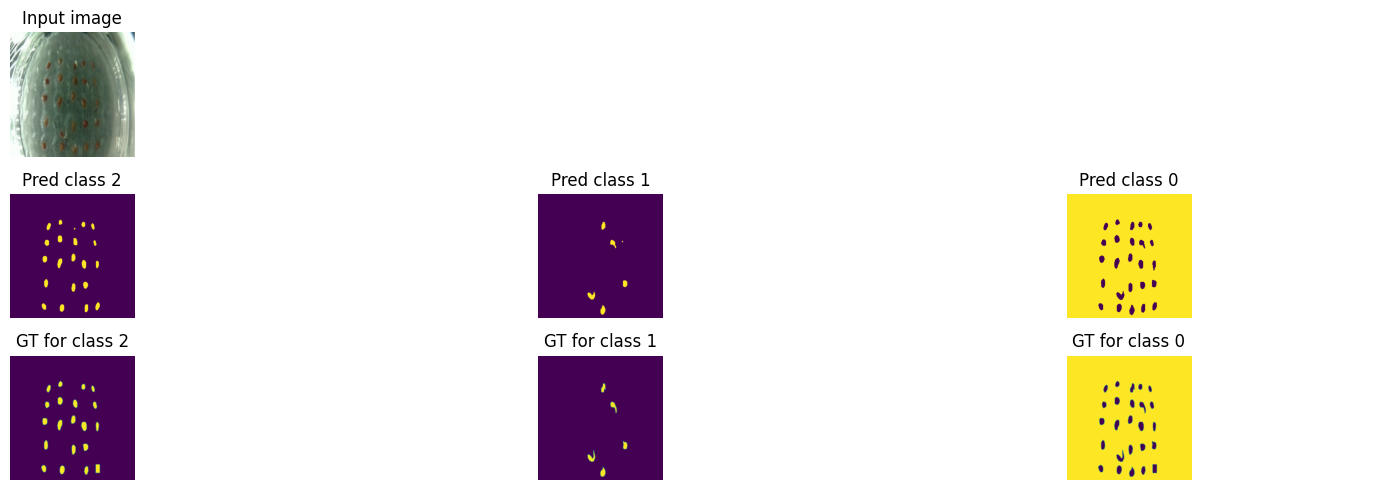

Train loss: 0.28671 | Time: 20m 21s | Val loss: 0.29601
Train_DICE_avg: 0.75376 | Train_Jaccard_avg: 0.69123 | Train_Sensitivity_avg: 0.78079 | Train_Specificity_avg: 0.95268 
Class 0 - Train_DICE: 0.99189 | Train_Jaccard: 0.98396 | Train_Sensitivity: 0.99294 | Train_Specificity: 0.86648 
Class 1 - Train_DICE: 0.41186 | Train_Jaccard: 0.32970 | Train_Sensitivity: 0.45610 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.85754 | Train_Jaccard: 0.76002 | Train_Sensitivity: 0.89331 | Train_Specificity: 0.99453 
Val_DICE_avg: 0.75107 | Val_Jaccard_avg: 0.69825 | Val_Sensitivity_avg: 0.76967 | Val_Specificity_avg: 0.93741 
Class 0 - Val_DICE: 0.99554 | Val_Jaccard: 0.99114 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.81898 
Class 1 - Val_DICE: 0.37967 | Val_Jaccard: 0.30964 | Val_Sensitivity: 0.39976 | Val_Specificity: 0.99765 
Class 2 - Val_DICE: 0.87799 | Val_Jaccard: 0.79396 | Val_Sensitivity: 0.91120 | Val_Specificity: 0.99559 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.28017 | Time: 21m 9s | Val loss: 0.29057
Train_DICE_avg: 0.75512 | Train_Jaccard_avg: 0.69209 | Train_Sensitivity_avg: 0.78447 | Train_Specificity_avg: 0.95292 
Class 0 - Train_DICE: 0.99195 | Train_Jaccard: 0.98409 | Train_Sensitivity: 0.99316 | Train_Specificity: 0.86734 
Class 1 - Train_DICE: 0.41752 | Train_Jaccard: 0.33439 | Train_Sensitivity: 0.46454 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.85589 | Train_Jaccard: 0.75777 | Train_Sensitivity: 0.89571 | Train_Specificity: 0.99444 
Val_DICE_avg: 0.75368 | Val_Jaccard_avg: 0.70124 | Val_Sensitivity_avg: 0.77006 | Val_Specificity_avg: 0.94362 
Class 0 - Val_DICE: 0.99566 | Val_Jaccard: 0.99137 | Val_Sensitivity: 0.99774 | Val_Specificity: 0.83764 
Class 1 - Val_DICE: 0.38574 | Val_Jaccard: 0.31689 | Val_Sensitivity: 0.41829 | Val_Specificity: 0.99741 
Class 2 - Val_DICE: 0.87965 | Val_Jaccard: 0.79545 | Val_Sensitivity: 0.89416 | Val_Specificity: 0.99581 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.27223 | Time: 21m 56s | Val loss: 0.28451
Train_DICE_avg: 0.75683 | Train_Jaccard_avg: 0.69409 | Train_Sensitivity_avg: 0.78812 | Train_Specificity_avg: 0.95214 
Class 0 - Train_DICE: 0.99194 | Train_Jaccard: 0.98406 | Train_Sensitivity: 0.99334 | Train_Specificity: 0.86502 
Class 1 - Train_DICE: 0.42097 | Train_Jaccard: 0.33813 | Train_Sensitivity: 0.47095 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.85757 | Train_Jaccard: 0.76008 | Train_Sensitivity: 0.90005 | Train_Specificity: 0.99438 
Val_DICE_avg: 0.75833 | Val_Jaccard_avg: 0.70566 | Val_Sensitivity_avg: 0.78018 | Val_Specificity_avg: 0.94055 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99063 | Val_Sensitivity: 0.99792 | Val_Specificity: 0.82794 
Class 1 - Val_DICE: 0.39395 | Val_Jaccard: 0.32146 | Val_Sensitivity: 0.43919 | Val_Specificity: 0.99721 
Class 2 - Val_DICE: 0.88578 | Val_Jaccard: 0.80488 | Val_Sensitivity: 0.90345 | Val_Specificity: 0.99650 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.26843 | Time: 22m 43s | Val loss: 0.28220
Train_DICE_avg: 0.75793 | Train_Jaccard_avg: 0.69517 | Train_Sensitivity_avg: 0.79101 | Train_Specificity_avg: 0.95167 
Class 0 - Train_DICE: 0.99211 | Train_Jaccard: 0.98440 | Train_Sensitivity: 0.99371 | Train_Specificity: 0.86374 
Class 1 - Train_DICE: 0.42420 | Train_Jaccard: 0.34144 | Train_Sensitivity: 0.47507 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.85747 | Train_Jaccard: 0.75965 | Train_Sensitivity: 0.90426 | Train_Specificity: 0.99425 
Val_DICE_avg: 0.75053 | Val_Jaccard_avg: 0.69744 | Val_Sensitivity_avg: 0.77607 | Val_Specificity_avg: 0.93469 
Class 0 - Val_DICE: 0.99545 | Val_Jaccard: 0.99096 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.81132 
Class 1 - Val_DICE: 0.37375 | Val_Jaccard: 0.30225 | Val_Sensitivity: 0.42678 | Val_Specificity: 0.99690 
Class 2 - Val_DICE: 0.88240 | Val_Jaccard: 0.79911 | Val_Sensitivity: 0.90354 | Val_Specificity: 0.99585 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.26511 | Time: 23m 30s | Val loss: 0.28020
Train_DICE_avg: 0.76128 | Train_Jaccard_avg: 0.69839 | Train_Sensitivity_avg: 0.79706 | Train_Specificity_avg: 0.95089 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98419 | Train_Sensitivity: 0.99373 | Train_Specificity: 0.86140 
Class 1 - Train_DICE: 0.43458 | Train_Jaccard: 0.35115 | Train_Sensitivity: 0.49408 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.85728 | Train_Jaccard: 0.75984 | Train_Sensitivity: 0.90336 | Train_Specificity: 0.99429 
Val_DICE_avg: 0.74486 | Val_Jaccard_avg: 0.69096 | Val_Sensitivity_avg: 0.76466 | Val_Specificity_avg: 0.93393 
Class 0 - Val_DICE: 0.99534 | Val_Jaccard: 0.99074 | Val_Sensitivity: 0.99784 | Val_Specificity: 0.80925 
Class 1 - Val_DICE: 0.36035 | Val_Jaccard: 0.28826 | Val_Sensitivity: 0.38413 | Val_Specificity: 0.99725 
Class 2 - Val_DICE: 0.87890 | Val_Jaccard: 0.79387 | Val_Sensitivity: 0.91201 | Val_Specificity: 0.99529 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


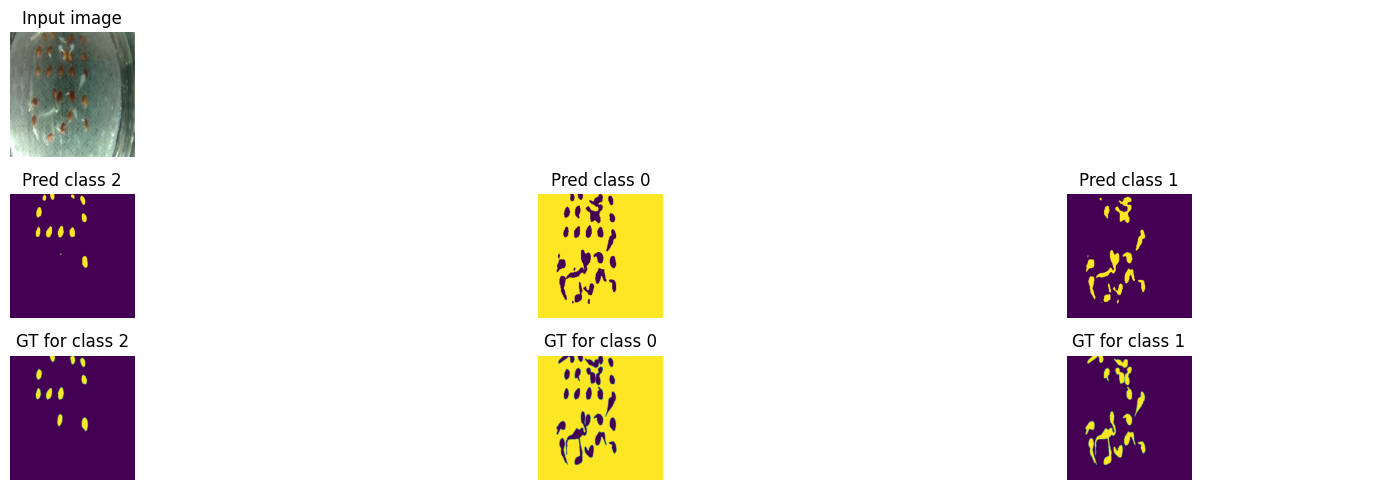

Train loss: 0.25966 | Time: 24m 18s | Val loss: 0.27243
Train_DICE_avg: 0.76754 | Train_Jaccard_avg: 0.70470 | Train_Sensitivity_avg: 0.80360 | Train_Specificity_avg: 0.95232 
Class 0 - Train_DICE: 0.99196 | Train_Jaccard: 0.98410 | Train_Sensitivity: 0.99372 | Train_Specificity: 0.86576 
Class 1 - Train_DICE: 0.45250 | Train_Jaccard: 0.36950 | Train_Sensitivity: 0.51167 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.85817 | Train_Jaccard: 0.76051 | Train_Sensitivity: 0.90542 | Train_Specificity: 0.99420 
Val_DICE_avg: 0.75152 | Val_Jaccard_avg: 0.69763 | Val_Sensitivity_avg: 0.78328 | Val_Specificity_avg: 0.94566 
Class 0 - Val_DICE: 0.99592 | Val_Jaccard: 0.99189 | Val_Sensitivity: 0.99779 | Val_Specificity: 0.84486 
Class 1 - Val_DICE: 0.38195 | Val_Jaccard: 0.31134 | Val_Sensitivity: 0.41948 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.87669 | Val_Jaccard: 0.78968 | Val_Sensitivity: 0.93258 | Val_Specificity: 0.99455 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.25462 | Time: 25m 6s | Val loss: 0.26594
Train_DICE_avg: 0.77246 | Train_Jaccard_avg: 0.71009 | Train_Sensitivity_avg: 0.81100 | Train_Specificity_avg: 0.95177 
Class 0 - Train_DICE: 0.99222 | Train_Jaccard: 0.98462 | Train_Sensitivity: 0.99404 | Train_Specificity: 0.86409 
Class 1 - Train_DICE: 0.46675 | Train_Jaccard: 0.38456 | Train_Sensitivity: 0.53058 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.85842 | Train_Jaccard: 0.76109 | Train_Sensitivity: 0.90839 | Train_Specificity: 0.99419 
Val_DICE_avg: 0.76015 | Val_Jaccard_avg: 0.70846 | Val_Sensitivity_avg: 0.79029 | Val_Specificity_avg: 0.93522 
Class 0 - Val_DICE: 0.99545 | Val_Jaccard: 0.99095 | Val_Sensitivity: 0.99776 | Val_Specificity: 0.81272 
Class 1 - Val_DICE: 0.39870 | Val_Jaccard: 0.32933 | Val_Sensitivity: 0.46789 | Val_Specificity: 0.99691 
Class 2 - Val_DICE: 0.88632 | Val_Jaccard: 0.80509 | Val_Sensitivity: 0.90521 | Val_Specificity: 0.99604 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.24930 | Time: 25m 53s | Val loss: 0.25944
Train_DICE_avg: 0.78840 | Train_Jaccard_avg: 0.72634 | Train_Sensitivity_avg: 0.83234 | Train_Specificity_avg: 0.95103 
Class 0 - Train_DICE: 0.99220 | Train_Jaccard: 0.98458 | Train_Sensitivity: 0.99405 | Train_Specificity: 0.86192 
Class 1 - Train_DICE: 0.51373 | Train_Jaccard: 0.43247 | Train_Sensitivity: 0.59203 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.85926 | Train_Jaccard: 0.76196 | Train_Sensitivity: 0.91094 | Train_Specificity: 0.99414 
Val_DICE_avg: 0.76744 | Val_Jaccard_avg: 0.71728 | Val_Sensitivity_avg: 0.79723 | Val_Specificity_avg: 0.93034 
Class 0 - Val_DICE: 0.99490 | Val_Jaccard: 0.98987 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.79740 
Class 1 - Val_DICE: 0.41709 | Val_Jaccard: 0.34875 | Val_Sensitivity: 0.48464 | Val_Specificity: 0.99705 
Class 2 - Val_DICE: 0.89033 | Val_Jaccard: 0.81323 | Val_Sensitivity: 0.90891 | Val_Specificity: 0.99657 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.23908 | Time: 26m 40s | Val loss: 0.22962
Train_DICE_avg: 0.79108 | Train_Jaccard_avg: 0.72946 | Train_Sensitivity_avg: 0.83786 | Train_Specificity_avg: 0.95073 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98420 | Train_Sensitivity: 0.99390 | Train_Specificity: 0.86099 
Class 1 - Train_DICE: 0.52086 | Train_Jaccard: 0.44045 | Train_Sensitivity: 0.60807 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86037 | Train_Jaccard: 0.76372 | Train_Sensitivity: 0.91160 | Train_Specificity: 0.99420 
Val_DICE_avg: 0.79488 | Val_Jaccard_avg: 0.74467 | Val_Sensitivity_avg: 0.83865 | Val_Specificity_avg: 0.93167 
Class 0 - Val_DICE: 0.99517 | Val_Jaccard: 0.99041 | Val_Sensitivity: 0.99800 | Val_Specificity: 0.80203 
Class 1 - Val_DICE: 0.50501 | Val_Jaccard: 0.44077 | Val_Sensitivity: 0.61165 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.88447 | Val_Jaccard: 0.80283 | Val_Sensitivity: 0.90630 | Val_Specificity: 0.99610 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


Train loss: 0.23015 | Time: 27m 28s | Val loss: 0.22957
Train_DICE_avg: 0.80604 | Train_Jaccard_avg: 0.74515 | Train_Sensitivity_avg: 0.85844 | Train_Specificity_avg: 0.95075 
Class 0 - Train_DICE: 0.99203 | Train_Jaccard: 0.98424 | Train_Sensitivity: 0.99400 | Train_Specificity: 0.86107 
Class 1 - Train_DICE: 0.56697 | Train_Jaccard: 0.48869 | Train_Sensitivity: 0.66991 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.85914 | Train_Jaccard: 0.76252 | Train_Sensitivity: 0.91143 | Train_Specificity: 0.99421 
Val_DICE_avg: 0.80073 | Val_Jaccard_avg: 0.74742 | Val_Sensitivity_avg: 0.84231 | Val_Specificity_avg: 0.94161 
Class 0 - Val_DICE: 0.99564 | Val_Jaccard: 0.99134 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.83263 
Class 1 - Val_DICE: 0.54402 | Val_Jaccard: 0.47520 | Val_Sensitivity: 0.58411 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.86253 | Val_Jaccard: 0.77573 | Val_Sensitivity: 0.94478 | Val_Specificity: 0.99473 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


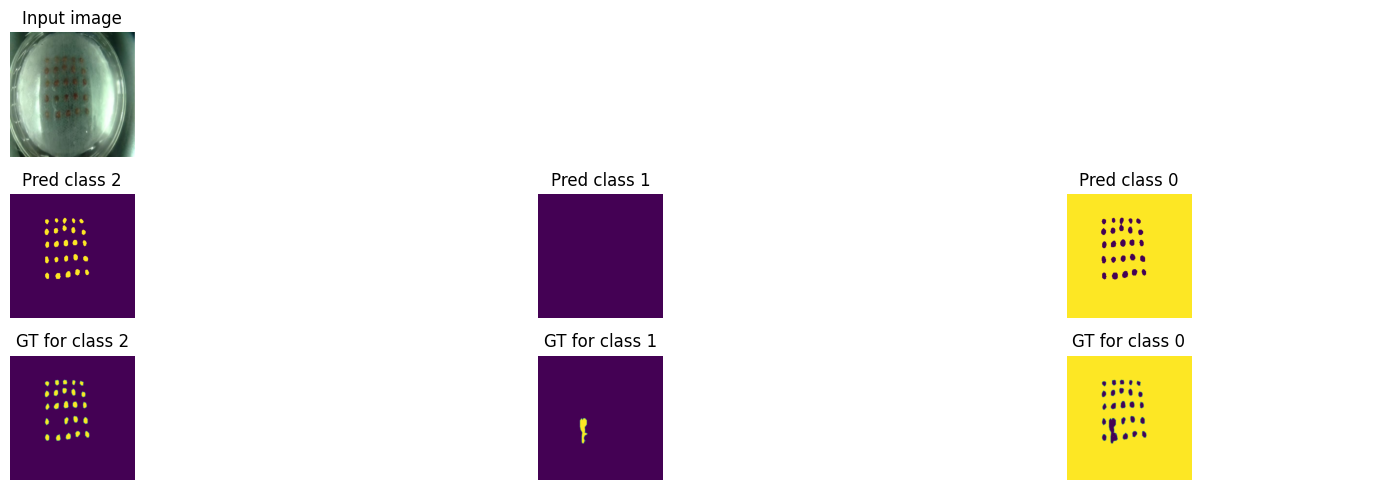

Train loss: 0.21992 | Time: 28m 16s | Val loss: 0.19302
Train_DICE_avg: 0.81721 | Train_Jaccard_avg: 0.75678 | Train_Sensitivity_avg: 0.87300 | Train_Specificity_avg: 0.95035 
Class 0 - Train_DICE: 0.99192 | Train_Jaccard: 0.98402 | Train_Sensitivity: 0.99391 | Train_Specificity: 0.85994 
Class 1 - Train_DICE: 0.60094 | Train_Jaccard: 0.52477 | Train_Sensitivity: 0.71443 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.85876 | Train_Jaccard: 0.76155 | Train_Sensitivity: 0.91066 | Train_Specificity: 0.99411 
Val_DICE_avg: 0.82619 | Val_Jaccard_avg: 0.77714 | Val_Sensitivity_avg: 0.87536 | Val_Specificity_avg: 0.92832 
Class 0 - Val_DICE: 0.99487 | Val_Jaccard: 0.98982 | Val_Sensitivity: 0.99833 | Val_Specificity: 0.79184 
Class 1 - Val_DICE: 0.60782 | Val_Jaccard: 0.54992 | Val_Sensitivity: 0.70687 | Val_Specificity: 0.99735 
Class 2 - Val_DICE: 0.87589 | Val_Jaccard: 0.79168 | Val_Sensitivity: 0.92087 | Val_Specificity: 0.99576 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


Train loss: 0.20908 | Time: 29m 3s | Val loss: 0.18601
Train_DICE_avg: 0.82432 | Train_Jaccard_avg: 0.76380 | Train_Sensitivity_avg: 0.87950 | Train_Specificity_avg: 0.94912 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98373 | Train_Sensitivity: 0.99396 | Train_Specificity: 0.85623 
Class 1 - Train_DICE: 0.62186 | Train_Jaccard: 0.54511 | Train_Sensitivity: 0.73103 | Train_Specificity: 0.99700 
Class 2 - Train_DICE: 0.85932 | Train_Jaccard: 0.76255 | Train_Sensitivity: 0.91352 | Train_Specificity: 0.99413 
Val_DICE_avg: 0.84015 | Val_Jaccard_avg: 0.79043 | Val_Sensitivity_avg: 0.87972 | Val_Specificity_avg: 0.93181 
Class 0 - Val_DICE: 0.99479 | Val_Jaccard: 0.98966 | Val_Sensitivity: 0.99821 | Val_Specificity: 0.80204 
Class 1 - Val_DICE: 0.64096 | Val_Jaccard: 0.57815 | Val_Sensitivity: 0.71969 | Val_Specificity: 0.99728 
Class 2 - Val_DICE: 0.88470 | Val_Jaccard: 0.80347 | Val_Sensitivity: 0.92127 | Val_Specificity: 0.99611 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.20252 | Time: 29m 51s | Val loss: 0.17883
Train_DICE_avg: 0.82569 | Train_Jaccard_avg: 0.76566 | Train_Sensitivity_avg: 0.87999 | Train_Specificity_avg: 0.94981 
Class 0 - Train_DICE: 0.99193 | Train_Jaccard: 0.98404 | Train_Sensitivity: 0.99425 | Train_Specificity: 0.85819 
Class 1 - Train_DICE: 0.62422 | Train_Jaccard: 0.54771 | Train_Sensitivity: 0.73238 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.86092 | Train_Jaccard: 0.76523 | Train_Sensitivity: 0.91334 | Train_Specificity: 0.99421 
Val_DICE_avg: 0.84410 | Val_Jaccard_avg: 0.79452 | Val_Sensitivity_avg: 0.88988 | Val_Specificity_avg: 0.93182 
Class 0 - Val_DICE: 0.99490 | Val_Jaccard: 0.98988 | Val_Sensitivity: 0.99836 | Val_Specificity: 0.80224 
Class 1 - Val_DICE: 0.65371 | Val_Jaccard: 0.59123 | Val_Sensitivity: 0.74389 | Val_Specificity: 0.99726 
Class 2 - Val_DICE: 0.88370 | Val_Jaccard: 0.80246 | Val_Sensitivity: 0.92741 | Val_Specificity: 0.99596 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.19743 | Time: 30m 38s | Val loss: 0.17791
Train_DICE_avg: 0.83203 | Train_Jaccard_avg: 0.77242 | Train_Sensitivity_avg: 0.89162 | Train_Specificity_avg: 0.94976 
Class 0 - Train_DICE: 0.99191 | Train_Jaccard: 0.98400 | Train_Sensitivity: 0.99420 | Train_Specificity: 0.85806 
Class 1 - Train_DICE: 0.64090 | Train_Jaccard: 0.56527 | Train_Sensitivity: 0.76494 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.86329 | Train_Jaccard: 0.76799 | Train_Sensitivity: 0.91572 | Train_Specificity: 0.99423 
Val_DICE_avg: 0.83478 | Val_Jaccard_avg: 0.78379 | Val_Sensitivity_avg: 0.88520 | Val_Specificity_avg: 0.93212 
Class 0 - Val_DICE: 0.99511 | Val_Jaccard: 0.99030 | Val_Sensitivity: 0.99821 | Val_Specificity: 0.80398 
Class 1 - Val_DICE: 0.63107 | Val_Jaccard: 0.56794 | Val_Sensitivity: 0.72828 | Val_Specificity: 0.99735 
Class 2 - Val_DICE: 0.87816 | Val_Jaccard: 0.79314 | Val_Sensitivity: 0.92911 | Val_Specificity: 0.99503 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.19293 | Time: 31m 26s | Val loss: 0.17452
Train_DICE_avg: 0.83271 | Train_Jaccard_avg: 0.77328 | Train_Sensitivity_avg: 0.89076 | Train_Specificity_avg: 0.94979 
Class 0 - Train_DICE: 0.99204 | Train_Jaccard: 0.98426 | Train_Sensitivity: 0.99451 | Train_Specificity: 0.85810 
Class 1 - Train_DICE: 0.64197 | Train_Jaccard: 0.56626 | Train_Sensitivity: 0.76130 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.86411 | Train_Jaccard: 0.76931 | Train_Sensitivity: 0.91647 | Train_Specificity: 0.99430 
Val_DICE_avg: 0.84149 | Val_Jaccard_avg: 0.79142 | Val_Sensitivity_avg: 0.88573 | Val_Specificity_avg: 0.92851 
Class 0 - Val_DICE: 0.99472 | Val_Jaccard: 0.98952 | Val_Sensitivity: 0.99852 | Val_Specificity: 0.79244 
Class 1 - Val_DICE: 0.64409 | Val_Jaccard: 0.58061 | Val_Sensitivity: 0.72555 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.88567 | Val_Jaccard: 0.80414 | Val_Sensitivity: 0.93313 | Val_Specificity: 0.99550 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


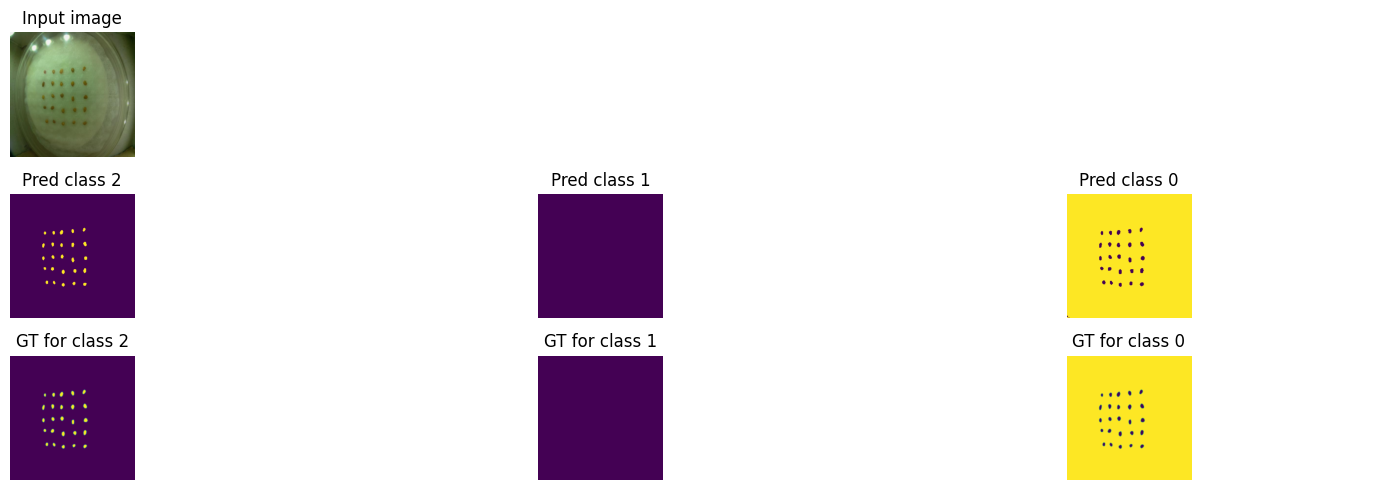

Train loss: 0.19113 | Time: 32m 14s | Val loss: 0.16770
Train_DICE_avg: 0.83724 | Train_Jaccard_avg: 0.77786 | Train_Sensitivity_avg: 0.89622 | Train_Specificity_avg: 0.94807 
Class 0 - Train_DICE: 0.99186 | Train_Jaccard: 0.98390 | Train_Sensitivity: 0.99455 | Train_Specificity: 0.85286 
Class 1 - Train_DICE: 0.65493 | Train_Jaccard: 0.57899 | Train_Sensitivity: 0.77716 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.86492 | Train_Jaccard: 0.77068 | Train_Sensitivity: 0.91696 | Train_Specificity: 0.99439 
Val_DICE_avg: 0.84894 | Val_Jaccard_avg: 0.79960 | Val_Sensitivity_avg: 0.89397 | Val_Specificity_avg: 0.93445 
Class 0 - Val_DICE: 0.99505 | Val_Jaccard: 0.99017 | Val_Sensitivity: 0.99835 | Val_Specificity: 0.81020 
Class 1 - Val_DICE: 0.66611 | Val_Jaccard: 0.60430 | Val_Sensitivity: 0.74330 | Val_Specificity: 0.99755 
Class 2 - Val_DICE: 0.88565 | Val_Jaccard: 0.80431 | Val_Sensitivity: 0.94026 | Val_Specificity: 0.99560 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.18981 | Time: 33m 1s | Val loss: 0.17290
Train_DICE_avg: 0.83754 | Train_Jaccard_avg: 0.77869 | Train_Sensitivity_avg: 0.89649 | Train_Specificity_avg: 0.94714 
Class 0 - Train_DICE: 0.99203 | Train_Jaccard: 0.98423 | Train_Sensitivity: 0.99461 | Train_Specificity: 0.85006 
Class 1 - Train_DICE: 0.65437 | Train_Jaccard: 0.57932 | Train_Sensitivity: 0.77732 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.86621 | Train_Jaccard: 0.77251 | Train_Sensitivity: 0.91754 | Train_Specificity: 0.99437 
Val_DICE_avg: 0.84226 | Val_Jaccard_avg: 0.79185 | Val_Sensitivity_avg: 0.89474 | Val_Specificity_avg: 0.93308 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99037 | Val_Sensitivity: 0.99838 | Val_Specificity: 0.80682 
Class 1 - Val_DICE: 0.65496 | Val_Jaccard: 0.59511 | Val_Sensitivity: 0.74618 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.87666 | Val_Jaccard: 0.79005 | Val_Sensitivity: 0.93966 | Val_Specificity: 0.99490 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.18719 | Time: 33m 48s | Val loss: 0.16621
Train_DICE_avg: 0.83695 | Train_Jaccard_avg: 0.77815 | Train_Sensitivity_avg: 0.89913 | Train_Specificity_avg: 0.94701 
Class 0 - Train_DICE: 0.99202 | Train_Jaccard: 0.98422 | Train_Sensitivity: 0.99481 | Train_Specificity: 0.84970 
Class 1 - Train_DICE: 0.65412 | Train_Jaccard: 0.57960 | Train_Sensitivity: 0.78438 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86470 | Train_Jaccard: 0.77063 | Train_Sensitivity: 0.91820 | Train_Specificity: 0.99434 
Val_DICE_avg: 0.84516 | Val_Jaccard_avg: 0.79497 | Val_Sensitivity_avg: 0.89703 | Val_Specificity_avg: 0.94038 
Class 0 - Val_DICE: 0.99557 | Val_Jaccard: 0.99120 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.82859 
Class 1 - Val_DICE: 0.66228 | Val_Jaccard: 0.60130 | Val_Sensitivity: 0.74733 | Val_Specificity: 0.99742 
Class 2 - Val_DICE: 0.87764 | Val_Jaccard: 0.79242 | Val_Sensitivity: 0.94565 | Val_Specificity: 0.99513 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


Train loss: 0.18720 | Time: 34m 36s | Val loss: 0.16417
Train_DICE_avg: 0.83615 | Train_Jaccard_avg: 0.77740 | Train_Sensitivity_avg: 0.89736 | Train_Specificity_avg: 0.94861 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98442 | Train_Sensitivity: 0.99485 | Train_Specificity: 0.85453 
Class 1 - Train_DICE: 0.65032 | Train_Jaccard: 0.57581 | Train_Sensitivity: 0.78019 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.86601 | Train_Jaccard: 0.77196 | Train_Sensitivity: 0.91704 | Train_Specificity: 0.99432 
Val_DICE_avg: 0.84748 | Val_Jaccard_avg: 0.79715 | Val_Sensitivity_avg: 0.89466 | Val_Specificity_avg: 0.93758 
Class 0 - Val_DICE: 0.99539 | Val_Jaccard: 0.99084 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.81983 
Class 1 - Val_DICE: 0.66028 | Val_Jaccard: 0.59455 | Val_Sensitivity: 0.75482 | Val_Specificity: 0.99714 
Class 2 - Val_DICE: 0.88677 | Val_Jaccard: 0.80606 | Val_Sensitivity: 0.93100 | Val_Specificity: 0.99576 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


Train loss: 0.18401 | Time: 35m 23s | Val loss: 0.16348
Train_DICE_avg: 0.84162 | Train_Jaccard_avg: 0.78305 | Train_Sensitivity_avg: 0.90503 | Train_Specificity_avg: 0.94860 
Class 0 - Train_DICE: 0.99210 | Train_Jaccard: 0.98438 | Train_Sensitivity: 0.99478 | Train_Specificity: 0.85443 
Class 1 - Train_DICE: 0.66619 | Train_Jaccard: 0.59160 | Train_Sensitivity: 0.80214 | Train_Specificity: 0.99694 
Class 2 - Train_DICE: 0.86657 | Train_Jaccard: 0.77317 | Train_Sensitivity: 0.91816 | Train_Specificity: 0.99442 
Val_DICE_avg: 0.85233 | Val_Jaccard_avg: 0.80099 | Val_Sensitivity_avg: 0.90099 | Val_Specificity_avg: 0.93815 
Class 0 - Val_DICE: 0.99538 | Val_Jaccard: 0.99083 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.82189 
Class 1 - Val_DICE: 0.68147 | Val_Jaccard: 0.61615 | Val_Sensitivity: 0.76371 | Val_Specificity: 0.99746 
Class 2 - Val_DICE: 0.88016 | Val_Jaccard: 0.79600 | Val_Sensitivity: 0.94103 | Val_Specificity: 0.99511 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


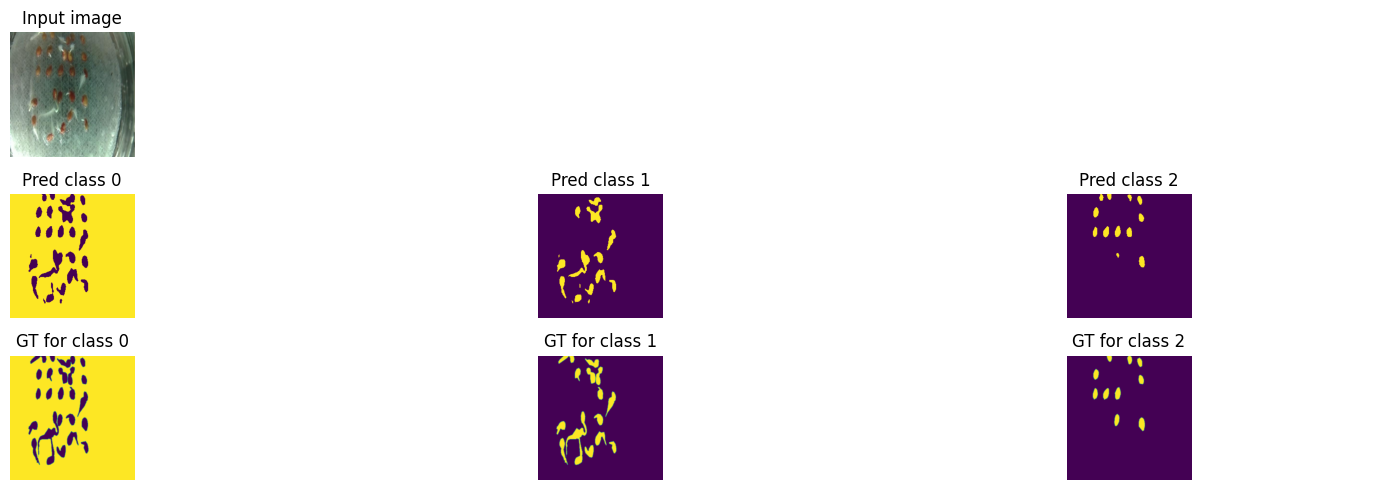

Train loss: 0.18256 | Time: 36m 11s | Val loss: 0.16813
Train_DICE_avg: 0.84373 | Train_Jaccard_avg: 0.78510 | Train_Sensitivity_avg: 0.90407 | Train_Specificity_avg: 0.94848 
Class 0 - Train_DICE: 0.99206 | Train_Jaccard: 0.98431 | Train_Sensitivity: 0.99488 | Train_Specificity: 0.85401 
Class 1 - Train_DICE: 0.67176 | Train_Jaccard: 0.59707 | Train_Sensitivity: 0.79864 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86737 | Train_Jaccard: 0.77392 | Train_Sensitivity: 0.91870 | Train_Specificity: 0.99441 
Val_DICE_avg: 0.83907 | Val_Jaccard_avg: 0.78579 | Val_Sensitivity_avg: 0.89000 | Val_Specificity_avg: 0.93726 
Class 0 - Val_DICE: 0.99547 | Val_Jaccard: 0.99101 | Val_Sensitivity: 0.99821 | Val_Specificity: 0.82038 
Class 1 - Val_DICE: 0.65102 | Val_Jaccard: 0.58645 | Val_Sensitivity: 0.72887 | Val_Specificity: 0.99750 
Class 2 - Val_DICE: 0.87072 | Val_Jaccard: 0.77992 | Val_Sensitivity: 0.94292 | Val_Specificity: 0.99390 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.18047 | Time: 36m 58s | Val loss: 0.16503
Train_DICE_avg: 0.84386 | Train_Jaccard_avg: 0.78552 | Train_Sensitivity_avg: 0.90418 | Train_Specificity_avg: 0.94772 
Class 0 - Train_DICE: 0.99197 | Train_Jaccard: 0.98412 | Train_Sensitivity: 0.99487 | Train_Specificity: 0.85173 
Class 1 - Train_DICE: 0.67153 | Train_Jaccard: 0.59710 | Train_Sensitivity: 0.79788 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.86807 | Train_Jaccard: 0.77533 | Train_Sensitivity: 0.91979 | Train_Specificity: 0.99441 
Val_DICE_avg: 0.84292 | Val_Jaccard_avg: 0.79214 | Val_Sensitivity_avg: 0.88996 | Val_Specificity_avg: 0.93857 
Class 0 - Val_DICE: 0.99541 | Val_Jaccard: 0.99088 | Val_Sensitivity: 0.99819 | Val_Specificity: 0.82339 
Class 1 - Val_DICE: 0.65273 | Val_Jaccard: 0.58992 | Val_Sensitivity: 0.72958 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.88062 | Val_Jaccard: 0.79562 | Val_Sensitivity: 0.94212 | Val_Specificity: 0.99482 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.17811 | Time: 37m 46s | Val loss: 0.16182
Train_DICE_avg: 0.84259 | Train_Jaccard_avg: 0.78412 | Train_Sensitivity_avg: 0.89929 | Train_Specificity_avg: 0.94819 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98455 | Train_Sensitivity: 0.99510 | Train_Specificity: 0.85302 
Class 1 - Train_DICE: 0.66485 | Train_Jaccard: 0.58904 | Train_Sensitivity: 0.78198 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.87072 | Train_Jaccard: 0.77876 | Train_Sensitivity: 0.92079 | Train_Specificity: 0.99448 
Val_DICE_avg: 0.84516 | Val_Jaccard_avg: 0.79391 | Val_Sensitivity_avg: 0.89278 | Val_Specificity_avg: 0.93982 
Class 0 - Val_DICE: 0.99540 | Val_Jaccard: 0.99086 | Val_Sensitivity: 0.99831 | Val_Specificity: 0.82706 
Class 1 - Val_DICE: 0.66278 | Val_Jaccard: 0.59940 | Val_Sensitivity: 0.73002 | Val_Specificity: 0.99757 
Class 2 - Val_DICE: 0.87731 | Val_Jaccard: 0.79147 | Val_Sensitivity: 0.95001 | Val_Specificity: 0.99484 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


Train loss: 0.17550 | Time: 38m 33s | Val loss: 0.16273
Train_DICE_avg: 0.84595 | Train_Jaccard_avg: 0.78772 | Train_Sensitivity_avg: 0.90444 | Train_Specificity_avg: 0.94720 
Class 0 - Train_DICE: 0.99207 | Train_Jaccard: 0.98432 | Train_Sensitivity: 0.99505 | Train_Specificity: 0.85003 
Class 1 - Train_DICE: 0.67486 | Train_Jaccard: 0.59974 | Train_Sensitivity: 0.79553 | Train_Specificity: 0.99709 
Class 2 - Train_DICE: 0.87093 | Train_Jaccard: 0.77910 | Train_Sensitivity: 0.92273 | Train_Specificity: 0.99448 
Val_DICE_avg: 0.84570 | Val_Jaccard_avg: 0.79575 | Val_Sensitivity_avg: 0.88456 | Val_Specificity_avg: 0.93419 
Class 0 - Val_DICE: 0.99496 | Val_Jaccard: 0.99000 | Val_Sensitivity: 0.99843 | Val_Specificity: 0.80946 
Class 1 - Val_DICE: 0.65666 | Val_Jaccard: 0.59299 | Val_Sensitivity: 0.71054 | Val_Specificity: 0.99772 
Class 2 - Val_DICE: 0.88547 | Val_Jaccard: 0.80428 | Val_Sensitivity: 0.94470 | Val_Specificity: 0.99538 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Train loss: 0.17733 | Time: 39m 20s | Val loss: 0.16178
Train_DICE_avg: 0.84701 | Train_Jaccard_avg: 0.78837 | Train_Sensitivity_avg: 0.90434 | Train_Specificity_avg: 0.94690 
Class 0 - Train_DICE: 0.99204 | Train_Jaccard: 0.98426 | Train_Sensitivity: 0.99509 | Train_Specificity: 0.84913 
Class 1 - Train_DICE: 0.67908 | Train_Jaccard: 0.60275 | Train_Sensitivity: 0.79727 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.86992 | Train_Jaccard: 0.77810 | Train_Sensitivity: 0.92066 | Train_Specificity: 0.99455 
Val_DICE_avg: 0.84975 | Val_Jaccard_avg: 0.79961 | Val_Sensitivity_avg: 0.89199 | Val_Specificity_avg: 0.93382 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99025 | Val_Sensitivity: 0.99840 | Val_Specificity: 0.80843 
Class 1 - Val_DICE: 0.66903 | Val_Jaccard: 0.60460 | Val_Sensitivity: 0.73426 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.88514 | Val_Jaccard: 0.80398 | Val_Sensitivity: 0.94331 | Val_Specificity: 0.99549 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


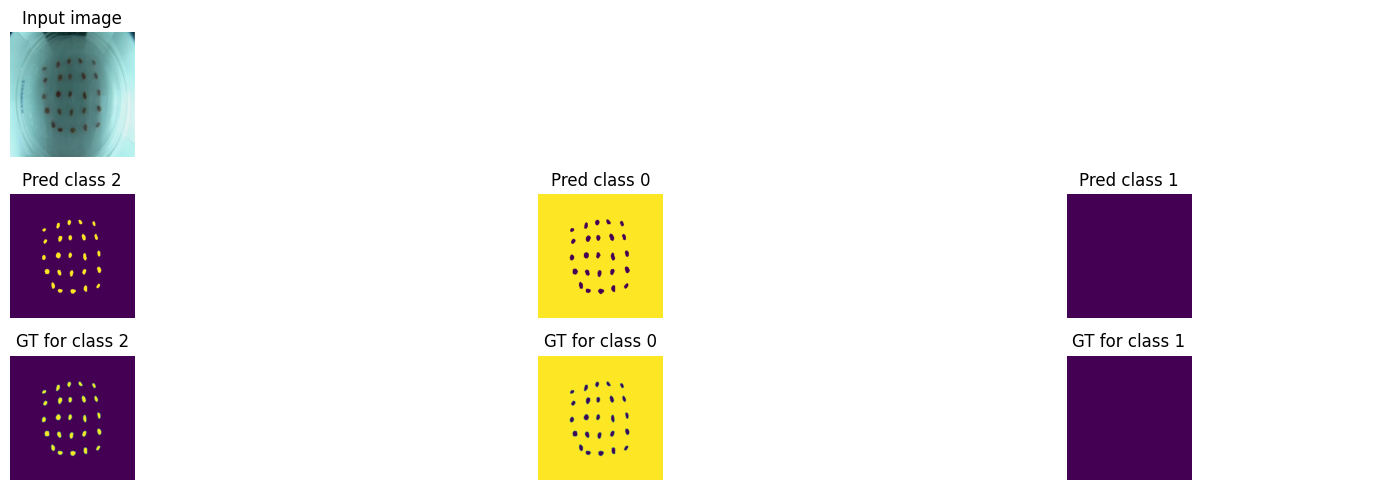

Train loss: 0.17676 | Time: 40m 9s | Val loss: 0.15766
Train_DICE_avg: 0.84733 | Train_Jaccard_avg: 0.78882 | Train_Sensitivity_avg: 0.90724 | Train_Specificity_avg: 0.94762 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98420 | Train_Sensitivity: 0.99495 | Train_Specificity: 0.85138 
Class 1 - Train_DICE: 0.68008 | Train_Jaccard: 0.60452 | Train_Sensitivity: 0.80597 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86991 | Train_Jaccard: 0.77773 | Train_Sensitivity: 0.92080 | Train_Specificity: 0.99449 
Val_DICE_avg: 0.86862 | Val_Jaccard_avg: 0.81940 | Val_Sensitivity_avg: 0.91257 | Val_Specificity_avg: 0.93482 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99016 | Val_Sensitivity: 0.99845 | Val_Specificity: 0.81099 
Class 1 - Val_DICE: 0.72147 | Val_Jaccard: 0.65743 | Val_Sensitivity: 0.80516 | Val_Specificity: 0.99739 
Class 2 - Val_DICE: 0.88935 | Val_Jaccard: 0.81062 | Val_Sensitivity: 0.93411 | Val_Specificity: 0.99607 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.17733 | Time: 40m 56s | Val loss: 0.15575
Train_DICE_avg: 0.85074 | Train_Jaccard_avg: 0.79292 | Train_Sensitivity_avg: 0.91256 | Train_Specificity_avg: 0.94903 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98468 | Train_Sensitivity: 0.99495 | Train_Specificity: 0.85557 
Class 1 - Train_DICE: 0.69015 | Train_Jaccard: 0.61639 | Train_Sensitivity: 0.82167 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86980 | Train_Jaccard: 0.77769 | Train_Sensitivity: 0.92106 | Train_Specificity: 0.99450 
Val_DICE_avg: 0.85621 | Val_Jaccard_avg: 0.80721 | Val_Sensitivity_avg: 0.89776 | Val_Specificity_avg: 0.93408 
Class 0 - Val_DICE: 0.99508 | Val_Jaccard: 0.99024 | Val_Sensitivity: 0.99844 | Val_Specificity: 0.80893 
Class 1 - Val_DICE: 0.68384 | Val_Jaccard: 0.62047 | Val_Sensitivity: 0.75830 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.88972 | Val_Jaccard: 0.81091 | Val_Sensitivity: 0.93653 | Val_Specificity: 0.99582 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Train loss: 0.17623 | Time: 41m 43s | Val loss: 0.15204
Train_DICE_avg: 0.85053 | Train_Jaccard_avg: 0.79177 | Train_Sensitivity_avg: 0.91012 | Train_Specificity_avg: 0.94880 
Class 0 - Train_DICE: 0.99223 | Train_Jaccard: 0.98463 | Train_Sensitivity: 0.99512 | Train_Specificity: 0.85496 
Class 1 - Train_DICE: 0.69112 | Train_Jaccard: 0.61499 | Train_Sensitivity: 0.81379 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86823 | Train_Jaccard: 0.77567 | Train_Sensitivity: 0.92146 | Train_Specificity: 0.99443 
Val_DICE_avg: 0.88001 | Val_Jaccard_avg: 0.83115 | Val_Sensitivity_avg: 0.91807 | Val_Specificity_avg: 0.93372 
Class 0 - Val_DICE: 0.99520 | Val_Jaccard: 0.99048 | Val_Sensitivity: 0.99838 | Val_Specificity: 0.80809 
Class 1 - Val_DICE: 0.75609 | Val_Jaccard: 0.69345 | Val_Sensitivity: 0.81557 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.88875 | Val_Jaccard: 0.80951 | Val_Sensitivity: 0.94025 | Val_Specificity: 0.99544 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.16547 | Time: 42m 31s | Val loss: 0.11968
Train_DICE_avg: 0.86214 | Train_Jaccard_avg: 0.80375 | Train_Sensitivity_avg: 0.92259 | Train_Specificity_avg: 0.94808 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98442 | Train_Sensitivity: 0.99508 | Train_Specificity: 0.85274 
Class 1 - Train_DICE: 0.72365 | Train_Jaccard: 0.64788 | Train_Sensitivity: 0.85106 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.87066 | Train_Jaccard: 0.77897 | Train_Sensitivity: 0.92161 | Train_Specificity: 0.99453 
Val_DICE_avg: 0.89395 | Val_Jaccard_avg: 0.84455 | Val_Sensitivity_avg: 0.93728 | Val_Specificity_avg: 0.93325 
Class 0 - Val_DICE: 0.99508 | Val_Jaccard: 0.99024 | Val_Sensitivity: 0.99846 | Val_Specificity: 0.80672 
Class 1 - Val_DICE: 0.79930 | Val_Jaccard: 0.73625 | Val_Sensitivity: 0.87386 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.88748 | Val_Jaccard: 0.80716 | Val_Sensitivity: 0.93953 | Val_Specificity: 0.99559 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Train loss: 0.16529 | Time: 43m 18s | Val loss: 0.12125
Train_DICE_avg: 0.86334 | Train_Jaccard_avg: 0.80537 | Train_Sensitivity_avg: 0.92501 | Train_Specificity_avg: 0.94790 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98466 | Train_Sensitivity: 0.99530 | Train_Specificity: 0.85218 
Class 1 - Train_DICE: 0.72694 | Train_Jaccard: 0.65238 | Train_Sensitivity: 0.86099 | Train_Specificity: 0.99694 
Class 2 - Train_DICE: 0.87083 | Train_Jaccard: 0.77908 | Train_Sensitivity: 0.91874 | Train_Specificity: 0.99458 
Val_DICE_avg: 0.88787 | Val_Jaccard_avg: 0.83797 | Val_Sensitivity_avg: 0.94180 | Val_Specificity_avg: 0.93414 
Class 0 - Val_DICE: 0.99510 | Val_Jaccard: 0.99027 | Val_Sensitivity: 0.99842 | Val_Specificity: 0.80979 
Class 1 - Val_DICE: 0.78273 | Val_Jaccard: 0.71962 | Val_Sensitivity: 0.89301 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.88576 | Val_Jaccard: 0.80403 | Val_Sensitivity: 0.93396 | Val_Specificity: 0.99562 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


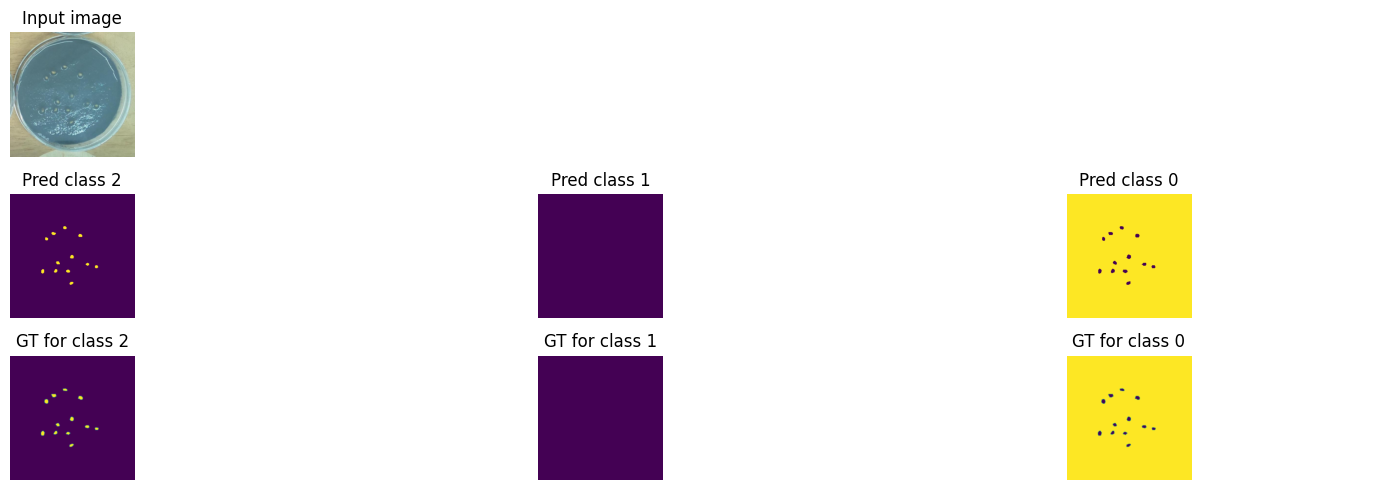

Train loss: 0.16037 | Time: 44m 6s | Val loss: 0.11900
Train_DICE_avg: 0.86470 | Train_Jaccard_avg: 0.80702 | Train_Sensitivity_avg: 0.92701 | Train_Specificity_avg: 0.94750 
Class 0 - Train_DICE: 0.99207 | Train_Jaccard: 0.98431 | Train_Sensitivity: 0.99514 | Train_Specificity: 0.85097 
Class 1 - Train_DICE: 0.73034 | Train_Jaccard: 0.65636 | Train_Sensitivity: 0.86431 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.87169 | Train_Jaccard: 0.78040 | Train_Sensitivity: 0.92158 | Train_Specificity: 0.99457 
Val_DICE_avg: 0.88974 | Val_Jaccard_avg: 0.83914 | Val_Sensitivity_avg: 0.93943 | Val_Specificity_avg: 0.93355 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99025 | Val_Sensitivity: 0.99839 | Val_Specificity: 0.80792 
Class 1 - Val_DICE: 0.78757 | Val_Jaccard: 0.72177 | Val_Sensitivity: 0.88849 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.88657 | Val_Jaccard: 0.80542 | Val_Sensitivity: 0.93141 | Val_Specificity: 0.99569 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


Train loss: 0.16199 | Time: 44m 53s | Val loss: 0.11566
Train_DICE_avg: 0.86401 | Train_Jaccard_avg: 0.80603 | Train_Sensitivity_avg: 0.92791 | Train_Specificity_avg: 0.94616 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98449 | Train_Sensitivity: 0.99535 | Train_Specificity: 0.84698 
Class 1 - Train_DICE: 0.72934 | Train_Jaccard: 0.65481 | Train_Sensitivity: 0.86711 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.87053 | Train_Jaccard: 0.77881 | Train_Sensitivity: 0.92127 | Train_Specificity: 0.99457 
Val_DICE_avg: 0.89207 | Val_Jaccard_avg: 0.84090 | Val_Sensitivity_avg: 0.93981 | Val_Specificity_avg: 0.93487 
Class 0 - Val_DICE: 0.99523 | Val_Jaccard: 0.99053 | Val_Sensitivity: 0.99834 | Val_Specificity: 0.81205 
Class 1 - Val_DICE: 0.79601 | Val_Jaccard: 0.72883 | Val_Sensitivity: 0.87857 | Val_Specificity: 0.99720 
Class 2 - Val_DICE: 0.88497 | Val_Jaccard: 0.80335 | Val_Sensitivity: 0.94251 | Val_Specificity: 0.99537 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.16014 | Time: 45m 40s | Val loss: 0.11442
Train_DICE_avg: 0.86602 | Train_Jaccard_avg: 0.80789 | Train_Sensitivity_avg: 0.92515 | Train_Specificity_avg: 0.94796 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98450 | Train_Sensitivity: 0.99525 | Train_Specificity: 0.85230 
Class 1 - Train_DICE: 0.73339 | Train_Jaccard: 0.65758 | Train_Sensitivity: 0.85821 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.87251 | Train_Jaccard: 0.78158 | Train_Sensitivity: 0.92199 | Train_Specificity: 0.99461 
Val_DICE_avg: 0.89320 | Val_Jaccard_avg: 0.84242 | Val_Sensitivity_avg: 0.94410 | Val_Specificity_avg: 0.93680 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99068 | Val_Sensitivity: 0.99837 | Val_Specificity: 0.81792 
Class 1 - Val_DICE: 0.79975 | Val_Jaccard: 0.73440 | Val_Sensitivity: 0.89206 | Val_Specificity: 0.99716 
Class 2 - Val_DICE: 0.88455 | Val_Jaccard: 0.80217 | Val_Sensitivity: 0.94187 | Val_Specificity: 0.99532 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]


Train loss: 0.15768 | Time: 46m 27s | Val loss: 0.11779
Train_DICE_avg: 0.86983 | Train_Jaccard_avg: 0.81217 | Train_Sensitivity_avg: 0.92994 | Train_Specificity_avg: 0.94750 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98455 | Train_Sensitivity: 0.99524 | Train_Specificity: 0.85084 
Class 1 - Train_DICE: 0.74365 | Train_Jaccard: 0.66880 | Train_Sensitivity: 0.87211 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.87364 | Train_Jaccard: 0.78316 | Train_Sensitivity: 0.92248 | Train_Specificity: 0.99462 
Val_DICE_avg: 0.89111 | Val_Jaccard_avg: 0.84004 | Val_Sensitivity_avg: 0.93901 | Val_Specificity_avg: 0.93729 
Class 0 - Val_DICE: 0.99529 | Val_Jaccard: 0.99064 | Val_Sensitivity: 0.99835 | Val_Specificity: 0.81918 
Class 1 - Val_DICE: 0.79380 | Val_Jaccard: 0.72747 | Val_Sensitivity: 0.87608 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.88423 | Val_Jaccard: 0.80200 | Val_Sensitivity: 0.94261 | Val_Specificity: 0.99526 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


Train loss: 0.15680 | Time: 47m 15s | Val loss: 0.11111
Train_DICE_avg: 0.86898 | Train_Jaccard_avg: 0.81114 | Train_Sensitivity_avg: 0.92807 | Train_Specificity_avg: 0.94716 
Class 0 - Train_DICE: 0.99217 | Train_Jaccard: 0.98451 | Train_Sensitivity: 0.99532 | Train_Specificity: 0.84980 
Class 1 - Train_DICE: 0.74184 | Train_Jaccard: 0.66692 | Train_Sensitivity: 0.86501 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.87292 | Train_Jaccard: 0.78201 | Train_Sensitivity: 0.92387 | Train_Specificity: 0.99462 
Val_DICE_avg: 0.89660 | Val_Jaccard_avg: 0.84574 | Val_Sensitivity_avg: 0.94569 | Val_Specificity_avg: 0.93818 
Class 0 - Val_DICE: 0.99541 | Val_Jaccard: 0.99089 | Val_Sensitivity: 0.99832 | Val_Specificity: 0.82201 
Class 1 - Val_DICE: 0.80939 | Val_Jaccard: 0.74329 | Val_Sensitivity: 0.89217 | Val_Specificity: 0.99719 
Class 2 - Val_DICE: 0.88499 | Val_Jaccard: 0.80304 | Val_Sensitivity: 0.94659 | Val_Specificity: 0.99535 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]


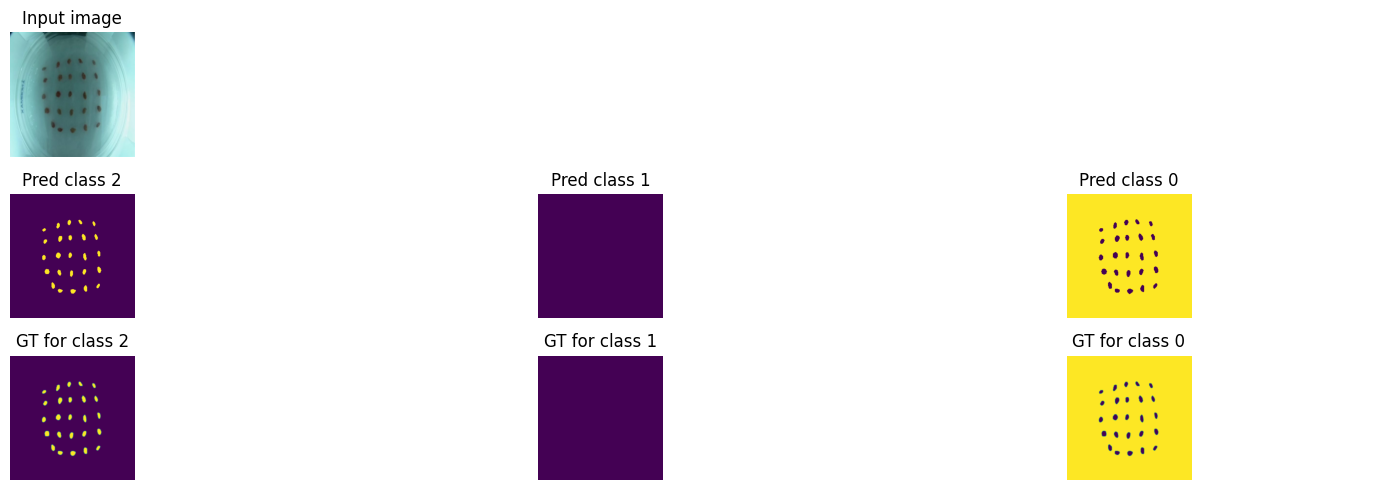

Train loss: 0.15660 | Time: 48m 3s | Val loss: 0.11061
Train_DICE_avg: 0.86790 | Train_Jaccard_avg: 0.80995 | Train_Sensitivity_avg: 0.92738 | Train_Specificity_avg: 0.94809 
Class 0 - Train_DICE: 0.99218 | Train_Jaccard: 0.98453 | Train_Sensitivity: 0.99517 | Train_Specificity: 0.85263 
Class 1 - Train_DICE: 0.73806 | Train_Jaccard: 0.66223 | Train_Sensitivity: 0.86380 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.87347 | Train_Jaccard: 0.78309 | Train_Sensitivity: 0.92317 | Train_Specificity: 0.99465 
Val_DICE_avg: 0.89651 | Val_Jaccard_avg: 0.84544 | Val_Sensitivity_avg: 0.94461 | Val_Specificity_avg: 0.93626 
Class 0 - Val_DICE: 0.99535 | Val_Jaccard: 0.99077 | Val_Sensitivity: 0.99830 | Val_Specificity: 0.81633 
Class 1 - Val_DICE: 0.80921 | Val_Jaccard: 0.74197 | Val_Sensitivity: 0.89229 | Val_Specificity: 0.99701 
Class 2 - Val_DICE: 0.88496 | Val_Jaccard: 0.80358 | Val_Sensitivity: 0.94325 | Val_Specificity: 0.99543 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [ ]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]



Global Performance Metrics:
Loss mean: 0.12129, std: 0.01232
Dice Coefficient mean: 0.86833, std: 0.10569
Jaccard Index mean: 0.80702, std: 0.12359
Sensitivity mean: 0.86176, std: 0.09985
Specificity mean: 0.97376, std: 0.02559

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99500, std: 0.00250
Jaccard mean: 0.99007, std: 0.00493
Sensitivity mean: 0.99247, std: 0.00377
Specificity mean: 0.92513, std: 0.07700

Class 1:
Dice mean: 0.75187, std: 0.28317
Jaccard mean: 0.67136, std: 0.30913
Sensitivity mean: 0.76527, std: 0.26432
Specificity mean: 0.99860, std: 0.00267

Class 2:
Dice mean: 0.85812, std: 0.08119
Jaccard mean: 0.75961, std: 0.11244
Sensitivity mean: 0.82755, std: 0.10684
Specificity mean: 0.99754, std: 0.00224
